In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pytesseract
%matplotlib inline
import os, io
from google.cloud import vision
from google.cloud.vision import types
import pandas as pd
import json

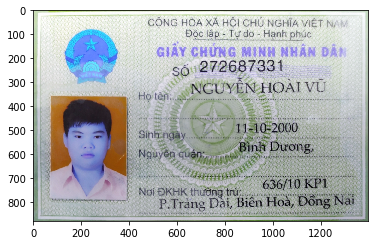

In [2]:
image_path='image/vu_cmnd.jpg'
image=cv2.imread(image_path)
width_image=image.shape[1]
height_image=image.shape[0]data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAXcAAAD1CAYAAACrz7WZAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjEsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy8QZhcZAAAgAElEQVR4nOy8ebTtSVXn+YmI33jm4Q5vfvleDuRAZgqZjAoySCFQKQKKQ2s5lVqKllbZ1fa0yupeveqPUltbS2gtwAkBQRFkFhISSNAcyIQkB3J6mS/fdKczn/ObI6L/iHPve2kLdq8lqyjW3f/ce8/9nV9Me39j7+/eEcJay77sy77sy758a4n8r92BfdmXfdmXffmnl31w35d92Zd9+RaUfXDfl33Zl335FpR9cN+XfdmXffkWlH1w35d92Zd9+RaUfXDfl33Zl335FpRvCLgLIb5bCPGwEOIxIcT/+I1oY1/2ZV/2ZV++toh/6jp3IYQCHgFeAZwF7gJ+yFr74D9pQ/uyL/uyL/vyNeUb4bk/F3jMWnvKWlsA7wZe+w1oZ1/2ZV/2ZV++hnjfgHceBs5c8vdZ4Hl//yEhxM8APwNQr9dvOnrZIYQACyCWz2CxwKXRhdh9SBjAUOo5UhqM1bh/SMAgEFgEYvkyi1j+zyIwWATutQYhJMZUSCmx1iKExNrlN4X7Ntb1RSx7JQQIJNpo1yc8wGAtCOGedH/svsSNwf0fLAaBvDhY68ZmsVhr9kZvjcEFQ2bZpnIvwGKNXbYt3Ee7c7XXprhk7nb7IBBIN4bdPi0/ZfdddrdDgDUgJAKJsQYp5N57LeZi+4hlP8EaA3I5/kvWb7ePF+fJrYm1BindGrCcV7uccyEkCLGck0v0B7nst7ykr7trZ3cndDntdqlJ7K0gyxm4RN3+3jSJvXW/+C67XJ9dvRJ7bbgfdqk/u7rlxrirge5ByUV1tlzs1sV3CjdDezpx8SH23r3UgIurJ3bnWy7nkItjtizXUC3n7ZK2lv27OD8GYyuwFWapi7s2J+Qlc7t88d5aXTTaPSPe1Q2Ql+i6Aeyeve6uq9hTDrc6UvgX1xaLtdXeeK0FY83eurnluvjsro1i7d577dPmUCLwLmljt5+763DRTi/+8nQcuqgul4wb9nTe8PSP/97Te//cNbWLfbvks932uagHdu9z9/Ph+x/Zsdau/r86xjcG3P8/ibX2D4A/ALj55pvsW9/7G1TkGFshhbcEqZLSWCQ+ggprLUYqlARhDVYUFPoUw+xRjEjxhAJrEDIHHSCUhy+bpFmCpwKk1wANgR9SaUtlDdJWVLaCqsT3fSwST9QQIsJXEVBQliVlWRKGTaT0ELpEeBJh3fO6gshvUVUVXhACkKYpoYrwpMQAtbjOLJkjqIj8eLmICiEiBBqkRGgJwqKkh5QKIX3KIqEoLWHkE3gxaEAYPM9DmwpjBdJKpAJjDEr6SCsosfhKURlD4IdI4ZMX2Z6yh0EERoNUVJWbc4QDWWsE1pRI4aGtxRfCKasVSKGw1lKaCt8PMKXBUiFVCKbCCkWkPCqx3EqtxvMd6Jdl6cYnnOFXxqArg+/75DrDWI0wFuUHKOljdIG1BiUDhFIYXSCEwFjp1noJNlVRYK1FeRKEAmMIw5A0yVCBj5tpg5Hue1JKrBBUVeXWXGsqq9FliUVTlgXGGKx04CABrET6EozBGoEXhO4ZLQk8D6RCmxJjDJ7yKSrtgB6FkhYlLdqU+H4NXVTgQVnlVHkFCmwJfhjuuSbGaMqyREhQSqG1e5/0fDyh9t4nUFhpMRqEtFgjCL2A0haUVYEUGmM0RaXdBo2kKi2+8EBJlPTAOEC3dvlOCUZnWLkEaG2cu2QNRjjnxZrKtWctCkVhDIEMMZRI5WOtACvIdeb00/cxlaHSJcZWeJ7ndLiyBJ7HIp8jhMLzJEWR4ak6gRegrXY2isYYp59FlaGkxIgKqyVGazw/QBoLnqIqyiV+WKRyzgxCY5YOW1UZhIRA1ghUBykUnnJ2u6sbGIO2FmEtFokESlsgjED6Eq2dU+cJj1JrZ+fGYJFUJnf6DU7XjZtHK4TTW3Cbm5RLG7FY4UgUIQTSOudPo52JSul00VRUS/w0lBhredFVLzv9tTD2GwHu54Cjl/x9ZPnZ1xFBUeYQGIRVGG0JvC6RjFGhQEmfwJdoax2AWQ8pJQJDYa/gcPvFCAxYgVIO/MvKEKgAz6s5o5AKi8JTAZ6Q2OUkx0HkFFSqZV+cl+F8Gw+LxlgDVqKWILe7g8s9T2bXgwRhxJ5ROG/XAZZQCoxzuaxZehi7nwFGWLACIZ2zjLAYK1ASsMK9xyqkWG7z0oG0NnoPcI0xKG8ZfeB+WgNIsxyTxAp9sa9c4jQIi7ACrEHveoziokthDXvGtfeZtU45hUAoha2Me8/uI1Y87Vlgbw53NxnniTpDxAq01m5tL/GW9vpiL37HGHOxDXFxDqWRrn0rsPVLvMLlc86QxJ5R7a6h0Rah3HwptfSul21aa910W/b6rivn0UopsUvdE7goS1uN3ota3PO+cPNkDYjmMrAxFr3bh+Wai+Uzl869MQakW2M35/Zi25fo4u76VFWFkDx9rYwDDOV6ebEtezHawDo/3CDcmGAJiE5/pHJ6vQtsl3qyDuSFc5iW7bq5VK7/y/aEsZjdKLMylFqjLWjtImff9/eiZ8RSb63FLNdub5xO+TFK7vVfWIteAvPuvAkUUgqQ2m3Q0gGzVK7Pngz3omiNRdqL+rU7Rm0LpAr3/rcrSil0WYLvYSvt3gvkpsJUleu7EAjPzYExBq01YRhSVdVyHtkbj7Yg1a4OuLYNGmsMnu/Wv8Iymg2YFWOk1Xw9+UaA+13AlUKIEzhQ/0Hgh7/+VyxCOiBEKDwR8cyjz9rbTeEfCInsRYPfpQeEdSop5G7Y7hbt0oXaNULDJcp/Ccrt/upAESQeUuxSMQIFGGNBufZ2Qz8BGLsM9a29SM9YAULt9QEAuTQq48ARKfcUEiuW9Msu9QISixQKxN5e4IZ+SchmWRqVFW7zEM7fsMpijEBIR21I6+gqhMU4xmWvXbPXbwfAcglsu16HkH+PGhECbQxSCExV7a2HsYB2ILo77t1x2iUAWa0prd2LbHwkejmGvXFJkMKtnwNWi7eEHSGWz1+iHx4KIxylhXDhuQG01aglHSH3wm77NIBy7I/ACOHWF9f27rrv0oXS2r2lcvOyBDrj1t5YfZHquAQ4jZQIh9FLD/kSvVmq8x4Ui126TCGsWW7eBonn+iCd57e3ieOAY3eD95bepzWXbBws3wNILdFopNwlMRwXYMUulQlY1xu5pHSklGhrkGbXtpbkx67+L+kEJZwTVBlHIxptlwSYAyykwGoH8AKJkooyL5d0iIfTfIUVFiU8txlJt2lL4UgbLQRKWGfFAmeHWKyUhAgXCVmLURd1QyJRQlJpB/hohcLRh0q66E5YEEunSUoFWKQVGOEvddhijYutUE4vlR9gjMFXPla5BgMCKi7ajsS6SEAKlHURsg3cJq0tKATaCpRcRkjLjftS3HJ4IdBosixhno/36KKvJf/k4G6trYQQvwB8HFDA2621D/zj36vAlG6wVoL0ng7owqINeNIZn5S7nCcIu3R3pVwCLpRG46ul5yzk0nMAsKCdZ2CsXoLmrqpqB+xLxfAsLjRbejLK7gKQMwq9bFM6X4jKlnjKx6DxkBSmQgjIysI9I6E05Z7hWGuXSrr0pJfgaZcg64DOUC4V0ugcKyqUCChMidDO0svK0RIOoCxZsSBdzFlfP46tFJ7nY6koshSrzHJrAyUUldGEXuwAUEqU8tG6pKoKfKXQS4OSQmG1RuOoFKEMpS6x2lBUBUJadOmUsSgcrRH6CuEp8qwk8kNHyXgBnq/Iy8TRDgrioA5AVaZgJVYKjHabkofzxPOiAlUhhSLwIzzf3/MgsRJk5vTE+HieR64XVLmh0hptC6wQKCHACJQMkcuoKgxifN+BihWOAvR9552WJkdKCEREqQ220nhBRJ7naFMCFzldwG0lUqKto/Kstbg92VFkWEGpLcJYKl24SEMGSBO4dkNJoJxJBkHkok7j6CwrHC2R5TmWCqUUwro8xx7Ao1EW/DAm8EOMto760BprHGA4z9VgjEYKpxdSOtrHlwoVePgyWI7IOKfDKqwnHe1mHXArlpuGEm7TstJZOzgPeOkh75LD0oLwXJ+rYhl9eIqiKABBWThaFONsQih/GbGZZZS23LiEQnlLkHa7B2W13NB3saTSoOTTgFFKuUc97tqYLxVoD6tZhmROz7WpUCJECg3CX9rKkjJZRvyiNMsIxNlqscwlSOkcOWsEQlqMNY7mQYC2VNbZKpc4MbtUS6UvRraetW6NWGYQlUJIFzo6j97iONqvLd8Qzt1a+xHgI/9/vuO8QLBCU+n8YhJHQGVT0BojLEmhEVSUZeloGluixZhST9xkGUVRlBijMVJT6YKiNAjrU+iSsspRfkiZW0JfAYXzjrw6VizQlaE0CUJLfL+BxMcqw2y8Q9iUhKKPNiWVMVRlivQcZ+kFEcK4BQo8DyNTtHUct9QNiiJH+gZd5mhREtYiskQ7o9Ae2tMYXaBtjk9INz6E8BTjdJPIb6JkG2MzZsUFmtG64+WkQPkSv2oghaLUU6SvCFQD5UkefuJ2jDF020eZLUY0oiYlKVk2xfNqFEXBauc4CyZMkvN4SmC1olVfwS5VLpAtFsWUpNoikk2EDaiFbUazC6z2j6OkxzTdIgw6NKMO29NzdOsrzBczorDO1uAs3VaXKGjiCY/t8QDPV5jKEvgepU2ReDRrPQbpBotqROw1Cb06lXCJPWkktbjJLLlAaUs8VskLF8bnRUIzWie1Cyqd0wsPo3XJzuYF6lEPIwRKSC4MH+bq4y8E43Fh8Bj97hGsluiyYJaOMJXbSJqNDme3HiMMQ9rxCrNsSrd5kCKfkVUp5ApTGoQICZQlKUaUheLA2hGGo20azTqL6ZAwbLPIN4i9PluzJ6nHbQQhsQwQniAtxghlqQpDJzqE8eDszmPU/TZK+mjrvERPBURejYUegoGGv8Ks2kEIQZkXxEHbbX56TuQ1MVXBotgm9ntUoiD0fGbzberR+pJmrMhNSpHPaNXWHT9sQjI9x/MVonLhv+8tPV4VEsiQRI/wZIQnQ3I9RckAWymM1ISy7iJGWVAZiyc8knSG59UoTUpATGlLjCzwdYyDJoOxJaUpiYMOs8XUceChj5GpywMpB7a7UYlzwiSGAik9ijIFqamqkkB0AUNlMtSS8/d9xWw2wfci4qDt7FG6zTL0AjQun8MyupfWICNBVUArPIREIYSPr3yEcpuZj0clNMZWmMqiPAehZVG4fJeUKF+6/BK7lKBFSrdZqSWo+1JhBC7yvYRSU1JilcRfFjHs0rTdZm/JZBi33z4tsf0Py3+1hOrfF6sl0ndJKs9z4RhCYHTOaLbtkpdehbEKq0ukEszmY3rdVXx1EF2W+LKBLxpkaoz06vjSkBcJEJHrjF5jlWk2YpHNaR/qU/c7nN98hE67h69iiiqhEfepjKHIF3gywg88rFZExxs8ObiXY6tXI3TEIh/iS9/xxFgmi01atVUacZfK5FzYepJGvY3neUznQ5RSrLcvw2g4M3yURlwjb2hqcZNQxkzSHVpxF+kZzm09ytG160gXC44fhJ2d8xxZvZqsWLAxfAorJAf7B5gnCVkxp9leoRv32ZqdIwwkkghP+fheixOrVzCf5+hOSa5TIq/mPF7lEo/GGBphi7Mi4Njq5Xg0mGUjl6zVFk8FxNECXR1gpXEMMJwfneFI70aEVaAhkofoxweJgjpV4NMIG2SJIqLHyfXDWKHJsozKSHqNdYwx1BrreFLw1Sfu4oprrqEqNcdXDnD/k3dy8rLnIqVkkg+ZL2a0Gi2KPOXwgauYzKdIKVmUcxpx7DaGoE1uc85ceIxGcx0tKq46tMZ4OuTIgcsRSEJvhVZ8DIwiWusRRRHzJKUd9xlm5zGVZr19GXk1Iw77YB2N0mho+q1VtgbbHF1bZWt0nmEy4Pornosxhic3H6G71kMZn/ba5ZzZepRrj78SKsjtnO3xJlf0LsOPwj3+OZABvg9KeuyMd1jpHKaihDLgyqM3IIzg9IVHaMQ9Cl0hDAhbY71/hChoMEsGCE8hLejKYkRBEATUvCZWCs6cf4y1tQNUVQVGEq56lGVBVSnqjYjt0Vl6h9aQQrFI06VH6iLl0WSKkAX1eh3fC6gFddIycXkQa5G+clEdMYXNXHRZeSgP8jJFCR9jDEU9QylBLWoR+S3GyQ5bgzMcPXQFSZEQej4b25scXT9JoSvSfJta0EfbjCzLCMNwSR0aKkpHZxhFs13jzNajKGr4beedF1lGr7NKmiXEYZPxbIu41mI6H3Ko0wSj8JVimg4JgxpKSaRUTOY7rHWPUWYFtUbEheET1MI2db+DH3iURYXnx/hKsT3cob+6jtV2uXF5WCNQnmC6GHNg5QhSSqbTKZ7nkYoFURySLFKiuE4UhEhhSNMEKyRqSeFIKcnznCB20ZLbAHx832cyG+LLAOlJCl3tRQW6zJcU3Nf33L9prh+wAkeXSIuvwiVvbUFZwqBGr30AYX069R4rrYNE1DnQvYxQNIhlmzIJ6MWX0wwPoXOPethkNk3wRJdWdJCmt06aWlQVc6x3DQ3Vg0pyuH8drfAI6JBGuIasQobbA5q1FYajbZL5lHrQBKAdHWY6HjFPJigUCI/pYkYj7nFw9QST8Q5VUVDmOaudQ5SFphmvsN47wYXNs5SmojI5/eYBTOnTiw5QD5qc2X6Efn2NyG9RVtBrHWQw3sCPAgIbsNY5Qa4zVOBx/MAzWG0fYr7IiYIGB1rHicKYeTWl11yjGa8R+CHTZMyB9mEeP3+KRqNFM2ozGm3Sjtq0a11Gwy08z0N6HolO8W2NqgBtKhpRk6IoyMsFWbHAJ6QRdKls6Ygro6lEAZSEgWKlc4R5NiNNpvTaa2wNNqlFbfwoJCsSlFXEYR3fE3RrfSajBe/403fytre9ncuPXs3G4CxalOyMNzlx+CryIiEpFsxGc3r1HlprAi/eo698L6Ie1NgZ7RD7NUaLEXlecOTAFUhfMZlPSYqETncFXRmKKmWtdQxbaYoqJS8yhqMBF84O2Di/QyzrpIsFk9mQRZbSrnWRRtJq9KiKgq3RBfqtdYrMcKB/hNXuGuPxmHk6J/QiiqKgXu/iBQFCKpI84f5HHmKcpDz0+IM0m6u04z6B8pBYus0+ipBFmtKsdSnyBVVecGTlChZJTprntOptCpvxJ3/0Tv7iPe+n3zhMluVk6Yx2vUOeZ0wXMwBCFeLLGjvjbdI0ZaW/znQ6RSDJi4xA1RgMBkSxz2KxwGrpKB/tEUcNzmyeIo4aREGDxx55hE9++hPEYZ3haEBlctI0pRl1UdJjPp8TqQaejBxAWYFUlsHOJrWwjTACXTmPMssylPSZL2ZQQbd1gMViQVkWFLqk0WiSlQXzxYTBzpjxZEhRGcIgJkkXNGodOs01qiInilo06112dnY40L2MwI9QJqQV9WnVVikL54Ur6dGs9aGw9OoHiGQTEKRlTi3oI0yIJGA2m7LWO0pVVdRrTcqiohb06NUPEfoNZrMZRWUoKxf5d1p9lAVPuGjKX1YwCTwaURdjLFWlaTZby0o3D4lPs9kl9EPKssLiIeSSo/ciTGmIowaBH+HKVBVY935rHI0jUCTpwlFzKAf+nnTlEfLrw/c3Dbg7ztxNlqtAWJbL6YqiyLG6QmhJqGKUDEiLdFlKlVGZnJXWcQajTeaLCSvdQ8ymQ/qdYygZuDAOixIhngpQSjEebVGVGUbnlDoj8mKshY3BKVZWD1JmliOHTjKcDkmLjCyb0q31CcMWSggeePRLJPmI/sq6C8FKSb9/iMpq0iIFBb3OGkWWYa3lmuM3khcpSTHHSiiLlDCuEcgIKRRpmWCpmE8ndGrrtGvdJTBpDCXaVGzvPIXBcbntWpd5moASTOdjV55Y5VTLELbd6uHJiHazT7KYkOUpa92DlFpTaku3s0JRJZgiB6M5uHYZWVGQ64S0yKhMRhw2qTdbVGWO58cMptukqfPiuvUOsWoyX8yo+ZHjLz3L1miDPC+QNmQ0SFgsSibzKaGqYQiZJgkQ8u0vfB7f+aKX4YkOvhewSGbOC80DNJYsX9BoNJgnCcIGBH7M9vAcUvhUpUGIGKsl57afwpeeS4pZyWKxoFtfox7WXSklhsFgB0+FjOYTlPSp1Wok+YJ+v8cDj95PnkO/fRghYD4bk5cLkmyOryLW144zHA7xfZ9mvc5gtEUU1ZhlI4bTAb32OlUOi2TOfDrl6MGTPPb4Azx15gne9Y4/4dzjW+S5KyucLmbUoibaVIRBjTzPWSQzfC8gyzKisM5ouOX4fCmZjac859uex/XXX09RGnypCIKA8XzEYj5lpdsnjmvMF9myBNPp+nQ2cSW6hUKJgKxK6XXWmM/nZEVCo9bBVCXK90nLhIPrx6hKjTEWXwS84TU/grIBR9dPMhhtstJZdTy7UmTFbEkXGAaDAboypGlKt+vsYJEtEJ4iCmosipTheBtjS5TyqIcNFxGIgJ3hBkopKp1z+2du58wTW9z9xS8xmY7QOtvzaBeJay/P5izSCbW4DsYVBtTDBlmegjTEQUSZ5SSZ29RazTWKvMJQcPap03zq47c6vluUaK3ptFbRaYm1MJkNmc7nBCIiLTLyInW2mA73kv+B55HlCZkuUEoxTxKiKMYYQz2KKYqCalmumuYz2s02YRihhNpLkOqyoCoKanETaw1R3KCqymUuxOXGlPLQpqQoMxrNDnmZLRPWYo+e2q12283dfS355gB366oIhBB4S1C/tBSs0gVWWjqtFcoqo6wKGvUWSTbD9wOSIiH2ayyyFD8UpMVkmdBr0G6skpRTgnqNTrNDLW4wSYbU6h0CPyQ3KcPROfygRuS38H2fmt+gHtVZJFNOHL2ancFZl/wTgnQxJ4obfNt1L2BjeI4qr8iKGUk2Qy7LJRtRi8HkPJXJ8QLBaHyBqNYhyxNqcYPxfIMD6wcp8gVJMefY+lVIfMbTgTPWbIawPvWwwcbwDAKJT8ha7xjb4ws0GzXqtRa9TptJukO/uYYvAubZnAubj9Gs9wBYFDOsqTC4sq1OY52d6aarKXZ5IrqNFaRxXkgQOJAZjS8Q+SFh2ILcIryIeTKmVWtRVQnNRov5fEZUr7G+cpTRYgsrBUmeIVCMRjlvectbePLBx/nAX36M0WYBBNTDJg8+/igf+sAHuf+e+/jIhz/I7735DzClD5Xi/PkBP/UTv8hwvIUQgqyc81cf+Gs8PJT0GIyHfOnBB3jr2/6Yd/7Zu/j4hz/DhfNDysLRb8YY2o0O6Sznzb/3h0xGM2bplH5/hT/9s3cz206xuSFNNR/8yEf5nTf/Hrd++tO8933vZ5bMCcOITnOVc5tnQfr82//+f2IymXB4/SjD4Q6D8ZAwaOOJmLe8+Q+xOkBXFs/zefLsaT77hc8jjeLEsau48frreeqpHV7+kluQCubTCY2oRZLOyYuEC5ub/Mk73k2n3ccuM2p3/t09xGGTeTZjtkj4q/d9jNNnz/CV+x/irrvvYLSYMp/PGUwG/PWHP4KuCkIvZH1ljel0GwmcPbfJ3/zNZ/mr936Au++5F4vPE2e+ytnzF3j88XMIJIFXJylK3vOX72Hj/DaBiPnUZ25jMhtwzTMvp7IJk+mcp86dxgjDIp2QpTPObV/g1BPn2RpsM51NCFSNRZqTpCV5XjCabBMFTXQGp8+cQyLZHGw44DOGeZKQLkri0HnTk8mYre1NrrrqKg4cPkS326VTW6HQJVbCbDZle2eDbvMQtbhBrnPycsFwtkXo1/C8GlVRIAyYStBurLCxeQEpfNIkI45rbG9vs7M55Vk3PJ8nTz3hoqygDZVgezLg8VOPMpkvKMsKTwUk6ZzCZCTFglqtRZGXlHlKuUzeJ4sZeZG6ip4lu5BXJcrzqHTJaLDjqNrKUJUaid07J5PmObW4TpFmhEGM5yuSJKFeb1CL62it0cYl46uqIlA+9bixV63ljlupJTf/9LLMf0i+OcBdLDPcaAyGqrpYcleWJfVak8l84A4w5G5XzcsF9VoDz4vdoQ2d0m/3SdI5Fo962CMrp1RVwc5gm6oo9riy4WCTdmOVIGggdMFKf5U0n1KWM4Kwznw+ZJEt8AiwleVg/yi+F3F+8wm67VWscQmQyw5czfbwHNYIjHUHYsqyRHkBZW45t3GK0XRMENYodUYjamEqQT1ssjPcAN8wn43wvYi8SGk1O2TpjGQxplFvgwo5cvQE9UaNRtzEkzFZOsdoy2Cyg6d8ZtkE3w+Jggb1VotOt43RlkbYYTjaBiAMQ3YmW1RVRbvVQYiSIs0Y7QwRyqfd6jFabJLlCaGKqDVaBGGdqkypxU2iwOPcximoBEaDqSRFpUlL5wVNswGtWptW3OWuu+/mjtvv4F/9y5/k6usv5we+/xY+/fFPcf78eeazhHf80Z/y3/3AD/Cqf/4a/s2//dd8202X854/+yC1Wod62KDdbfPAvU8iKlf14gceg8GI0XTMX733o3SjOj/6w9/PG17/Wn7ojW/gPX/ylzTqbULfpyhmYAVpVVLMBLW4iTSKIjOcfvJJ+p2DhFGd//PX38IrXvhqfuUX/zW/9Kaf5dprD/I//y//G8J61MIaUga8/30f5hlXX8FsNiMO2hipQUFlE7aGG/zQD/wov/mbv8vm+Dwb25u8811/wfU3PIPhZANbaU49usVLXvRiPvSxj/HU2VPMkpkrDdWC0XREVixY7R9kPp0Q1Wq0m30+99nb0aVAVgF//F/+kpe+6GV8zy2v4md/6idIkxl/8Rfvp15r0fQ7pKOK4WSE0ZbKur7ZKuDP//gD3PDMq3nd97yOVhjxiVs/wXyaMh7OGe0siMKYUifMpkPOPL5BllRgPB57/HGENLSbPYQRPHnqFNvDAevtEywWCweipeVP3/ZehpM50/mcWhxw620fZbQ9IQ4bpHnOr/7qv+f+B76KSQ0P3fUIX7rzfnQpmI8X/MHv/yGNepvRZIdue5Uv3fsAD4Y8FaQAACAASURBVH/1EWr1iE987ONcddV11Ot15ouMYqr5rd96M14YU1YZ5zbP0YiaxFGDR089xm2338YsnZLbgqzMUV7Eb7/5d2nXu9z60U+QlHMefODL/Ok73s1DDz7MYw8/wvZTm2ye2mJr4zyf/vitfOGzX+DvbruL97/7I9zxhXuYJhOCZU16I1zjw+//GybjOUFYZ2d4htFoyHQy36OdsILNs9tsXdggTRYoPDw/4uyZbcaTicOrMqcsCzY3thhPppSmIgxDsjxlPncORVVVlFWB56m9Gn8pJWmZoE2JEgol5V6lj9aaotRPO0fyD8k3B7jjPEuX/9V40nP10gBS4nke3dYqWTEnDCLKKqceddjc3kahiIM2g2STOGwRBh02hwOk51OaitIWnDz4TMbTHYQy7Aw3OHLgGEkyRJuKIjOgQSjNYHiWbmOFyA8pTYIRhnkyRgYhca1FEAcYVRF4LvyP/Tq97iHCIGI43WaejIlrLSqT0230OXLgCtr1DoaSje3HqUVN4iBmPBgRh02yLKPValNWGb4XQiVY7R8kKxbMsynz+RCTVTxx5nEm6ZRpMqLfPcpgvEGjHrIz2KYedTg/Ok1STtm6cAFrIsaLHQaTLRbphF5zBWska52DXBg8hbAeipDIb7G+dpwkmVMUGfPJgFa9Rb3WwujdOmvNzmyH4XTI2soRfC+i11lnOnc0RVHMWORTYtViniQs0oz7v/Qo/+wVL2VrcJ6sLAiCiO//kVuot3zu/cqX+L5bXk9uFjSbdUpTsXakx7mt83z1oYepdEl/rc7nP3cHRgvOnDlDr3WQMAyZJQOOH7ycbqeB78E82aQ0C/6P//gf0LpE4DGeTZjORiTpDI1gPJ0S+U0CL2a1d5jBZECSLKh5dTq9BnHos9I9xI03PJuTVxygLAxpuiDymjz+1XN8xwuez5fve9Alr5anWSvjTlmeuOwo3/ntL+a9f/1+7rznPl79ildzdOUyZtMhMoi5/56Hee5NN3H33V+kXusRhq5YwNgSj5B60EbogKLSzJOE6XzEdDFD+iGBH1PkJZddfojCZEzTMS98wXNYax+gyFy9+yItkRLG8yHj8RhP1HjHO/6cX/l3v8zaap+o6XHw+AonjxzmGVfcwHQ64YnTpxB4nDn3BKHfoCodlXdu+wmwCmnU3uGaNJuzSGYYUxGFNSwekRdz/NgJPv3x28hyzTxdcHD9CMPpmNlixPve+1He9Is/x7XXnWTt0ArXPftaVturhEGNyPOQKCaLEUEQILTk3LlzNGorrDRXkFKSZXOm8xHtWo+PfuiTvPw7v4vJeMyZjUc4uHoIiU/s1bn25DOZbY/Y2jlPO+4TihqfvPUTvOK7/hmBalDogtFwC1MannPzc3n9G7+X57zwJl7wHS/h8isvo7fW5fkvvpmXv+KldNpdfvTHfozXvPIVTBZb+CoikJE7VGk8vnjPPYwXQ9LFDCUDykKT57k7VZ3nzOYZO8MRcVSnFtZIk5w8rcjzktFoxHQ+x2gYDCZ4KqQoSvIlFeMHAZ7nsZgnDrCLAoGiEddo1VukWYanQsqqYLeAeTda8JT/j2LqN021jFI+RmhX/uV57lDE8kBGaTXWCgbTbQ72j1H3Q6aTAb1Oh0WZIIVBaIG2jt9e6a6wSCeEXkiuZ9TDJr3OGlleUq+18FSD0ubkZcLKyhFKnZJlBVGtxyKdkCY5ve4KWZWA0BRl7iiVoE9ZVGRmTGlzFsUEYX38qMaB/hHmixkzO8aIjDCOXY2qVS6KyDImky1U4HH02Em2tlylgJCWr5y6i6uO3YgUPtuTbQ6sn2Aw3CSKmyjj0WutUOgFSTFhrXUMTyims4TAD6mHDWb5kCQZc3DlMFIopumYNJtz8uh1bI+26DXXsKKi1FN8LyJUMdvjC7SaNcrKEoiIE4efySJLqKoF7XqfJzYewZc+gapRq7WQFkaLLeKoS2k0VZVQa64ynow40DvKma3TKOWxs7PDophy8vgzoKxI8gW1MEYIxWBnh5e84KX4dVikLhl45ZFr8WufIs0SNsZP0Gl0+aEf/D5+/Td/l5/4yR+kSIfu5J+JWen2l7XKPrqIue2Lf0stbPPcm68nCmP6rXXSIqERuyThB//6I9TCDjuDLXa2J1hRspjOufzGo8yzAe1mn7xcYLTkpd/x3dx5zx1c88zL+dAHbuX5L7iJoweP89u//X9zxRVHuebyG0AakmJBI64znu5w8/Ov49Zf/ywcrXP9LdeSVRnd7jr33nsvQRPyKufFL7mZO75wP6973SsZzTbotHuEMqbMLV+85x7uf/hO2q0eO4MBwoTcd/+d1IMWN7/gBrTNCb0mRZnRbKzyqle9immaIJQlSRJCr0UYRmzvbBCFdR5/4hFm2QgZ+khl6TRXEMc8BIo0TXnowYf5jf/0W8jIUAu6zNOMIPSwJDTjDq1Gj83JU9TjJoFXQ0vL5uQ0B/vH8ImZGkm31eE1L3sV93/lfk5cdxhVBgR1j8FgSFVohJfRqLdYJFNKo7n+5ptcdQ/unMSX77uXndEFut0VJBHnNs9y2WVrbmMtc5QHW+cvcG5zm9e+7nXcfsdnOXC8waHVHE+FDCdTgqDJ0ePHkUaRZS7f8Ld/93le89qXk+c9ZrMFsd9hRkKz2WRz+xz1sEGnu0paFURSE9VqKGJ3RkTmbA9HrLcPgpJY7c4hWBIacY/P3PpZvvOlL2Vre4PJZEK3fzVFnnDq8fMcPnqE0WDEzmCLOK65qiJpeer0GZ7xjMuJ/AaD7QmNeguX/3Tlk1VVLa+VqFCepCgKlJIYW5HkGVVVEYc10sWcSmt3GMwIrHBlpHunir+OfNN47tbgDksIiUVePLatFLPZjKoqWGmvURRu4CpQLJI5npRoU7LaOsrm4AK5TpHC3WfSrPWI/BYbw8coy4I4dPe/FFVCliwQ1pAWY8bTbTr1Hp1Gj+FkkwP9w/h+wyVAjCHLx+gqd3dgJDPH9wmfs+efJAprjKab+H5AFDRQnitlGs3PY4VgONlgPhvRbx3GiyOSYuFyAEFIZQ2lFaw0V5jNJ2T5gprfQFeGdmMVU1VUpsBKaMR1srRgrsfkRcZKd5VFOqMkp6wgjBoUNiMr59SCOn5QAysJopisTMnLkiOr1zAcXmCaTGi1HP9rS8lwuo20ksoavNBnZ7JBms8I/KY7Kp0XoOQyyTVFKE2n1adMDbFfY14s6LY6VJW7l2Rna4vQ9+m0Vmi26jx06iGU8Dl59CrOn90iyxeUpmA2H4NQ5IuCRqPB4QMn6HfXCAPJ8593E+9/399wdvNJbGVY66xy6onH6fXXaNTbJOmQG665lq8+8FXyVKNF5ZLJFVg8WvU633PLy3jjD76Gn/3pf8GVV54kTzKCIMBkGcKHpHJzLpSHKEJOHD1Jvsj53N/ewac+czv//n//j0zzkne8+11MkylJllFlmma9y3gy4I677uA5Nz6bjXMXOL9xHiEEtaDP2//LOzi7cYG3vPXtPPLoOT732c8zX8xYLOaUZemcgPkUFVb86i//G375F97Ez//0T/LsZz2LRr1F1AyWPPXyOoQlMG5snWU+H3D6zENkxZw4qlOmFc1aEykr/ECRFXOklGxtbeEFEXHcYbzYQSmPo0cP8dM/+S/4yR/+l7zxDd+LkBWnnnqUULUZT3eYJlPG4zECRT3u0KjVmE1HVMawyOaMF0O2x5s01mu0WzUeefBRFmnGcDAm9prUayEHV45SZRVfvuc+/uyP3s3v/PZvcd9XHsRXirTMiGWdm57xXExu8H3c/UZWsjPeRi3rzm/7zOe55fW3MJlP+fStn6PXPIZFU1QLkJp5PuHkFVdy6vHTPLXxOE+cOcVVV17NDVc+m3GyTWktcdgkCurc9snP8uCdT3Lu8U2+dNcXmY7GdJprhLJOqROkspTVnHqrSRS1SLM5WbGg0gVRvcYzrrmWfm+F4faQWqPBdDZiMt+hKA1lYTC6pN1uuas3sEymI8oqox43GA0nWAGD0YA4ihgMd5BSIYWgGbfwvYDZfOLoRy/AWghUwO5FelK5+3dgya+7AnfM8uS4+UeuH/gmAffl5T5GoY07Y793esu4KoEkXRAFdRbpFK3dAYFuaxWjBePxGAPU4zamSlDSI5lPEUrhKZ/5fE4tbiCBRq3NcLxJq7WCJyMmyYhuc+XisXEhMMKiq4wsy2nEfXwVIT2frEqJg5jZbEaz3qHb7XLmwiP4arnzBopALC8UM4LR+DytVgvlB0gpmU1H1IIuk9GQdrtFUWTs7JxjtX+CWlAnKxbsjM8wW4yIoxorncOURUIraoAOOHH4KrJ0SLfTI8sSVlfWSLIpR1aOUw/aaK2ZJ2MatQ4HeuvM0zE72+fxfOnAxHooT5JXc6bzMUVREEc1+u01hskOmIqiKNBac+Lo1YReSKPWRfoes2SA7wUoT3Koe4ytrW3qtQaNZpfTFx7EGkEUNHj5K7+Dz3/uyyySgjRf8NTmk/zJn72byWTGtddcyW/+xm8zHM2xRpLkCU+ee5Kja4e48vgVKC2Iogg/jPn259+MNJpzT10gL0sqW3H6zFk2R2OyMqXebLKycoibnvNcdAWbwwtYU9BqrRD5ASuNNXrtg45yE4JSJxw6eIRWs85X7nqMXuMo6WJBXG+QJAmfv+PvqMcheaZ43o038Gv/66/wa7/2P/DLv/ATLAYul7JIU4I4pChy4rjDQ/c/xqte/WLe+EO38Lu/85958LEvM11MOXLwBD//Uz/Or/z8v+LfvennecY1RyhsQa99gCRxgLI9vkB/tU1cr+Mpn/WDhyn0nNALWek0uePOezj91FPEYUi72Wc8H/Jbv/N/0W60OHr4OM1mTFZOaTXbtFsdFumEF73w27mwsYk0ksCrMU8S/urPP8TpJx+j31vlxhufjVCKVruO7yt6rSZH1k/Qb61Tq9WYzcdcdvRK0jTlzPkzzGYzThy8ltFggPDkcvN2J3CvveFazp89w70PfIVed4VOu0strJHl7lKwo5cd5Rd/6Zf4vte9gbLQbA+38ZTixmc9i97BHtd/2w30+h3OnjuDLkvisEHotfBtzOlHz3Hvnffy2c98ihc+/3l89aGHeercGZT0qXSJ1gm97gplUSGU5I477uRVr7wFL4ioigKqgkkywirDFVef5J+//pW86CXfwc0vvJHLLrtsebIWjC6ZzCfuEj3tvGFpBXmREvp1AhERBhHP+rabefKxR5nOZlSZpha1GG4PaTRrlIUhS0tm04SicOdvEJaoplDKIxkn1OsRUkr6vRVgeeIYjbEa3/cJ/JAoDl0RQe6q0fIyx2hNqd3JcWvcSVd3qt3Vy8j/Vjh3d7GDu4Cpqqq9kGPXg1FKUVUpzUabRTbB90IW6ZQoijh84CSD8WniMESJEFNVdDoHSNMJeT7n+JFnMplsATlZMceaCins8rizYb7cqbd3nuLgygnyIiEvEhq1NvP5EF/FdJor7IzPUq81aTW7TOcjuvU1uo1VBIqzmw9jdYUXNvF9H1F5KL9JmRvm6YismrDSP4ofxigRMptP0KYiiCKqImOajqiFLdZXj1BUCUVRMJyP8IOI8WLbcXxFijA+g9EmRmqyfMFkPiGrnEIs5mOkL5nNx+gK5smIq45dgy0loRewKBOUigm8CF/G7p6MZVXSYHqGwFe0o7a7R8ZAks5ceCpKQqnoxD0Cr8YiSwijGrN0wjwZITREYZ1Wrc3BAx1uevYzefe7/pyPffo27r37Ub792TfTaHgk1YSf+Lnv5d3vfC933nUfd33xYd77rvfwwz/yRkQE3dUDzCYT6nGTeqvBD/7Y6ynSDKkE82TMm97007zt9/+A933wI3zyM3fy1x/9G+675z7WV1Y50DvCvFi4Gvl8wupan7xI6Lb7dNt96lF9b+N+3Rtfy3/+nbdy3wNnufver/L7b307z77pejqdHp/4yK3c8tpXU+qEMp9y8sRRrr/2as6e3aJRj8izOU+ce4T3vvND/NxP/QzD2VkuP3mMl73ku7j7zkf48Mc+xI//+A/T73cpq4ysnPCq17yct//h21CeIAwiitLSafc4sn6SC1sbSyfEUlQJK90+K/11nv+cZ/K+v/wIX7j7Lv72S3fz1re+i5e/5FV0Oz2UDVyuyAp2JlsMptt02ut858tewm2fvJ1Pfu42kBG3334HnZUOV195A4t8xvb2BdbW1typ0SBwd5polwdoxiFnzm0xmaQUueaTn7qN66+7Ds+PaTbalGVFrVYjjDy0dknBl3/XS5mMh5S6wCrDddddw1133cWp86fxoxrnNy5w2+13cPjQMdZ66xRZSqULNIbQ86m05sDaEQ6sHSFZTPE8xenTp/nuW76bN7zhNXzP976aV333d7Fx7iztZh9bCrrtvivvTGesrndJJhUP3PcIwrck/w9zbxpk2XmXef7esy/3nLvf3CurVJJKiy0vkmUBBrOZAUyzjMGBabpheiboaSCmZyCG7gnmg3vGDTR0DwZDuMcGLywDjI1tvGDLxm1bBku2bFlClqxSlUq1ZFVm3v3s+znz4aSEhwGbYLojeCMy8t5zb97MvMt73vf/f57fE4fcfPqFyJWEZejMvSPieM0ymLPwp9yYHuAHa7xgQVXnhKmPpihkeY1luKy8A4QiY+rOyUSbtOwlpWa40efqhcvUSGRxwhOPfRHbVugPXDquTkWFqXdalZmq0x/0CIOYC5eeYXNzA1WSKU4WTkLAyl+3Zi3NIgxDoihqXaqyDgjcjkuaRW2p54Rk+pxapjzBfDwPz/tbhvz617/+v9yE/Xccb3nLW17/3T/4KsqmRkgCtTHYHO4AkBcJmqZj6TbXZ9fpdcYnJRxaY0AjkOWCG9MrbAxOoakmS/+otfSecJ8N1aGpa6q6oClLuu64babmKabuIhooipyO3Vrk/dBD0zW8cNrqac0BUJMVAXme0gC6qrUqBSQ6Rh+UijD1UFWbJPIwDQshBI7p0MiCy9cfZ+juUFQFcqO2jRvVIi9i4tzH1LrouklNzdKf0jQSuipRVQ0SCnlR0lQNHatHFIctpAkJx2xxCHGWY2l2q6GVapb+MQ0lTqeLqVroVofr06fZ7J9CiIbFas7AHbWa2jynQcLQHEBCEZCXGUWeIEkyspAwlA61EOiqxnR1TElyghhW2OjvsvCOqaqK8XiC2ZW5+dRN7Oxuc2b/DHe94AVUAuLU5wW3v5Dd/Qm33HQL+6cmfP2991DQrmSaJmNnp4/t9lpMbZbwDa94GYoGqmHQ67rceu40Z0/fxOnNDQyn4Ttf9V/hpx66oiIJBd1QyZIVt991DrfjUpYVZVNy+tQeuqZQVSn9scP+/iYbvS26lss9Lz5Hb6CjSBrnbruJ4aSPoqgYusl0fcRLXngbbsdBFgq6qaGpKqd2TzOc9Jh7h/R7E+489wK2RiOy0uOuu+6irkq6XZcg8djfOsOp8S612uqXe50BeZFgWir7u3ukRUpe5GyNN3B7XSQhGAy6nDl7msuXLrNer/lH3/Vq7rj9LA0Njusgqzldx8V27NaW3lQkWcSL7ryLcBXyyCOfZ397n3N3nGbQHbJaTtnb2US3NZI8ouduYqkGm9sjjpbXeOXXfQvhKuSjf3Y/x0fH/NMf/WHyKkKzFLI0odPp46+XVHXO7bfeiapoLZOnSrj11tvJ6oRTe/ukRcxnH3qYRz73BZ5+6jyv/q7vZm9viySJKLKS3f0t4ixEVmWyOMWxHMYbI9bTFTefO8tDn/k03/xt30RShAx7EzRVZb2aIyka49EYL1rR7fRI84SO7fLkY1/m27/jWxkMHIQsUGWdx598gpvPnsHUTS5cuMSzzzzDsxcvc/6pixwe3eDMzadIooiN0RYXnrrAi198D7Jat8Yqc4QmayRZzNH1a2zvTFAVlcl4RBjEVHWDqSrM1kecueUUXbfb4gkaiSIr6LguSRojqJEaCSHJTEYDFusFw+EIREWSRpiG+RWUyxMGT1NQ12AYBlVV4gUBmiaTZAmaZp5gFRrCZElcJkgC3vab7zh8/etf/5a/aV79zx6z9/cZ99x9d/PmP/x3FFJB3cgMtU3O7b4AOKmLxhGqbOKFHrub+9R1SRiGLYhKllFVFVkIkiJCxaAUWVs/riWCxKPrOIhGoShKqibD1DsUeUyWZbjdIX4UYCs2abFG1hWqXMbQbUqClmdRmWR5Qr8zJC5T0iRk7R2imR02+6dJq4KmzKiqkrKpWAdTBoNNOnqPIq/J64SqLlEajVKukITCerHk9O5NVHXOoxc/wx033Y0sDI4WBwx7g5N+gkBWWpenqZqs/CmT0T5pFkMpqEjRdIul1yoQHNOlaZr2dtHQUTtkRYxhOGRFTJIFDNwthKy2Ta6mwTJtkiyjY/WZrY/QZQPD7HD18CnG7qR1IQoFVZbxQg/bsFmE15kMNikLlSCYM+jvsPKmqIaGH80pypzN3hnKrO0XNHWBIplUlNiWS5JGPPGlL7MxHnJ67zR+7KGrKnGZ0NF71HWJrKnIlSA90f0qioIklYhap8hLjI7GpYPzjHoTdNlAVdUWVVuVyKp2YiQZUpYlq/WcjdEe8+URPafLMjxG0Qz0xiLJfAzdammcikyUeNi2TRzH7I5vIs48pvMbnNq+FVkIDuZXaISga7ocLw8ZjyZMFzN2xqcJwjVmx8ZbLRgOJoRhwDqec2bzVhpkrk0vsr15CqlSQRZMZ1dI85xer3XEmqbF8fER3Y5LQUYjgT9LuX58wL0vfhlJGqNbOnmRMJ3fYHvjNIoksQ7WaJrWIiPqmjhLsHQTudYpyxzLNgFag5EQaJKEbQ8QjUxaB1Rlhq72kUTD0eKAyWi7zRaQBVcPn+LU7m3IdUsFXYULevYmomnw/GX7+p5A7mRJZTo7YjLeRFba3ZYiGSALVEmmqmoMw6AocrxwhtsZUJWQlyWapFNUKbrawr3yssTtDKnrmiBcI50YuKChKaGoc4SQKJsKRakxNRfPm2EYOgoautnl6PoV7H6H6XxJlubYlkZZFYyGYzTVoJEEy+Mpg9GIsoxbVr6k0wiJKFqxmM3Y3N1rcRlaq5k3DJPZ4hBExZlT51rgmmIQBhFCSBi2yXR2yM7GLkXR5iTIimDprTBNg7xM6DrD5w1JkvQcOVU6gbyV1HVDVZUoqkaaxBRVTtcdYGo2NQ2Hs0sskjmyEHz97d/0haZp7vmb5tV/EGWZhqal8J3opjlJf3kOl1k3bWd5Z+MUs9kxVdVChFodtEUQBAhJIy9S4tLDi5fUZY5hOIz62xzPr6JqFpbVRVPbOjtCRVItlsENLN1EM1263S3W/pyeO0LXDOazJVUhKOuWOFgLCNYzLM1iZ/tmFutj4tSnKGJk2UIIHVW1MY0BTzz9OKswIikrll6GrAzwy5q61pl5a/rDEdP1ijAv2BrdTJQmLLw5sqqQ5CkSKrbR48KVJ1uiXqPQdyccLS7hmCau06pWkiygY9qYqkWc+Vw7ehrX6pPGUdtkFA15mWBoNsPuLmGywl8vWxOTLEjThvVySV1UyAgaSm7MnkGRJGyzR1MLVKWlNHY7XcKsbQY3tURTNgx6E+JsjWmaVGXOwB5iaB0kSdDrDlEMBafTpdcftXbz1COrUs6dO4ektBxOzTApqzakRNEV0iIkDBdEtU8cr9gYbtJ3BhzNb2A7DoP+kKPZVU5tn0ZXVSRRExdh65VoZDqGQ5ymHB5eJssyHHdAWRU0tUSSlihqC03Lm7iV2soqWZmjaSqypHDt8ApbG3tMl1OyomV6pFlCkmX0nAkdwyVKErp2F1Vx6HeGePESSVVQGwXXdinyGFWWmfR2COIAP1zSsweslmvC1CcK19Tk7E32kGqJNIspy4LBsEeUrqGuWK88bKPPqckZwtQnFylJEZPEAZPRqGW9oOE6/Vb1UwokRaXv9NsTjW0z6I85mF1ElmX6dg9ZarCsPnESEOUBWdKSOLMiwvd9ijKnzDNUTUGhJogDonCNF645nM8oM1qNdhIhKVqrvlJ0irrES+ZsTLbQNI3Qb92kaR4iI8irkrquSJMcx+rQULNczymbClkIFLlBVxUU1Wyb+aZOlsccLQ7o2F1kVSVNE5IiZhHcwOo4dGyXrIgQkkqZlUzGp1gFSzTTgbpmvDkhiDw2xxs0ZYNmCjbGIwbuuEUENBWKCUKukTUby7QpqpSqSgizNVt7ey2ysWxNlv1Bl7xJGG0OGU9GJ87TtmRidy00QyJOAkaDAYqiYBgGstKSYB2nQ0OFbbpkRYZrdbF0o1Xh6RaG2jbRi6J4HvWryBKGYdA07ZzY4ghaQqyqtHz9rzb+QUzuIKio4QReVJ+gdgHy8iT4oGohQqPRBD9coGkaumagyjKu0yWIDls7rmgwVQtNKKRJRFkkGLpNlgUkcdhqlasMyxrQ7XRZLY+QlAY/mJKmPq7dyihbmeQOqmyiNBq6ZjLzLjMenUJWDLI0586zd7OOlidne0GJTFJqlNoeM/NO3n1d5nevmbx9NeZ/vVzzK5ct3vG4xB/fGPInRzpfqEf82RWP2txh5mXImo7nL1l5c1ynT4XKLWfvoNsd0zEddMMmzRLyomYdeJimSZpH9J0RHcOlaSr2t04hhGB74wzz1XVUWUZTTJbelKoqMAyToo6RK4nFYka343L21K1cWzyJqesosk7X7rHR36WqCnruiKouifPWbKVKJo4xIU2ydkJvGmara3TMDiNnm6PFnK4zJCkSlvEc3/dI03a309SCdbqg1+mhawan9s9y+egJHMvB6fQwbIuj5VUsdcCov0PTVAz6I1YnOuqt8WmiOGAdt6u+1m1p4nTGqKpMLnLcTg8/8Bi5Q3rOGNfqoiJz/yc+TJILwrThkUcfOSFcqlRlw4WDp5AUlUvPHuHYAzp2lwvPnsfutFvnUW+HNI05Xl6nalKyIsLQOiRpSZqtWQVL611kEwAAIABJREFUFGHywIMPcDC/cpKkZXK8PGx7IVnIOmwXFGVdEiU+B9NLdN0eQRHhdga4To8L1x6nyGuWXs71+ZqVFxMUEXrHZhnM6RgOrt4FBKpqE6dtP6KsMiy7S783wpR11v4S2+xy/fiAVbAgz1q8b9nI1I1EQUJchC2CQDGeT70qRcr2xj5CCObLJX4ScWb7duI4pq4bbMPEMlyisO1JCaUgr0JUzaBjOPjBiqLJn0+4KoqiLRVqHYJgRkGGoVsczQ8ZuFv03Qm2aiFJgqRO6Vi9tg+maJRZQVbnOI7T9sDSsC3PajZmp91ZJWlIWeV4wQLVUEnSkOFgwso/piDBCxYISoQiccutN1GUGYqm40XtjmPtt2aquqhQpBYhkZUtHnp36yxZGmLqDr3ukKP5FRRFoWv10YSBqhggS5h6hzhfoMoShm5hGzYIlawsUGSNvEyQZRnHctpkNqWlTIZpgBf6mJpJ07Qc9+ewwkK0PPnnZJ7yCf68kTgp9bT02681/oFM7jzPRAHaVflzKRKSjKyYyKqO562oqgpDs9utUBgiRIOiyizWh/TdCapssl5Pyaq6RYLKgq3BPutwhVBEqwlWdaoiIElDzuzdwXJxhKapBIGHbQxoqAmiJU2TMp0dYdoOpt5htrhOXsaUdU1WlKQFdOxtMtnmoeOAv/Atfu+Gwc8+6PGO6Rbvyfq8byF4wLb4pGPx4KbL+7H4SGjzWyuVX7pc8+Zyl3/1dMF/OLb41NqmGt7KuoR1GLD256RJzjpcE2QhYeSzOznH2p+jGYKmEtj6gJW/Ii8SmhLKSlA0KV50RFK0ECxZ0hj2NjhcXESm3V1UVcWkt0MYBfixB0WFoTl0rC5B6NNIDVmZs/bnLWrAcJGFSr/bbRVLTUOUtVrm7cHZFjRWpRiqTlaE+N6cJE1xTJe4TClEydw7QpEtVr6HY3V4DlnqRz5+sKIpK5Lcw+5YFFWFHwUcLWbomkQQrbF0m6bOUWSNJA7wowBdsyjLkrpsGSCrYIWsth+IKI3bBCEh85lPPcqnPvEJPvfZTzO94vEzP/O/IBcao+4GO5s7fPGLX0RG54/e9W7G7piu23oTkiKipKCoS3rdYcvxoSYv4KE/f4JnDy4w7I558xvfRs/YIggCVMVAQWEwHHO0uI4m6S3rpk5omgJVaIyH2zSVDFlFGHus/Bn9zhAJlWsXjrj/A/fzb9/wf/Cnf/o+HvyLP0etDIq8pqrB7rhUNASJz7MHV8iyjCypWIcBdSNTlDVlkfEbv/5mqgbO7N/J1ePLxEWMomscLa9hKU57EhLViZ2/gyFb5HnGzJ+hGYKj48v8m//t31I1AlU2mK9nPPzFz/Hu974PXTaJ4xhZ1UjziJU3ZXfrLFIjSNKQQpR4kYfd6dEIid95+x/x5aeeIskCZLUN4WnlyTam0aHIE+IqJgg9DNlGEioqKl/47CPcWFyj19vAsfukZdJG82lwcPUqF88f0DMGpFlEWqbQ6K34oEhQdYOOs9EGfjQlw94WUeBjmiZZvkZTZYSs0ukMkeRWtjzsDlFoDUqW6ZAWPn64QNdMkJTWUVrnqLJOUxXM/cMWkCYrWKZNLWo0TaWpc1bhjKJsEDUneA8dUbd9xKppcR9CUknyjLzIiNKIRoChWxiGQVbErZCkbnePz0fyUdNQPWdY/VvH15zchRBvE0JMhRBf+opjAyHEx4QQF06+90+OCyHErwshLgoh/lII8dK/29TeoAiZ5rl0oeav0nDKtAWEFUXWZhhKCpqiUJY5mq4SRQnL9Zrx4CbSPELXDAzLoqgiVENjuTgmygoGzpg4DLEtF9sYnLi+CiRhM+zvI2pQDZ2anDzPcYweUR6wvbNBEHos/Blnd19CUVcE0RrPj7g287mSWfyflxp+LdvkVzyZDx6mzM6NmdcVcd3QZBXBk0vcWCLPIQ9KGq9EqlTKeUWiyzzqCR48tcmvrnTecFHlgeImzscNuVCw9B6KpJMULSSsbmRUtUOZlS3QSDWRVJmiSnGtMUK01ublesr+1i0cLo5OkpUKunYfTTXpOX2i2EdR2hOgLCnsbNyGHy4IgxXjwRZ+uCSIFwC49hhKwcKfUhYVeZ0S5T6KrFHkMR3D4Zmr50nTBMs1mS5u4FhDFEmlanIMVSOLEyzNZmBP0GQVP1kTBmv2tm7BS+aolkwQznHtMcvVjCBaMnQ2sUyHJE8wrQ550ZZGlFpmNNgkKyLCJMDLlliajVyrIBWEcczcP2Q4HHFwdMBsdYwmG3zzt3w9X/eyF3PvK+/kX/zkj/HL/+HNBHFImQlG4w0+9eDH+fr7vpEoy0nTFEWxePSJp/jCl57EsUao6DQ1lFXDyptR1G0TexUsee2PvI6qzqkaienyiMPFlKPZnCeeOs9T569gGV1W4YJhf4O+u4FjuiR5yjJaEiQ+mtZha3IaL1hw98vv5HU/+oPYlsY//pEf5sUvv53JZIIXrYnTAFlSOf/MEzz08CO89S3voKoqsjREETVJlqGrNkUloykux7PrNGVDXTeEUcD1wyvkSYppO3TsbquaUUHVTGyz+7xJS24Ues4EQzVwOwNsw2Iy2MAL2n6Couks/Tk3Dg8I0oAir5BQ8dZzNNUkzdtMhjCI8PwVmm4x6m2SZBlrf87h4hq6aTFbH7MMZuhqjzTJ8OM1ZVOx8OZowuDixWst5TMJCUKPLMpxzT5eEHI8m/HiF9/VBuAARZZSVgVBnFAXEmmeo6syK39GEofIqoZhW6xXc+qqwXZGlHlKUabMVlPc7vAkLUqmyCO8cErVFEiqjOu278s0i1B0hUVwBFKJZRhY1gDPX7L2F2iqQZKFZCe7FrfTaUF4RUpFTZiEJyf/VpH2V9GIBa7VbdPTqhLfW2AaFkWetOgB/qqa0VTN8xP9/6/JHXgH8J1/7di/Bj7eNM0twMdPrgN8F3DLyddPAG/+Ozx++wdLzwUritaKfyLRC5OIMs9oJEHH7lLkKbKq48ceQeghywJVUlq2Rd7WaMuqaOFZhcygt8Hh/BmaWtDrjfH8I6ompaZdOaSFR16kGEYXVVU5OH6ajjFEVgzqPOXg8FJroEgTRKMynS1Q1C5r0eVT0ZhffKri3cuKZ8OGrFHIhUzjgzYwQAZpw8LY7xOXBb4X0wwsRN8i9yK0CpQLOcqiQDqsWPVUzjsmH/EN3jh1eO+6yxNBzbM3rqFrJtcPr1CIAE1TsQyX48UxWRqSpzFVLcibmDgJoBTYzrjFjek6frgkTXIM1WXhH7cWe8tq68yqSZYVaLJGlqdISkNahCzXM0zFoZEaqhN+flalzPw5RR6zOdwhy3KKqiYucs6cOkdRZu0KRbaxjQ49e0AtGnRdZ+hOWhJilVKJgjiPqEWDqBR69oAsyjH0Lj1zA6FUrKMFiJoo8HD1Lh2jy3R1mWF/E80wWYcrhr0RK/8YQzHJijakuCxqXKuPJEks1kf0B922rNA0HM0PECgM3CHbexOuH17hYHqNLIff+9138bI7X8Jv/ubbuXbtENfq8uEPfoorFw/43MMP8fu/924q2malBCiqYL6YMnb3+ND7P8b7P/A+oiDhD3/3gwRJQFFUvOsPPkq4SJjPj3jgoQdJYp+ybLlIApkgWmMaNn23S1MV1BWomkwtF2R5giIU8qyiKhuKuuDzDz9GXiRcPbxM4ldcvXDEa17zA9QVmIZNmma86U3/kS88/Bgf/shH2wyB0R6fe+gRPvyeT/HkXz7Nhz70CRpMQn9NnKYsvAWKajJbHRMXIUURYZtdTKPDoLvF7HhJGMZcvnGV2WrJlavtZBtGPhefOuDDH/gUH/zjj/Cxjz2AH6xJ44r3ve/DfOA99/Mnf/wRnnz6PFEUoUodPvFnn+X9f/Rhnnz0AleuXGbtz5F1CQWFRz/7MB/58Md5zx9+kPs//CGEUFh6axSh8Bd/9hjve+/7ef+H30te51y69Ayhl/Gye+4jSSM+89mHSLMKTbH4tV/7NT55/6fJc0GRpyzXU1yzhySr0JTMVzO63QkKWhshKNVkVYql2RjCYB0tqcqUrAxx7CGGZhFGQdswViTSKmYdzDCNDmXWhnJosnpSJ4esDFsqq91/PjpTbuFZBN4aVZORZbmVN6oKcRK29XVFbdV3oiLJUxTVQFNNGtGmgrVs/jbfGFpJ5NcaX3Nyb5rmAWD51w5/H/DOk8vvBL7/K47/TtOOh4CeEGLra/+OE6Na0/KLi6J4PkvzuTzPuq7a7XjSaruLMmc02KKuIStadYgsdLzQo2P2uXF0DU3TkIRyQjhsk+VHo50WsyqbdM1RC/Y3TfIyQVONE9dkDXVOWaj0nW3SNEXVDbKqIRc97r8q8xuXdN4Vyjyd1SRnHHRZppxmNPs2ldRQaoJikRGlOcmhR6enokwssnVIJhUIw8JzJEIbrBd2MeYpclWjCfC8lEs9m/+7tnnjsUGwcTfrRGFv8xxXDy5h6DZCltna3qORG1x7hKV18JM1SDWD/hhDMVglC9becVuPTBIaFIoyZ+Ffx/NmJHkb1KCqcquzN22KLEMqGzYG2wzcIY4+aCe1IkRGQpYaRv0dwthn2B0x6m5w7fjLhEmMJFQ0LAadCWVTIsmCJFm3J8q6xjRNfH9Omkc4nW5bd8zat1bH6TP3FtQiRZJVHKPHIjhiMpkgywqKrDJbLAgSnzhL2rg1DPruBlVV40dzNFNnMtxA0TSqEhQU8jxntVrjxwGPPHie93/g41y5dg1NtzB0mUF3zH/8jXfyI6/9AU6d3ubn/9XP8Ie/8ydEacbDDz/I97/6u/jxH3od99x9J2EUMHG3KEuJLC1byZsEd9x+C9/1Pa+kO7EZOhOk2qSqKlzD5Nu/5dt4xX0v4z2//14G9j6Xr16kIGW6vs469LGMPlFUUgs4nD/TRuJR4Rg9VGz6zoDd0R5XDi+Q5iFl1cprt0f7vOzue7nt3O3t85ouuXplysvvu4cXvfQOvukb7qMsChQ07v/of+LHfvyf8HX3fh333ftS3vXuD1FKDUKu0NS296DqgigLWrDX6pi8yDg8OmBrd4dfeMMv8tu/9XZ+/x3v4vBKgKgaiiZnfjznG7/5ZfzgD72Oo+tLPvOFB4iigj//1EPc87I7edUrv42P3n8/umZSVw39/gY/+qM/ShHXnN67k7puaIq2qX7p8mWuX5ny4z/2z9jb3eeBBx6goeL6wQ2+93u+l/tefjdpXHDx2fMcTK+dJCMJ5EaGXEERNl/87Jd42b338i3f/Ao+8sEPoCoaRZOj6gbdzhg/8tmc7CEJBbc7JM48vHBNU9boqkV5UvMO8xWg0SBR1jBwxgShB7Q893F3uw2pMcyWN19lCKWNFZQRKEImKzOsjkOaxURZSN1I6GaLK8/zHFnV2gQpTUPTNAy9fc8kSXJSVmp7F0VenWTNKjS0kknRnFBj/gshfzeapjk8uXwEbJxc3gGufcX9Dk6O/X+GEOInhBCfF0J8fj6ftzUkAcg1QvoKh2pZUhdtDmpVF2ia0Uar2T3SIsWyLLrOoJ30VBfL6NLUEn13QpSFxEnAeLDL9evPkCQeZVIQeK10LKsy6hqmi2tUTcb1G1c5u/sSosQnzlP63RFZlOFaYwxjxKOHGX94YPCOqzVXE5V0rFHtO5RXAkQPhKuQ+w1SAY0Mit/gVjr2Mehr2AugfySwPUH0rIczVFG7KtRQSm3MW/lEQM91KZc5dVByKKn85tMZn467zGqQhc46XLFYL8mjmPlq/nyqSxgGSA3EcYyh2KxWR0wGezQFyFLTYg9kFVNvV2VRlKArLd/+0sHjJ6zzPhWtfTtIfGQJCpFgmib9zhgqFUqBhEIQh+RlRFnUDJwR3U6XKFpjWRZ5VbRKAGPMfDEjLlPiJMRPVwz7G8gYbI12yMoE0+yjSRr7O3usggW64jIabCGd5MMugiXXji9x7uyLoKpJ0pAaiNI1hqbhmj06tn5Sj63x/BUbgx1kSaVjONxx2wvpux1++Idey2t/8HvYGG4SeDFZJqCQSPyE/f1zLStcK8mrgPPPPsJg3KOuWrntxlYfRRVUJKy8OSN3E8fuMA2vMlst+Ddv+HU+8dFP86WnH2NjsI2jdzEdiYqErCywrQ55AcPBBM9bs1jOeOO/fxv/zT//aWbH65PXJ2TU30GuVeI8Amq8aEXWFJR1hmP3sXWH6eqING9DLooywwsXOHqf9dxne2sLz1/idHrUTcFiOQU5J6tjijLllv3buXrxKpIMnr9CkQTnH7vA29/5f/H2d7wTXViYpkuURpgdi8lkzM/93P/Iv/zpf85P/cQ/4zXf/70cTqcUaca9r7iHy5cO+fCf3s90NkdUMqv1nJ2bttje2SdrQpbLBbrSoSgK7nvFndRS1UZBKiqqUHHMLh3NpBQp3/cDr0aSSvb39/GnCavlGqtr0CgprtNno7fB9uYpqrLE8zy8aEWcZqRpRpWlPHX+y9z70nvIRc6r/+tXo6oquuKSVcUJm10QxzHraE6UBayDKT133OY1ixI/XKAIGUvvtaWtPG4NiSr4wTGW2bpoy7zG0k3KKiMpYry4ZftYhkue5yhaG8gRRSErv/08uFbv+dW2JAmC0Gv5+apGkiSkWUzTNJimQ1GUDJ0RaZrQ7fbaer9o2nSwpjlxCf/nKct81dH8XcL8/uafe0vTNPc0TXPPePycrKhCNAWKpD7/hzd1u+VUZYnVeo6ut5mOmqxTpBlpmhJlIb1uKz8aOGPCeE0SByiSRJy0W+DxZJskT5E1g/FonzgJqOuKneFNmLpLlKR0nSGyrFCUbYDHMpgjGRaVsHgyMvh1v8dHYon45i6HJgTnfdSwomeYKIcN8tUE+1pJ78ma8SdLbrpmsfFAzq3XHXY/VLL3JyW3TC1uuqDyoqXL5FM5W9cEYx8MwG5gMLHJ85ReJtCiEj2AQ1Xwlkjwi1c0guFLWQVpKw9VdAbuFqtwQVLEbI9OIwmFoo44nl+l3x2jajKm0aHjuog6Y+BMsM0uM2+Gazv40YwgWnNm946WQV2W1I0gb1KieM4ymCIKldiviNKYyWCDKAtZrI4pygwamTO7d3K4uMbKX2F2LK7PLtOUFX7iY6gapmYQRj7PXHmC05u3sDheIAu4dO0CrukyXVzDi5cczY4JIx9FhpV/jMjbVKWyTpFVDUXWWQTHGKZGVies/Rll0XDsHUHTqpryIiNMVmR1i7dtRNtoNRST6XLKwp8iZIO3vO13+Y5v+3b6Tof77nsxTzzxBOsoxPMCtrd32JmcIQ8qpv51gtznbW9/D0UGcZmwvb1NUiTYRo/HHn+MJ754hd9+05v4H37ypzA1naW/xI99Hv7858mKCtGoIGrm0SXqMmfY3cG1R7zxl9/AW3/jF+l0Vcq8ZrO3jxcvMbQOURIha22KVJHH3Lz1QmRJ4XA6ZXt8li8++gVqCtI8omP2iaIIpJjp8QpZUVlGM+aLJWG+5qV33c3lo4s0cs3B4Q1uOX0WQ+rgWEPKKufULZv8y//up/nZn/pZgtRjsZqiKTJ+uGA2P0aRVQa9CUkZcLy4SBZnaJLLv/+F3+QFLzzHK7/16xA0vOTOr6csS9IkoKxThCLRMTt4yQI/mhOFPqv1DbLM49K1p+g5fYI0Ia9Kxs4mV65domwKLKvPMxef5dTWTexv7RKmC2yrw6g/4skvP8FN23eyWs3I0rDNMYhSrh8d4Dg2ZQVddwRVQ16CrlpARUmDbQwQJ2735XrGwN2iqUocvUOe+ximhql1MaS24VtJDX4yJ81ihoPdNpRckVpQoQJB6kFdYhuD1gxYJhiGQd20IfUVNePhDk0t4cctQybL0hOqpPZ8dmpVVaRp1ur2ixYJkpcxeZG2PKIqfV4eWdOmpVHVrZnzq4y/LxXyWAix1TTN4UnZZXpy/Dqw9xX32z059lVHK38s2yBZFKo6/6sbRYOfrDFkqzWbAKbZGpqiNGYgS6hCQ9bltv6qm+i6imMMyJISXTPxwimW3kdV9BYS1utTVRXr9YpBf0xVFHTdPgc3LiMpDZpiIckqsZSDsHgsUnnHlZh5x6KSVPzjEGfXpVgXWJKgupHTLcHxO2jrih4yz7cQdIlKwHqZMeobrYVYAksoDGrIr0J8UCI0Bc+F9SpidJvDbJ6jOAbpYUQRN6hdjWcSgzdeSvgXu1ucKeY0IkbXLJIoIG4q+s6wrb2nKbplYqsOvu+jyiVZGaCpFmmRocsGmpDxI49xd0RVVxjqgNnyOrbpYhgG1w6eZnNylrSIsQy31f82JYuwwAunbAz30SSd2XLB5ngTUTegNK3MTNR0rB5WU5EXEVVdoQqdvb2bEcKg22/rzePuDh3NIUuPiRIf07Dp6F38zEORVbrdMWmZIJUSVZ4Sax67w33yssbWHNI4YpXMEZXAtLqsgjmO5dDtjHj24AKnt85R5gnL1TE333yW33rr2zBMkyTzee1rXsPO7hbH3g2++9Xfym+8+a284/feSVWm/PzP/0/0nC6v+8ev5bd/5y2UVcH3fedrcGyLy8c3iNUUWx+QxHNedff38szjf8AbfuFXoKm47977oCmgrsgCiZ/873+G8WCbX/qFn+f6+iL94QZyLbMx3uZocYmsyHHMHgIDXTPxvUOKMkOiwB3oSNR44YJxb48z+7v8u1/5RRRZ5fbbb2F/7+XosiDLYzRF4cUveSFvfes7+fRnMjqmw9lTZ+k7A170Qo0/+pP3Mxw8yvHhMf/kn/4giAZNVoiLko7TpRYN1LD0jtjfupM4Stge7aNKKq7bJa9KrE4HxdQZj0bIisSZm07xyOOPMDvwcB2TOG3rxzuTHTpGhyjwqEVNVee4joUs1fS6fVzb5Xh+TJSGdCyL49kS1x7x0IOfQ9UFNy7PuOuuuyiqlCiNcbQueZ7jxx5nT9+OY5scP3ZIx3H48mMPcvHSU7z6u7+Dq89e4/yFJ9ne3ONP3/cxvvXVL2d7e5s8LSnLlnlTiQpN6PTcURsy39TM1oeomoaKwjqYYpgOWRHRNC2LyvPX9NwRYbBEN5xW3FCAY3ZJEg/DcInjANNyUIVMmob03HELE5MFtFHbpHlCURT0+60SS1VVyrKgrqsTgxYtAjgOEFKbluYHq/8X/VFqWv/Pc+axrzb+Tg5VIcRp4INN07zg5PqvAIumaX5JCPGvgUHTND8nhHg18NPAdwMvB369aZp7v9bjv+jFdzW/+nv/O5LSgJAZa7vcduoupEZw6eg8MoJuZ9Ly3esSzTSYL45xnT6KJEjiFMdxCOIlRZkhKy04ydEHCKnmYHqeUxt3UtUF16cX6Lp96lKCpiLMF2wMbkIVGmkZczi9wO7kLtKy4urhVZbOHbxplXOUawhDwZ/FqF2T1M9Q4wqpLjlbd0m+uOK006d9KdsnXlUgryGl4bpXMDQV+opELdFO/hLtmfik53BcpdTnDMJRQ5IWiC2N+SKjVyhIGzLFMiPb1bnTS/mftzR0/zyupSELDUVqgWDr9ZKbT93J09eeYHt0iiBeocs6HdulqSoKUVLlJYWSYEkdilQiSdZsjLfxUq9VXuQxYRSwv3EbZVWgCIlagaYqOVxcpT8cYsousjBQZJgGx+iiDSHXNI3F6pitwWkM3WLhX2Xc20cRMkkWEeYRi8V1tjdOtxO63mlDQtQOWR3jmA6VKFmuFjiOQ5EUDLpbyALO33iEsxsvRFU0juZXGPU3WYQLhGgbWz2zi65ZCAkuXn8SRch0nSG6bEAjk+UpTQ0z7waGpuI6PcI4ZtTbYLk+ptfdIkrWTNfXue3Ui1h7CzTNYLacMhxM2jqqYRDEIU1VYKgGtt1ioqtCYKkatSwRxmtWC5+/+OSj/KMfeCWaplHUOZIMaZFhWy6WaXM4f4ahs0kjZOqideUKqeHG8bNsTLbI0pKBvdkqu0RKVdYcTo8oy4pux6HvjJBFQ1pnJ3meMnESoqkmx7PrnN29HVVT+PKzj3Db6ZeQ5zlRuqLrDMjqChmZoopbbbUiQ1Wz8G7Qc3daw5U3YzY/pj8aoss6WZa18jtJQVIlZGSe/PLjvOD2u1msjgnSNbft30mapqzjGR3bZbFYMhwOWa9XdLtdXMMhr0qW3iG6rqOoBk0teOiTD9PdnNC1HCo8tk7tYcg2ly5e5I7b7yTOI64fHNIddfD8FWptUyQVQi/RTZPtyS6yLPHApz6O2x2yd3qfbk9jFSwYdU+hazLT9XU6Vg/b6JHEARUxXrCkY/VRJA1ZUkkLn7RMiJOIvrPZ1ldFjawIiqJosRGmRZUXuOYAScjkVUFJQZLGKFKbT2ubXWSp7XG1E3j9fOO0KAqcjkuapq0vR++0O548JM1iZEWiLCrsThtxGadxq1jSbJoabiyv4Ocr6qbkG+545d/foSqE+APgQeCcEOJACPHfAr8EvEoIcQH49pPrAH8KXAIuAm8FfvJrPT7Qyh4biapd8KDp+vOQp6YGTbcoT9rEZVOz9hZtfdjsQCOjaQZe6CNLarv6M/tkWUZeJATRCl21CMMFcRq01vI0aJ+sjkueRVRlwiqcU2QZqmoTxglhkBDbt/GrX1pxQ7ZIo5wqy1GTAinKEJZK1zbZWdm4F3Nu7vagAfFcOak5sRfT8nLqszLhKYlSAkTbWRcNSA3IgC7BlqyzdRFGn8vZyTSqCyGblYwwKsIC4qREWpdc8gp+9RmfyBpSiYaePcIyXILYZ3/vLKKR2ds4w8K7gS7rmJrJfHlMUVVUZRub1lX6TJfHdN0eGxu7XJl+GaqGqgBD6zAZ7iDJgm7HJWki5qvrVLXEqLuBKbv44apNgJcaDo8u0+v0MZUOcRrRdYYURYgXLwmCqJVm+ksUSWO6vM6ZU7ehyyaKpHP56Ckm/W2cTpe6KMnyhDQoGfc2CMI1rtMjikLiLEEXFmHksVwtMAyXLMswhMHE3TxxNbbmkjAJmAw2GfW3UVDJ64xFfEyv26dvsFgiAAAgAElEQVTb7eJYHUzLoWoaVEPDS+bIks2bfvltaIpF0zRcWzzT5n2qKuPhVotyVgGpTa53Om2WQNW0ioyiqnjvhz7Cyj9CSCq25WJ0NBRdJk69NoPVGj4fAn/h2S+hKAqabtPR+lSi4tlrT1LnDX17goROEAStiUWWeebgCQQymS/4s/s/g232yMsSRTWRZRldM9F19/kc1Y3xNnERsggXOB0XJAlTMygrQKoo64wgXaFoRntCz1L8KGTSuwmpESzXU5BkTu2doc5r8qrEMEwkXQOpIEp8GpETxzFHxws2JxMQCWmdt+UYt4ckyYyGE2zTRVFLNF1B0TXWwZThcAsUDV22SJKEaTjl1O4p9m/aZjjqo6DQUHL6ppso6pJ1uGJjawvX7tDr9djanLB38y5Wz2Rja9Ta+Cl42ctfyv4tOzi2zHI1a58/pVWcpFkEQrS9BkVhsTqmo49BUqkFJEVCWUNZQt/dICvazATL7HB4dAlFVlv3NWqL665qGhT8dEleZFhmB0U1EEgUWYpoWqmxJEltzf3EdS/LLeU2SSPquiJOI+qmRUfomokqmxiGQRy1sldTs6nrmrKuqUWrmW/qgrwsv+q8+jXLMk3TvO5vuenb/ob7NsBPfa3H/OtDkiSqpkFCAIKyaItJAgmpEeia1VqXs7z956US07JamZztEhUJVVox7G2wDqaUUkFNTloEqIpOtzNhvT46WSnoRGFClPhkRcS4t8+V65eZDHeJ0gTLGBPnGYk05k2Pr1jublBUDXLSUPcU6lu7iLRgq5AxHk7Zqww0uUaVWodZXgtEA5ouUVQgIShETdoBeQ/KWYNRt+fURjSAaGtnEqgIyrJhJHSmn485+4oOz/ge2n63pTT2dLq2QibbXEHwsemKb5QDHDVpGTg1bZizEaFIAi9aM+7vUWctf32+vka/s4OsGKRpgmv18KJ1y/NoBP3uhLpquD67TM8dEaURWZax9o7YnZxF11wW0Ym+XrfxwyVxlrA12iOrKwzDYO5lqK6En+T0nC6bG/ssvCnj/oRZcIChaxRFjmsOifOQobtBXrbb5n53AqJC69iUnEwc5SGboy0OZ4ec2rwFP/IQUqvsyIuMvcnZNhbN6rFaHSM1Gqqp4BguK2/OuLdHUWVcePZxhp0hVVUxGmzwzLWnuOXMXaRxyf1//kE2Bmf4xld9E//pk3+B5djcmF7AMZ5B1ZT2AykppHlEkLZb9P3tc5RlzMf+/D285AXfwFPnz/Oil76UR89/mZfc/g1UdcNos8sXHnsSTda5cvBZJhu7BIFPRQNVim5aeOtHGLsTltEhcZri32kh0bBaHWMaFs9ePWbtLxByRRIPcLUOe6e2OTieYpsm5y+dJ81D9rbvwFBqamSeufoUfXcD27bRVQ3RdLh8+AxNpdDvd/nLpx9na7TPypsjSxq+FxLFId1ulyBOOJpdRZIFeVawt3UGGpkwiDhOppRNiWNZSI3Os/PL2Pbg/6HuvXot2/Lrvt+cK6cdzz6p0q2bb0c2Kaop0Q1Tomg/2LABw8+GP4w/gB8NGIZf/GRYkg1bptxWUww2Q5PNzrf7xoon7rhynGv6Ye6+LQGm+GIYzfVQVag6qfY6Z645x3+M3+DVzecIp2E2vaBpWvquwnJ9Xr76hHfe/ApdD7vywKFJmYaneE5EmlUgQNg+YZDQyxYsZfzm8ZK6q3Ath7prqJuSi9MnWMJlfXhBO9R4TsL69iVPHrzBoEbqscR3XFwvQncVSiimsxW619RVhtKCaXJGetgzmUzZZDdoIXEDH0t4lM2OfXbHg9N3sK0CIcCxfJquQDUDnh/hWAHaHiiqA54T0gwVrWoYh55JfIrE5VDfEYQTNNogGqR9ZOAMeJ5P25r/j+9F+H6AHkEz0LQtfd/jeT6+Z1hATWPKsduuxheScdRYjMfTgvhbB6q/EuCwr339a/q//h/+K0atkFKyCh/xlaffQIzw8asPmc5O6PuexXSOJ1xu1ldEycQcdxA0dU7kxYRhzDgO3Gw+o2k6Hp8+4W7/mtX00gQFVG9sRPaxzs+2cYRD17e0vdHkEDabUvPf/EDxF1bMfdeSPF5hSUH32R77rQmetpj/Uc5jnWBbMA4aWwhG8W/rYKPSaASvKMi+5iOf2sT/uuON2kGLY9xYGzvsqGEYDUhISGMB3Vctw/sen5PhRwGbaW9ok5sKrQQrB/6Lk4JvzTscR5hhqmpQY0fbVNiOR2Qn+G5I1e9IkgTZ+yjdcr27Mgm5EQI7+sLK5dg+rTJl053qibwEqSVK9WgpCIOYu90z2mZgOTtHqYFZMufl3QuSYEIzZiilSLwFRV1xujqjaxp6pehVY/CxbY0jYwQ9tueYViHPp2lL6q4lcicMqsWzXfPDg8SzHSzpss3umUVLkD2HcsfEMxa3y5ML8jqj73uaPmW0ex4u3+F+u8GW4NumkHhfbPFCl7YZOE0uGQaTnG27Bt8KibwEJRTD0DGbnfPs6kfMo3OmsRn63+1fEQYJu32G7Vl8+On3+dLTX8cVAev0jmGssKWPLSx63RJ5MZ6MkL7Fq7tPePLgbaJgyovXH/Po4RPU2ONIh6FXVHXJ+rBmMV3x8uoTXNdjEs8p64yz+QNeXD9jGs6ZTCbc3L/g/PQRXd9gIdhlBeenpwZ30OxxZITA4vruGQ8v3mK7v8WyLOMgy1KePPwKrm1zt3+J5xoJc6BnV97jCmMh7nVHWae898ZXUd1IWtyjheBkekHdtnz82Y/RWuO4lslWxDOKKmWaLMjyFMSILX3KKsf1fTxXYlseh/2aTva8/eh9tvcb7rdrXM/Gkg5lbXDVfd+zmpt2s+v7z1gsLomjBN91jMW2r/ja17/CfLY0/HXbMTq2a6L6juV/kZjO65ymrTibP0CNPWmV47seQRDSti2u43O7fc5idkLozg1uo92TZnumyYnZsdsBRX3AsTxGBlN5OTkzJwPhkhV7Ai82ttQqxXNDHCs41oJ2R7CabZQE18wOhRCmB1WMNI3BeTRNc/y9NhZx3WPZElv6+M4EycjV5hW7ds0wDvzeN/7J3yjL/ErU7Injr0o3CGEjJKhjSbYaO5quIHQSyjyj1BbxbM5mc41ju+YJ6CZIx2JQLUWTU7cljy/fw8Lh4cVbvLr+lLcffo1mqLm9/4woWhx909eEQcw8PsF1XOq+Yn1I+Rf7S/7yg5j1XU58ckr3ww3xl04YVh4Pawv/TxpWdoIEul5jS8GoFcMoQEoGYVw+g4aekX7i0IuBvWeTvOcw/7FG8ksPvzsK5AC2FGilEQi0gGno0X2mufjahLtQEUUh1qsWaxFyeHmgfnvG//yy4s1ZxCxfM58FhofuxYxC4jkR7djRlj2e75MeMsbxQBRMcFzJJEoYB8H13XMeXbzLLrs+HuFHsnLP1F3RdQWT5JS8aLAwQ+v1/p4Pnv46RdnQdC1uWzGLZ2TlBiewOWQFZ4s3ScIT7vcvmU6XxDpiV9QMrWmCH6yC0InRvdEhx6FH4hH7LnVf0rQVvn9Gnhc8Pn1K1ZXcp694dPI+tpS8vntGGE+4W99RrB8TSZ9O3BMHMb7v8/z2Z9yoV0ziGfv9nvnZCTebV8yiE/bFhjAMafuSq80Vj06esss2RFHMi5tPiaMJT8/fAW2Cc7vihsl0Tq8M2K7uUpZLU3/3O9/8x7Rti5SSYHKGbbnssz1CwnR6yXpzy2o1o6xyFsuY6SSgaRvefutdXl5/wmJ2irRsHCmZuDG2b9H2JYtVzNPL96mrjlHPiaKYZPY+ZZ0z6przh+dczi/IqhTLkizPFnR9yy7d8eDygryomIWnnJ6d8Hr9GQ8fPjwWLJ9hSfcLWqEMzvHDCK0klghp2PP04Qd4tscw1ry6+5wgcqllxSpeURYpXmzh+gG/9c3fZtQ9w6BQusW2HEI3QY9wqNZ0x4J1PRref1WZHWsQfo3nVx8ShDZn5+/zrn4XR9poPWLbDlm5xg8ShranrFu+6f4Gvu8j0Ya50hXM4xVV39C0Ja4TAA5J7HGoNpzO38BC0h2uabvGFG84PmWTIi2Hk+kFaXqPjEwy1LIsTueP0WNH2RyQwiIt9ixnF1jSpW7MHENYFo0y35tJtGDUFkWRMZ+eEAQBtmuZHlbbJ/ASg9LWGikshqGj7isc28O2LXwvpG4qyrJgksyQgU3Xt184asZxNE1bCuN9j3wsYZzuMGDrX66cf9P1K8GWGY+sBOPXlggtEPLIUZCmXiryYtDClAJnphVoNT/HtcwwUQ2apmkY+pqHqzdJ8y1S2LR9zyyZkVVmWDhdzPBdm0mw4HL5lG26oR+gbkr6AUqd8Pt3A9ltw8xJUAp6Afqu5dEkJPyBYmn7xpOv+YJboUZJLySHWPNq2fLskebZ04FnD3ralaTvNYPSZCfw8dclr39dcvdVwfotwb0L63UNgGUfb9ioQYEnQH2vZOpYtJ9njNuGvu3x3p1xY2k+fjznn10N2NGK15srJsmMebxiHBTS1qbAw9IMrbGEdn1rjqRHCqctfQPkavaGWNe2x8owm1k8Y5FcUlcZGkXfG6TxWw8/IM12LJM5Z/NTPnv1c1wnIPASXCJm8ZKqKtGiJ6+2eNIzrPfkjKzcosaByIupu5RtucaWHrYdsc/2BlfrRgR+xMevfsTZ8gKkgZ+l2Y62LzkUBYwxQsXMosc8+6ni559+zny6IgqmSC15cPLU7FTLEiHhUGy5PHlivOxa0FQVaZ1xcfIAIUcsJGjJl976BnrsyIodZX/gZHrOxfINur5FSM3ZyTlJuEQLo71rrU0qGGi6jm5QuHKB61ww9hZJMEFahtH9cPU2L2+e43sWh+IORcskmKOVGcqtD7cm/JTMePLwXbbplvlsyWK65Pn1xzRtjcQ2ZRJaM0rFPF6idEfZ5YyjzTyZo5WgrjLA6PugWUxOmMRL9tkB3/HRDAjLIgmXSA2e75JmOy5XD9kebhlUx939DefLB+zTNb5vdP3Z7Oz4ja+xHUE79MynJywmyyMx1CXwzdwijqZIYZk0brvFj31m8Yyur1kuHhA4IUopyuJA17VYwsP3fTP4rTNszyUIAqIooq4yhG0ZKaRrQNj4bnx0wbiEXoglDRK4qTPyco8loVW1Aa4Fc9qhJfCS42s8Z3/YYgmDif5FUZBSiu3+jkk0AwSBEzKLF2TZPXVpgHGL6QV1UeFYPmcnj+hVQ69GVDfg+xOE8BiGnjhKGFRHP7Q4tofvB9i2g1IjXddRVSXusSTbsT1GpWnbxsyyNAbdjY3r+IBRBqSwsaRt3E1/C1zmV2JxB5BiNP5NoG5rM/2XxhrkyICmrXEcD601nnDwPTM5DsIYy7XI8j1xNMW2XKTtEAYJZXNA9R22E6CUwYV2jeFWKDFQtwUns1MO+RrbtsnLip9kU6p3Z6hTj/yQ4+YD8usnVOce2b/aMistfED+IlErwMJGK0GZ9eR5SxkObB+MrH/dIf2Wx+Etmw7JohNIR7C7hHYK65cZzU9zms8zVssALYx7RhyTcnIEtODCibD+vCZ8PEGdh8jQQW87RCjIfMl3KpsfFTZX13egBVmTM5nOePbqE07nlyYApjX1WOPZEUk4YRafke53SGFhuTYvrj8jDhKiYEZWFMzCOWmdMzBwd7hjFs8N2ErZOLZv0rxVQVbtOTs5w3McpskJeVUYr68ypeLn8ye8vnvOOCpa1XC/vmEaneK7Ma4XYTsSaRuZKpnEBKGHa4ecTIxToWlq+s7owI9P30drhzQN+N4fOfzor0pcOeGtdyacXkjUUDMMHU3fMI0WWMJhNbvgbHlOUe9RWlP1LZEfIi0XR3jUdc3nNx8zmy4J3ZA02zObnbLPd3RNc7zHmlGMlFWGsgd2hzum0QyFph8rpLCRlkuvetabDZtXc/76DxQ3t/cooSiajKu7VyAtzlYPKNuCrm9YLS5o+oYgihGiZz6fc7Z6QFU2jFrjeyFpvqHuKqQFy8mK5fycbbrmdH5OXdd0Q2N4L/GlCZnJkaLNSOIZeZOyy9fMp6eUXUPXdZycrCiHHMuyuF2/wnItRmVkkNniBNdNmEYzmrZkOlngCJ+TmUFZjONIPzQMDPRDy664ZxbPqdqGZlBILcnKlLTam5BhawJqi/nq6APvyLucpu9QvaBuO6JgxiyZgm0wFWl6YLW8YBaeoFqFa0s2uzsm8RLPjnEcF8t2SfcjL5/lBO4JZV7RdjVFtWcanBiP+dhh2S6+TKi6kkOxJ3QjDtnWdBv0FWrsCIIpvmPCRzeb10hhM0vOcO2IsR9oeoNZHoVmPn2ArWIOG4EjTmlb8722PVwzi5b4bkLXNDi2ixp7mramqgt8PyAIAlMliinoqBsjRdq2Q15kdEONtCAIQhht4iihH1rcY7fqOI4IZdjvo9YIIf9WBMGvxOIuhDDhAiGQUpJEyRf4ARTEcYISndlpxDPQgugX+NvGGP1nyRRH2iYlpkrSfI0QkJcHbMtlAJqmxnNi4mhFmu3RlgFzWVZAltcM7hn//LM9+qrD/6Qi6CTu1Ea8zFnW8CW5xDr6S7WGcRCMAwzKSGdx4LBsfOzvj0x+1GP9qzXqT3Zw1eDcVPBXe6JnDbO/yrD+dcrFtcejNuKt84kZJR9haVoCFqjjJt4a4aILsK413UyyT43PVnxcEXxWkc9j/sVne776/m+RFRkIRZHtCf0Ax3aZRjOieEro2kwnC9rGRJuTZEnd5hT5gQfLR0jLOYKPjEaoGaibklkwo2tN5+N8MkONHYd8w0iH70VMo1OK2pQ/O45Lmu8Iw5Cs2OH7wRdFDK9vX/LW0/fIm5RhGLi9v0INmkO6oygzuqFlvblDSsnt5oaz5QN2h7WROSwHIR0+/Nma7/5Bw/1dx4d/3ZEeNI/eLzlbzRmUIKsyyragqHNm8ZIRgcAGbZGXe5omxXId0vRgULvxkmFQtKqmGhrQksBOWC0vaFtIyx3KAj1oAnfKbnvP5cUjlFIs4wU369ecnz7CtVzO5uckk3N2N/DOuwuSiUscTqkOPecnF6TlnZFwtEfkz/GcKSM9h3xNVhRoZdE3LWeLC5PqLTKqtkFpeOPsHfKqQCnFg7NH9NSUbc4oFCezhxzKLZv9FZNwRdM07MsdjiXQyiJwQsrmQDe2CBR6HLCEz8Xysdk164bQmyJGjRSK+62Zx+TVjn21QwtJEEzZptc4joOjAxbTcxgtyvpA4NvUdcrJ7AFSWoy6p9UFlusaq3JTENgJvuXS9hVVVbI53DENThiGgUEZ3G5a7c28Ccs8iBYXROHkCxnDcxzqvCawTvnRX4589ANJV1ygRUxRFyBtI2d4MY50ENg4joOU0oQfvciUvlhwSHd4bojG4HZ7XTOZn+A7E2zLMdbEoaGoUsOPsSOGXnH10ufTHwZ89ongkGrapmc5eUQ7tCitjXtJYMipY4fnhjRNTVmZcqG2bamq0mwKLQuBRAhhTphHS6/tyKOFcqCqSwbVMowdSpgThgHmGjPGv+v6lVjcAcZjq9I4Doz/xlSyHVqqtqZtTB3coHpsz6XvW6o6Pw5NjB0sLQ7Ytk2a7bhYvsGoBI502B3usZV9jLO3MCosW5AetgzDgLQ8fH/Cz1LB9tEpehTYpwH9qY941nAyT/B+prBGcxJSWn8xONWjsTNKAbYcCSS84SVMbwUrd8ZC+AQdjE2HNUq6RiEnMV7vMOttfFuiRo78HME4glCgji6nYTx+DgWTj1oi38LxPSo9EJ6HBK6N59u8riwOOsKzA+qmIg5mnM0fkZYHmq5jl29wiej6lsXsjENp0qdSSmJvymr1iGfXH5FVB05PT7k/XCGEpG0bprMTinpHr1v6UfHxsx8ymyzMIrw1lYa/QP6OdMyiBX03EoUxbVfh+z5oydniAa5McKVHXqfMJ6cE7hSNMn2SVsRycmqSrr5JUE6SU6TlIYVF3easpglf/7rN7/7HMe98VWBZNfvyNY7tkaYpQjqETsJnrz6i71uaujC69/yh2Qk5Pq+vn/Hmgzc5pDs26R2Pz95hHCRVk1M0Odt0A1qyOjkzeFdpMU/mBEFI0/bcru8YVM/L2yvCIGGzNa/ji+tn5LuaUWZ40zWjasnLPWerB7hWQp7nLJIVsT9BCotx7Nhs7xkG42d3bJe03pJXJRJBmEyZJgvuN9cI4VG3BV1bYlkW6/09kWdi/UI6HLY7vDCgaHL6vudi+QZK2bRHF4ZtuRRlhlaCPM+xLRfHCmj7muXc0EMCb8LL6xecL9+gLnuS+IT9YWvsoYMpoHedgMCPGccRx3HJ8pQsy7Clb4rpqxLH9hGjxHd9sirlbntL5C3oWkXkxfh2gO97NH1D1RXsDilSG1kiqwvyOsMLwqOzpEcrxTZds0t3hOGc3Wubpmw4X8V8/OGG69cHojChKjLu97fHry2i61qU7GEc2O/uv/Ca950iiac4VkDXNxTVgb4bcLTLdr9lHEeywjCPAj9iVOC7EWXVsLmrkFbPUAjqzKPIKzh2uo70pnWpXDNLThmVQEr7uFYYyUUNrelFlWbX3XbNcVPkAGbBLwqzUZokc4ahB2GhtfhizVEYPIup5/ubr1+Jxd1gfgeUGhDC+oIICYACS2hDYRsGqqrCdd0jy9uHUdGNI+1gymdv76+OzGNFHM6YzpZ4nosfTJjHJ2zTe/O2vSCME242rwjdEC1cvvuqwB4d2nWGbkF7sBMNtBDeDF+Ek0aF2WEcXS6MR6/+KJHShJdWnkelWuqvhzTvBjjnCU3ioN+N2LwryV2Bb1mgzE2w9DHMNI4MR27EqDi2MBnE56LziHJwY4vgPCR/mWM5FvLTnMKJ+at1jtIjUTAhyw/GYnocSE+9GdvsQKsqijqnbCpWJ+e0bc++yWi6jsX0jGFs2Kf3eLaPY/nGitX3WE5Mlh+43rxgOl3huwlaWaxmK9JqZ2ruho5pOGd7tPFF/oKi27OYLpnFM/qhZaTnev0SEFgiYmgdxDDFtScM/fjFa3t7e0PfQZl3TPwF83iF0h3L05CLNwNe3P2ML//anF31Oacnl9RtiyCkqwSWSLClx0fPPqVpbGxriVZGfhh7TRCE3O6uCCOfwy7HkjF3txWOPCHPa+raQOQGBV1j8clnL6nrkcPhYFwljUVZtbiOxzy4wLIj9vuGRfKQ5anHm18rSOsN8+QNylSR5YLb9QbJjLxsSfMc34u4vr4n8R5giQAsgTpic7Nih9QJoj8h3zskwQWd6kmiOftizf3mGjlauHYICIauY7F8yth73N8emCcPybKM0Dth4j/i4083jH2Ca8U0rSIJLtkfanb7CikCrq9uKPKK/UFRFNpA9eIVTWHR1VPStONQHRDCY7PNOaQ1ddUROVOi8BypJ+x3NevDHavZOVEwYWihLEvqpmE+eUjZCFAuqrMIghljH7Hd5Ay9Rg1QlpqhC1lO36SuDJStU3B7l5GEl7iuS90WKN3S2vf8h//pE77y92LOnhx45+0T5GhzvnpCEi6QTFDKMT50ZaFVyGL6hNevrwnciZlzaI1lC7bbDVprIueUobOxrID1viDPTAq5rQfjtOtHXM8iOb3ny98MWDzoWK0E04n5WNJ2KauczWaNao212BRbG2WibTvG0ezstf5lcEmpgUkyPZ4WemN/lPq4Fgps10GpHsd2v/DJC2WcdX+b5v4r4ZbRozaBEstH9yMYPPMxdjvStTVh6OK5kl6NZPkeNfYkyRlqGGmGmrru8J2AOIhw3BOqpkENNZ0qkMKhag+gjz2FuiPwTqhVjmVLDnnK1lrxk/Mp9aBYPJzSdIrFHdirGf2fl5yKyHRFYnbZQ6ePKE9tnqrHgceoFFpKOkfgfjnmABy+8znvrC5wpGDz4x32by5oPgho/tzcAHmUeSxhvP2OBUN/JIZqkJZAjWBrwe6vUpr/YIr46z3Rown7UOCHAZkj+aufPeM/+d238VDE0wl5tcMVPrYjaY+QNcaRu+0VD84ekBcZq+QhZV/z7PbnLKNz0JJpdMbQG47+3F9xs3lG6E2IgtmxWs0ly41NbKQl3W14evElqrqkanOmk/PjcbZDCoeirWirlnmy4PPrT3l0/h63r33++NsbxnFkPltychYRX77i8tzBli728BX+x//uOY8vLhHfLHFCI0/sdhl/8u2Upnmf5z8QPH36mHee+Ly6es7zjy5pDh4yWvOtf/Rlisrj2/9Tg7AHvvHbe95864J+aPHbhBHYbSuKzRP+1z+tGdsHOJbEjt7m8p07lPqMabLk4++fs7s7Y/3swBtfznHUU777xxm2pfm1f88iCgU/+IuMfHtBP+z56jdL5vElf/QHKT+wWn7tH7zDP/1fXvDlbyzYXcfs9lf84/9swfOf/phyf8Jnd3M++IbEij9i6FrOVm+R5hM+/J5DVSjCIEGhWT254u//5hMm0UDdmw1O2zVEwZRXt2t+/hcLhHZ59iLnq7/h8qWv+3z/z0puniuk/Zjqtcc3fjvgevcxKp/z0x+MhEnNt37vlE19xfoavvd/lYTTtzhfjrTNNc8/nJPt3uR+9Yov/4ZNaK/44/9zS1UNLN/Y8/d/64SffFcyliGrR084NN8jiebodsDxfBgk6Igf/VHI5y/WfOt3n/DwSctPf/Kcw9VjOl3yzW/5NM09bX7Kx99NwMt48ysBtA7f+1FLuov59/+jiLEvSPwpZVPRDxF/8G0DyatFz3TRsYgjNvs165cet68Lgonm8i3NZrNGl++x3/XIZOTyfKDuawIvZHu4IQ5nFDuL2xcWd3cDGgfbnfHoyQnbXc1qMUdYHVf3nzOP3qK8D/jR5y3DIDmZRbhuzT6/Z56s6OsJm1cRi9WUg1Uzmwas73N8b85s6lA3KbYtGIaerD+gOtMM9Qu3FQgc18U+ggDLuiQKIsAAFDGbe2O5VopR/p2QZbRxx4zdkWJpAFa/aAefT08oq5y2H3AtF1d6JGFC3yhiGVkAACAASURBVBjUwDgY838UxrR9j7Qgr1OEZXy2ruWg1EDVZ5wsLlDdYJKp3cBqeknZtHz/piYtFM1dZoY99sDojLQOjGVNLQy10rbAEgLn6FOX0nAezK0BLS20ELR6pJdgf1LxdHKB/UpT/tmeSxbMb4AFlJZiVIACxuPH0ND18Itw03jEsg0K1rrDe+jhK9CnHtXEov5wi94O8FnKIXnMj6+37Is9UthUdWtgaNo89csux7FCFrNTbOHjOYYH0rYZoeMzn65YTJY0tUG/dkNNlqcMQ0fgxwbgZrtGx3QleZEe/cMPabsG1/Houpai29KNLdKxmYZnvH79OY7v8PLuJYwWRRby07+EobXwHYcihVefwc++a9FUitCJoZdIFXN/Z9qW0mxPaC8pa4cidbGUT5H2ZFuPXiniKCLyBw7bnmoz5W6t+fH3KzxrxnwVsq+vSLMdZVPi2gGvXr/G5SEvfxaz3QzEiUUQazZXLdnrMyLP2GWLzPTeBv6MwJ3w7NkVlpriipD5dMV6t+Vk9oBir9F6jrQ8AjfmZHrK9qbl2//slvPzJbtNRpWDLy+5+sRiOX/EanpJV2v6RpOXOfOTMyw14ZPvWwytRxD4tF3NUHt89mHAOMQk0Zx0tzf3wNIcih11XuFaHkNn8ej8TbZ3ipvbnHSv8P0Jth2x25bkVc1ivuJuU2LrhCqFth+wjn0IrjNFdHM++mGOUjZDMzLUMItOcXDIyxo9RMy8cx4t32J9e4utQvbrgeef7rhYPEH1nangs0bW23sCd8bQO0g140//8JZnr+5xrSWbm4Kh8fEszzh0NgeqTNDnIavkIYgEX5wgicmylmVyTuDHHNKG+ys43Eqef1LgjI8YdXAslPcR3YQy9bl6ZuGpByTuA7J9T54OvPv0y+RlhutbbNI7pHCI/DmL+BFaWVhjQixOsNuYm2cuty98rq7WrLdrfGeKUCHp3qPKQ7oq4MXzlEOaYtshlvBpypDdvcfznzXUjeSQVTR1xGGnyfMO1/VQ40jbd1hSEgbm52nUirZrUGrAczx8N8bzTCq17xVdZ6yRehSMWn+xLv6bzJn/t+tXYnEX0hw3lK4QDLiub55k44geB5q2Ii9T00Poh1RtjbBsqqGmqCqarkepgazMWcxWbPY3BG5oADtqoFM9vRpxhItzRBQ0Y3fsbHVwogX/x6cp2abDGRzKbUHsBwyOQGmw347JpoCCfjDhpE6ZfxMCbGkqDX/RDKiV2YZbGUQfNpzf2jzqQn5tckHww4rgex3ey44i6JD8EkEA5nPo0Ug/ANI+Sj4SirzEDTy625okCPHvBxbvr+DEw/1gzsvW5r/9lz27wqOqOsIwoqpLXMdD65aL+SWuFxJ4E6qupGoyqs7Uwq0WZihXtTWWa1N2mWlpsuFk8oCyytjtN0RBwKG4oyz2plig7XFsn6reUdYZvWq4WDxA4JAXB4SEJ4/eoqwKXMdjllzy6U962sIlDBu+9XsT5hcNquux+xllbvgru0PGfDJH4lCWPfPZCdKC3bomdEMsG1zXJi9GPv7sOYvZjCdv+bjOwHpd8eEPOuptRKsKLh41fPnt93Ecl7YpaXTJkwdvc/dKMg4Orhh552sZTz4omMw86gp05+PbCXW5x3V9qlwxjU5xHJehF6RFQ9dryqxkVBaBE1MecizXZnPYmaG0I3n/gyl/7x/EfO0rb7Ld3uJ6Pq8/cfno5x1YDoMaacqGN87foevgh9/fIvWUvLpj/uCK976usWXHSfwmP/7JFVVV8eDRE3b5hrqv0SguLx7x+tUVQ28827ttiytOcZgavd22KasBNQ6khx1lU+HaIbPpBTe318ynS+bJAs/yaZqC3XWELy+wXbhev8RzA8JgyWZ7T5RMkZagqkakFbDd7hiRVJWRA/M6w3FDNtt7Hl48pshyiiYjChMSf0mZTthuU/KyxrF9sixDCoenjx6jdEfdNqR1g9AWnu3jeyGHbE+ve9TY48k5Vr80fJZJRFuN7Lcldd/R9TWHsmBEEvsTbq9HRuVSFy1dbfguru3RtaUZ0LoBamhph47tdo8WksfvBrz5nofnK14/z6mLECkifCfh9noDo0U3DMaumY2MwiXyEraHNZv9DqEVdVFz/XlHVUkYPANCFIqmq8jKnMANsTBr3qiHL1AlQWBQDHVTcHf3GscydYGWlIxqYEQZpQDz9kr9HdDc0cCgEHhoHLreAOq11jSqQ409p7ML8jylLDImUWImziOMqiUKE5QasR1BVh9QPczCFa7wEZ5N21VMggW+G3OzfmZSYG6AGkY+v3rOz24lzXSF/3SKXrqo96ZUNyVW1eHe1uyfbUlf5owj6F6bMlvbuFk6oFdmkf/FpEBKQdcOdH+y42wfs9I2vgSN5swLCZ4NqD/MSfwAIc0xy5xcjOsGDWo0f/cFcEjAYh6aBXcZ0OsR5WsGH/K+J2uhaDp2D875w08UGovAnTKIkbTIGAdJVhZmUDSObNI7PCciiWcUZYo89kZ2qgOhKaocS/is92tT99X3RIlLWu0oiwMn8wem7Fda9GOP5xnrqWu5ZGVBYAdcLB6YwewomLhTxn7EthI++yijrht+8zefYLs1X/6KzRvvtjx6e+RkkVA1FVmeg7AYlDBdlk3Dbr9n7j0liWPKdodrC8rc7OqEgG68560vBcyTBR//tOH6VYb0Char1uyCxp7Qn1CVBY7r8fnnexNwmk2Qfk0YZSRnLwgXrzg9m5uboSW7TUZdJPzgL0ee/dzjZr3Btn3u7nfM4jPuNzuKpqbtBvQwYrkWh8OBMHCRi0+JJh1KGatb2yvU4JLerLjbGO362c0NWjtY2qYsIM1zlE75yldXzFcN09N7Hj4tmMwURZuyO9JPRW/O6bblsFwY58mzF88Ro0e9n5MdBtAW6b4gjCaoQTOfnBHbFk3XUpc9bWe03bTIGZWgrlocplx9KrBwCcOQQY10Q4PnmYVxFCP36xapHjP2IWjBoDRNW2MJl7bpEdIiLzJsT9I0LVpriqLl6lPFMnqMLSVZtgMbpGOhhoYoiHAI+fSTNfQzrm9SyrJkEhmkcVFVMEzZ3hd4voMeFUXW0NYKC+P02hclcZJgOwEffm/H1QuF1MYlc6gyhJAEzgxGhWsHKN3SNQ2z2blpZtP3hIuCut4ROKc0eUzfaCztUheWGVgPOUEQ0Hc223VjZmO2jePYZnPqhWg1R7UmiSqF+dlKi5zA85BS4ng+gx5puxrXDg1krO/pVEtZl7i+Z5w9UtL0yizsQqPGkX4YGfn/gef+/9klpGGsKPNUElobbXsYKEoTjujUgG1L2qHDsmzT8KNMyEkIKAvzzRBFMWWbYzkOTZ0yiWPGURnEplacLB+gtWP879Y5//0fbMisEJUNWNLBacB6GsEsRMwd5EziLb1/+8s9zjIkR0bMaHb0QpsqrOJVzVt6ztnSBSHQjLgSLAlni4D3kiX9R6XR0uXR1CT0FzAxefyzjcA6vt9idJjYIX5nXpf21GFcN0TFSLMrcD9Yki8Fn40hN7uUYWzIyz2DMi6Rtm3QeuRQ77Bsge/79O1IHJsAiu8FNJ3Z6bd1R+iGPFo94VAf8HyHvCop8xzbjhhHdSzJmPL5q5+gBo3vxITehP1ha6BvwqRfLdvD82Om8wWvb+7pWmEQp87AtkqZzULe+iBkedGhRU8URPRDy8vrKyzLICIm8Zy8aPj444y67vjy15dEkY1thRwOFvt8z+X5Ce9/KUY6LWfJiq4t+eBLIV5ghk9iNBWOtuXx8aef0nbqSOqTHA575rOI3/iHSx6/q6jalEO2wXYThl7x6vmeZz/ViGrJyWzF2MMsmRJHEbYjSPOcwA9B2HSdsffZ0uHtp08oq4xxHJjES9J9QVU20Ie8+KhD4hB5Cf3YUTc9qrNIs4JoMqPue0J7xrtff4pICiYT34SDgilZumU2mzOPTjlkW/qho29HpvGcwJnz0c/WeE6MlB5N2xN7PkmQkOYpTx4+QeuRcRx4+9G73Nxc47jG1lgWPVUzsL51eP4sJw5n5HnOLr3nycUbjB30/Uixc/jhn3YwBDjSNgTQMmUenxBFEZGfADZKKaLYp25zQi8mss958axivjyjrlrQkrLKaAZNkTV4bsKrn/p85397gZAuYWIzSyZ0Q8OoBFevd3TNwHsfRMSJ+fhT/5IwmJrGLmFT7EuqtMGyE+5fW7RNiGVPSPc5k3CK7QRIEdJ0Bb1SVFVmHsrYdG3N9eYFvh/jSgmdQxLP2O53tL2D6zk8eXPBoCt8f8Ji8pD9YUtZllhIQm+G7sGRNq5MaJqOsjIS5SQ6uqQGAwkz6AMTbHJdF6WMROZ7AUJjkqrK9Etb0jXpdS0NB16BFH8HfO7jkTpvaj/ksSzbPJUc6RDYCXlV4HkueVWAtujbBsuyiOIJ6ZEpkkQLPNslchNsV5CXB3wrNjZKKvblPa7tk1d7LFuy3u+4PSTcy4St3zHMbEQkIG3xGxCOZLjuOAtmxL1xwgj9CxsS6KOEIoTBBUhpfPqO0Dx9MCEJxC9f4FEyIhiEYTL7FpzMIyTGJaM5BpdsM38QQjBoGLVBFJhLIu56RGV2ZLOrHtu3qCKJjF1SB5Rns99kTJcrXt98zixY4PsBI2ZBFcLA2FbxJffbNUEcGab27oWJhrsT2q5nOpmZTkcp2eWvsWyf0DGcmkm8oKoq2qGn6TPmyYIwiAmCkKLJmcYTmq6kKDM+eOOrHLI1h2yDaznss4LZZMk4KK7W99xdwx/9vubPvgN/+p0KV08YO827T98xaVklubm/o6gzlsljbl/nVFXFahWjRY9lu1jDnNv1mkF0SD8nmGRIx2KxTHj4OKTpStJqRxImqLEj9iY8OHuIbZmj8d3uhvefvoPt+DR1i+06rPfXdENH6LhEQYDrCvL6GmXnRrqyLNa7jWnjaSrmU8McPxwOzMKEILAZVE5eZLi+zfrYn6nGHiE69psdbSaI44DV7IT7zRUIbVg+uIRewu3rjj/5Tsv//S8r/uI7Len9HFsErNdr5pMzdumepm+5Wd/ghyGzk4Cmvwc9IrSpjGz7A1pJekYs6TKojn2VYduCLL9DCMF0avIOjrR4cHmJ40jKosG1FgjtoLEJvckRGVwAMNQVWDl24JqTpw3pYUPV52T5Adfx6HvDS1nMZnR9ixYjRdmSH0D1At+1mUZT6rYgThJm8wmHXYrvJITRxOQ10o6sqLCEg0VAX4KwHLbFDaMyNs/nn25om4Hb21tcSyAZqdsC19U0tWAcBHVdM41C9vmOfbomjkz2AmzCYIrGou9bHNfm8YPHSBz6YfzCPp3XNfQhWoxI1yRF+3qg70yv7qPTJ0yjyGzi/BDpDBRVTddrIs8ndqNjXZ5k1AN5mWPZNmocyavDFxJL4AWoYcDzA/pBEQbm1HHUCxi1yQP9bU4Zs1r8ilx936DG/qhBGffMMI64jocfRJTlgchLmCemPcb1A+rW0Ozyck8cJDi2SxjEDKLj9u4KS4/Ynou0XIa2Q2jNLL5ACouyzJmGU3zbx5/66LbDy0baWpFNLLJ9SSc07hsm1jxRnkmQWgb2oyzoLSOpMJpdtj763X1X4Fj6i8IO5YK2NBYa6xc2T2m0dEtA3xpGjepBKcGoodeaHk07mBTsCNgCghxGz8ZxLApLIBV4eYvfwurlgPuXKQ+HDNllpnf2OKAZ5UAc+YT+BC0FSmsmUcLucM8mveV0/hgwRShFmZti7SYlq1ISdwnKHP89P8ZyYZPfUXUFQweTaMUhMxgBRU+valxbcru5RgpzNO1pubp/yeXJlH7MDGnwMHCyiHH8lv2mxWLG1fUGx/e4ub3i/OSS/SGjrmtQkqbwsG0HrR1+/5+/YL1WSD3ykx/d8/DkHfp2ZF9tmMwVg66IQhdhjQSujxp7DvWObXGPEgOjVDw8XzKJZtR5wy6ruH498O1/Kvmz/z1mbE9hhG22plcKP6r5z//Lc07fXjNLAuargIeXlzR9xdOHlzjYJNOQy+UlfW8R+VOaJuXybElV1kSBayypi5E3P2gJA0kSLtnvc/LSFGe7ls1IRxwlFHmJEhXxvEKPgsQ/Jc9bpvEU23FQQtG1BcPY8mD1kF41tPWeb/3Oe+TNjru7O0anYnHi4bouVVWxT9Mvdn1trZjNztlmB7quZhYtDBZiVrB8lCHsjgFN2VUEnsckCnl9/wrPj8nThjfembF86yWNuqWsC4o8482L9+h60xJWtzmB66IHQZkbyeXpeyPIPUKa3fp0vkRYI6E/IctTqrbA9jX/8J/MePOrFct5RBh5uLYkDmb41ozd3oLR5vqZoEg7ZsmSLBWsdyluYBrb2nHgg28sWJ5b+L4kzXO01kxmc0ZMaCSvM3QPnuPheT59l+GHMaerM8baQauAvu/p5Y5xVMyjx3TNiKUi7l+1qF7TdR27+5qL5WOKOierB4ZxxJ81uGGDYCD0ApMk7mukPVLVNVoY+JRjOVhSItCUVY7nOIxa4XqeGRA7FllxYNRmbqLFiJRGs7W1MZL8u65fmcVdHxtGEJq2r423Wwv6caDoSyxpm4kyv9jlj6jBxMMvV48om5K0yNBCUBQtF6s3GbRFlqUUxY44XtD1I01XsDvcGyC+rniwrDjRPUES0zsCZ4DgvsV5ENHd19ipws3BtTj62QWjgroYsZVxsXRAKgausprPnqWkWY8aTehAD9C3I6o372dpc2Ol1NjCPByaduD1umDjdVRAOWgaoAwFB9n/crgKBJ1g1cN4W2D5NpaEpHeYHTTh64Hk9cjvfG1FaLucL9+kOHKj03xHXXYUdUEUTjlUG7bp1vBRlGG3tH1JWdXM5zP2+YbIjdhla2bxktvNjYl1K8XVzees5pdftPnYlouQmqLNKMqcWXxO35q+UKU7BDaWtomCKZPYZ3kuaccWZzgl9ha4/w91bx4kW3rWZz7f2dfcM6uyqu5++/aullqtHYQkMAoLDGjYNIjVDJgdZBAIcACeMQPIYGMWsQybLGQGgQUCgWULZiQhCaGNVqul3u7tu9aa+3L2851v/jippnEMQvZMOOwTUVF1T1Zl5c3I+vI77/t7n8evX4a25uMHLYo0o93qYmg2zUaA7/vkZc74OKWSFqYlafZTwjAiKVOW8xKV+YynRwSeWxuNojVVVTGej0jzHN+pGf+O5XM4ukUj9DGDBSUR/d45JmOHBz+6RFNNiixlux3QbW8R+OA7Nt12C0NXWLYkK1ecHC2YzZfESYTUkzodcrjksUdzrl3NGM+mYGeUVUq70aLXqt0BW62Q++5rc+pcTEGGEgVSFewOzlHKlEY3RxcVo6OIMu6xd3q7rsuaJlFUv9m2ghClKjzPZ7mY4Lk+09EYbINSnyKrOTu723R7BlkVAzVDPKtimmFrI4930TWDW0c36bR7GJbAdQLSdMoz7m/S6ZbIPCVaxxiGh1SQlzGmZdBuNRktT7jrwkV0kWPYVl3W0ACloWsW63iBblmU1LpG2zFYZ4fccbeH49Xx3sV0zmh2gu3aOKaOJhRKFKzLfbaGPnm5pigl4+Mx6zhiNJpjGg1klTMYaHS3QBMJy2WKY7eJV2tGixGe5+N5Bu3BAs2ZYXsaSpZ17j5e170tqdcGpSRiNDtG0+u6+JXHJ4z2fUbTFcIo2T0X1OtN7pKXEk3PEWKF7YNpGRzuj6ikoMgKVJWjaRIvqOj2LKTM0LRqM+0tazG2piGEgaE5lHKTa0fHtC2UpkNVE0k1oWPpdp2SUbXXAqXBJusuhUD9PUH2z0TWcUoI8X8LIT4phPiEEOK7N+c7Qoh3CiGe2Hxub84LIcTPCSEuCyEeEkLc/5ku8JUqNiO7zlOuwKLKSOIVg/aQxXpeW3s2TQld1JeZtumBplGUKcvVHFkUoAQNr4XnOwx3TlNV0GkOOTy5zqC7h6hANxWz+Se5pGK254Iyy8DWsZsezCuQkKa1cVwK0DaJmKyA+SJiP86ZeAVPaEuiOw1yFGfONnF8E0WdU5cV6NlTT2b9b11DIOpafAW+Y9DueMTnLB4PVlxvpjxWTdnv5sx3BOuqoqpZTUD9+729AOc4xakMjInEfzDC/GiCL3SGHZ8oXmLaFlLlICpaXp+DySG6VlGWOfPlmGFvt87Sa1DJnDwrSMsFUbLEMXwKKfHsgKKs6HQ65FXGeL6PZbh1XVBqFEpjEc0RmkVRpuxunWG6HBP4DUKnycH4Gr4X0vBarNZzNDvH7e7jBynjI8H73hFz87ES09DIypRMpki95PKNJ4jTGZDTa3foNjocHK5peT733e/w3JcWvOjlPoY1x7FDJuME2/KQWcGpMz0MTRClsw2XW39qx2oIG6EZHE/32b1QgneA61t8+L1LZLSFqmLOXIDKTMmKWv4dxUsMS5FkEZ5XcTK6QlbUMK1O0KHbK7C9CW7g8ckH4WMfTJBKsnUuYVHsk5QRN/ZvomsW83RJXM05c4+FF0xRlCzmyw1HSac5WBHLx2k2GoyvWnzoXVPYqCddO2C6OCItMso8x9ZcQr9NVsa0whaUEikizl4I0YyCZz5zSCuAg+OrVFIgy7ohd/b0GYoiQQrJpQu3cTzeJ4pXpGXCMppiWSXPem6LSiwwNMEqmrGMxgwH28TRgiiOafgBpmnSbrYxNLBcRVZkhH6HRqOBabpMx0ck6XJDVKxwHYP2oKTRSJEyIy4jNN1Coy596CY0m01G0xFFFWOagjKXNLqdeuBoHCGUxPJPuOcBk2c+r4XS6wna8VHCoL9Nt78LQqAZOUEnY/ecQ+DpNBsehydHDLp79YBWlqAbGoVMcDwDQzcp8pLRvskTj82QMua2u0PQptimyXi8BK2kc+qEe5/n0NuuZdWt5hZZqdBNnTieI5WiKDICX9DtBUhVoJmCtCxrtowQaELg+z5FUeA4Ts2dqTRUVRElCXmZ1wt4VT6FDK6Pzdi6vvG4qk+/fH8mQ0wl8L1KqY8KIULgI0KIdwJfD/z501R7rwN+APiHwG2bj+cBv7T5/Hcegg14XoHclGKEUrVBfL2maTdI8gzTNEnTBCFEzZFxQ0olma0nKFlhmS6K2qe6TiIcy2A6m1CUoFU6rmcjtHrE13AcksWKrVaPnmWQ/dmUnbtbFOcViScobqyoQot8yyK/VT+5txYrlkVGUhQ0P2dIocBsge02OXlwQQubMgfL4G+hH+paW122+VT5Rqj6Zk2v65UuGokB9jNDltOUcqJDR7DejzBvb5FcXTOQHoXa2FhiOG07pB+cot1Q6LlR45J1hVZZmLZJmi1wDI84qbPivVaPdbpiuZ7RbvfJZIpnt0jLNfvj6/SCHQzDRMPh4Pgqd1/YxTRsbp48RivoI4Qg9NvkeU6apgROg5yIaDml17ibdSZQhdzU3utYpBCCqiwopWDY3+GJq49z5+230QsLPv7Bm0xnCfc94xLnLwa8690PYlktVKHxohdd5E8mH+O283eQM0UnJ/BH2B2LcCjwwoCyiLn/eS5pJkirm5zr7VJJmM9v8JwXhehWgW6suHF4g52dPdqtLkopQjfAMCyUnvLAix2mxwvKKxLPLzg3ALc9YbnOEbrBXfcPObkhKcV1lAjQjYhzF028sCLNJ7S6HeaLY+55QZMPvucIFga9fhcjHHPXs3tM5vuEdsjwVIeTw4Kb+49yPPVpNALO3avz8Q/tc+HOs8yiA9IkwbVDXvh5DQ6vwGw64uyFLsPTJu9857u5v38/ttcEFJPFmH5jFwOX49FVesMzGJbAcTPuuq/Lxz58Eys8RdBZcv9zu3Q7BjvDJkfTK+zsnuf41gTTgcBuEq8KKmeB3x2zvdfhaHwNx3a57e4cy2yjeSNmyylnt3rsncmZjo4wvJS0sOkNPQK/ItNd5tER7cZpoiSl7XcoTImqHE6dETz65COcPX8HdlDgbx1wZ/8sUZRh6gXH0+ts7dyBbzocnhxw9mKX9foEr19yqiFwA4XQK4LQoLU15tztAypjhi48zMaYptkibDgcTx7B95rog4xSL7CtmFavwjM94iTC7ijKKiUvK9rtNrPFCM9us0oS2tsWmluSpTNMC8JuydbZCEtv1rRZbcxwZ4vOrkYQlCymczo7O2joHI0e49LF83S6NmUp8Zs6pisJTJ3pIsKxHZpeSJSNcb16sS6qHF3XNlTRCMMwSfIY2/aQskAqSZ4VNBpd1Gb3rus6QoC2yeWp8tNHIf+LZR1CiLcBv7D5eMnTJNnvUkrdLoT4lc3Xv7P5/sc+9X1/133ec++d6vW/8VqEViEqg3vPvJSut00mUx5+8iPcduZuRrPjWgAta8lGnqR4bohhWRxObrDd3cPUDG4d3aDb7bFer3GtWte3SKYElstofsze1mniNMPQPjUZ1uLt74H3fqJJkhbEbol2yiI7ZVOFFXFW0J86+NcLDnYK7D2PyY0planh7bUQWUX23jG7WpMqrhg2aotKtUlnCFXX0NXGl2podaZdbOKOaKBpCqEJTqI140JSfUGTeVXgpQrpmqRXJxjCoTPVMXLF0l6hr3SaCwMjrQisgFKBVALHlnz1y8ecO7UEUdDxh5RlQVJG5EVCw+0Q5Us8t1bieVaDuJiAELTdU0iVM57t4zpBTYw0NB6//iD3XnwRAo3J4gDXri9VkTBe3KAdbtMMe0iVMdrgYl2ngWd6GMLgZD6i1+qTFDHz2YjT23eiKY0rN59k0D2FZVkoWXAyPmBnuIUhHHJVg8Zkpeh1u0wmY7bae5iuwdHogG6r3uGdGlxEKTiYPEmv1UeiI8ucSikqKWvCoYqZLE4YNHeIswhTN1gkC5puD4nk+uF1PKtL6NrkxYJcLlmvV1w690yU1MnilELlDPpD9MrE0gTTeEVaLGpUtRBkWa3H8+2glhcjUaQcTw4RVl1r1SqbLM05vXMG2zQpUOwf3GCdTalExr233Y8oTQopiZKELMvRNZNFNMay93dJxQAAIABJREFULLbbuyg95dr+ZXqtAQCGbnHz6Brnd++rX+vRCaZpEkURQeBTVYosk5RFRrPR5nh+jcBu0wx7XL95hXPnzpEmGUkUoVtGbRjK66apZ3vIrEIYGkKXOLbL1avXGO6cRqmK6wePcP7UPcRpQp5H+J6NtinRoQpGoxFndu9AEzpXDx+nGTbr1IdSLFYzBt0hnu0xml9HNxwcs02ar3EdmySNcO2Qk/EBYaNB6LXQhMl4to8SisDxOJ4csTM4R5xkxPGaMPQoipKiyBF6RSNoUxQFqhI1jiQIiKMFpu2wjEfIKqffuIChW4wmh1i2g2PVPCQpJZVW92tOJrewTY9B+zSL9QmWbWw2ozZlmRPnM3b7FylzRZKmWLZAIKmURp4pwrCBYUGarhEapHndg9A0jbIsEZuqQ5JktBudullbbcxMps10MSL023iODwiOJzeZJiPyPOMfvuAL/usdqv/Zwn4WeBbwV8DW0xbsI2Br8/UucPNpP3Zrc+4/v69vFkJ8WAjx4clkiiZqA5FumOha7ShE1EKLJFuRpymeGRC6DaIowrBNpMqI0xVtp0mW1EyQfmdAnqzq5pSqscGB3aCQFd32FlLqtSxCFliWg9Ar5vOEPMookhI/dzAfEZR/PML+SIk/FpQezMOK8WrO0Y0x6u4OUkrWD4/whcYd+oC2sBmELlW5aawqDW2TohFazYYxa5oCJSBFhdTqZmmdsoHtps+FVhPzL2K6wiQer9BKiXuuhz70GbFg8eSI9tjA2heoGRjSJpe1iLtSBY59SK9XYhkWs+mcCtA0nVLF9MIeumZuLs8L8jwhyeqmqIHLOp6jSonQNUoRk+ZrDN3kznMPsI6XZHmC54QURIymB0hRMmifxbYdDiY3SLKMNIsILB9Tt7h5dBOlmbQaXeIsJi8KWq1BjSZQOY6ryOWErJoSyTFh2+JgdINcpYzHB5ze3sNzDPIsYtjvgl6wXk9peD7j2QHtZoMonXE8u8lWd7s29CRL9o+vEMUnhGFIXmUUWU7oNliXEYfTA9b5mm57gGmaGKaDbkLoS7QqxzIcfLvD7vAs8+WEJF8gVc5OdxcTGw2F0qDlNeg3BrS8JqHT5NTgNIHvIIwSIQo0FKbmcqp/ln64RdfvcnrnDJfO3I5jOgh0LGVxbu8M3WaLdtDm4GSfg8ktxrN9VtmIvFpSGUvyakmn02C8uFlDxlotVtmCKI9AVJzfuciT+w8zWezTbHis4gmarqhUiRDgODpeYLGKJzVsSq/QFFw4c5Er1z+BYeoMekPibE4m6ysu29KReso8OaIRNmkGDR6/8RDnzp2jzHJcx0Q3NFbJGM3I8cMaA53mEUWWsUzmDPdqvPFiPWa7u41l1KKNrFyCKDF1jWU8x7S8mk1EjNBK8jLB8zwc02GwPUBoEg2I0yVBEODYdg20CztookIzchxfp6hiMAp0E1zHQ6qcrIiptATNlMiqAAPSPKrJkbqHEkXda8rnuJ6D7QgMx0CaJfP1MQUZg96QsBEQ5SPCMKSiYLE8QokEw1T0Wtus1sdgpBhORl6t0EwNTYd21yMrFuRFhO3alFLiOh5ZnGAIvU7FFTlVCYHXIC9SyipjvVpSlDnraIluaKinZ+Y0A1UJhPj0y/dnvLgLIQLg3wPfo5RaPv22jTv1v+gSQCn1q0qpB5RSD3Q67bo+nWmo0tzQz2pXoC4Ehm6ys32KVTSrx9wtizSLN2CgEtdrkKYxCEUuc7JSEXgtLNMlKWJKmRM6rY3GbUmcrNEMk7KMuLX/OA/c1yKTS4So6+xZluGbAeJKQfGeGcv3nbBuStQLdzDu7GKsJfo8w3B0Tv7DLSyh/uaJ1BRKVaAUlVJ1lUyrZd+VgHKTltE0DdsQuLrCQFFJRVWAAwxiE/uJkkavRXx5TFZJVE8QPrCNMC3EsY6RabiOQaUJpKFIzJx5c84XfuGAwMypJGx390jzNatkgZIa6yJivp4Sej7Xbj2OYVp1dNOw65pjlbHO1ghRvzl4ToPLN55AEwaz5YhKlRQyJc9Seu0hUko0vZZUeI7PLDoiCD0M20fHYW94nqPpNYosQ9dMNDQ8y8ew6uZct729qYXn9TCa26DV7JDLNWFYSxXCoEnL7zCajsmLlKbfJnBruuWnuPy1cFxweHSLhutz8ewlyqpiHS1J8zVCr/sfeVnS724zW48o8pJVvGQ6O8B3fJrBgN3+WU4PznJu63b6jT0cwyW0A3YGu+iaAZUkLbL6/715uU9mc9L8b0TFi3jKwegm2saPm6mc8XRK6Lcxqvr1XMp8E31TSKnRbmxTZgLLrHPsaSYZ9k+z1RkiC2iGTZbRhFJmzJcj0jKmFTTwdZ/x6BBd12n6IY3QY7qYkSQx7Wa/fhOXsiafbhSMw/4prt98sgZQaYrVeoFtmBRlzqC7xzpa0gx6UBkslwuCIKAsEgpZ40qrqt4BX795heHWOZQs0BTkWUFRFbh2gOcGZEnMarXE0ATXD54ETWe1ri1hjWZI0HCI0hlxNid0G8RxjGEJsiQiyVYIdBbxhDyvBdNJESG0WiCtqZpQqWsVWRVTlTm2bgKKooxpBj0Cv8lsUdugAsujSDNmixGq0rFNj6pShH6bJI0pq4xBZ8hqPWG6npJVBetsTbu1/VTIw0AgtIqsXLFYHtLr7+A4DlkRYRoC09YoiVjEh9iOiWGYUNXaUNMyUBVMZxMECl0zNkrCmDRPcRx/o9es5ddFUWBaNqZe44rVxuvwqSqLrPKnEoWf7viMwGFCCJN6YX+zUuqtm9PHQojh08oyJ5vz+8Cpp/343ubc333/mlaLOpSGrDRsy92QHRW6abJcLtnu7bKWa4SsyIsc326gKijKnDiP0C2TKF1jagamZlBWeW0ZX6/pNAcUZUbT7XH95Apnh3cgKliJNTtbQzJVYd1Zcm1/Qet4Reh16xpYURIaIWmWIUcR9geXFEmJeXFA3nPgeslFp0foCbKiRhMoIRBVXYqpgOPFnEzldByLhu8yXo/ZsT3O7LafIsZ9qv5eG9ih6Zn4s5iDLZPi7gHZY2MywJxleHoAQidwNDIqyirj2EqwH+jSOLPFcFDRosX+9EkaQROZ1oM6ntNisR7jeyHT1ZhGGBLajRpBrEnW8RxLs0nLNY7jMZ1O2elc4OzwIut0TrvRJU4iltEMy9JpBRYNr8V0NWIyO6bb3KHptNE1k9liSr+zS6UKJvNDts+dr4FrqiTOZyip4TguQitZxFO2gm3QNZbplChaM+ydYpFMGS2PObt1EaRgd+c048URGg1imdFu9DF0m0pV6LrOcjHhzO450HSiZEHo+6ziKY2gTSVlvYh5NmkpsSyLg8k1Wk4bU9PpB9v4po+m/40D19FsPMsjzwpKq750vrl/BFVJmiXcfv4C6zxit7fHOlmTZRlRkpIlGYbhsT8a18KY1YJOu0cSp3iuQZYnHBye8IEP/jXxKuW5z3uAVt9Cw6ThDbB8jUpplInkQx96hI8/9AluHV3hgc96BoNth9vP3YOle5xMZzS9Po88POJf/eQbyWVBs+3z6q/9Ss7u7bBcT2mHXf7g99/O2/7kbXiWT5ZllKnk+OSQoij4mm98Fa/6qq/isaufYNA+w9e++psoszpet4wWfNGXvZyveNUXo2smN5+8xt7wIq/9nh/kkY8/hunWDKVKwL/8mdfTG9qYEkK/TVFEtJt9ilTwT7/3B3jOS55Ju9Pk1OACSsH++EmaQYOyUpimxTweEXoBFDqddo9ZNGK+Pq41moZPlkQYpkEmS6J8hm+3cCwfy7U5GF1mu3WuZvaXCjKIkgWOcrBtm9BvYxoBg62Qo9FNAq+BpuuU64I8X2M5HsvljIbfxTAM0ipnPhnjOy6u5WJoUJa16QolEHpFu7WDhsLWXPoNg1l0QlmBZRv0O3tMZ2O2uy2CsM10foJtuehC4Ls+olJIVaBrGkke02620dBxHZ84jZEIlJIIobGO1/hegF4pdL1u4CmlauOUVE9tMP6rF3dR02l+HXhEKfWvnnbTHwFfB/zk5vPbnnb+O4QQ/yd1I3Xx6ertn3rAAp2ikti6Qm7euYSqOd97vTNE0QpdNyhKhW25xPGafm+7juadXGfQGVLpFXmeYtsuSkmyrKAZdEnzqMbgRhOaoU9ZRpiax3y1JHSaKLFg+5Qgf+5p1u8dkT8ZoZRLmubYnoPZtTHOm3RCi+sfvow9XWM3LPI0ph84CKUwN09+BSAhz3MsR9E4o/BfPEAerFDriEt37VI+uiJbxOQyJxQ2vlsD/gEcC3IHrEzHaZjMH93HSCp69+6yujrC1gN4oiDRJLPmEi6EeKcH5LakNZlhtyHXCsIgQGgKU1iUZb3j9jyPvEixTAfLClnGC7rBDqtyXGNjvW3Msr6c9d1mXVow4NEbH+cZF1+MoeVkZUxg18waZWvMoyP63V5N7MuXFFVes7WzFbKQXDh1D5PFAb7VwHQ15ssVg+AUFYLx7CaDXhdbuDjCY3/yJMPOkDItaTXrqdkoi1BlRZxHWKbDIlqgmQLHcTmZHnNmcBGcihuTJ2ipDpQVcRzheT4isBCaRpJEeE6DTthD6BonJ/skZUKZFpw5dQGtqif9jib7WLpFp92lkKqWNFgOb/+jd/C//vjP4Hs1r0jmBd/wjV/LP/rilxLYLqau803f9E1cubZPkWYIjNqopSks3eJ13//9fNZLno2Ukre86W288U2/TavbRjcEv/vmN2PYOr/8Wz9b13n1Wjjxcz/zBj7w/g9y6bY7QNP41z/+K2zvtvnf/vcfwLBsKlnypl//t/zV+/+a2+++xHDnNH/0+3/Ajzz6E/zqr/08pmOyitccH+0TWgHC0Gm326xWE5zGHrduHJEWKVQVreaAn/7xn6YVNvihn/g+gkaDd7/rz/m13/gNmo0WX/plX8Tp4Vk+9P6P8smHHuXH/sWPYAcSL7D5lZ/7d3zHt38Xv/Xmn2e1nGJQl1TTVOMdb/+PHB+dMOgOWUcLZFEQ5xG2bpNnBZYV4rseR7MnCNptbN3liRsPszc8RykLZF7UuXkBZaHwvZBFHFGpktnyCNMRGMIkK+J60nW9wvNdKioms2O2egPW6zWGr3N4WGOo1/EcQzfJyxhEhVWFNPzuZiCqnsp2WiaqqqjKFN0OWOUjbMfCM3vMF4fotkGS5Zh2Rk5CKQv67VPkeUaelfheSJYnQEJVVXhu3aOKowXoBlUpyWVOI6ivWCy7VowmRUw7qJv+WZ4ShiGGVoPFSimxTbFJ4ZUIrcL4ewovn8nO/UXA1wAfF0I8uDn3Q5tF/S1CiG8ErgNfsbntT4FXAJeBGPiGz+B3AGDpFqWSKFVjEuXGrWqaJqP5Mee2L5JkOetogW3XJDjgKQaDaZqUZU6pSsgrqqrCdn3IoCwyDN3CNzugCooyY9jaIysLVAkXDcWD18b4L+zTvRue+MsbGMrCVCZSKsqWTyEqei88RzmN8A2D4VYHawWuVaN/hS4oSoiLFdb9FjM9obnTJGop7H6IpmCmg/O8kMmkwHQ8Zu/f5w620HQDKoVUtTc1MSrCScQlcsx7d1mdTLE9jfWjN8C0qe7xMe4YoqSkTEsMveJ0vmA9mxN2AqSULJYzzu/egRIa83ifptsF2+TG0WX63SGerbFOpszWI7rhFkKAazkczyYYhs4ynyOEYG9wG3leoAmdwG2Cplgua5Fw293G1EwW0QzP9jha1LKEfnuPKFrSbJwiThJKLWF0eFzbb5TC1C2miynNoMcsmuL4LnlZw60cp8Hh7AbD7hZHkxMaQRvD0DGFxSyb4QgHoad4lkdW1m5TR/dYRguyskA3dBbRjCBoMRmPMQ2LQX8bTdUs7L3+KVAah+NbZGmOYzoAeLaDbjh10sq0UVKSRfCrv/RbvOpLv4Qv+fLPZ7u3y1v/8E/55V/8JZ7zvDtx3DqL/GWv+kcsVzGWoXP21Bnmq4RHHrzKn7z9T7l44RS5LMimC97yu7/PT//s69k91QGhc/PaTV7zmh/gL9/3IV7xilcgkTz8yY/x8Qc/xm++6ZfQLRNdwPWDfX70dT+KKUICw0OzDD74no/wPd//XbR3fSqp+KJXvpzv/Cffyx/+4R/zss9/Hg2vyVf941cTr5ZYjkOeFxxPrjM7Sfm//uQv+OIv+gKyYs3RjWP+6v0f4Ftf9w30T3WYTEc86/l3svUfuvz1Xz3E137V17CKZrztbX/IV3z1V3Dm3A7tfpuHHv8AX/6VX8InfuxRpscJZ84OSWROHC34Fz/yU8is7nsdH465777bWSV1/8J0bKbTCRdP76IUGJgkyYJSz9jbOk1VFkhZ0W32Ga9PcGwP32qQlzGu4ZMmMYZtMlsu6DZ3UbIkkyl+2ERWBYbQaDZbVGjYrk9aZAReC9OwyIuMNF/Xg2LLOqaJBjf2r7MzOL/J6M+xbJM0r10OjhXUfUCZ4flNFCVllRDLumbu+52nsL2ljGs/qkzptPqEQZPFaoppWOiWuSl1haRFROg0yIUgzzLyskaWV5vAyCpeY1sOospIyoSG36BSCk0IJIpSgFCfngr59y7uSqn38nf7nD73/+X7FfDtf9/9Pv2opEQTNeBe1yykVGhKQ8q6lrqKVzScOoKn6aJGZMoYS9mYpk2n0We5muHYPqZpIqsSTbNQqiCJVmiageW4zNdTPMdhOp3RanaQIieJlzS8XR445/IfH885jiPSqEC/LcTutshOClYPHeDrDWaPHeG1Q6qkJD9ZYe12UFWErfnYm8dVmhWxk2BcCtHMehfTmoGIU7QKNFtD9GxGAw1dVBgdg2SVYgob3TRxgDiR5CrGDiwaqYklU5pdAxoNJqsUsdUkDgyOrh9itQKmvk7Y93hOv0vPqsiKGM/xSZKEdbRCMwyODvYJznSplGSrOyRTCaPREYPWLoNwt4ZdLce1h9aoSxu91h5xEtEI+ly+9ih722exbJuT6c3aNKMkgReS5AmaLmrfZBJzeucSaZKjlEZexniOR1UWdFs79RVamRPHMRd37yTJEzzfZrw8ZLe7V5cOigVNp4UqDbZaA2QuyYRGLgs8y8cyLCaLWzTCNmm+Ilov6HS3mC/H+GGD8XiftCxIs7pButU7XcuH4wqhVfh+/YfaDJqkcYxwFY7jYJo2hm4wm82gUREXOX/4lj/A9gSv/vpXMl2NOJkd8JwX3MHvvbXB2972Dr7v+76T6fSIc7fvMV9PuLhzD5VUFPuXeec738kP/vBr2T7d58bJVR56/2Va3TamV1KoDA2d9rDJi1/8Yt71jvfwis9/BdN4xO/9u7fygpd9FpUm0SuNuIjZGfb5hV/5WVphq67LJzlpWeH7bZpug1U2RaqMViNkfDJm0N4Go74ilq7Lar0gyhbcunWLX/s3b+F3fud3EGbO5RsPsjW4wIs/+6V89vNfQiVz+u0tVCXQpcP29mkM3aTd7POc59/Hi1/yuWwNhuyPrnLvpQd497v/rC77eR664eCaOroy+Lbv/WZOb1/gDf/mVxgfTeg0h0xXE1phSJTMGW7vkWRrprMRw+FFsiQmK9bEaQKVYNDdI5UlOoLVeo4ZWhSFxLJCdNNG5gXNoE4MJWWKpTsUZUocR/SbOxR5TCbXrNdrmq0eWZ48hci1TR9VaThOgyRdU6qcZtgDap6LY7usojmWtbEjiVq8raiwLIsr1x9nODiLqRkkaVyjxssMs7JIohVB2MZ32qzXa4Ig3Kj+BHEa47jext5mIqmQSkKlYZs1KCzLU7IcXNNFVQpN1xF5refzrLpUrSnQZIUm/gegQooNm9iyLJS24RWzSXlUNRY39EJmy1n9DmkYWLqFbdikWVTjgUuBlAV5lpAlCbZtE3gNMpnS8Gs0Qdhos1gvaTS6oATT9ZRWs41paOwGGuFohJuDcaFFkRZMZxNWQYpxyqN4dERVFmirhL4JTTdhyyjZ6pl0QvDcisxOWOzFaM8MmJsV3lrCQyeIyRLTt9BbFp5pUF1Z0D/OCStB+MAWi9t0btpxHYsStcnJMy3SWYR5aUC5WKHnFdX1Q7Z3AkItpbtecXfDZpeU51mCS49dYUefY2kGrhnWTWHfp5Q1ke/cqTt55MmHibMFShTMZiP2BufQdQ3TcsiyDCEE09UJWZmw3d2t+dEVCKGxt3MKVeXsH11D0ywMzUFKsXFH5lRSsYpmDLdOk2YJod+m39ni0asfxbdDQrfJfD6rIVvpHIwK3bAwdIssy2gHXaqqxv0qJYnTBUm5QkqF5zfQBegGNP02jmlTllXtCl3NwNS5duMylSY5Gu2TFQWeUyNdTa1JFitWi4Tf/s03kqSzv/Xaq0tVCbIqKcucdRKh2Yo4mjNZ3uLg1ojzt51inh2wP7pGp91lZ+sMw70ddOGQlxVB2OZkeRVhZlhugGG6vONt7+Lee+7gmc++u058FVNm8SGv+Px/wPbWDtcOHmYa77OKZjiWRW8woKoUs8WSg4MJt106j6FbROuE9TpDFxYVGpow0NFI8gRFye/9+7diWbXV50Mf+jAn4zFnLw5xHBetMlgtZ0RxjXVuBh0+8heP84z7nk2pJHGU4pghpq3xdd/69fhBE00TBG6b8cGC6XjJA/ffzXwxIysinvdZz8FrWsR5RBanrBcF//bX/4jnvvA5VPq6Vi1mAtcO6XW2ORod1fLtSpIXGqpwkIWHRsB0MiNOchqNPlmWMV9MEJVNvzFE6JIoXlIUObruETrtWn23miFVznwxpeH30ZXBOl5gChdRmji6QbvZxzBdPK9DkiS0mtvIXMM2AhbLGYHTJbBbrBcrANbxAlVVeHaT1Xq5CQ0kGIaOoTl10KGqKKUkL1IOTq7gegGGYVCUYBoWSVZQKcl4eYjp2AhRD8y5rkdZyA2XvcC2HMqi7gUGQcByvcS1PBpBszbQUcckSykxTR3L0imrCqXVE8YAsqofD2hI8en35v9dmJjERowtpUTTdCzL2PAXasVelqdYho/jeKRZRGWAXmkIqx5kiuM1jl+H/5UysQzzKT5Klhas1yvQdAzDJM4SusEQgKosa8dkXpIWY77s2QN+YymYHa8odl2SnRBzKbF6DaqHbjLYa9BpmzSjAuEG+JqOu9YwDEVWlBSehHsapJoiWEviW2N69+6w1kpSARVaDf5ptahWEq4sUGdDpqdc3AKqW4KqUiSqpHQF+l4DEaWUocuyKmi7LkLUlD3hGsx1jZYG/Sjj4pZDOT2gfeEuSgoOjudUStJqtpnPj2m1++wNT6NRcXB8jGNZmylfn1W6IIom+E4b3TDx9YDrt25wdu8OHMflyf2H6TV2USgaQYfFeoYKFL7dYFUcMp/NOLd9DwoNQzNQoiDNI9J8jW36aMJAVpJBt890MabhdtB1yKsVR7N9btu5h6xIWEVTluslnd3zFEXMzYMnecZtz6csS0zLYzI7wm8FLJIZveaArMywbYGGohE2MSuPpuej0KhkQZZU/Pwv/Br3XLyLz/n85/Plr/5imq2QvEhr9n5VIrT6TyDLEsaLOa7dYDZfsCpmTGcx3/odP0hVZjz05LuQ0mM8rtBkztGNKc97YJfpNEXpKZmMSZYJi+Wcg2sn/OV7P8Jrfug7mK5n5FnM0exxHnjJHVzqP7d+fELnyZtXOdN6Fu977wd45f/8Kj72ySeJVivG4yWXLx/yL3/yy+l0t0DCfDLjpZ/3Mr7ru76L6WyO67p8+3d/G7/6hjfyda/+JzQ7HpOTEZ/3is/lGc+8h2vXn0Q36ujdoLuHKUKevHKFRx66zjd807dxfFwgCxPbvI2P/vUnOXvqEo88PGN0dI03/OvvJslW9IYDds+fxrR9rt64wqVz96JEyXRyzJ//p/fy1t/7T+Sy4HX/7Ctphj6m4eOYPabzJUUyQMUOi1FJbsV8+KOf4N6L91PEcONwTqvRI4kEBil5OeX0qVPowub4ZB8/6LGO1viOXifj8jW6aeJ5PtPJMa32kHWcIDSTxXLG6f4Wmqlxdf8mnfaQaLEkCELGE4GOiWc0SJOIPAqJvfr1kucGhcpohV3Gk2OsXoht1/5h3RDEUUS/08KwXZbxEau4dv42/D6maVCWBY7VpCJnOr2OYzZoNfqYpsl8OcdpNjCEzWw1orG52pJViabXaN+0SChUvdBLVeLYNov1HMfy6gpAWWOWm0GLSv5thoyUdelayv8f0jL/LY5KSoSmgSypNnHBGpbl0fA7zFcn9Js7aFqtmEqL2g6uGxrL1YK97dOgexyeHNbDG4UizQp2BntMJhM8zyOOM3qNIYt4jSYULXdAtJ6hmQZlVXF/H96bZrxnpWGfbWKkFdFsgdUNCM87+GcbuE8cEux0UJpDbhqMshl6WhPfLFXURmsN5jcmGHf2yKXEmeYYgDB07EpSOCZpQ8OoXMqDFeXpBpaniKuEXFnELclKz7B9D21SQgndTpN4FaFVoGc5liYwjYp4NMcuEvYuKgZOj+lyUi/ahkYv7FEpjW5ryCpZ4Fi13aXd7GMbFmma4NoGB0dPcHp4Ow23TVYlLKI5w/4uSbyiIGU2H3N++24EOsfzG2x19pCyRFEym83Y7p2hUFW9i0kiZosR7WYfTdM4v3sPx5NreFZILNdkZY7rBYDg4Ssf4I6zd1OUOYZuEucxp/fOIyoTw3HodLeYLE8wTYskzvCdNotkxTpa4jo++0fHmysvm+3ubp2YAECR5QkPXnmYr/7aL8LCp+G5YGQIdJbxFN9zmCYnNPU+cZrygY9+BNsJeP59n82g47E8PKZgn7zcR2kCy6+jt3/14ffw6294I2fvbPDZL30mDa/DOs6Z3Ay55/bnMjtw+OHX/gRb57qoao/ZfgOJz/VHG3TvuIMbUYXXUFx+9IS3vPmPEfHv89Xf8j8R7hWUxk3uvfc5KFHxwb98B9/8/a/i4uk70UodWcIPvPaf88WvfCU726dZTDJ+/qd+k2c9+wGHHwnSAAAgAElEQVTue/bnsEyvoUvJm3/3t/nkx67wLd/yGgxNI5EpZT5GiQlv+MVf5hkvvMRdzxrQ67hcufoow63zPNC9nbzI8JoGw51L/B9v+iXGoyNe/1M/x/d+5z/j537hN6hUl/FRxSNPPMYdl+7iBS94JTu79yEKg9e99of50ld+BS97+cuYa/u4nkXYhFW6oNNvkGo5BSN0N0HXBLddPMX1/cvctnMPvuvy+M0HKWRKlGYUqSBTFlkeopU2h4sDWo0BhuFh6IrJbE6Rxfhui+l0QVH2uLoY43gOvnUelSoqIZmvFpzfPU1ZlcTpCE3XaTUDlJaTxhl5WVIkEkcOaLqXuHz5MoPeDqZWC889f5v5HNIiZrVOabfP4Gg+cXGMbdXO29nyGFkmNIIugdOjVHW93bFsFusplmHVaIHN5jVOYwCKssSyDNp+jziJELqod/hSYdk2uq4zW8+xLYdsE721LAuowYSVkigqtP+vNff/FkcdeyyppELXRA2tFyVS1sH9ShYYmoOm6TimyyydoOkaRZkjK412q0eUrjF0G9fxKQuFbZr1patyaIYBWVEihEJoBkpkFFVFw2tSlrXSz7UqBEte3mnx145HkYN+fcLubW36hkbXapIuYhqeSyUUyTRCCx3MLYf1JCeZF1R3tSgMhTpJ6J7rc6QguzVhsNVFRinVMkbvNyk1hb7MUC2ParyilQmigY1YrRGXD/DaDcyqRC1yrEqQ+QbZeIW21UBJifBMynWKmZQ02w6XRM62Z+C5Lsv1lDTNabd6TKdT+u0tTEvneLZf1yKlZDI/xLYcVqsIU7M4t3c3lYRFPMOxfNI0ZVXN6Ta3MSqb++/4LFbxCl0zaQY9xosDAreJUDqnehdr4TgplmGwPztkb+s0stI4PL7FmVMhtt1gkcxwTZeG20IWBUpodbx1vaYRGkxXC8KgwXw+oxF0mEzH9LtDptMJppnj2X79Zm5ZyErj9a//RQ4Pagn4t/4v30LHH2Jaf1ODTBLFJx56kvf95Qc4t3eWl7zsszl3aQuh6+RlzHo5Yr48pB108YMmZy80WSUzRvOreFYTUZl4+jat4CwADf2Y1//0j3NyPeLinbfzhV/+ANeOnqBMddAqrOaEk/WDLA90SrHkhZ/7bE6dEXRDQV4l7GUV7UFG6Dn82Tv+nDe+6Xfot87wPT/6GqS34OrxJ6kMn6vxDK0SBN0WjjhPaN6F7Zc8+MgH2Ns5y3gyZTgc8slHP4zp6fzj7/xK8jSj0Txd46fReMvvv5U77zyLZegoTXHl5mWm4xGj42Ne+oqXoBUNTm5WuPp53v2uhwjcIa7pcWv6BJfOnN2UAFr80A//GP/0Nd9BI9RxA4/3feCPeMkLvwBNqwgaAdgBW/09dt4+5NbBPqrKsWyPLMp54vCAQfssy3mBEXqc7r6I+QyqYgm6jq622b+1pGKMF+wgJaQyxvVNknTC1mCIqZugu+h6TsMPmC4mnN87Q5Kk2LZie7uFYRgs1hNMXWEaZT2RWgioNJJEslgssR2vVlgKoJKoCtpBn6JMsb2KdXxM4CuaoVHju/FJy4jxfMnO1i7t5hnSdM5sOa8TR9GUSpWYmoXtN9Ewma9O8L2QoliTFSWdxpA0TXHseoZAKfWU4Np0DPKiwKbmCUlVoQmBbdqUMidKM4SALE2wXYdSZgjhbYgmom60poJclny647+Lxb0e+Klru1LKelGXdQNDbsL6vttktpxj27U0o5IK09ZJ05Rmo8VsNcG1BNX/Q92bB9m23fV9n7XWnocz9unpdt++03v3jdJ7khAGSSDEaFsYI0uG2FCVAmJcogIY4sTGjklSsV3EYMxgICaeUw4VS8HFEDBiCAZZ84TefN99d+zxnD7znvfaK3/s5vFXkF2uVMlddet23/vHqTpn99prr9/3+/k0DbZS+F6AY3nMV3NG/RGeD2ezY8qqQOg2WTNfT3FsnygaYHTFC/c/y5N7X8b1suA0L9k4CAmbhmi8QmUFsqhwN/tYQK0bXNfGmabk8xWeHTIPW6hMtcioRiFBVuFtbTA+mhJ3IrLNmOJkibsV0uSGMgY/cFDLlGoYgIbgkQHjkzPibhfVCWhWBQQ2xWyNP10jHIt8uSbu99FnYzou3LgRs1qfIkUL8Hccl7Ko8Tyfdb7C1ja+02GxXiAaQbcz4Hx2iqs8DBIlPcpqhRSQFxlGVOxs7iFqi6PzQ8LdixSCgkZCJ+7hErAulhgnANFQ65Lp4gTfC5CWjS4btrf3GM8P6TlDOn6fqs7x3BCjGnSt2Yh3mS4nnM/PKauCbX+f0mQUecqgt9m+H0GIJV3W+QylFE1a8Pd/7OfZu9bnPd/yDfSiHV749D0+9tHP8O73voPQD6hyyU//xD/mG//MO3n3n3wnZVPwgV/8IP/2Q0ve8+f/NI9cv86rr32WnBO2yxvMT4+ZL3LOF2v6lodVedh0GS9ucTK/x/07p/zw3/xB9q9t8FM/9+PsX7rGZ1/+CFWqCEd7NKYgX3c5XdZ86rf+gLjf45Frb8ezN3FklyRLkFUPRY/f/M0P8/P/6Gd55i1v5Vvf9910hj6Hizs8fnCDa9tvwjSCXidiNNxgZxRQ12d4kY8VpriBxeRkxUez5/jYJz9FjeaVl8+4vn+FyVmKZwUMhwfEfoff+Z2P8aVveStKSHQS8Ssf/GW29rb42q98Jw9P7nLjymNUdc4it7n9/PP8xD/4Kf7Nr/wCrutichthKV548TmkVLz84m2efOJx/tlP/5+szjd521u/lMOj+2zuHvDySxPG5wvCYIEpfWqh6PU6TBb30fKYqAvartne81gkZ4RxQEOBbVnYlsVyuWQ42OD07BDX3mAxX5CkFYqaopjjeTHGNpyfL1C2BU37lO3jMJ7OCMMQWXXI1pr7kykCzcHeI9SkrNMEy7KIw5B1smCVrfDLkKrU1KbEwmYyXeJ6Dn6wx/F4iu/aRHFIk2sGvU0WiwX9/oimlkS9Plm5pKhyOmG/9Scbg2g0oe9R6oz5esbu6AamEdTVH6nViqqgrmsCL8BSNrblkKQrpLKwVQsaVJYkywqkEnjKpjAGXdUYKbCVhRTt+qZpceiG/wwGqlxMsRtdY5qWXlddYC5tabVYTNEOTP9QnO26fntGL1SLcvXaKJ1t2+RlSdM0resxWaC1Ji8yorDLYj4hCmN822937F5ArYsWJWwk6Bnf0OR8iSvwT6aEpUZhsLdjOqMORV5Snqb0agfvOKWyLZrtDmmS01k0CN1iE2oMSoMWggbBatNj5Qns7RidVigUXmOQvkeZlSgD6e1Tyho61/bQOaQfOaF4YY57f01v2EN6Do1nIUtDeT7Hj0NkkqGaik4nYr6aEvgxvhuxTlaUddmSKLWm19lgvpqhRcNkOkFrQ6ezQVFrqjKjLCuqGs7XZ/Q6GywXOQ2KS5v7FFXS4mDLdph1cnKCZdlsRFtUTcJseUZdNXTDHr3OBslqReCEuLbDdHZCFMYEfsQqTah1e5HXVUZlitaLaUeEfoesShgvJ1iuxWIx587hS/TjAdGFsGCdr5kt58wmU775G/8so/4OWxs7vOOdb8UPHGzhEbhd/tk/+Ve8731/istXd8iZkzUL3vT2K0RDyb/9v3+PsizZ3bxKWZYYNFf2rvHmp74UO1pSyQfU1oTuwMWyNLde/Tz/49/4Ib72m97Gt7//vShXUTUJvX7IcGSjoim1fcqzTz5Cr1vxyU//Lu/+pq/n6t51jsd3KeWahye36HUiJrND/snP/gx/6+/8N7z3276aGzeHDIYOlZmglOKF269w++g+tVWRzA27o5v0ulu8/ODzZMU59w5f4YmnrzG6VENwynJ9xuaWzWBbEUYNG1shi9kZjYA3PnuV3oZFp6+4dnWD557/KFuXt1BKsdHfYTJbsF7W7G89xuZ2H9tu+OTnPs1Lr95COArHgd/4lV+irituPrXHePkal/a2+fmf/7us60OuPT4i7mqa+pwiz7j+5JCdyzE7232UrTk4uIk0Lo4bsl6lnI8zZNnHFUPu3V1wPimYzRICv4eua8IwxHE125f6dIYN0lswGHrEkUtVpni+y2K2ZLqeYasAS7jsbG2hdcJwo8PubpfNPTh4bITwVkRdRV7MGA67uK4iil2Gw5jhqMPe3ogw1qhoydaOi2SFZ4PntLX+hw8fslzXKBOycbED11KwWiwwDfhOiOv4eDLGsmyScsUqSymKlJ3R1QtEs8dGf4MkXaEbg205F4axupVcX3hQfS/A8zykJanqGstpfakIQ1WXbVNVWNS1vlBu/pF68wsJsr84du5wYb2waIzEiNZgVIsWhmW7LtnFsUtZZXhuSJqmdHsDjNaMp4cMutugQFcVju2S5CkYQb874nR6TC8csC5TpGVTNTVCSIyBk7NDOt0B69Wcg71H0WXDvim5e5yzt7fBeLxCDQJKJXCLBvtwjckVdVVidEXlGnpXhkwpWMsGbQRV3eDWILTEyg1RJhArg9No/MwgalBKUFemBc04DnVjcC/1MLMUuSqRpzlOKajKHJNpqqMEez+GvoWMQoQypC+e8tSVkMjzyIoMXbePaVK29LjQDxFakpc5UmTEUQdtKmxlo4WiKjM6QczR5AHQsBXtIYXCEg5SpFjKBVHx3POf4q1PfSXU7c5hNOxQVSXSsRjPDrm8+QiWCDibHRGGrcsySWYkZca1S08wXU5xbJfRYIPpcsIg2kJrzdn5Eb4b0g371LrgdHnIoLtFllQMewOCwEbrVqygLxqBRtQ8fv1JPvSrH+VdX/MVrNZr+p0B3/JffBN5mVIUFSdHpww228VimWdc3rxBHPq8uPkyv/Fvfp/vqN/HwN8k8jfJyiUOfdIkR1QxBpeeu89iucQqD/iZn/qHdAd9hoNrOPUVPv3pl/DcPhvDEb1Oh8M7Ja7vE/gdRh2PxiieferLCJyYg12fIl2xtXGJum744L/+IG6k6Pcucf/+PV4tJzy4e5+jWcHWl21xsLHNup7w7ve9g//tJz/ARz78tRxc2edzH7vN7/3ub9Oxtjk+WTPLz7l+80n+/W+9yF/9gb/Gt377e3js0cf55L//HL/6q7/GlzzzDixCikxQpprbLz8g9no8fuMpPvv8S3S7XQbdAD8MEMLw5FNP8J5v/jP86N/5MW4+8iU0+Qc5OrpDQ8JXfdWfZj6taUyP//5v/ijf+/3fxfd+93dx4/FH0Q1MDk/42nd9K88+8xSf/syrbHR2ELZoTUelYrO/zYPT15gXd3hy91m0KblxbRetG3wvJPZDPvaZj/DEo2+iKS2ee+F5rj1ygyxdUcscx6uQCKq6YPfSFocnd+jFAatshqFmlcxx7ZiqrDk7qxBnE0K/R7I+pdcdMptkRJHi5VdfZTja4iQ5xlEeaZkQdYecLgqiTo9lsgTTdmr6gx5FliCtHGUHrOeHbAx28ew+SXaK53qtzjOIyNIFvhfi2z2W6xm6buOnZZVf/C5KIjdCi4Y0XWMphTEaU4Pr+azWS9yLcENdt4NVL/JYrBZEYYyjPFy73RDBBVH2P2Bhhy+Sxb3dlRsqoZAoGqGoakAK5IVyL8lTtoY75LmFNk27Qy+ydnKMwrFdtLZYVSuEqfBs7wJLGxEaQ1bm2Ei8eEBW5qBbtkRZ5VRlhuuFWLgsswmjKGA7SzmaZfQ2W4emPE2xzgVm3VqjGqVwpE29LklvL/CGIcvIRuiGYRAjHuSINTipxml89OdyLCkxTVtSqJqC8qTCuCA7Fk4J3naH7JOHiNrGagTVxcAkTTIcL0DdLRFpg9hxUalhw1FsdyvKuqGsCvr9IeezMZ7rtp0AI3AcD8fzGM9O6Ebt1L4sVkRBuxNvjCRNUw52r2AJRRQErLMEJRTr1RJNxd7WDXTTRlXzRc6gO0DTkFUpHW+LugSjCgbdAbP1mPF43PJYBNjKo1ZrjKiZzKdI0xalXMvh4eRVtruXSNM1tuewXq/ZiHexoojp8hBDw+n5cXvsUzVc3noU0zF8//d9D7/7O5/gA//yV8iakicevcnXfM1XYAc2R4dH2K5FbVJm5aJ1ZBYJSnhcv/w4uv44vhu3dfIGXjv8LG++fol+ZxvXiiiKKWV3jOU3XL+yhagczs5O+Kc/879j2QGmKREo0IIf+dH/mTe95Y3UdYWUNof3j+lFfYadferMpq4FUrpYTcByNqVYutjE/O0f+tE2vit+CWiDAzdv3GRzy+d8cpcnH3+Gv/FDT/GTP/5z1DrDoHn6iaf5S3/5O3B6Ncs7x2xGG/zYP/i7vPLiy/zDn/0JHNem09ngv/6B7+exm0+TpGscR2IocLoVX/MN7+BtX/5m6rqkMYKyTlmmOVkxoxtu8+f/wl/g6iM3+cTHPsPucIM3fdk+7373uyl0QRh0GE+Psbor/pef/J/QWcVsseDF25/n7V/+1azWC65evgZStzftyQlaROxe6vPev/g+vi79k5xOHnB0ds6gG+A6AdPZmI3uBlprOkOrjVLWNdcf20XKnI4VYUmP2/eeZ3PjGhQe8ywhWXg8TCcgPQLHxpMj0nWO6zlc2d+h0hlFtaLTD+hEHlprsnzKjZsHLTq31yo6A+VT1Sk78TZKKe4dnzHq7yO0Yjo9oTEOaZYxqefUxiFTEncoULaDsBSW0KT5CiUdpGi7op7tUOvi9aiiY7cbnbRI288byPMMx3ExwuBaXsuOMYbFaoElFbYVt4WpqkDbDlldk+QrfC/6owWz0dS6vHidP2Zd/Y9F/v7/8fXkU4+bv/2zfx2NhcTh0d1nGfgDpGV47fAFBv0RtnDwnRastEhmWEJhuz6OkBc8kQzLVtS6bRxaQlHp9mJTto0lFNPllE7cZZmscGxJEAQs5it6nY0LamFBGERUlaE0Lh//3JKjxCIrFa7waCqLWq+RRlLUgGXwvAAjoQoltS2ItYOFQvRsmrTGzSUog9EaU0mEki3aGFpVFmCoKUxDka6RTUOyKhHCgJI0WUOhNcqSdF0PaVm4YsrOLrz16QHLxQPCqIPWrW+xLFPqpsZ3ffK8RQ40Go5PH7C7e9CKd6uUsspYr1L6vSGe7aFpH/tsy+V8dtr6aYOY5WrF9uYu9x6+xkZvgLRtVuspvhdRVhnD7qj12mIwTcm9k9e4efA0aZq2NMyLUouQbT5XyXY3rusGx1MsFnPCMOL07Ii97X3yrKJRAmFaJWEpSqqiYLt/BWFa/ERZljiWRVkWzFdLFvOCf/qP/yX/5Xe+l6PpbT74rz7E//DDP8RZ+nlePf4UX/n0X8Sly2Q64y99z3fwI3/vr7O9eY2akrxeMDmbcfPym3n5zmtsDa4itY1jBZydnKNLCz9os/hCOmRZhuO71Lmm3w+QrsGxBZ1ee67r2DZhFEBtSMvWgtSJQmaLBZZlU+QahUOaZGgtqEpNXueMNrqs8xWe57GYT3DjgLPxMfPVmK6/waXRo9x7eI8748/wyJWrvPHRt2GoeXh6i9snn8ZzBrzp0T9BkqXYjo/vxpRZQdM4eLbLw6Mjdka7CNVawJRlIWTDNL1LlmXsbFxnMjmjqSVF1h4ZnJw/ZNjbYW9nD8vV/MGtj/Kmx74Soxvun73G5uaINClYJzmb/R2Ojx4QdvsUacY0OebyzjU8T9KYik7cZbaYIAUk9ZJhd5d8WbJYLdne3aXIKyYnE4RV0UirlXg3FfP1McYYAjdC2QrX8dFNRVXWVHWJa7uABQ2kdcXybM3GYIf7D2/TH/UZj8fs7Fwmy9PXrxvXsrH9iDzPsSyJIcfyxEU0WCAtyLIZftChqTTdeMB0PibudbCdmmU6xrdjhJRY0qaqKpQtUVJwPjtlZ3iAVC5Zll74T9uQSFWX+K6PQF5EIytq3WAphaY9IzfGYDut+DvLMmxlkWRL4rhP1+/RIHh48hqzfEzVVHzzV/y5/0/k7xfFzl3rBilsEO1ijG5oEAhqhDG4ysNRNmmWIC0LrRs6nS5N0xZZgjjCtiRlVSGEJEkSNje2sZqa8XTCqNNFNIYgCCjylH7YpRGG5XpJr9unMeB5HufzMzpxl6rKOTu+yzve/AjjSc6LtxpOF4aGdvBbiwbLtqhrQVUJoq6HXwlU2YLDpCvIaEW6oqppRg51CvaioekbMssQaRvWmiKWmDU4mYUb9LFosJWmSAswBdprkLWFqQ22qgjcJe94y5AwLFivj3BdFyUhTVuJ76DTwVzk94UQr9eid7cvczY+ptfpIW1JtsoZDkYoWkvRYrXEtT3yckFRFOxdukyaFYCk1gVR2CWvS6oswXUCbOVhmpYIqZv2Ap0tz7myc52y1sRhH4TmD25/hGeuvR2tNbO0zfyu1nN8P0DiYzvtIHkw3MIIRSNK0mSFlIKqSVilazZ7l1prfGP44C9/gMPbY77z/d+Ga7soJYkHiqDv8AevfIobN3fQas3zLz/H1n5M4PXJmjllpfnQ7/w2m5d6LMoJV/w3UORrssplf7P1rz6y/wRKCMqypBfbNNKm3+mTrpeUSHzPoTGKNM3pR32EEBxO7qGVj1IBXT/g8GSK0B4NhudefJW97ctIHbBeaCynIQ57aF1gBzVSa/auDJkvoRPZWIlNFAb4/pBaF1RDl42dA4SuGQwNMnBx+ptc3b1Omk9BNcyzUywREll7VLnNdD5nXd3Gd4ds9kZsdEPW6ZxHH9u+WMhkWzc3ioYGr+xS2zWT6UP6wxae5dp+i/G4+5D93ZBsPaGqoNvpsUzGKGXT73QRDXiOg60MR7PnufbITXSlcXc9Rpni5PwIL9hCaElRGvJUMez1OTk/Y726z97WDj3Hx5I1s/KE3f0N/NDlbDpmlcxQAmJvi1oXFHnF9GiMH8S4yiUOuxg9ZZmv6QQDLMemTM7YO9jCdSVPj65xNL7LG595BF1pSmNhjKLjb6B1xSyZY5sE66KtGnk9ZpMpxpYsllM63pDp1GBqQx6VlMahaKZIuSQI2oJcXbcDU9tp536n81M6cb91P2Na/aTRVFpT64o4jEmSNXE4AAzj2Zxhf4QSFuts2fJliow0S+h3+xjvorAkWm+zEa3xxxhD3Ri+0Mj0i2Kg2lzwZJrmop2qBPYfNrJE3bbGmhpL2dRliWW1dzYlbPwwYr1uGTOubeM73uuygrIqsJUiS9ZtOUEIDDWO42BbHrrUZGVBXqQk6ZrQj1gnS7TWbG1uo+ucjb7i7V/SoRuvoSmRuIi6wuiaXq9P5PtQttNsFSpEV6L7AtGTkGloBLo0aG0wWrZi7b5FHjY0ylD1oN6QCBuybUnpQBAqOrFPEMQUaY0Sgk5gY6sJf+LNEb67xlGSLE/pxH08FRLHIXWV4douve6QvMxZrlYopVit10jVomPrps2mF1mFf+HRXKZzhDAXgnLN1tY2s/mc0IsZDAbcuv8ySgkabXBtl/P5DCEErh0xnp5QlDmeExFcYJbruqLWBdPVhN3RVeqmQUqwXZfJ4oQ46KBrQ5K12sTA69BUDetsSlIu8AMHnJrD87utvACnPQoRDU8/8TjawId+/Xc4Oj2hbEpeevkVDu8fcfXqVRb5MU+/fYuf/0f/nHzhUBWG3//sr/Hpz32a5z//Mt/83ncz6G0xm52gy4auv8Ggs4OUCtNITK0Q+MwWFVXmMJuU3L03584rE1ZjRTb1KJcBqyXcuX+GbXVay31dgqPY2e+xrk9ZlQ+5+eQmMloTxIbdy102t3yEk1GaNQ8m9wn8HtnKIpkrju5nyKpHuoA691jNHGJ5Db3qUyxjPvmJW9y7n1KnMaHTJwh9pulrZOaEt735K3nmiRtUYsJKv0LeHNHt2HTigMnylCTXrFPJ+CTh1guHvPryhNPjjPXU0GQRRe6xzhrOTzI+/LvP8dorc159aY5vX+P4cEq30yOrcq4fPEJvEFHqFUblLNMx/W6PQXcLhUQIF1v0OT5MWE197GqLB68uePWVuzw4PKTjDtpheuoii5ij+wnTk5LnXrhPzzvAlhFHRycYI2hEgbBLvNCwLs4YbPrs7ndR7pzNSwFBt6E/jAm7ik7fw/cVq/WSvNKcns1Zryqm44r5xJCvQx4+WNKUEetFTZkqZpM1QgQEoY+UBUJlhMOasnnI9o5P0Mm5fL3DjSe28PtrOv2cXsej12mdCO1gNaLRBUm+xFUu25v7+G5MlqzRxuD5PmWj8Z2wjfJWGtv2yMuUyXSMa/uUVUFWtDv8NE+xpINjuyzXS8qyJHBiHNtvsSq6TccIIbAuWv1/3NcXxc4dIZBKUGuJZVkXIJuLu5aRCBTz+Zx+p4elbFy73YF7HR8hW053J+pRVkV71mi7IBuEUC0gKFnh+z5NaVDCbUXbBnpxl1WeYVkWTV3RiXukWdIuOGHEYj7n0mgfjeZNz3h8+KMr1lnYHjNYikaXOLGPGErqXGN5iqaoqRxJU2ksV2IqhUl1+xxSa6zUxqsbbFehfYmjIQskpVOz7EocZQgsh+rlnMlkTKBsHEcRRTWPX4lo6gnSjpmtzgj8kCxLcW2bZL1mGHdJ8zWWtGmaho3BCCOgG/dYrlY4lotnu8hA0gsFWZ7gOj6L9Yyd0T6OdJmtZ20cS0qKKqeqc+IgpBP1aJqG49PjFmFb5DRNTVloNgfDCxiYj0CRpynodgDqeT5JtkBJi7IusIWD5wQEnsW98Svsb1xF64owiHn5wS06UZeHZyfEfo8b+29gNp4z2LtErUsMit2tHd7z576Bf/1//DK//qu/TiM1jufw3X/5uxhtxpwtE7Z3Dvmu97+dn/6J/5UkX5JkU+LOJ/hr/+0P4keKOBqijE0c9siylhe+XkC6TohCn14vYLae4AYOfmgYSEFZgRMucL2IoJEsV2O8QJOkBaK2efhggqLBIKk15CW4vsZScGt6RBR5pGlKXjW4vk/fG12wvsENK4aDLpaQrMsEVwmcUGJZIFaGfneb4UaEG7icnp6QFyW37t/iaPoK2/0D7rIMS/UAACAASURBVL2ywos183zFfAqu2sIxO6SJxav37vDEtadJ0ymh53Lt0S2yLKPTcdG1oac86jNNUmT4XsDNJ7cZ9C3AQgmXNFPMZjN0LTifpByeHDLa2OJ8dsp8PqdIOniuInCGTM/HKMuh0xcU1YLY9rh+/RqanE987t9x5fIWSbbg+iMjTifHXN59BNuSfO7l38Py98myNrHle13Oz2a4tmIup3jeNssziesNmE2mlMU5lpAIq519VKsVWZ7Sjw9YzudEsU9WzLh2sEelExoSNoY+Vb3AeDZFqfG8ttIvMp/Q8Th68Br93jaB8ljN243ebJrhOhYP7h9z9coTuBIWySGdbkxdFhRlznw5YdjfwvVilusptqOw3LZVm2SL10F5Qgi00eRZAbLB9Ry8i5KS7VgkqzW6qRh0RiAF88U5juOQ5cmFILtBKYG+UO4JFNL88WfuXxyLuwGBhRINEtosu2iQWC34qG6I/BDf8drCjNYXPtUcIwShF7RCCFshhGktS267ew/8kMAPgTZHagubuq5pAGVZ+I5L1dTtcU9VUdYlvh9QFjlR5LMuFtRaM3Bdbuw33LqbUyhB3kChU6qFwXEDsk2FzAzuSrSL+rqmRlIZg5MqirJqd+6zBqUaGru14cgpuAMLSoM/05ShIK8akqrAuuxRTWfsDW0u9TVX9zos1yVZlqGETRAEaF2TpimhG2HZinW2ZpWv8AOPrEiJghghFZOjO9y4cpOmMRyfHLK5udnKTaqcwA7QVUWhBFEQczo5bqOksi119KMt6rrCEopOFJPXBeiGMAzZ27lMkiQYAXEYtfl5P8B2nPbITLT427JKUUJS1BX64sYttGCRzDFaUYoVaTFlo79NLwyJvJiO16W3t8FscY6lQjpRRBB2yMqc93zb16H4el47eYG8GeN0MnrBJYLgaebpIfP1i/y9v/+3KDLNi3c/xfWD6yRZgW/3kI2FbbtkeYolFRLYvhTxyt3nCfrXcFzJ0Bmhy4rjozOwAoTxmS0rIp2hZBtHq5qawJPtjMNSSCFAtlq3LuqCViqgbrBdgRPZFyIGTZFr1vkJQbBFHIYUecV4tWC2GKONYn/rGos0x9QBk/GCuNtHFwWXtneZr8b4QcmO3eHRy9dwRcS4uMf0/NN8yTPvJLRGjKdnKNuiP6q5ffxZ9rcfA2VTlg1pUkHdiiSSPCXLAnRlczpbYTsBjiU4OT1i/8omy/WqlZ6vj2hMwhueuEFZabrdEafnBYOB4ejkNtcOHud8PsX3fI5PTzCNZGe0ySsvPiQpM7ruozy4O+Nkco+NzU18d8R0klPVJXubT5CmGes8J+75LJf3ufHIDRxl89rJ80Qdj8DxOTl7yLVrl8jLNY7lXMxxoNJLhMmJex55piiqFCUshPI5engbz4nodrtIYaiLmtpUbI62mc2mOD1NY3L8DgxGEUIITk7XNHJBow3dcMTNmzfJyjlJXhNFEdoUzJYTRr1t+t0RAMvVDMd1aEzFyekh26N9hLARSMoqRyrRRhstCy9owx7QEm2zJMV2LSglWZGidYWUkrIqcGyXMsnBj6mNQIjmj9juqD92Wf3iWNwB04AlFBiotcY0oi3lGNpjGuGQ5jnKkhRl2g5Z/BgasB2HoswRZSumsG0bGonvhuQXOxJLSqazc7qdHnmRYSuX3BRgBJHfaf2eizmjjS1qrUmLFWVlCIIOta7w/ZBeP+Gdo0u8crTmkw/WuPv7pNOS3rlEVhaiEWSJxiQajMYIyJoGV4KmZUFobdqzz0LiKomjBOa0aj+4wwbbk+QiIe0VWJHCTjOeuulTr2aktUNVVYROSFUWNI1uIUqdDg0VddXKvwMvxHM8knzFOl0BEs9vZQ2WlGyOtlmlcwLbR1zknhfpDGVahrnWBf3+CNty2htHJ2S+OCeMIoLIp05qlOWyXq8Z9EdoU+M6LufzMWm2ptfdpKpLlLQ4m50R+D628FCNwYsjdFlhrIatjcucT8eEYcjR8R0Odh+n54xwOz0sIUG0x3RR0GbhZ6spnmNhOaDzhJ3ho3S6MZ+785uUzYLaaOqyZH/jSZ5f/T/cP3+Rnd5VRqMRgdvDFg1RGKPrnDCISNZLijpB2TZ1ZTg7huX0GN85pRP3aESJ7V18lkYgjaFpckwtXj+WStcrhLFRbo9Kakzd4LkW09UY31f04x5JuaKogNrFyIg619Q1SFWzdgsaCso6R/mK7WhIkWbEXTBZyWq1ZGu4ByhOkyV57nL4sKBcjZjWBQNPUFZHHM/vEQX7JHMNrkWjYz75md+jykve8NjbkI3PeH5C7LsMRwOqKmW1WuHFFt1eSJKnzOYG281YF0tG2xGffe6jPH71y5mOc4zpce/oFvbBHtIy3Lp7h4O9JxifzvGsfVaLhqOHc/Yuddge7rFIj6kYs3PVB9O6jBsMo+3LTJMjRhsddFmTnJ+y5V9roYBJzWwyw3ZCzk8LGlaYZsDkPMOVJZ53kSSpJba0Wlqk5SJETJnBebnCUjZROGKVzFitJnS6EZEfUZmMNE2wpIdtuSSLmsYEnI0TlIDQ3WV63rLeA79DXmd0wpjp+Ywo7pMkFZ2ujeVAkuX04i2qRmNJl7IscJx2YZ8txuzvXkM30FStCQthWK1XGCS+qzB120ZdJ0s89+L8Xle4rk2lCwRtybIsW66W1pq8ylo8Me35uwQQ/1ns3A1QUlU1QoWg67Z9ZTRVU1MVGcqVlFWJ0EDTEIbd12E8pmwu7pAFruVSVBW25SBoB4qe5VHLhrjbpSwL+nGfRknG04cM4k1qXV6wH1YkaYAlFEooHL8tOikpma/m9KMYyLm8H/P5SnDm1Mg9hTjKcNcWShiMY2ikprY0UlZQG7QrQcpWKWcMZVbTlAZhSYwy6PLCvlMKsvMauhK7JxDCoEKbaaG5srHB6dldNjd2cZSHE9qcTQ7ZHe1T64qyKVitZuyO9qnqkvl6RnVBR0yzlNFgk5PTQ4bDIav1At1U9MMBWVFQynb4WpUls+WUjY0N0BIj2iH0Klngeh7T6ZiqMSAVO8NtfNfnfNoKuCzLwVI2w94O62RFN+pTqQKTJXT8HrWuGE9OCDsCNOgiJ4oiwjBElzUbnQOa0iKMB23HwWiUsGgajcBqIUuW4N7ZbbzQYb48pNvpUaWGG3tv4WMv/CJpNeXxvXex7V3nKLxPHLRHSVd3niBNU0bDPovFDCllSxqNOm1ZpCqYr8/YuyxwXEmRJzSqJXQKyyIMYs7Pj4nDHqPBAK0ltWk4PLuD22mvu7AnCO0eRV1yen4b5QEqJ28aNje2QOh2AWsmCCR7gxGL5ZzKtF7TqsywbA/XjvBDh6SaE/k+UbRFVa9paHD9FbrKcFTKJ57/MK++8hr/12rG0298A1/9jW9kd3RA5G0wWd7m9uzj3HziCbruBlWZ0+kVPHztBfqDxxjP7zPs7bIx7DGZjxkM+4RewLA3wJICI0qef+1zDLY1y/o5Lm0+wmw25eZjG1hijBaCJ5+4xCo55uDqCK1rXn3wcd787FuRymWZTNiMe6TFgqIqSLIFg94mgR3SeAptDRlPH+C7Lc0yrxf4IXQGMXneUNQVYZyzms3Z7e1xcvaQ0fYuJ2dHLLIjLm89CkiknWO7No4I2Bh53D18nv7wErqes7Hrc3p2n53N67iWw2Q5Z3u3j4WNFIrTyUOSfEnHH7BKV0TxPlmyJilK+v0+oe3jKIed7W3m63MQGZUucOqYsqiJez6WsMgukme1LkAYAq9DWZZ0gh6V0kwX53TCLp4fIpFkeY7leS2bSbTHM+KCbllezBOLKkeIdsGPgg5FlqNEix9umhaXYqgRzX/imbsQwgP+HXCROeIDxpgfFkJcBX4BGAKfAr7dGFMKIVzgXwBvBs6BbzHG3P0Cr3HBcrcQyLYpCmgMtrRQyiZL1ti2jUHg+mHLae70AJgvZgwHG9R1TWla5rJu2tB/GIZkVYbnBNRlSZIneK5PWdZY0meZrIjjmGy1Zntzr51EVyWO7ZPnGZ1oAMD52QO2R/ukOZwuUpQNUVmh0wLhS0yTo4XB+DaNDcKz0Un7COhaNij5uvOwtBpkWVKjqB2HOlAIJHVWYzWGXDW4KJQC40Sk2kKIFiyU5QmNVSKNISvSVkjieBR50tbzTfu4PZvN2BhsIGhLE0WV0e12yfIU23ZoCnOh3/O4c/IakRfTiwcMuq3dpjQa33IxUjOeTtjfvkwc9knzhKJsKIoC3/c5Pn3AU489iy0t7j28z3DkUdaaxXqGrkvioMsyWWNZCj+M0LXBs3wkmjsPX+Vg9xrKtkjnrUzFGENel8yzGdJIPM/DsWwW6yVVmbK3eZXx/B6T9AHFgzXPXvt60jTlLTe/nnvjl3jlzmfYHh0QuyO6/i5lVr7edFbSotPpcf/4NSy3fS1jDPPlhEZqbNsi9H0cx0FqA8LGj3xOz+/jBDZJPaM4W7EzuMpqdU6hJ0jVRYiCW/c/xWMHb+bFB5+gatbsDm7SmJrz1Tn9bshkdkhaznCciLIsOVsU7PSvoqShbArmc0DJC5RDgTINk+Ucg25DBhdPrJc2HiOOA3pbHr/xK4pn3vwsB9d2UFZJ3dTcO/ssk9U9Ij9ANQ79aERjVbx09+NUcs3R2T360RZFvUJj041jpGiTYO2TiaFpJKPeDiO7y8n4hMV8gjACy7JZ5XNsadEoSVZM2bS2MbZNp9MhrRco7YPQ5EWKEg5xZ4gmJ9NzIrdHkowJHA/CHqpx+dUP/iK1U/JXvvcHgYJlumSzv0NepviBS6UXhJFiuZqxMehyNLlHVs8wplVMTk+nbG9eI81WBH7Man1OvzfkbPygjcvWKQZNnq2QSlAWFZ24dUN86Jd/m9l4TtSN8Vyfd3zd29nf30WphlKvsARIoyjKCaONbVzLYbY+x3MDyqpoAYHLCVHUJbRjpqsxjuVQ1SXFhbOg1+lhSY+yLqnrizBIU7U3aztkna5BCxzfxhS07mI/ZDqf0Am7WNLGD8LXc/IY2c4nS4X6Ajz3/5CdewG8yxizvnCp/r4Q4teAHwB+3BjzC0KInwO+E/jZi79nxpgbQohvBX4E+JYv9CJSWNQ0CCmpmrq1fUuJxiAsQVNCdDHwVEq1ppQiozEaz/NoLoA6WZFQGtMihKsKz48ukLxZaxLy2lKSwdAJY7IypyjboaoQgvViiXAUzUWUUJuapqmRUnI2PUXKCNMo7EZgiQoU4Egq38JuDLUwCNfCxuAHkqqukMqjaWqUalCNoTYlwtHYHY/aktRSkZQVOlZU0sJICY2maQTaktyfp+xHgv2dAxbLOXndst83N7ZJ8xWO9ijTim7YZ72akdeawHVwPQcbF8/zuHXv89y8+gy6Kpmv5m0CIk8QKJLVkr3hPtIILNumKFvi5kzPqMuS4WATISWO7fPw9JBuFJMXGVVdcnDpBlmWkQvZPhWkK9bLJRvDEU1joSybpizIsoxK56yXGZcvd3CMR1W1N5j5coGUEsd2WwnwRXKlG/XIy4R5tsaxPSw7wsGm42+zM7jJInvIeHUfS0fEwQ6xtSSO2hv+oxdZ+16vx3K5xLFk2x6Ugs2NHbJihdb16wavVZbRDQacTQ7xvZDd0T4Gi2U2Y7l6QK+7jTGS49kttNasiyWz9JD9zRjTKALP5Wx+iGXri88cqrLGcuHh+DZZc9qKq8UBeb1iNj5he+OAVbpksjpi0BmQlxWB2+U8yyjq1eutRCEEZVFjWR5G1+iy4oU/eImjeyfcevUX+b6/8p1E/T6z9JSyThkNdwidEf1oi7unL5HpMct8BpV/MRj0OZnfxbciBt0tlvmK1WJBELpEQQ8pLTpBh3me4FghoRNztjomaiKqvMQLQzAZdmAzOT+lomDY2aOuSvJqSaGXLFcrbh48hakbAqvL6fw+oj7GcRWGGqQmDGO+76++n498+Ld4/rnPcu2RPQad9smyGw9QyuKlVz/OjStvwnV8zhcP2RhuskrOESjiOKbf2SIv1+1ZttNHNxVZlhF4HeKoR11XVDpj2NthkcyxlMODwzvEUYf3fOs30ou2mJ6PsT2LbjwEYVik5wShjzEFmTa4XoSleH1WJI2gKFNw27kTjfgjMJhsKIoEq7CxXYeqrEmrWbtGGd22yK02z+46DnUBhoYsbecPvhNS6wpL/mEsMiOvCuL4YqkWbVBEoGn+U6OQpv1aX/xoX/wxwLuAD1z8+z8H/uzF99908TMX///V4gtldkT75kgpsUS7i5VG0FTtmVKaJu3CXebYtk1RFORZ8fobatt2W1duSpqmxlNtaclSNnWVgxFYqqWzCSEom5KyKiiqCq11632sa9JshRcGOJaNNjVG1KyTFet0jec4eMrCElCUDZZUCFdRW4pGtvFN5RhGVsVOec618oR39Gu+ej/gaTXmDc6Up+wZN9SMa/aYb3yix7u2JDeqEw6yMVd1Rs/SBFaDTaubKxqNsG0qo1iW1cUFYWErjzjs4doBWus2MnVxdzcS6iJlMNxshQTCgKkxGmzbxrNdaNpzwCRP0VrzyMFNqtdLEw6z+ZTJ7Pyi4ergKJvz6YSyLhhtbJHkKcIS1HVJ5IekedJ2FEzN+fk5w8EmNLKFHNU1ICjKDN+N8TyfNMtYZSt2ti7x4OghaZ3gOC6ObM9mLXEx+NYlSElVJtwbf57PvPqbvHb6Io7jcm3raYw2PHf/twhCD6EsqrKhF23hmoCmrnFdF2Es4jimqjQNFSfnDzkc3yOvM/IiJcsTqryg4w1I0iV+aFObnE/c+m1m6SnniyPm+RHL/Bwh21/00uQ0MmWZjtFNq3OsTdMmrcocixBHuuimbMmllDyYPM8ymWBbEmVBJ+5y7+hFbp18iqyak5YFx5N7VLpgo7tFJ9wgCjutYi7oYNs2tm2zzlcsVxmuF/G9/937+Z73/1f80i/+OrXRWNJju/8IdabohkMMmvHiDuerEy4NHuUtj30V6/WaWmYcTm8jnIbD8V0ABv0hjVHoRlCVNUrZLJZzHMeh0+lxefeAVT5jd/MqUdjh8MExFh44hrxKcZTDrdsv4fs+ju3Sibokeco8HSOUYhBttU+U8ym37r9Ix2/l0fePX+PZt3wZu3ubLNM5lSkodQVS/b/UvXmQpOdd5/l53vvKs+7q6rvV6pYl2TqtA0m2kbFnwIDBGLxzGGZtCMfEMBMwMDtD7GKIvSaCORmYMZhjYHdZsLGxOWwsY8u2bMmWdbWultR3d915Z773+z7P/vGkemInFszGbkx4MqIiKrO6sroq3/w9v9/39z2gBkzYn24xHO+jsHAMl2bQJPIa1EVFWiaURc2w3ydNpsTTKZHboqwKyjqlP+xRlQopDExM+j3tdaSkBcJiMhugRI6wDNJ8RhzHJHHGlasXycuSIs8J/RaD4T55NsVx9XTsOgFZluFaEVVdkBYpzUab0aRPI+hi2zayqqlkhe3alFXOdDbBdhxUrRBKUJY1SkpQCtu09R4om1JXFUEQXk+eK4tM2/sqAxOtw1BCIFX5l5ZU+Gti7kLHhDwFnAB+BTgPjJRSr3tOXgMOzD8/AFwFUEpVQogxGrrp/WfP+ePAjwMsryzp9BIBJgLLENcDhkUtCFwdwJDkKb7jkWUJrusjLIOiKPAtC9BpJ7WsyMqcwNeRe73BDt32srbyLBW1LABrnlPYJwo6mLZOSLp89TyH14/pHNekpq6FxnyFyeu+YqawKGWGsGw8y8QRNa0yx6syukZNNzBRzGh4Po6RUNYlx9ZCVF1SzAuA1XRwRIbrCg4vOlTzLXpSzogr2E9LlBsxqCExLMwakjRnLFKEVCx0lphMxhRlpgUTjn7BU1ICP6JWIKTA8d3r0ufjh29iv7+NZbi02212e3t0m4uUZUkjaDOcTbAsi8lsTJKnHNk4Rl5U5EWGYdpIIMtj8qpgdWkFpQSztKBSEtuyyPKc/f4urUaTIAigNjAti62da2ysHaHZ7DKdjGk0GmR5rJk9cYxhmjimi2W4VEoyzRMcwyEMQwajfSqZ0Yja5CJja/AMsfSp5WHqSnLD+t2cufAYL1z6GgvRIY4eOEmdK1rtLpPJhMpIQUg8N6DdbrMz2KFSGUpJbCPAdiSeE833MyaX9l4g9D0M08EyanYGr+F6AYNkj8BbpNNYo64SpOvOXTJN4tkMIXS0o2lKyqIgaDaZzSm1CqjKMY7R5ODiTaAERV5jGQ61GXNh81luPHwHcTzBMgW9SZ/1bsB0NmI20xNWv98jCEKqqqauYnb3d1hZb7O5eRHDgb/57geI42QOOV1mbeEEV65dZJzu4kYOG63bEdKdh9BnPHv2OdJixONPf57Th28HdABElmV4ZoiqDaqs5JVz51leWsKsPfzI5+KVV2ja60ziKcPRDNdp02g6NMM2k3TI6tJBnn36Bfb3ezz37POsdpdYWF/ggQfvJ/BcCpmx0Fkhr1K2epfptlb0NVxKBqMxy4sLFEVCoxmQ5SlJPOLqqwP+6NnPc+XSFu12mx/9wA9zYP0Q7WaX1y6/yPaVazz6J99gZ38XvJqf/7lfwHNCFppwaescz3z1RV598QIHji2wcegwk37Mc888w/GbT/DQQ/cSNhr4XgNDWjz/7HOcPfsqK0cXePht76AsCoq8QPkSP2xcv/6jcD79SwFyHhFq1VzdOkcQRhimTVXWmJaNMU9hihOd21qWJZHfRBiKvd4eK4trSBSTebi4EFrNagqHwAtISw1/vu4kIHkdlikR8v+HsA6lE6vfJIRoA58ETv11vu9bPOevAb8GcMONJ1QlJebrxHzDnHdDUIsahUFdV6RxTFUUOkXHMOYSdaENeSwLqSoc20eWFVVdajjFhKLUXb5lWciywnc9FJJxKTGQxMkUhCQKPCazAVIoTMPCMAV1pQ0ClGFiWyaGBFdULBoJKumxGLqsLfjYhk2SFkSByzQ1qMsY4QZ4tsAUikk2JQpamL6rpcil5q+2AoeyNqnrgrqKCXyXI90WhhDM0pyd4S7txWWWOktsb57l4IGD1GVB1AgYjPustle0UlTOGE8nRF4TzwmZxCOqqqIZNojTmJWFBnlmoFTOcDqhqiocWwcDTLNEO28a2pr04OoGsyShGbSwDIPhZETo6+Lr2S69Xo+VxQN0Wh02dy/jOwFR2KTV6OA5PrPJlGbQoihzojDENE1Mw6CsC6ZJqQ9f5YOEVtSl21ygKAqmcYzlKibxCNezUYZib3iVZuNmGs4Cbf8kW/3nmaZDTqzeQ8Nb5tDSGzRrqrYJnIi4TvUbKIq4vH+ZJB/j2Q1UrcVwaZHQDBfo93Y17Jfusrq8gRe51CLj8v5FjqzdTCVNBtu7pElGhYW5ZJFMExA2STLj2rU9XnjpVbLeJqbhIJyU+++5DxUIdnd2GO/vYJomzbCD44MdaavqrMy5cO4iZtUhr1L6swy72ObsmSeQquQH3vN9vLb5ArkaYxGy04vZvtZn+9KYO998C5/500cY9qcsLSzQaAbUVc72fo9hL+Gn/slPYNQmH/3I/8HF187x5gffxNHTXU6tr2MJgxdee5z9+Arnnt7i6Sdf4yc+8EHWlo8wK4aUGXQaXabxlEceeYRf//e/wQ+97z0cWDlCWk8glhxfv5XhcMDP/bP/nrLK+dBP/yh3r70VVMlnHv0jnn7sAj/4g+8mOG5y9z23YyjBy2de5UMf/Ef8wA+9mx/4ge+lLFI6DU0frGVFWWf8x9/5LXq7Y37mn/0Uo2GfNJ8RBW2Eobjz3ntAKJ5//hX+wT/+IJVKiYIWRVXR6rQJgyZ3vekhfuXf/gqHTh0Er2a/v43tGqiq5t7vuI8LF69w9wN3s7y4jihtXnv1ZQ4eXyJqNnHmgshKVZy8+RRZmXPbXW8iSSc0gyWaQYv94TWUsnE9j9D2GY+HrCwdIDKb7A+vgRI40p/TIgVVqYNlqrqglBLf9UEpTGFS1TVpnlDkOZ7nkRepxtFtRy9Z5wjGeDrAdX3aYZu0iPUS1a0xEQisb1nY4f+lQlUpNQK+CNwLtIW4HuK3AWzOP98EDgLMv95CL1b/8puAWuVkZUpOSVZklLJG1TVVpRjNhsTphGajpbNWTYeq0F2rUP9JtWUIm7LMwYQsSyiyjMBuUhSZ/shSqqoiTcdkSYzruvRHO2TVmOlUJ6HXSs0LOhR5iW15hH5LCx5MC8uVnFiyeOMi3LEecKLj4okCq67oNpsYSGyhtPpz7t6WZFNWF1bwHRsh1XWDoUpVlEVFNce4oygimfWwRE6RTbCMjMhKWW5UlPGQZtRkOByQFDMm4wFUNdk8Mm6azAj8BlmeaEVvWbDYXsIxHSLHZzDp6b2CaRE5Ie2giULieR67/WssdTp0W10tc0Y71GVlRlEl2K6gFS3g2wFxPMVxHJJ0Sp5nlGVJu9Ul9AJkpbTwoogZxX2QEIVNZtMhRZLiOg6WaWILm3yWs7F6nIVoASE1ZBTOU2va7Taj2ZC93haOZ/Dq5pPUouKmQ3ey3DzFLJ7w8qWvc7X3Gq7VxJYhneYKk9kMRE2aJSAlrhNhKpM4nehFNDpL0xQuO8NLnLtwln/493+Wn/jQh3j5/HM6A7TUHuCB3aIsKr702W/Sba1x4fIrSCG5crHPv/zwR2mFi9zyxhv4/ve+ne9+94O87Z33giX50ue+yXLzMIcPHuabj5/hTz/1edwIbBHhOy2yYsqtt9zG+sYy27sXufvO+zhy+DAnTh/i2cdf5NMf/zMu7jxLb3RNW0sohz//oy/yru/+GxxaO8r3ft+7OH/+PPc9dC/3veUuHn7Xd/K3/+6P8NBDDzKeDogCnw/8vb9L5Dd45JNf5OqrA65sv8aTL3+RQXqJ0GnwI+/9exxcOUZ7NeTC7rNsj86S1D16w208x+F73vlOLGHy4P0Pc2LjZmwZMZoNSbIJpi+5/957sAJYW9lga/sqTz35HL/3m3/C3/9HP8b6kRady2nJqAAAIABJREFUZovReJuw0eD+h+7jNz/6q3zs936fj//hJyiLlNCNdBQdbXwW2drd5uzLL/DCi2eIgha+20BIB9uOGIy32Vg/QjvqYlk2Udhgf7jHYLiJa/mYCMb5gDfedhOPfOYv2NraIi8ykiRhYeEAzz79TR5+x4OsLm+QJTFxNqTGxHcb2JZL4Hfx3YhJPMJxQhzbJ4m1JqUqM8bxiP54SBi2CNwWaZoSBk1m8ZTJbMgsntAMWrSCLtlMkwKqumQ87TMY969nnzqWj1Rag5OmKaZl4ZgeRZlT1plWtcqKRtAicCOYw815ns/jR+d+NCjquY+7+Ba+YN+yuAshluYdO0IIH3g78PK8yL9n/s/eD3xq/vmn5/eZf/0L6lu4kwnQIctFTlHWFFWFrCGrciSlthFwXUDg2BqXrZREVtU8NNieBzkLzNeJ/aamHlaqxjAslNKMHMd0KFHkSvvQeE6kY90sGzVXfDmOc10FZhsmeZFhGgaqKsjyFMuusS0whcDzXWzLYJr0QJUoJKZposqchh/iuy5lkZJkKWmeoJAIoXAdD8e0GE/72KZFK2jpqcIPGU9GOplKlSy0F8jzGEU9D/p2UZXENCx8LyArZoxmAwI/ohlGFHVBr79HI4gYzca4jofv++zsXyFwQ9pBi/64hxf6ZHnCLJ6w0F6mqCoqqVheXCFJp8zisV5Y14rQjkizGaZlYAiTNNMHSFFmHFw+zGg6YDQds7i4yPb+NSzDwrF98jJHCAOBwWDaw/e0VbNSNd3FJYRSVKqmlKU2LbN1vuT+cJ9G2GVl8SBlbrK1d5WsTJilMUeWb+PUgQc4tnEa34iI3BaeG5KnKe1WB0sEWI7LJI0RssZzAxZai7SbS3QbS6y01hFKkqsxZhSzfmyV2TTl93/3kwS+jv8bDPdxnQDPt2m3Orh2gOOanLv4Cr/8Sx/le97zdrzQIPSbHD/8Bo4euBHPDtnYOMjJwzdy+sid3HLyLiZjbYFhCVhoHiJwImxT75TarZCyLOm0lqnrmuXlDj/wvnfzta98k972jENLNzObZHzxkS9x7wO3Y3k142yP/eEVqjzm7CvPzw9jheOZ3HHfKQ4eOMpCZ4XA9Th16iQ//Lfey2c++ShFVrLQWSG0VrjlyHewvXUVr2nQn1xkZ/wKe/s7xLMps9kMpRTb/R0MR7C1s4NlOqx0Nji0fJI4zairnMvb50HppsX1bP7Vv/gl3vk33kFWJMhaZwI4vosB9AY75FXByeMnePTRR9nt7zBNZnQbq2TpjM/92SO8613v4tiRI3z+c48ilSKLE7rNRdpRl6ouMQywHO2ftNDd0Lz0hk5AMk2LJEnoLLUwVEmzsYCSgrwsEbXBaDSh021jGhaO51OkOUVRcGBdEwEQklkyIvBDTGHguT61ShlPB0wTHaK9sXqEWTxkGutw9SSbaEaTabK+pL2UptmEqNVkMhtQFxUShedpa+AsT6llSRxPcB2PwPc1YQSQEtIsI/RDVC1I8tn8oHGYJRNqVTCZDpFKa3jkfMejhEH1LVx//zqd+xrwRSHEGeBJ4BGl1J8A/wT4KSHEOTSm/hvzf/8bwML88Z8C/rtv+ROEwlCgDAGqRlYVCImSEkNAM2xgKouy1JBMWWvxgJgvYoVlUCmdXl8LzbSxDRuEPWepmDqaSpjkqrx+EtZ1jRIGgRNpelOlFyWW4WFaDghJVqUoJXXElRBYpklZVOTZFMOANI0p65Jms6W78SJGyRLbscjLlCyPaYQNpKgpipSqysiKDNt0cBxPXwDphKLO5vh3E8u2gXre+SsqWWmaZ10iqwrb8ijmI1xd6Q1+LUumSUxdKWzbwbD0cwzjEYPZmKX2GlmZkRUF3fYS43ikPWCqiobfpD/ukc0PkSSdEkUNMEzyskaiGE8nxHGM7WplrGU67Oxp6KFI9d94NB4AEIXa1M0yhU6sr2sCr0mSpLhuiFIKU2ll6GAwYDKZMJ7M9ELXtonTMWWV4dg+nWCd1c5JXjl3hv3JNpETEjkdRsOEhfY6xhynrEUFc+qkZ3kUVcoknlLWkvFswjgZsDu6QlrNSKoJplOzP7vMTbfcyId+8oO8dOY8r710mdBeYDTpafGU36W70qYsS/Ks4OknXua2W+7g8KEjNNwux1Zuxyci9NqstA7jOj5vfes7sHBAWtx26i4MLDx7iePLp2m4XaS0cVybneFlHKvJsD/FsUyWlpY5fctR2h2PT/72F8inkuH+jKjR5o67b+Zq/1Uu7T5DIROUkjTbIVHYwDQsdjf3qOqU3mCbq7sX2J/s4wQ2t991O0vdRf75z/8KZWKzsXICIQRLy116s3MkxYQl/xQ3Hrqboyu3EkUR/ekOpqHdN1948QzjyYi0rLFqh6PrpylKhVQVncYqvtNiOBpQ1jWtdpvJaIphmNx47BYMUxEXEypVIQ3FQw89xM72Hq1okc3ty1RSB/AUdcGJozfxI3/rh3nh+Zd54ZUzNJpdRtMR/fE+qwsHcF2XoqpZXlibG2nZyBxm6ZBSVvi+z4GNI7zhpps58+zLNMMFPCvg2tWLHLvhGGEQUciEIs1w/RDbdsiTOTkjTbBsH8fySLIpkpKyrFlZ3CDwI4oyxxC2rk9CzXdALVw7JEu1va8CLMsgrxJMDDyviWO6CGViOw5lVTEc9ZEKLNPEMVwc02MaT/DdkNBrUM71NFmWITBwbRfX8ZBSN5sowf+tR57bEPx/Ku5KqTNKqduUUrcqpW5WSv3i/PELSqm7lVInlFI/pJTK549n8/sn5l+/8C2LO4IadZ3L6ToOxvy+ZVkaEplDHK9DJq+PO4bSHbRrmJRSn25VWV/H2CulZf7CAMt2kTW4jo9luFrMIiyU0Bx709CwiYGOt3JdV/8RqfVCVQFK4Ls+pmlTqhIhFLKS10VAjusxz/fWuL+qsSyHqsxxHBep9KY8L1LSbIZtOTiOQ57HQE1ZFTiGSeAGlIVm/7iWj+cGzOIxvu9juy6tsE2S5VqNq3Ti1M7uJo7jUJU1yWxKnmtWEEoQBW16vX3SMiGvSqpaYVseAEVdEfkBAJeuXtQqVzeAWvvmV1WF62qsuSxL1Px7N1aPMo5nNBrN6x4YjaBJVWmvmEazTSUrWs0Onu0wngwAiW1YCKWQsiYIAmzLJQr961hjXs/Y7J2jP9hjub3EDRs3s7y4wf7wGq9tvkxelWwsnyDNC6KwSVVVDMbb7E2usN2/wrXeOTAqmlEXz4soq5w0i5mmPS7sPsN4todrNUjTlLxMOH7DYR54+M38wW9/hsF+ihQVeVbQdJcxDINOuEo3OMaZr53j4YfeyYHlG3CtBq1wGWUITAyWFtYQpUO7uUiFvlY9P8SQNmudY9RSoGqDwNY/N7BarDSOcmT9Bu00GWeMkl0e/v77qGrBxUtbPPvMi9x86ymyOmZ3eI64GLK6vIZl2Vy6dI2Lr+1w6dUeX/qLJxiPx2DU+L6HaQmef/FlOs02/8P/+PNYuPyb/+UjjIczXjz/FFf2zrHQOcBK8waOr9yqU7+qMc+e+zLKRKtwqfnKo1/h03/4J3zs//wDPvfZr/DoI0/wuc9+gcFohO1YpGnKancDKRUXLp7lxLHTdMIlhv0+S60D5GWG7/vM0iHd9TZI8NyAxdYyl66c40uPf5k33nMaRI3le2ysHeCzf/w5BqM9bEswngyxRMBoOqHIUsbTIb3hHq2oRbPRARTNqEO7sUyr1eboscN8+fN/QSlrmlGHF18+y4mTN9FqrTAbjVleWyVwQg3lTPtMpiOyskBIUEq/ZnGWzPMlNCTs2iFllWG5DmWV43tNilzv9hphB0WNEIo4mSIrCYaJaenX3rYssjRFYBAGDUJfM2AwDb2Qn9c213WRdU2cZ/hhSC0rkiIjz3OkmC9R54RDpXQjLIQA+VdnqH5buEKiQCgLNf/v1HWFwMAyHWqpKMuCWhUgFJIS0xJzOpKHaWtJvsDUgcDSwLS1SrUoCixhkeUVVa7vy/o/nXZqrvAqq4KsKjHmB0RRFBpakbr4m4bG0WzL0V21MDGFjZBQlCW10v7klmljKoEwTC2dR2IbDor51wyLwGtqBkVdIOv6+iFlCYNaKq1gs32kMgmCiKqscRwXy7KpSj2S5XlOWeqDw7ECPDfEdAKajY4WCbkBcZZqGqPtMpvoDqrRajObTYmTCcks0dRIJ2R3/xpVpbf/jahJI2wym02I/AjTMdnb20IIE8syMOcp7rUscVyTrd2LeI5NFDbncYceWVUSJ1P2d/cIvQazNAFl0Gg2KetcH662Xp77vq/pgnVFWeV6WJUmg+keBRNSWVBJxdHlN9BwV1lsr2IKB0f4eLZDURQ0oiauq6mgeTXTzyMlJh6mEmT1mEIkmKat/VSKIZ1wjYXmQcLIJ04nPPC2u8nqmN/9jY+zudOjGyyx3DpIoDqaWUOLLC1xA5eG36TbXsY0TWpZkNZTpvEQ27OZJn2muf6wXDBtB2XqBkFKSStaokgMDq3ehJHr39W1IqJGEwEcP3aKH/qR9/LVLz3N6dOn6Sy06Y12EQQcXLyVZFqx0F3Cc32UKWk0HJSoiFodQl8fdEVRsLF+GEyDNIv56Z/5BxRpzid+/1Osr5xAKJOGs0rkdEhlgnBqXt18AryUFy48QVxPEQZ83w9+L2/9mw/ynvd+P29/50M8/I6HePAt92oWmy01H9vUzcRub4e8SMiKGGGapGmKpQI8KyBJJrzw4hmqumQ06WE7AcuL63z6Y3/MR//9r/OLv/iLfOXz3+DI4aPsXZtSFJI4i+l2FjU8KSWmcOh0FqirijhL2B/u6iV8MqCSOXlVcMeb76HdbvPi2ee4eOUS47H210dIlCGI45jhuEdR5gwnIxbaa8haUdQVeZlSphVllhP4DZI0w7IsLMthOO2hahtLBCipYcay1P4vvcEOhmHQCLpIqQickDRNqauCrMgIwgaNsIvARBgGChhN+9TzqLzBqEecakZb4EeIWtFsNMizhMhvEjrh9RwLaqkNw16HZ75FWf22sB9QAKaLNR8zrtPipURWkooS29DQSi01HKGokVVJJWtqapRho6Q2cRKvi5iUwjYtKllRCxMhtOFYPe+0LVMXaCU0HGSa2qRMCZ0iL4RACa2aNYRJXRZ6JFQahhAAwtC+MVWN7ToUZYUlHAQKFEgUaRwTBREog7rKMQ3regdfFoWO/MPEc/RYVpSZPngMAULMD7eKRtQiKwoc26CoCwKvQTr3a1dSYAqdZuT6FhjgOh4ok1Z7QT/uutiWS1kaNCKfaTLFtbQnzIGVg9SVZDDan08mMI0HxFnC4uIygRthYDCc9AgCPUUYwsJ3QyopQRjXFbJ5NkO4PqZtIbBQVMyyhNG0h2U5UKXa11xWgEkUhfSGAxQV7ahDEIQwD4sYDPscPXAK2/eIvDayMghdzTE2LW3GVCsXAcTJFM/yMCwb323gWxFFlTKe9hnG1zjQPY1luQynl7BEwLHVm3jh8c/i2AZGYfO9730bf/axL7F1JsG+qwm4LC8fwhAhGyttDMPg4uVX6W7YlFU2F0A5qNogz8CYd+xOYKJkRX+4wywec/7KS7SbbUxDHy7dzgJFVVMrpXcStbalOLZ2O53WMqc2cl57+Vc5ccNhZumQNCtpNRbx7AaxHLC4tsqBAyuU9h64NXc+eCN5OsWsLUxhUdSFNqsSJnEypbHY5B//05/if/qF/5mnn3yek6cO4bk+XmDz8pUvM4r3cKyAxeAgR5bvpMwKBAbXti7RiL4T3wuolcBAaQVtVdEfbrO2tsJOfxPsmrMvnidOEuq6oJQJF65e4bYb70dIi27Y5fkzT/P+D7xfNz2y4OLFizzwtu/k7W//Dl66+DQ3HHojwoDzF17i648/xfd89/chEGz3rtFpazbVhctnObRxUMN2Zcniwhp1VVJVcw2IH3DDjTdy5vmXOb5xhDfddufct6dmqbvOaDzEj3wcy6LdbJIVKb7TQKmUOq8Igxa11Epg3/NI0jFKKTwnxHEchNAdv2WbTNMBZe1r4dO8oXMsH2UYpEmMZTvYlkNdl4yzAYHnM5oM9dI0as5zUE1sW2h9jeuTpTFBe5Fyzu6L0zGak1IjLGc+JWpVtTDN/1o6d4US1dxcq9TyXKHzB21TMzcMBQg1LyAVdV0TlynKUPPYuhKkiW2aGMLUqeNCkZelLsTG68b3Sk8AUgHaaljWYCjNL0XW2ptaKmSp/3hVXWIKQSUVSpYUZYmsa2QNIJBK7wjKIqOSue4U5gKr1ylQRVGQFymGKRCAiY2JSSV1YK6GdWos06EsXt+GC2zT0ad0pRCGpSX6rxurMfeaqPWkYVgmtmNq10xzjieKOb1USkzTxffC61jdYDAgzWacOHQDo/GAvExYXlphOhszHGsqZehFGMKmP9oFAwwMpjMdLFBWOQfWDnN18wpFnuEHHpeuXMK1fI1Fqpq8ShlNBwwnfRzHwzUcDqxsMBgMmCUpw+GQ2WyG5zuMpgP2xtsMe30OLp+gE6xQI9npXePVC2dwnYDQb1GWFa1WS6c6lehRFyiqAsvRbo/9yTU2R6/SizfxnIC0miINPfFEbheQWLj6Gqkybjh8G2+/79382Ac+yOOPPc9TT7xIVmbM4jFFFbPZu8jqoQ5f+MIXyItk/jpKyrIgKxOGw30+8YlP8x/+3a+R5hOyYsZg0mcyHWIKk1rlWI4Ao2Y06XH+8lle3XqJJJuw0F1mY+m4FvrUFihB2IjY3LvIzmiTxc466wsbJNkUDIUwDJJyxLXhS1zrn6XR8ihlTlmkOG6IQjKaDri2d5Gl5XWWuyscOnaEd37/d/E7v/6/c+ncLjv9C7x0+XH2RpcJ3QXuOvE93LDxZjAEk7iPVBVLi8sErk9aZIzHu0yzIbblccOhG1haOMDm7hZB5PB33v8+bCyeeeY5orBJmiccOniUJJ1xbe8SSrmcO3uNG288yv5gh93BNk9+7WlOveEwpSy55ca78QOX3f1NHnjLd/Dx3/8ktvCwDJ84nV2PlHOtBoHbwbQsWq0WCsk0HpFmMb3BLsJQHD9+iFeeO8uXv/QYi8sd4nRCnEyvM8OEgLzK+eoXHmc4HIIp2envkGU5Z8++gucHFJVklsx0+A8mjhUwHO8Tp1Mc2yZNtX12nueYpjbQS5IJrucxmY7pdpawDGveYYNtm2RFikLqwl7paV3OcXPX8RCWObf4nZEmCY2wpZ1kkYwm/etwTI1inpLN6+bof9nt26K4CzHvjJXSFLwsw5AGhokWDQRthGmRpFOKMiXPMyzT0cwRqZVbZVmSZROKMiVNJtimiWd5pPkARI1j2niOxXi8NxdOZMRJj7KM8T0Lz7EZjrawTIFr2Zobj6TX2ySNZyBrVF1RVSUmil7/KlJm1FVKOp3oQluVCKnHrqJKKPOM6XiEY1m6IAq4cvUiRZ4gXp8+iorpeECWzkBopk1ZZ9imSZbHlFVOVWakWcxgsEdVZtimB1IyiXtUZYaqa/Ii49ruq1iGoMhSTKGx9MGsT5rFGKbDaDhgGs/mcYQljTBEIrBNnziLSdOE4ahPnE5Y7CxdDwjI8piqLplMRpSyYKG9iKotptMpSZbQabfJipTd/V18L8B1Q0K3jRCCc1depJIKy7RZXzzKcvcgqpI0Gk0QehorVcmlq+dJy4QLO2eRVo1hmIRuh+Nrb6CuYHX5IK7pIpRCCJjNZliuQ9RqMsumlFWOLTziJAFRE+cjtgevsDc+hwIWm+tsDy4hRcpC8yCzdERvvMO1q5tUc/vblfYh3nLvw/z0z/4k/+pf/6/8y3/zz+mNr1CWM2zH4G3vfICdzW2e+cbzJGnKJB4zjnvkZYzXkNz+5lOcvvkmpKopqpLV9SUmoxGXrlwizxLGox7T2Yi8yNjd73PTrTeQ5EOu7l1ke+8yaRUjTH0NDPsDbEJOrd3JoZWTjMZj8rLGtUPiacxoMqEbrLMUHSXwWgxn+zzz1Fls0yVNKsb9AVkZE5c9ruyc5/L2izz01vu49/67+a1f+x3e+Y7vYzqruP3Ed3Ny/T4G032KOuaZ83/O18/+KXmR8tIrLzCaTbAMgyBqMhr0aQQLjKY5L515Bd9pkKYZt9/xJn70A+/jI//6I/zqL38UWdqkacIkG/H1x77KT//Mz/Bzv/CzrCytcPzgG3j0M4/x2Je+zuLiEsI09PutKOi2Vji4cYSFdofPfu6zvHL+BUKzw2AQ88ADDxBPc848/wyeHdLw2vT7V2lGHTwnYnlxnd39LY6fPM6xI4fprkVgVARuC8cK6I+2EELQbS/z337wg3S6bX7rI7/D4499nd/7yMf45X/xH7B9i+MnD2GaFd3uKgKLQtagFFHQoKoKijojDJooZeL7DaQqaTQaJFnCcLSH6ziAhWXq/Z5S2gm2qirMeUa0H2h9iWkK2s0ugRdRZClpmqJUfV31bDsWsq7x/QZKSmoUSkkN5yKuw8p/2c388Ic//F+gfP/Vt1/+d//2w/c/fBdVWYIyaIeL+F5EJSvG8T6+H2DhIJWkKgpMy8Z2LFAGUkldBIsEJfSbNCtiHdghJMlsgud6+g9rC6bxmKXOGp7nUuSxzjStBbWSgEDNE5+KIqcZvC7AMcmyGMfzsISB53jM8pg8n+E7Lrbl4Lku40mP0GtQUVDmCZbtIVVJK2rqDMaoSdgIKQotty/KlDCIsG1Hi4mmY4SQhJZLu9VFGZCmI3y3iWt5XNu9yKG1Q4DE9R22d66xtnIIo1LYvoGsCw4tH9Pc+nRMnEyJHG3nGnoBg3GPPE8oa21/2u2s4JgOaT7FsfWEkOQxUdDEdlxcK0QZgsl4iCV8vvzY17jp9El6vX0WW8vkueBP//RPOHr0CMYccnBsj1qW2KbLZDYkVzm+6bPcPcDO1ogg9OcLcoOvPvYkzzz3AosLXdaXD+B4IdPpkNGsT2+ww/LCGmHQIM9SbMunHbbIy4JC5uz2tsjLTHez6B1N5Hep6oxRuo1SEt9tMknGml9PiGFIRvEOHksEXodBb8TLL1zkjtvvZqG1TCVLxvEucTlgeX2JLz7yJe669w46iy2kqml3Whw8cphPffzP8IKQTqdNFHRxrQaOGXLh1S36u33eeNvN+F7I8soSly9c5snHnqa7tESj3WJ/Z8gffuxTXLl8jbd/14MIUy/LLM+iP9xnc3OL/v6UT3/i07zl3oeJoi6ObTGYDnBtnzRJOX/uCnVtcOXCJmUiePIbT/L1R5/m1ltuZ3F5kZdeeJlvPPU4tcw5ceIktmWTZglLCwe4/ba7cD2Xr/zFV3nTbbey2F4gLWf00gt885XPUk1sHvnE1zh29I2Uec0Xv/AXfOfb3sZg3GextcYf/MdPYdQmDz74IL//sf+Ne+6/mwPrB9kanONDP/6ThF6Dj/3BJzi4fpQ//qNP8/A7v4uTb1rh9InbaDeWdcbo2jpveesDejqsR5i2QzNcxLUdhrMh99x3FwvLbVaWlnAsl6pKOHXzKYKGRXexRZHFmLbHNB7TCNv4ZoOsTCiqhKquOHnqOKduvpG6Llhor+J7Ibt7l+i0l5GVxGu4NDsBb3nbQywvL3Lb3W/i/gfvod1tUVU5zUabLMsIw0UCN+DS1llCv4lA4Dous3hG6LdwbJ+d3mVM08Y2fa06rhSO4+pwmiJHmDam6ZFnGZZpUVQlVZkxjac4jktVVkil94yu66Kkug4xhn5Ew29QFCW2beu9nWkynOxTVBmVrPnY7358+8Mf/vCv/T/V1W+LgOwbbjyh/ukv/UMMQ2CaIce6p1lb3KBUBZv7F4iCEGpFK1igotTYpakXomWVMxr3ObByiCSdMhzu0up0NefdsHBMh+l0Shj5jKZjHNvFsT0cw6M/2sZ1Xc2qqSo8P2IymWAKQVnXNMIQYTgEdsQ0G+M4DqawdRfuWFoYU+sCHAYNOs1VamouXHqVA+sHmSUJVAWlrDi0eoiykiTZjGoOpVimg2s5FGWOaTlIVTMY77C2dFRjyqbBhWuv8oajtzFNZgwnO/iOR6vVYX+wz2Qy4YaDNxIEIa9cfpF2o4VlagrVa5svcXz5GGlRa1sGq6Yqdeas41oopVhsL+PZDuc2z3Fk4wSqrtkf7rLQWmQ8m9BprpIUcytSo8nHP/FHvOcH34GSEsdwubo74BtffYL3/533IYGXz7/E6soastZQWJ7nCEtgYdMJlvjt3/k4b3/H/TSbAQaKWVywvXMNrJo3nLqF0WRIFDQ4v/kyW73LeG7AUrTGYmeZKGiDUdPwm5R1ze7g6pyGpjtdU9g0/C5xMeTc1hP0km1Ord9Jkk+YpX0cK8D3Ii7vPMPNG28nMNb4wp9/maefP8NNNx3jwYfvZZr3EIaE+XV18ZVrnDt/iYcevptWs4MhTISE8TjjkT//IrvXeihhUpQpyyurnDx5kjvuvpkg0kt+2zaJ0xkvPPsKZ559kWMnDlNmgiNHD3LwyAp+4JFkMbZt49h6aVYWknNnr+KFBsc2TtOK2ti+ySQZUsqCS1deRiqTQ+uHSfIRl3dfQlYWxw6cIklnmJaglhWOFWBgE/lNgtAjnhUcWj9OWRXsDLZo+R2cEF69+DRxNSQt9rEMjzuPv5ssnWK5HgLY6l+hEy6y2j2oPZoMHUCjlKAmpT+5QprPGE1GrC8cR0qFbTlc3T3H6WN3YAiL3cmr+E5Ex19jlOxjmCZlXrHcPkAqBowmPdYXb2S/t4M116eUZYWk0qI3y8N3PNIyZpIMsebMtkajQZbmuE6gw68dR8NgloFpaOWp7XjIqsZzTeI4JgyaZHXG/v4OG+vHsY2QtByRpqm2kC4KDFNrWxw3IM8z0mLMysIRLMMgTjTdt5YVVQVpMWZ14YgWRA53iQJtb13lkrKuaLUXodYqeMM2tbDSd7VFwZyFVlWSLEvwPE9PCLJmPBkQeo15IlqCY7t4boih4Nr+Bca4FgY8AAAgAElEQVRZn7RM+G/e+f5v74BsKRWuHSCFwjItzetEUxxVrUeUyG8iTBNDKmStUFKglKTIUhq+T5ElhL5PlrtMZyNaYZs8T/CaHp7vUJYFjSCai4BqsnJCp7WIrHOKWmPrWTqjkjlhs002HnBtd5+j66dIsimCiv5wgFAWgeehasFsMubIgeMUjRZPvfgYt57ULpML7QWm4yGL3VWklJy9+hyL2bJevGgAB8d0QJhsbl9mbeUgjuWhDL3o3du7SqPZZX9vR6fK72+CabDYXiaNZwyHfQwUnWiBaTphGo9oNzpEfsBoNmR7/xKdqEGpCtrRMoYJX3zmM9x7+q0UQclWb5vlhUWSdAbSx7NsZFVpUYjhaOMmYJL0KYsc1w10Rq+ESTzFs12kqfcECoveaA9DuHz50W+yur6Ob9vccvtxAsenlgqUoj+cks5SXnz+Fe65/3YqBU899Rx1VSDdlO5iExOPJ587wyxLGU0q2ktwZDlCYPHqixc4fOIAjqXzaw0MMBWyNrBNV0eQqRxJgW15ZOWEuOgTuB3yMmac9sAwaIcHqaSkETV417vewXd9z1vYGV9mMLuKF3g6lUsoTMvi+Kkj3HD6OI7jYFk2AhNpVDRaET/4I++iSCvNWpKSzkIbw3SZuyJh2y6WKWgELe58823cdscb0XxazXRwPQdDmHhOiOuZjCYjfDfCcQxufMMhbNtEygyvoQkAUlbYhsPpE7dhGIrBdIf+bJNudxEhHWK5zzDfxaotVlqHcUwf342I/CZFmen0HqHY7W1imIqsmCJxOLp+Mxe2n6Lh3siNh+/UQRFui0m2y0sXz3DkwHE6zQ7jeEiSJCTpjMCP2Fg5jKV8BoMhvfEmt954D1VVYQmDwWSbxXYHQ0FexzT8Rc0Dl3q5LYTB+vJRsjomzTSPfDDYxbIVruswGg5ZXTqMEIKt/mtEfhfLNent7nJgZYNZGmOYYOIhhA40qeoC21nUmQmVQFgS23JJkxm+rwPMvQDGs7Hm+i+skmcZbhSQZmPCsINpOBiuTZpPSbOZfiWFoN1YYTobYZkuVakNyWzbx3V9gvAgcaZdWkO/RV5kWIaF7ToEVjQnHpgYrsMsHhN62idLKa3mlnVFXZVEQYO8SInTGXmeYlsW02SM67qMJj2WFtbmtVJSVXLOEPyrUfVvi+JuCIEyNENFViAMc55gIhDCIPCaIM15N2STVjkm+mK1TBvfdRkN91moDEJZEtgCq04QdUkdV9RZhW0a5FWO4fhMpiMCz6M2DLK8wvW0Mc9kOsb3PMrJgIZRM8n6zEZbyFqHgtiGgWVV7O1ssthdZcH3KKZjpFFzZHWNbLpHUZUEnkuaTqjzCImk7brMhlsYlo1t2NR1RqOxiJIG3UYIVYrreuwPdun6EdPZjDKeEDg2rjAY5wOqUoFtUlcZju1QKYXtGMwme/h+hKUs8jTVv1fVoBW06I/7iMCkUjXdsIlAs3yWWl38wGO6NwEpWWwvc217k5XFZRpRk82dS0RBC8t0tIJXKC5uvcbl81d54rFnmcwSGkHIcJKysbzAXn+HJ554iYfecjdZniKqkK984Sne9p13sblzhUPrx2k0PVzb5c4730SelTz22De4486byMuEF146x1e//g2OHTvG1595lh/72+/DcW0e+fMv0d9NWDm1xsLCAlWlXTpdy0Yqba3bCrtM0wE744uMxlu0m4s0gi7rraNc7b1M5K6w2j5CVVTMpmOW2gdA2ShTUoqCi1efJ69nhGE4T/iqUcrR5mfKwLFcLXoT8zeSNHAcE8OwsIwKpVykEoCBIZTWQqB9kgwUSgjtJ2/baHO7GsfSbKm6LrBMG6RJy9c7iqRM5j9T4Xkml7dfpNtaZbG7hiU09JUUU3YvPk4QRIR+i0xO2Rtcoxl28YyGhggcmCVjVhYPMd27Rmehw95gkwNrB5FSYGBQypzBcBfHaHJ44zR1Ced3n6aQE671XsSwQs6c3WO3tcWdNz1Mw2+iqNkdbGMIi1rUmJYFlsK0dBpa4LZYXz1AUeUUKmN3/xqHN06w27vGQmeZZrNFXmmFs1QVnu/j5C7KgN3eVRYXl1joLpPnGRiKJEmY2QNkLFnqrs8Vzmi3UJlQVgWtVofhpMdwusNCcw1DmGztXSGKIu0zP5td565bpm4cXSeiqkum6RDLDMjSnDwt8TxPL0xtDbcm2RTbcrWYCSgq7W1j2S7j8ZhmywVVk1UZZi0QhoXrNLSjKeCYNpWUDIcDLUr0LA01yZzJZESz2cYwaipZa4p0pa8J13G1D02WAOgDXpPgkFLHhNbfgi3zbVHcFUpT5pRCCXSMlKX9VwQmoeNTlLVmyGSpXiYYiirPkFLiew5N3+CVz/0myjIp8xRhSCqpk6hC3yObDTFgHn5Q6oWmmmd5zrnmphBUlcD1Pc1csT02pUQJE1VpBovtelRSchmF4zUxZI0AZnGM5/koaga1FlONa+0C4TgO/xd1bxYrW3be9/3WWnveu6ZTZ7r3njv17YGtJiVSpBXFgeFAsBQjUeSXBBYUBIERwK95S5A3B0iA+CETMiKGnURWIBl2YsgwElkD2SIlkiKbarKbzR7uPJ6xTk279riGPKzqS72IdGAFUAq4uFXn1Kkz1N5rf+v7/v/ff4MhChO0Nuhuw7GVBFEEtkMGKWGY44QnYmrbsnGONB1QttvEJgOnTwMsAeOdKVZrNt2Gej3HZTseXqVCrJI4J5hhqesNOsmQKmFoGp6999tE6RApMrIbrzAaTKnbta8gE58lu7w4p206rh1OaJt+i+3tScKYyV7KWz/5OkmQUkQD1mXDH7/3LXZ3PsvJi3NGwwK9aLl2dZ9vfuu7aCdwka9+kjCi6SsG2YDj8xOOzy65uJyjXESe7HD66ILqaoMQLc/OPyHPcywaJQPW1YbDowPklvG/WF1inMFZMEawrjbsjq/hqLhcPaE3JWk0gmrG5eoFebDDq0dfYrlaYZ1G945Wr3h4+gFGdgRSeeaIExTRhDjMkSiE9AuC9zzwUq1ltEXTAF7+qbbvMbDNv1S+zWZ6hIA4COhch24tKgiQ2xB4JxwqkBjtMwn6vvczG+uj1tblkjiOOJk9pm5rjnZvA5KubZkMr6Hpqbsly+acIpowSA62Gu0188sLXr/+eU/nVIqLiwuiKODF6VNGxQSApq+24c4BH9z9JrVeU9oTnE147epfpKtbbn/mszhrKasloYh4fvqMV268CeANeqGitxVVO2d3fAPjLE+PP2E0HND0M46uXadq12TJgLbtyOIRFsvzk4dMxvtIGRCHEV3fcHTlDs/O7rI3lSTBgBcnT7i6d5umqXFC05g1q9WSO0dvYYFHzz/k2uEdrHbsjPZ4fPIh0+IIi+Bg98p2J5ExHKU8O73Ltf1XSIOci+UZ1tR+KB+GFNmYpqlQoWS1ntHqmt3JhLbpSFRG1VaEQlE3JXkxoOkNuRSMh7s0fQUKbNeRJDlVY5CJIEtyympN23tXeRolHofSdrit0ibPhsRBShzGrDdLf3HMtubFzofzxGFM05QI56t96yx265l46Zb8U25/LhZ3KaSX9yFRUoGSaGNACqQMWGxWRDJGbVnfVvitfpGP6HXDgwc/4JW9PVRoMUiE6MEKpPX61/V6RUCPUCmyW4FsXzokQ6lwpsPZHqdXyL6hLSVB4PXbxnn8uTM9BkunFK12SKFoZYR0n1r9oVloNL6lIQEpGo9pdR6r3zqHkw4lPT/YSm9DcEJiACtChAsQyiJkyKp3uCCk1RnChVudq2BzTyOEQqkAazQVAiklQnjJGDbACOnVPATgerQFsyXKhaLAVP8m7tpPMx4N+OTZBxyMDqkrf3DFecbs8oLDnSOqfs16WRLIlMl4h+nOkPWqZDw6RMUR5bpCkjIajVmv11zZu0rV1VhdcXz2mMGwoGsNa7nCGM2inBNGAUoI1u0lh3uHXAkGvPnaL+ASx/3dY6I0Js8Kb3DqDWmSMVscszPZ5fLyFCt6rHGk0YgiK3h4sqLSFmEHTIa3WJQntL3j5uRNnpzfZb464dVrP8PBaBclHSfLB7z/4JskaexTevoWgGE8JVYpwJa655CBP0Ws8389hPDSVSl8NS98m7Bra0QYoLuOIIgQwrO6wzBEBAG6cQShb68IEWK0b+nEIkIbTdt6Yx5O+D6x1XS6xUmNFRYraj56/F1ev/l52q4jT8acL56i0eTBAcN8SFkt2LQXpPGI6egaVVcTSI+aDVTIpipJ4wRDzbOTR+yOj1guF6gg4NbRZ/jg3jf4/K1/jeMXJ1wf/RRiYnGy42L1lMWi5PVbX+S1V95CWGhN42Plsow3b/80D589Jbk5oe97htmOTzHLdlAi5vzyEUdX7hCSczZ7SppnjEcRWTTieH6XNCk4GNykMRuGxQ7VZsPGVp7Db3p63ZJEBQQto8mYRbnE2p4oiliu50yKMS9On3Jl9w5VW9KaFUngU46m4wRrfNvj7OIFcZgzGAyYr04ZDvdwWmBsQ9NVKB0RRymj0ZS6qijyCb3raMuSYnhI29ZY3SKd1/pHUcBidc7e9BaBcjTtmjAu2FQrwjRhtrhkb/cQ5STz5YV3j2tN1ZdkWUbTVFStQwmv9hsUQ6T0x1vbtgyLMXJLyA23yWEQYLdtHWP/xZOY/r+/bTXt3kwEkQq2unTPVGm7hjTPCIKQvmsAgTGast7gTEWaD3BhgHEC27cIGREIhdYK61oUCZHIsMZsXacJiAjnLMY6nDbYfo2SYxwrcB19VQNehxGIkK5t6UgQIkSplB6FNhIQhDZ7yTZxMvKuVlFh2hKE8guF8AwKZ32kmRNgnEEKhxRew67FEIeXd8rAV/Wm80YgBEircMK8tEob499c6Xw0odMGFTQYZ3EGpDMIGqzpCZzDihBHgBYbAtnwrXff5Wd/5vMsljM++8oX6LTlbHZGFPuL1WozY7VZUeRDTBf7nuumBOE4X52zqX2SkaXn5q0j7j9+ws54j+9/8CG7+yOG+ZBEFezt7nNxecFgMmB+uSAfphjXMhns8uTFY+bnFQeTJfvXdjxeQoPuvf73U4/Au3/8Pm997lXavqVvHePhhFBGYBxto3l6+YCD6S7SKqbDG5yfP+Wke850eJ3VfMFyOUeR0tk5nzz9gL2dPbq2ZjY/ZXd6gGkDbCDYdCVxnPmELSfBtN5k59zLLbYD+rYnSpSXpckA5xSb5cYHuK8vGQ12CILIZ06YjrZrPONbCQJltlWYoOv77UIR0Tc9QRhS156gGYc5dbskChWr1YpRscvJ2QN2JtfIdM6kuIJAcjJ/wLx8Qd2W5OmQUTGlaxrOZvd54TShy0iCEQcHV1iv17R9w40rb5Ioz05pupKm6hhnR0yya6Q3hpyt7xJHKQ9P3+fp+cd88Y2f52L+nNns1P++WJxwiMDw7MUjblz5DG3XYG1HnCQ8OzvnyvQVrHOEQcz55TlpuCGMvIqqSMYEhMRBxuNnj8jv7ICzFIlPCAtliMaw3lxyMLmFEnD3yWPyomCQx5xcPOP6/i0MlkW58rLE3mFMi+0BJcnigqZZE4Yh42yPF5unhEXIYjlDa4sgIE1ylptTBvmEWBWU9SXW+cjF9XZ4GgbRdviZst40gKE3LbrpKJIR1mkCFTFvWgZBTK17TAPj8ZiuqTDakedetdZpTaRCWqnBCrTWrKqSOInYlCWj0ZSu7bFGsyrnCDyzJrNDlPSpTc70SGFxPwb7++dC5852DCWlJI59yIY3MCmkxE++rfYOUSfodcOinGN0g5Ih09GUzbr0W2epXkJ2oiAhIiBUCoPfxhghgRjnQgLlw2mtUwgCmtpgdIE1AywjjEsQnaLZBFRNQVnvs6r2OJ0XfOc+fON+zB8+zPjqJ5Z3HiZ8cr7Lw4sBTy8z7j5RPD1OmF8mrNYJmyrCdArXSUwbIboY+gxnEqwLsSbEughDhDEhmBDkECnjLbQsBhFirPRhHCisVVjrf35pFcblaL2DZoolQwmD6DsCHML1KCmQ9Ei3pG+XSDratuEnX/kii+V8m/k4RBvD8ckzOtOTRANwkkYvef21V7DW0tQVMoQwgDuv3GI2P+Wtz92m6+D33v4ay8UlP/X514nDlMPJVaQIScKcGzcOePLshKap+flf+Evc+/AZ9z58Rl2VdOmCZX1BFBqGgwHDYgTCMR6PGOYDFhcbbyqxAafPV2RFyte/8Uc8evGQ2UVJVwpOL2b87u/9NvP5nGoWc/FizeO7T7j/0TFV2/B//c4/5cOH71CtNfPZCt1pPvzuY2IxpClB94bVcs0nH92lbiu+8uW3McZw98OHrFclq7LkK2+/Ta873n3veyxXc+4/esD33nuXxeqCb/7hN9nUSz744B4X80vK9ZLvv/8BTbvmK1/+Kk234d4nDzk+OaNrNX/w9jexPbzzjfcol2tWyzXvfe99BPCP/+FvEocxZ8/WnB/PcdbytS9/jbIt+Yf/4NcJRUi16Hn04BlVW/HuN3/A9b3X+OS9R7x/77t8eP89fv3X/hFdq/ndf/ZVskHEO9/4NvP5jCCIOHni25R//3/9VZIoIs93+Pa3vsO33v8t/sv/9m/z3oPf57/4H/5zTo9nfOb2z/D441OquuTv/Z1fZ2d0yLf+4APef+c+p0/W/NHXfoAxhr/3d34NYwSPHj1hlB8yuzjhV3/1f2F3fJ2v/e7XaZuO7333XZ49OiGQCf/7b/w6WTIhbAesVis+/MF7fOX3v0woIn7/y19Hd/DVt7/B8ekxj58/4g/e/jaRKvi9336bPB3y7nvf48OPP0Ii+dpXvs58ec7v/Nbv09WOP/jaV/idr/4W1lr+yT/+TVabNXd/8IDVYsnHH93l7kePOD8/5df+wa9xfH7GO9/6Y47PnlOvOj7+8CMeP3nI+997j/nlghePTrm8PGU2O+HJs/v0reXhJ/eZzy45fTzjwScf8/CTeywXK1ZVyXxWsqnWnJ5dMl8uaZqGFydnXFxecnF6jnOO09NT1uWGtunQnSVQMUEYsinXSCFIk5xeazrT0vUtXdfgLC9ptb5o/9G1+Z8LKeTrn3nN/Sf//d9CCYkg4c1rnyMNC4xreXH2kP2RR9IGUmKkoOtaAuWNWn3VMEgzqtUxL77zf4D2gwynHYEMPDLU9lh6pAPpaoTwPVRrtoyXvgLb4Xpvu3bOYfsO3TtmlxtOFxEnm4AZAzSK3sLGeo+jl7D5qj0IJdYZytkFEoPQHUVgyQLBfmYZFHBtpBgWAVEcEkoFriVUG0QwpBaKSHnjUBCkWBxCRh6lYMFIgTAapxuUiHyLB4Xd2t573SCdz50NlMP1PvzKOI10FZ0IMC5Gqo6rn/0VHpg77B3tcefoDs9PHrG7e5WqbajryhPxdEcSJRjtPNsHWG+W7O9eRfc9y9WKyWiHutu8VNLMF5fsjieEYcb1w9tIJ3Hb3nWvG1arFXW7ZjAcIV1A3dakWczHD95lY1oGcc6NwzuM0glCSDZ1zbAouFheULdrimy8RbUaTmYvcKJHyYAwjCmbFRerR8jAcnPns9zaewtjO8q2IooV33/wHdJM+AuhtoyKKc7rQ5DSG018hitEQbhFJ4AzDpTFWQMStG5Zbmb0rtsC7RzW+V2hkpZVVTEa7pDGA7T2OAxjDKnKyBLf71ZSbjEUxksshcBJQ7nakOcejZwXBdIFdLpFhpZ1uSCLxyRJSEjCzvAqddcwWz9DBD0PX3xIY3sCKTgcXmcyvgrScrk8YbVc87Of/QXPAkoS4mhIqlKenz/2wTRSEkYKEXa8f+8drl+5QbV0vHbzc3z04Lu8evMnma2eMi72qKuG3fE1rwgSkll5xqo+odOW3eEBs/UJWMt4uIezmkE25f7jT5ju7FLkGccXj8nzAqcVg2Lsiw4Z4pzh7qPvcXTlddI44eLylCQekCYxl8sLinzA5XzGq0dvoul5enKfncGhn1WkCcfzh9w4+OwWO/yEJM7oG4/HXpQnXNt/jSiKePbiEcORP74lEUmcs9ksSdMcpeBycc50fEhZr1HCezesM2jXYrRmNJpQrVuscyRJhkMzL2dYBXE0YBBNkCr0Mxrp6OoOq6BvG0IZMMwGtH3j24JG0vUNURxSliskiigOMFuZrxCCVbVkOtwjCQuklDx4+gNW7QVawN/4pb/x51sK6c8nv0AJ523rSEPfthjbY5T1C4z2mZpKCEIVY/oeoUKW6yV5mOJEgHMGaSxY5xcVJ70D1npMgNOA6ZEqRgFa9+D8QFcb43vxLmC1kbz7YMOjZUzZQK1CGl2hZECcZxgrsFha1xGGAdI6mkZTVyXOKBxgbMSq8UlMjyuHOIdM9rx1Z5fdpOfKTkYabMhMSygMkXLQNQiZ+Dc8ynDCV+huy2+Rzg9pe9OgXIBVXs8bRRHSSazTCGfpupYwHPpcTF0jVI8wNRIvPTOmYbOpuam8tXo8mlLVG/pOU6Q5QZgSq4R1VWJ062Pv1jN2pwesVyumwwOSvZznp4/Znex5nbGK+f73H/NX/+oR08EegQiwEsrNCpwlDCKKQU6lZzw8/Ygbe68yHe+iTc9P3P4CVd/w5PgBSVjQ99rD3/qWNI6RWyqoFKACSd1U7O8cUHdL1tUl66plPBiRha9zvHrIuj73UjMbYKXg/tPvEccC0/cY4dibeKu/kwJp/QWIwC/CYehba0ZbnDRYDDjQtmW9uQDl0MogjcGh6bf4CiEF1gYkYUzbaHAVSRTQd4bedQRCUZk5oYgIgxFIUDbC4rMFcI4ki+lNx2AwoetrpLQvQxvSqCBLc9q2puzOSbMBQRgTypjTy+fovmVUDImCgiQdsNnMWdVzynbJZ2/9LFhF0/aeV9TNCYaK6we3t+JcWFaXnF+ecDi5wbWdN3mwvItzjqtXrlDq5zw6+ZDXjmKu7d3yNFX8OTYt9lEBLOozVt05Z+en3D66489tJIvqhNs3X0M4eHZ6l/2DQ84vfCtk086I1QiJYZBnjCYj5qsTTD5BKkiThLorGeQDNu2SyWTijwMlsXQURYGyEfPyOVIpFuUFWZIirME6ze7uVSQSIyqiOCBQIfv7ByzLcy+/doIgFBSDAXVTUi03DIYFKoi4snuTpi85u3hGlgxI44IgU2w2a4rBlDAMefbiHsNix+eyomj6Dhl6ZG9VLQnigqKIqMoVYZbjtKHTrReLiAQnLFmWMV9ckiSxz53A0XYN49EUKSWrzRrh5EvmlpSSzlnE/x967lJ6/beHePk8R+e8MqHVFfPVjEHs5UfGGJBuK7tKCaTgsrxknGVETlFrP9BUrvcsZKVw2mKNxpka5cApTxMMlHekSikxvefHGGvpG3jvnua9y4DGCTrdYbRBiIDealzZgPJqF8+gMR6eRU/f+l79y8xDYbfKZ88iaVzA1+/NGBcZo/OOnaDnL79SEOsWREUQWISoCWSCaR0qUnTbHntg/eJmsZ57byVC+r9T09YEQgIhnkdpMC59yb8WLiASaluBGJztiOOYohjy/v13+PwbX0KJmNq1OCH9QCzNUYHY4gMiimzoPQbOkzpVrJjPZ9w8uEMaw3x5l5//K3+RTbVmlEyxkZd2dX1DGAT0umPTrOl0TacrHjz5gDfufJ62bRkVEwZhzHS45/ubUcIwyV7GjpnKu489oCli0VVUvSaLM/JsF7uZUzcVWZpzZXKHeuOTosIw5Pj8IY0tCcMAlCJWMdgAGWyHVMpX0lJFBEog5JZEisH0GhkYLpdnyMB6qacQCBcSBdnWiu4IVYKQjnV9jhGC3fwWoQr9iSw1y82Cpm+8RC7MqHpDKDKSeIDTzrcb+620UFi6viYKvaqCQJOkMdYEdF1DEClUkPPoxUe8cesLXJneZH96HWN7FuUJnSs5vXxO7zrisGAsDyjyEeB47cYbPDt7SG9bqm7NRq8pioLzizOGxYTp6Bqojr7bcHA04dHsWxxfPKDq19y59gVc0HM8e+Fx2fiqdnd4hXG660Osg447t15htV5wc/QmUgq++/Hv89Zre3RNRxSl3jBU7DLMdjm+/Ii4SMiTA07nj9kZXKXvW6pNTadb2mRNIBKytKB3Ndb2rOo589UZeTJkXXqAXd12XN29w3K95OTiMfvTazRNw6ZcYWxPGhecz459u8NW9LplnF9BqoD56gVB4Ct4ifKeE9dTdxuqasVgMKLIxlhj6HRFFEU0XcmqrHDSUOQTur5lUS1Iooi+q2iqDQBRbAmiBCcUoZDUuiXKUwbpiLbpiGLFplrhrCYMByRBTtX4UA9nLNpaiqRABCHSCYx1bDqvptJ/Vov7NiT7HeC5c+4XhRC3gd/AB3V8B/h3nXOdECIGfhX4Ij5e76875x79qNfe7oTpnUVYHyXlPyEJRITVDlWEOCeR0oO/ymaN7jrAkkYD+naDNSVSWJQIcLoDbXESXLtCBgaBwZoOdIPT1vevte9JS1PT9zXGBLxYFBybmMbVWBXilCBUyhMItaXtVkhCUDV5kuKkQFhH13tpppTSS5eE9Rp+57AGv3BYixCwXG+Yrzc8do6LU80bo4CdvRHOLDg6iInDjoAG4yQumOAAqwzWaKzWOCdxaKRyW2ND5wemzkEQIqMR1kmc6FAywbgUaTWIGomjKjes5Jrz5QXXr1xHiJhQSaJoi3AwG1aNxVhNng1AeMnYi9OnJHGKCKFuSj7z6udYlXPSbMhkNKHpa8rNmk22Jo3zrTU7JJAhKpBsKsHV6WscTG/x7MUjvvfJtxHKMs0OMcYwnV4hCr0OuK1rkihlPr+kNzVRmJKHBVEecT4/5mz+FKngYHSVYT7FWM1isUCpkGG+y3xzjnU9ZXNOEsRYqZEmII1HfHqICZ8S4++jtlA5TW8bjO04mz9G0xNISShyimSXPJkgReAH559mDTjfVjmdP/BtllxijUS6mCSMCYdbFY6ydP2aTbUgjlt6UyNESJbkGHqU8G1BP4C3L9g0asAAACAASURBVAfnSnr+khWWql5SFGPGox0+uv8ub975CwQuQgTe3HSxes6w2GUyOMC4lsXylA+ffxNlBAEFo3yfIsox1lKMUr770R9y8+ANFqsZxmg6sWTe3Ofk7Ck7gyM+f+fnOZk/53Bwk3W5YDjKKcIxTsJs9hwx9GdslhXMNnNQMB7s0nYVQsKbr3wJazuqZkWUePLpwe4ebVsxSA5ou4quPUYIryO3RnBlegNCOF8+Ypof0puK5XzJeDSlaSvSaMhwOKJuSoxrydICpy1RGLO7c4Q10Pc9QdCibU8kBz4VzXQe/UyEti2BFNTdhnGcksYpEokIYLGaMSx2iOJkO9xc+AUXy6pcEAUpYZRykE85vXjGYDD1DtZyyZX9m2xMR57n1M0GYXqSJKJuKtIsQQmfChdHIW3XYYwjL4bUdY0ONU1ToqKYptvgnGBdXRJFCZ0KUNtZpOk0jj87nft/gI/XG24f/23gv3LO/YYQ4n8C/n3gf9z+P3fOvSqE+OXt8/76j1zccXRaexyos57jbvx2WFrFuJjQty1Chh6M1XW+Ly0EkQhQYUBXniBMg9Ca3lREpsUJhXAdsMGuToiTHK01Rnsliek8qtM4ies26K7n6bnhn923zFzkgT9t5RPruw4VfIoBlgjhwBnarvbYXhQyEFgkGO+elcqvIRaLUAJt/UXMWLxCBm/cOtYB8wtHPGtQMuLaScvPvpaRxhuEWRGkEXabD+tstc1OdEQypm9Ln+0qAoxzW6Rqj3Y90iqCKKJvOpTKMaJB0tMbEI3FhpqqXPP6K5/h4/sfsjPd9+EKm7XfHsqOSKX0Ftp+jiIkCBVxHOIcLNdLDveuMW8vCOIAK3yK0+74mn8/8TuYPCuom4qqLNGmBXL6TnPnxlvEZxlhIH1U2s4usUxpOx8WcbG8IFAQhylK+i21E4JWd2RJwdHedY4vX7Co58QyY5TvsHftKlJ6F6hU8ODZe0Rp6ImfWlDkOy8RzgBKhr6aFhK3VcLUfYlDs9ycoV0NIiCSA6bFNUKZbJlGDmdBBmrbRhRoZxjnVxlkIwQB1tgtPdKfkH4YJgjjmDgasFxfYuQaI2A9vyBPxuAESZT6tp7xOnIpIozWIPwuMwwyP3iTIQeHh6zWp0yHR5ydH+Oc43D/OgAnF49p+8vtsRszyQ+RQlMMU0KRMZufEgaSL77xrxJYhR5b2n7DwxdnNJXkL3/hl2nqjjyYsjcUDOId0iim6krWuudyseTOzZ/AIXDOcDF7Tt22nsMiQQTw+NknvHbzczx6/glX92+waS8RoWM2PwVpGOeH2EaTxBGzdcmyXnBz7zMsqjna9FRNSyS8jPBw/xZ15f0kVb2m6cptpumAptswL0+5efgTBEJyPH+ACPEu1brmoj4mT3eQIqDvG/J0iJQCbMvBzpFXpjhFHEesNjOKdIRwAmN7HAKlBL2uOJudcHRwGykVm01JkCqSPKHvKoypGORjeg1KelVLpAIvoW59aE4SpIRhSNWsPcM9LiiNj/MTQtD3LVGY44nhHdYZLMLvvoWXiG9h4wjzZ+BQFUIcAf8G8J/ho/UE8HPAr2yf8r8Bf2u7uP+17X2AfwT8d0II8SNzVJ1DYHFO0hvjh1BhjML3RFUY0fYbQqHptX+ZLMp9UomriVRAFIDoTzCdQxJh6RAY6GtcXyJFh2l85W2FRbgEKRxYidHeOXhZJ3zziWFmAkQQvGyxBErinLdAfbog+J/X0WmLFRBKtgM1sY3/Ey8zWT0bHhDgtpW722I7/Rbc4QKoHWBguYxY/aBnmEnyqOYvvLomTOLt4M7hrEIITWu8PtvZ7QxBBBhjAUUcD9D1Etub7YLvAVXa+Z5dVS8RkaRuO4zpGY/HCGe5WM7I45wkSf37oARYH0ZSdUtUsFUvtYZhPqZqSrJkwLpagRHewq0coQxp+xaJDxVRShElIWXT8eL8EVJK8rRgVIy3FdGM4+Njrh/epkgHgL8oera1z87tu5aHi4/Y1EvSIidWMTf2bzNbXzIvPQPn+uFrRCLGWsOTi0+QgZdSSiUIZUqoQi813aZ+9f22372VpXV9g5U9ZTOjNzWJmjAZ7hMFOcKF3vKtHIFTL+l91vpd4cnFE8JIkdkBbbskT4Zb/LIPaVBB4C8g1qFExKjYZd2cUdWXtLpDm45xfoWqxodjK0XfWRD9NnLNYoxFqRAVg3WwmM/pTU+SjimrkiIfc+/Fu9R6TRIVDJMrTHYPafUGISCNY07On3K0+4bXXG8a8ihABfDs9DGDYszN/c9w/codpIsJI3g+vwvCMC8fczJ7ws3Dz3F1+iqvFAdgLcY5nOwYjAZMwz3Ozs6wA39x2p3u07NhPNxDa0HdtD5y0qyZFHto23iDotZc3bnB/eMPuFyfkCcD2r5jb3yNpt3w/Pgxg8GQKEwYxBOyZMDDk/e4c/XzeHq3xbiWuimJgmD7tVfJghGjgx2O5w8ZD6YopZgtj9GuRnSauq8ZZHv+mHY955fnSKnYyTPvgjXe2OQHzgF70z063ZJFI4p8yHx97ndqUlCkU9blkp3hLiJKWa4vSRPvNv60Bdj1DWGkaJqG8XgMVpLnObPVEtd3xFlMZ1qqTcN4OEQKTbOp6IuWgAApIAxjZCvRov2R6/Y/b+X+XwP/ITDYPp4CC+fcp/uCZ8C17f1rwFO/ZjsthFhun3/xJ19QCPE3gb8JsLe/h3MOjfYSGMBu3Vi91qw3a5zxnWspJXXTkAWxJ6b1LWenj3ntIMH0FYHrsH2AUwphDaabI3Trq2ek14Rbr/c2fe3VNERcXkr+8J7hYRXSOkOAfpnaZDAoFWKF8BcG4ZAuwFiD3A7kvNpBYJ1AOgs4pAj8ye80WN/XNQiEA4Xza7uzOCHQSAQGYSW1c9ytFHETkAjH0bBlb1iSJBIZCBwK5yQikNjeIMMA3XoAlQCESLDt2scDGutDQ6SkN0MvLRUNO9MJSwquH9zmk8ffZ396hLOQx7mP/dKWLBqwaRcYq0mjHGMMg2LAer1mb1QQy5BvvPtVvviTfwmLo+zXBJHffgZJtN1i81IXvSpnrNZLND3rbU4qImRcjAmkYG9nlzT2O4cszVHE9PR0xscJCgVCWtIip+8qOlFvQ89jDiZ7nMxecHz2mKt7r+Cc4Xx+hgwCpDNYY4kin0Cv5A952l4dBb1pabuS3tTUeoHDoEjZ37nl2zX4i6J1DmkFzoESvo0jhPJVtQKF9AAvGXo/Ar7a8tZ3L/GScut3cJZQDJhkIceLp2hbs6pPGGVXX7JDoiii71vapvGxfdJnHjgn2VQrxuMx1sHF4hnXr97BmI7s1oRZ+fxlxKLufdB82y54+PyEf/mtX6JrNcY4glSiBFyWp/SuJI0OMbbn7rPvc7k+QShD2c98719qpvk1js8fgg38Tk4mZHlKMRiQJRllvWJYTAgCRahS2nbD9z76Fl98/ecA+Oj+Ma/efsPr+43g3qM/5vXbP02ihqzXp1zbv826LGnaFqstoZKUWnO4d4N1c0aR73G+OCEtIqpN7UO6Zcp8ccl4PEbbhuVyRRqnzBYnxDsZbeMj6xbuAikUWZzSuRohYiJjkGEHrUP3PYNijLPQmY40GNL2FVmWkUZjmq4EaWnbml512wzlkqu7N2hMh+kN2ZbCmkYJxnYUxQFGW1blHBX6vN+yLL1rfbPZmg8dymnSQY4goDUNaezbmSKKGAx3tgWjRahttW4swv3o5fvH6tyFEL8InDnnvvPjnvv/5uac+5+dc19yzn2pGOZsmhatJUY76rqmawxd27NYL5jP5wRBClZRlT55qKwrluWas/Njmk4TigghclxfgVvi+gphWqxTOBHjCOgsGBdiXYAxPUqF4BS2c5g2JHYxEuWDWQGURCqxnWDzcjsEYITx/VrrzQifpkMJ6YO+nRReoqiC7ef9Ce62envtPJ/ZAk6BduCzQtzLuEFtJSUBbz8wfPAsYF0pdL1E6jWB6BCmRYoeTI9yoJ35IUPatdt+skMKCITCWuhNghGScrNiXW3Q2vi0pckVdgb7dG2LUiGd1fSmp2lr0iRjmI0oMn8xlVKybhYsqzm70wNv8AkiVpsLWt0SqJBBMSKQiW9JhB5VKgLF/s4VDiZX2Rn4xXi+PuHe0x+wLhcv+fFKKdabJUHg1U9OG++w3KxexhJGKqPTmrJa0JsNxhiu7h3Rti1VVbIoZ34eoTW6N+TJECEkpu22Mwrt0+Sdoev8oLM3LY1e+5BiE7E7PtpW62r7z4eV4P4ER9v67XTbVS/Tj3ZGey/5IVt9wxayBkjzsqfe6247mIzZH1zFaEdvGtb1OUJZdN9jek2wjXfs2hpjvDs3CAIGgyHL9ZKmrnny7IFPgVIZo/SQq5NXaLoNZTOjbBc0bU0oC25f+QKDYJc4DEmzBBk4np7fJU9HXJ28hjV+9nD9ymsc7t2g7xqKaMLPff5X2Ive5Kfu/BVuX30Lay1XpjfYnR54wFxf023FDMVoyKKck8djdobXSIKM2fKE+eqUW9ffYLY4ZzLcZyff53DviPOLE9bVHLv1qFinGOW7aNswLy/YnVwjTlLquuPBk08IIjifPefmlTfoupaqXzMe7BEFGV2rUTKmSCeMil2W5QVN3zKIJxjdoF1N1a9Zrpdkcc5ktM/88pxBOmR3dIhpWp9tKh11Pd+GxoO1hjTMkM7v1upmxabyFzIrIEsKtGnRWtNvYzDzfMC6XNLrjjAK6LuGrm89XCwIXraXV6sVfd9TNR1O+BZw12mWq0uWyzm6r+lMj7UOrS113/Np7vSPuv3zVO7/CvBLQoh/HUjwPff/BhgLIYJt9X4EPN8+/zlwHXgmfEbUCD9Y/VNvzvntcV87hJI0XU8S9xjT03SaLDG0dfOSe46zlHVJGiUEUUKkIpqmAed8YIZzvj3hAh9aYty2TSLpTbfl2Bicdgh8NunGBCx1h1YRaIWTjlAqjHZYaemt8Wu+/OGJ7ePt/ODUYH0byfQgA1/FOYG2FiEloHzilPXRewhfuSGUZ95s+7YdFixEStA7hxKCC5PxjTNNp2J+8qBHuBZhNkhlCHy97w1gJqY3Bku+7ednGOcDqbEtER29s1gDiYpoq5JNveTmlVdp65qu1RSDgbe+NxVRIBnkA/pWs3Yroijm9PgYFUgCNcJay9HhTY7PnlIUQ9I0J1YR09EV0iDZoiAEVb3xqh4EWTZkvV5w68ob7OR7CAXPzh4TJwWBTBES0IIoSDzJEAiCgEglKBny7PIR2rQcTq8RqZgoC32YSVujbIyIFK1ueH76CBkoUDFxFHlnsYgg8BdhKX0PXBuDE35XWHcrtGlIopSD0U2/08M/r0fjnMI5XkYHBtuBqnYd8+U5eVygVMimqlBW0rselAK8qsE644mF+BaMED8c5EZBzrg4YLE5wZgFkogs9DAxYZ0/jYVXLfWu2y4AHcb1BKHk6OiIi/kL9sc3afuaxycfY2zHcLBPmoT02hsAm03F2fop42KXUMZcLk6Jw5iHzx5w++prHgl8+pwoV+je8C+99deoyjWRGPPTn/1LGC0Z5ClV84Km23A2O+fo6BaBiKjLMzpXsdzc5dreG1wuTuldzeuvfImuLel7w2z1lDzdo2k6NvU5u5PrdG1P12+4XF0SBSmH0xsEhBzu3eDjJ+8wLg5YlZcM8ynCSQIpGQ2mW8TvgiSIcSiquiGKYpqmptM15WZFlhYslpdMxrvk8QiEP/6JQt+C22IglFI+Uzgd0NuOeblgmI1IooKuK6n0ijCMWGzm6K5nPJqCVURhxHqz3IbNS4QKKPIBbdeQxwVNW9PrFmM1QrgtP0qhtSYMIvq+IQrTbcJcT9WssUAUxghh6LTvu4fCz9kczgsjtnF7P+r2Yyt359x/7Jw7cs7dAn4Z+LJz7t8BvgL8W9un/XvAb27v/5PtY7af//KP7Lfjr4radHS2QmvpJ92twXSG0AXsDvepmw3GdvTGJzUlcUbXt+i2RwiBdsF2EY+gl0gnvOLAGDAaZ3o/ACPCWRAmQBtBUxneeQz/592WTxpFq71KAedJkEI6lJXYznNqhHUv059a4zDbys1XgRpPyLEIYwkCEK4H4VUPQnpWtbeeux8apozzswAs1jmv8bfmh3hPAbWR/NGzjo+Pc6o+wekQep+iLq1XAJm2ROg1YTtDGU+Tk1YjWKHsGdKeo1yJtNYPWp319vvxPvee3vNcHOdomobhcMxms8E5RWcNjWlZrGeoQHJl7wgVRN4xug25NqKniIcM8ylpVKCtb3ugBFnqOT3n83M+efJdzufPfRUsJaN0wmvXf4Jg2wPXpiPLMpIkYbG+3EpifeV/Zfc6e4N9lAp4cnGf+eaE+fKcUBa8detneP3657h5eJswCLDSexaEcyiZEMgYnCMQkr73lbsTFiGslxBW52jbonvBpLjqTWMONNpHPgpPcrTGYF2PkpIgCODT4ZaEOMrQusMZmIyv0fU9KL216nuDlMRr6T+NWHOfphw7SRQUTIfXcRYau6Zn4813UiLwRUrXeKeikI5ikJElOV1fU9UlT08foG3D6cVTQJAVQ7Rdc//xu3xw7+t8/OLrfPDsbR6fvcvJ5SPO58cc7F4liiLGk4Jvf/g7dGy4enCTq5PrhDJhubkkyBQvVu/x5W//Ou8++b/5xke/iRAelvbK0RvEpAgbcbT3OmkwxVjBw6c/QIbCn5O653x2gtF2C+la0ukStRXYn108I44yDqfXafsN62rJqpkxW5wzLa6z2sy4mB+TZQmbZkEWTcAqzhcvSJOCvgGjO4SyTPI9ru1d88jtyRW6BkajEfP1sadlEnE+O0EKsw3LrjnYucliccpyeUpvN2w2c+J4SN1ov7BGqY9HXJ/ijGNv5wbYbdyn7QmUYlMtkMKRJrmXHceeMurVTi2B8sPSJEgZDqZUlQ+oLzKv20cYqqrC9po49Au9A6wRaOchiJ8Wh0GU0Bv7cm70p93+RXTu/xHwG0KI/xR4F/i724//XeDvCyHuAZf4C8KPuTmUqHEixlhfkRD7BdFK6QdWMqCsOpzVWG0YDQaESiJSS7mYYeMIJyKcCBHK4Zx+Oe2WwuKcZ7QICVZbhBVYLTlZKd49NayJMFgfsYrEGK89dp8yYfD5hb6nbcEIIinplMV7VQWaH+YcCuv87+GkrxS32/JPjQifKie8+9R/D6yvDqXEw8a2J7UxnjzZG/jmqaExip++Zjw3WjisMNsLiA/dBYO0HUY2OBGArXGuJZASbXsPHDKOtm7Z291nWS65fv068/kcKQOSJEMJxXg4oelaet0iZUqPY1iMKasNo8GINMo5OX/CcLhDuVkSJAlplG+3rSXNdvsJhqpaULclve1Yb44pu6VPbgoypBUc7F0niRK6vuXp6T2SOH/ZysqTHOMMXVcRBBG7wyt0umK+JfhdbI654V5FygznJLPFOSrwDmQlIkIVbZEUFiOcL6Zx9F2LcQZtW5zz+vW98VWwwVYdufUqWN8qkkis8seIxwAbwjCh7Uq/25IpBhgPd9Hbwf9iOSOJs63L0bctrDNb05I/vj5t8wgpEDYkz3apupK63xCqhKZriJTfoXam81I4B2VZY2zPxfycIh+xu7vHupkxnRxysex4cvGCVf2CSEVMJ4dMB4dcBDMGxQFtVzMdTwnwLJskznnjlS9ge0XZrxnlY4q04GT1ISf3H7BuSkbZDs/P7jLNbvDi/B7YAGzAIB8wyHcIZMLh9DabpytU5miqmt50vLh8zNH+a0gpuf/kBbvTKwRCsOkM5/1zbl59BayiNit2p/ssFhfEYUaoIkToW1D702s8P3nA0cHrdEYzyAoWm2PyaECeSk4uHuFag3Rn29Afn/G7N97D0nmjGAaJR153tmWQDjmbH/u5QTah7Sp67QuWMIyI0wGr+gJjDEmUkKcjdG+pmgXj4S7GtVzOz5mOryBQKBWxWS+JxwmRClhsGnYnh/S6pa4r8nxE1awpq6U/Doym7itCFbJaz8my4TZmtKPpOvYm+yQR6GWz9ats1w5j/G5f/BlmqDrn3nbO/eL2/gPn3M845151zv3bzrl2+/Fm+/jV7ecf/PjXtZjeLz699VdDnMQaR2srThbPkMIRbrdOURywqpY4600BTgoC19Ebg1QxTgiE8Wxt6xwG6f8wW4u5JET3hnUf8PaDnhet8tvzLQZYbLXpsGXMW/snFmWLswIrLQ5D4Lwu3Fpfghnc1knp6YGfblmM8ZRAPn194X8m53xf3H9f5b9Oim2og18IAPref7+1dty7dJQ6QyPQxgExmAhHAHbLwnc9sisRRmNsgiPk/6HuzWIty/Izr99aa89nPne+cSMiI3IeqlyT7XLZ2N0yJQOyhBAGNRbQyMhI3QgZZBC8AEKIoZlkTHcLyXQD6oa268FW0W3KVLvt8lBDVlZWVQ6RU0RkzHc+89nzXmvxsPa9WY1wNUI8JPshFBEK3XvjnH3WXuv7f9/vwwiEdQ8KIQ1ZWpDEPf7o1d8nVBHduG2wUqrddUjSOsP3QrqhY+pba8mrnKIsyaqcqq7phX22hldI85zZ6tyRDT2nt3vKJ4o6FHnN89df4cUbn+GTz/4Em/0dAt+VbGxubhOoqHWuuKJy276uSdKlqHIePHqfDx68wenskDxfUBcVm70tru/eQFp4eHSHsqmodMk6dfeGsh5R2EFrS92SH4vS6fNNU9PoGm0r5stjyjJDEeOrGF96bSAMrJaX5eoXfvaL66K4uaodDgKrsGjmiwlYy7i/Q1GtXQ+udmXHVV0AH53a3KzG3TsOf2CIVQc0WFOR5nN3/1j3EPA8j7quKQsHsBoNxmyOdhj2B2AMDx5+4PpqN57hc8/+LDc3P8mnXvxpRvEe6aJg0BmCrZmsHjKZzZxN0nfBqV6wQTccMOgPyeoVTVNxfHTC1c3P8PKVn+EnX/oLPLPzj/HjL/6TbPav0o377Gwc0O9ucDp9QstkZdAdMVs6TMW1vWdYzE9BaIpqzXCwQ1nWKNlhd/sqk9kTGtsggeV6RiA79JMNMOIS3IVVDDojsrwgKxfU9Zqz+Qm+ckPT6fKUOO4w6I0RNEynRwz7W5RFTVmnnJ4f0hSadbkgLVesixUaQ+Al3LzyIpP5kZvB4DhNnXBMVZU0NiPL5/TjrmsC047L73sB62zOyekhbplwNsWqLgmihHm2ZL6auxlXXSOFR6kbyjJvazwFvV6PPM9bW+SaWruuimF3gyiMiTtdJxvZBonDQyjltYu2sz5fGD7+rOtjklBVGBVhjGMxmNZiJhR4UkCj8f0YTymqqkSGrh+10hUCSxLGNPkppjYIGSKFBhqMESihLo+/2hislljho6l470nNgzRAeD5OBjeOs91mSp2fWbtjeSupaK0vg0O6jYxb7f6Nsg5fbKoa0aJihTDuBmiLHNwwTbhGKaPxLkIrgBESYd04VXgS2wj381iL73lYNEYIJo1klkLXF1jroWucA8RYrHA8cYMBkWNsgCAEErRZgTUoJJ6VZLm70TeGW0htiYOIsnH2T20M63RBsV7R2+i6Mt9kwDyfYa1lmaeEvs9gMCCvMyQ+gQppGneU9Vq9Ps1TqjojjNwNWpUlvahHP+hS6JTz6Tnn5+fs73Rc45Hy2dk4YJ5N8ZF40mOanSOVRycasK5y0ix3NWjFkv5wzM7oAGMVx5NjAk9hlXHsdxwutTFcykCqnQNo7SSwqslRgcBoj048wBiL9i4GpxYrGqRWrd3PDWGxomW8O51+ujhm2N1C4d6zmhpPQlnj/PTCUjWZw/3idHrbMrkFDhuMdXoq7a9xEFE0c6QvsLamrjUan8bU+J5Hp+MyG1mRghBM5xM3mfdcskLg4xFiMLx353sI4dj8tqrRVrM3fp5n9l9gspqTLVeMBltYIzibPkYpRafTJfR6fP6T/wSB7PPk5C7SSsbJFkoEbG3tUuTuVHdyesj29jbCSjA4bkrLaC/yiut7L1CUOVVTEEUBi8WCKIqp64r97adZrRcopYjDLtPZGePeNoN4k7Q6QwtLN+gzXR1zsHedMm+o5RphoRdvuoJ4GnzVxWiXIt/Y2EcK5U6quiZO+gjjUCNVXdDrj1ksFtjQOh6Tr4ijDlJ4VMsT8Czlao0fKAbdLbIyZ57O6XcH5OWaoiiIo4ReZ4TvhSwW53SSHlWZYm1FrzegKDIGw02yconAI/Sca8rzQ6qmQVYVcRJSlK4XoBMPyIuMgoIsc81OIklYrhaUOie2PcAipSKKEszqo43fn7mu/n+9UP+/udwR1X3oPBWglDuyusFfl92tqxRlSlWVaAFlXpFlGXWVE/uuMWd6ftjaihRWglFgbX2padOGVoQQCBqMVUwzj7o9YgeeA3AZIS91UOW5nZLv+yAl+h/a1bvQinPGANppqBqLkNJps8bQYDGtP71pnSAA7SMf7SjHLvShzUdDV+0Gf+7fytaJ47zqRQO3zyu0adwpwrrOVxfEkQ6FYAVYjc8K0zh5SOKSsrUVrb/dfc2f+PRP8e7991nnzk5ZFAWr1YqqqRj3t8iyrMWkFuTpmpafxfnsnCDoc3h6TF4vXTesbSjrHGPAk5Ik6eCpCIBbH77O3ZO3yKoFta3wvZCd7W36vQGhH1EUBYvlnCiMQUO6XlLkFb4KyKoUbSuSwGNnY5+tzV3ipE+Vl9SFIZQRG4Mhq3xJoAI8GbqTkJQo4wq0dWPww9hxUQQY27BcT12wrbR4IgAs1ujLOYrASSAIi2jfF4A0X1I0Cx6dv0djSiLVQVuLFD474ytgJZ14yLi/S1OXlI07OTiap7uPLoBdggtXlnGnirahqapqsnLFIp0ilUIo6MRd584pS9JsxXKxuHSYSSXYHO+wLmZY03A8uce6WGKtIPY2CPwB25vP8vSNH+Xm7is0jUIhiDtdtHHSRdNo6qaiyFKsaHj1zb/Pm/d+n6X5kHuzV7lzdsWRIwAAIABJREFU/Brfu/dVvn3r9ylKN9c52H+KxBugEGg0Wb7AyBwjNItyQhwMmC9dcvh8dsxoNCLNF9x5+DaD3hZF4eS7RTphmU7wPI/Z8gRjJXmWscqmKCSJ1yfwFJ2kR1quMUKjcU6qvFowXZ3QTUZEXsK6XJIWqUNz1C7w5Huuh9RUlk7SczO8pmJv4xqz+SGz1YRO1KEoM/yow2I5R1pBmmeEYUherygrh7jwfIWnAoxxn9OiWrPOlwwHG3gyJPAimqrCGEjLNXlRuP5iL6YX9pnPp1S1Rgq/TdJ6CGHd7CaO3cNb1whh8aXjHAkrWshaqyb8I6yQH4udu7sEGIuRUGtzYRKkMW5hNsagbUNZ1JeDiLxcsV6vMbrEr6o21quxTQGN46dY4xgYYLBWYEyNaTTCQqmdPRBhaarG8VqEBAthEFzKJtZaR6Rsm5vcoONioXZOHJTEaANKopsGqRRWgC/aP7cs9qJxDxx1AUqj1eGldN7VH5CEPro0Whs84dDISMXhssI0AuOZlofSngCkAvyW6SCAhoA1NFCZliOO48cbY7l37x5Xtg5IOh2qJsUa583fGG+zWE2QnsI3HmVdMD+bojFsj7ap6oZep0NVpoyHQ9K8QCowdcNseUYcDy7DT1o6SyVCs1rNeK95C12UhFEXX3qMuzsUReHYGdbhFUIvxpMKKzW7m/ssHkw5mj4mCD16nRwpfEa9MU1tubn7EiCoTUVZrPHD8PJBarTFCNV62w1N7QyoF3MML3ScoUFviJuCtD2VVA4xoEAq3zlTsFjh7od5dswyX5NXS/bHV1FeiNSa2qtYpHM2ejso5eMJhx0wVGgRgtCA1+7o+cge23arAnjSB+kR+h1q6yBTRZXiS9fbaRtDXTX4nkNG1FqTJAmdTsf9bKtTQhliVc3WeJN1tqCuNE2dUqM4OzvlvHnMc0991g2uJ8fUQrBOP+TG7nM0tkFjqBvFK8/+GJP0Hrc+/AZh2McTMWWdMuruO1mKxlk+PZBGsiomdHohxw8/ZBCdkXiJO6Voiy4hCjqcTQ8Z9DbY3buKtZYsT+l1RuxtH3B8/oiiyQkSB8TrJwPKKme+OiPc9jC4pCxjB8/rxAMskqJaMx6OKcvC6e11zZW966xXGVuDfQqdEvsjMJrlekqWr4g7rmovChM8FeD5gsXqHENF0hsS+TF1U9LtJtR1iTYVZV0x7IQu6UqJbnLCMKQoc7Y2d2msJvZDlOwxmR+RdAZEno9UPqvlHIRBKoc0l8pHaOlcM01FVmYo6RNIRVU3zrlTT8myjF536AiiRrU5B2en/WHXx2Jxd2uZQggfYwS+F7YTZIGxNWm+QKnQoWw9SVlUxJFLqlV2QbrMSbyA1NRIW7ULsm5lFRccURpM1e7I0DRGcrYqgRC4CLR4YB28SUiHzsVYpJEYPuLEXMCsBO1U21qUoNXKLVa1C612DychBJVwC6tsrZBacCnJCGglFfsDzBN5udAAl4v+hesmI6SoLL4qMFjnDkI4/oi2GFs7DRGAtkgEhWNKGtL1gq3R8/zIi5/i4eEHSOmATv3eEKsUGMGgt0GaLcmyDOkFRFFEvzdgtpywM76KtiV3Ht7mmasvIJA8PL7LsL/JoNsnX2d0Oz0CX5IVS/rdMVsbOy7AESWcTZ+grcWz4PkxnufwApFMWkCYQesGr1Eo6fHs1RfxfMG8mHIyPUJJw3SekHgDrm0/7dwwF2UGpsEYc9mXqZT7GkY3eJ7T9LXW5OWS+WpKGIacrw7R+hFXN593UDnPcycUg+PlS0lTFawq579f5BNW6yV+4BGoDo1xPatKKTd8lYqmrNns73E0vcPj5Xv4KqajuowHuxRVilSBSxdL4Uriw5C6rOjFfRbplCTuISpoTEGazxCUSOF2bsqTRGFMViyJ4wQvsiyWM2wzx1rF1c1nGMU73H70gIfz95BWowJBNU1ZrBfEQYz9sCH2d9jbOWi/X8i9s1vEXpf1es1wMGa5Pif0xvz8F34F01hCGfP49BEH29c4nR8Thx18FZHXa95577ts7WwyXZzy3LXPsjG4QprPeXD6Pjd3P+E2FusKPw6QNiRWCXcfvs1zVz+JQPLO+9/hqRvPYnVJox3ATZsaJQKu7j7HBw+/z/Xd5zlbHBH4gvPpMbubCUpadAPpukR1SyaTKYP+mOVySbczZrGYuNO1WeF5AVYIRhubaO1ey/uHH7Ax2KIqNVHcc8qWFcRBwunkCVub+0Rej/n6jGGvR1ZmxFGXdD0n6iT4MqZuB+NNVVBYS1lUKKXoxV0smulsRuBHrNMVQnrEYZ/5dErcceHAxWLJ7s4e1khW2Rrfd2vg5nindeIJjBZYYR2KAjej+WHXx2Jxv7BVWa0w7ZuKdIXDCMt8ueRg6ymkgjRNCSNBXqwpsSxXp4y7Q0Ybm8yNBUqErtDGLXYqCNHluq2mKtHapcQwhqbUCBGBFUil2qeMRHhOJ3ULcXtpgzYGoXwUoJsG4bX0SloppF2ZL9Kq6PaBYJw10kpnawIQxtK0YCgr3QBWGHEJHuPCLik++jvnhbVIIcitZVlK+okA6+YTTmYBoSTWeJfunNq4ijhtXatMZTQKiQqc//l4cshPf/ofp9Jw5+G77O891fJyLIvlnP2dAwIvIStc2CIKonZXLxh0+yAMypPEQYwnJIEICLoh62zdSlU11jSIuEOtLUnYodfdotsZsFjO8JRPWReUVU6vO2CxnDNfThBCEfW6aFOzSOdgBf2wzzAZkJclvvRYZWvuP7nD3s41yroAwFjhGp1895r4XnBxpzmPs7BIBOtsidUaIVzxuDUVeblCyQDd1GyOrqLLhl5nRFmWBEFAlq8Ioy7rbI7neRR5RVnlrFYrwjBEUxH5zmvtOnMbkmCDg+FzSBVgjKGsMxfqkgqpwFMBVVmjG3csrxrNIj1FqBpFB9vG3YbdQevk8KnqVsKpHQq7oXE4jkYSBu600An6vHLzz/OUeZnF+pyTkycYo7l+4yWa2rK5sYGpPebTCcJT3H94j0V2xPM3PsWVvetYIzg8U+zv76FrSVbOCXsJnlIIT5Dla5qmJi8KZrMzrh88wypbcj474oWnfgSMIo77rB6mLLsTAhXQ6fa4++AWzz31GYSVxHHCPD1HErC9fdV9gqyim/S58+BNbhw8Sxh10RSMh9uczw7Z2NijrBxT3pga5SmGvS20MZRFzdbmPoPeJpPFORaHw651RRQlVGVJJ+mxTpcMehsIIlarCYHqEsQB57NDvKRH3VScrteEYew2S9IQRl2aJsO08yg/SGhqSRi1dl9bU1YlEuVkG89x6DtxB4SlrEsC26GunWbvBQFpkWN0SeA7Bo6SAVm+JvDcSTPPC8rSpWmJBVZoV0Eq/n/SoeosgYpKazQSq10xh7EaW8NouEGW53Q6rqUpLRet6wC2Nq9iqwzR5B9JMtZ9eHVj0DZzYRXrGsOV1VirnH4l3A6ctt5PSHkZGkFIbJtG01iEBisVUjtcgGiP+b4IMMYVgWgpWqiXW7yxH7loLv7uQnKRQiKVap++rY6mHcvFtoMT0S7w4IaqF5KQbhqUENSNa0UXvkUbV7ZsL3z30pVqWyHxLGhpsDagslUrUlVYMooy5cb+86wy12Q1HIxp6grT1Eg8xqOtFraW4Xk+R8dHlFXB/s4ethEkcY+js0c0TUMcdhh3txA4OSOJErRpWKY5j08fEMwOMY0giAMOz44YVzXrNGVzsHmJFHh8+rDdqViiwCGe7z25y3R17obFwnWeKukGoEnQodEVp2dnhJGPsQLbOKsYRmGFpTEQSMf3sVZTli7t53keVKBESBIEWK1Z51OUDPBEwnR2gjaWJOi6E1FlCb0eVVYxiLeYrqb0kg20mVBWGWm2xFBzXD5hd3gDIyx5nRGoGCWvoJRwSIbLQZgbftqmBgN5kdHtDOhEY0b1AZ71L5OtTpasULLrJJbGSV5lXeCpwD38sK7BCpdWxjpJ7OGjO+DXGFWgG8Nkdk5jcu4f3mJv9BI39p7j8emHXLlyhVfiT2OMZb1eMV3MsKrhm9//PeI4ZpFP2BjtIKXk/Uevsr/xPMvVnH53gytbDtPQ7QwIIkGalVTlIY2ueXr/RaQSlLpgMTvj2pVnybOUvErZHl6lLgvyZo1Fc3R8xo2Dl1BIt5jPz9gcSObZGUk4JPR6zGdLgtAjiDzyYs1yVTEcbFHVJRvDPYzA2ZC1pa5rR5FMuhRFhef5gCQKE/I8Jyvn+F5AUaYtS0kxTyf0kg363Q2EEEwWx8RxTBRFzLIcjMJTCt+LXAmNqfCkR7bKGI82sNYhuKVwrjMlIc2WJGGPsqgJAp+8zlyS1Qo8L8QL217UpqAbJ9RNRa0LyqpEKIsfSARugwlgzf+dfPsPXx+PgaoUGNN+IIWl0s1lOUOtNZ7nkeVrp5cbTagSup0+Shq6SUIYdVBB6NjqSJxTxuF+TTtcVCbEVwlC+pffJw78Fs/rtFalBEEQ4HvRRx7z1rNuAWXcoolULVnQB8Sl3fEHX0yDS65a8dEC7TgkLshuf2DhN8ZQV20s3YCwwg1ktVuMLgauzvXTCi3GUlk3jEO63bzVBts6jXR9AbVyrhBjlBvYaIdFyIuGbqfHydkh28MtPnxyx6VslaLWrhRlNp8QRRFZkVI0K77+jW+gTUO2LFD4PHjyiDfefIemqfjg/dsMuhsUheHe3Yfkec7rr71JmmVMTmesZmvmiwm3bt3i++98nfffe4OTk0fUdcmtN28zny24/+CM9aIiL+Hx4ZQwSvj6n36bunY87uPDc+Kwx+23HzBfzHjy+Jh7t49oKo8Pbz8hyzKm50vmkzlV0/D+O+9TliW33n6P09Nzsqzg1vfvIoTije++S5bmzM5X3H7rPsp2eOO1O6yXJR/cvsfx4Rl5lfLd73yP9x++xZ9+60/41ve+xnR9yh/98R9SVhl3bz1iMVkS0eXN199DN/CNP/k2wgQs5ynffvV1zmZHvP7q21gtOD2acP/DRzS15pvf/Caz+YQ3Xnuf89M13XiDD24dcnR4yGvfeZVQbjA5SXn9tVvUleb2u/fJ1iUfvHeHh/ePqKqKr/0f38Q2gof3HvPk0TFV1fB7v/sP8L2AP/naH/P2u7d4784bfPPVb3F2fsz3Xn2H5WpBmqa8e+sOz1z5LG9+/T7TxZQ7t+/xzvfuE9Dhd770ezRa8vDOMbpQ9DsjvvWN17Fa8rWvfJPZ/JxAdXly9wyj4X/7na8gUKyWGffePcJvuvzm3/kSEvjWH38Ho+H8/Izf/Z0/5nx6zm/9r1/CCsPjh4/5yu/+IcfnR3znm++gVMBbt97i3v27nM1O+Vt/8+/Qift89e//AR9++AAr4Ktf/UOGg22+9gd/yvHxEY8fnJGvJPP5lO9+920G/RGL8xUf3L+DxOfbr75JlhZ8+bf/Lp4MWc0q5tMVeVHx5ltvYxrJ/XefcDo5I82WfPDBB1gtefP1tymLikcPH1PkNas05Wt/+Aess4zHD47IljnnJ2fcef8D1ss1f/oHf0RZVTx5fMzZ6QTdGO7dvY8SIffvPyYKupycnDM7ywi8LidPTunEfULhc3J6hGlqsjxlla2RyrmxfOkTBnGLfKZ10kkaGjTaNbn9sHX141Cz9/RzT9t/5z//VWwjKLXgoH+Dg51rYDRv3v4uNw9uut2jrluvsaTfH9BUJUUxJ18tGaT3mL3x244r0xTYyrlVlGiP4jjtVFhNU5dUTcCXb0W8n7rhm8DJHiiJsgqEoaw1Slh0bdwRupVGLnbRyI9sjBdDsaoddnhCYTHIdnE25gf88a1mf5l4lR81rKh2qOcm4qJtYGo91sIjCNSl3fALm4IvPJWCKlEopPfReynbR425YIILiRYCpKDGEO//JLfNS7zwIy8wHg6c46BcU1aGpNOhlwxda4wpXSl1XbNYTtnb2acsG/rdIXXTcDY9JG7tbTeuvkQoY/KqpG4KPOUY7vPlOZ4fID2Pdbagl/SYLacuml3XxEGfzeEWvh8ghODJ+RPquqIfd7BCUVVT0nKBEJJeMiDNMjegqw0vPPMpPOk427cfvgvC4Em3KYj8GIuDtoVJF4mhqhqEaFguz7BBzXw5JQrGxH7AOi/oJCFCWk4nT1CBouON6SZdyqJxAbsm4/j8jHF/k93Bs9S6oJ/0Wa1zKlbMl8e8ePPTmEYwSU+QqqEood+JXeBqckq/P+D45AnP3fwEXW9MTcPZ4h5PnjzgxlPPoBtLFMcY68pC1sUErS29zphQddqZhMd0csbGxgbrfAnCkmZT4mjAeDQizxrqAvykoWpygsTn6PAhWbFkZ2Of1bLisy/+FOulpjITiqqiKQzPPfMi33nrGzxz/TmaCkqxcLjq3EP6FbLpU4lz9jee4oMP3+el5z/F8dEZfiCJophhsonyBK+//U2uXz3g8dFjNrd22Blc4eR0xrJ6wnKy5OnnnqcqSxbrNTub2zS5REUVD558wMHVZzC14fxwwnDcxQ8T1oUjM8ZqxPbmJqeTU+KuRxKMkficL59wejrnlRdfpmocpG483MHWlsasyfOagyvXsAYm8xM8JciyjDCKWM5mdPsRZVkQhB1W2ZRxcIW42+He4btI5RN4EVpXGNHQT8Z0wi6z1bELG4230I1BBT7GGJJoRBT5TKdTxqNNlqs52mp0rakKgfIEta3pd7ru5C41abEmVDHCk25YHnj0Oz2stZzPjuh1RvSTEdZajib3eTS7h9U1v/Iv/+rHvWbP2c+MtXh4jgVujOOMUDNbnzFMttq4raEoCrJ8RRJ0wLP0BkPM0mKFxFceRodUNm8XUM3FnloKBW3zEsJQZRVVpVxq1bjQjLI4C6LFPRmlwujq8gMVtlJBrTVSemjjMMJKSgzOymmtS6pa6UFTO2sdHtbTSOu5KZ1tMcDK7dRdSMrh9wPhQFVSGle4QdvVKS26hV4hLKtCUxmIPec0EvZiCK0x4uL4BkaAlu700bRtUp3Qw69DNgabvH3nVT71wufxRYAN9GWIKQr7pLNzfD+iE/XctF4qoEKJgFrUVFXFwe51rPFIsxVxv0MY+lR1jsEFMJTvubIOKUjChDjsohPD1miHo5NHDLsDMJDla6TnM4h75P6aIi+4euUa85XmePHAgcLKOWVZ0gAhMceThxxsP4uSitD3QTZYFJEMiGOfpnHBN4NzTV34vb3QJ28y4jim19oLN+KIxhiUhb2Np0irGWU9p+91iJMQrT1kKbl+xQ3Bcn3OKp8yyyw3Dz7BKhOEsYO2Kd8njC1FXeIFUFSGvMzZ3TzgYOcpnt57mbyuWjBVhVTw9DPPEqgIfOOG5FLgJzGF9vFDMKbGjxzIDGEYjocEniJJEnw8fN9j0BsgJATdHvFoxLx8xN27r1ObjDgJabySk+VtOt0Rd46+y/PXfhzT7HA0echou4+UkqevPUtdN8hA4VmPyeKE63vP8fj4DjevXmU6TfG9iKeffQrf97l27RqeUBye3MMf7oCVbO6MODo94vnnn+fo7B5+cI3ROKInrzEYLOh1RogeHM2+zWDwPFVU8/j4kJtXX2YyN/gqJ+hJhuMxurFsbT3Hw8O7REMPLTVhrFiv1zSBJY4T+r0Bm6MtRuMhx8eHbAxHlMXysqIwCBVZsbg0W8RJnyBIQGjmqzN8FUPk4Xk+g+4mwjM0NsX3YHv7CkpEHJ19yGiwCVaTVkusqNnZ3iMKuqzXrV1VSmqdsZo4amRRloRBTJotqZoCFQQEXkgn7pCu54R+QJqnYA394RCpYDafEochZZETxwlS2JYkijMVtul5/Y8QXj4mi7vTkmtj0Y245G6gW1+5lsReRCM063RF4IVUTUVRFJRlSuIlSG0wqoMxBU29cBKIdZEQV0XXA1O6nbUElMBXzjlitDsGOXucQrXeYy1cp6vnhy2nPEQFHdDaIXGjiPX6GOFZpArxhO8WVuOBVQhRUtmV62611p0I3P+4dQhJjBUo2Q5Whdu3a5EgVIjRC5A1wigw0vnn22OIxfnVHV1YIpRb+JXnWqAuiiIuAGXSBmgh2qGroGkqzhcnpNmSTjxg2NmkCRsenjyg2+1RFBWlnlLWFePhNqGK2nqxFGMtq2xCozUb403Wuauzy6s1SI2Poht30K3lUGvN2fw+UFGWBTdvvMxifYpXuAeNkRaUG0wXecbWxhZ6XqFiQZkV7IwOaJqadTllnk6QCkLlMV9MyR6lREGXrdEujbboxtUwJn6AFArVHnEVktrUbniNxIgGbZoWx2yRnkNT+ELQ1JrQ75DEPdb5lJPzx8RR4sqpkxhhfJTy0aYCz3VvPj69S6fT4WT2PrneJRBdVxBiBVHU5ebus1gZYHVDUVdobdAmZ5EfYqwmDnuuhYl2uK+1QwpjqeoSzxdI0Z4ypUuCKikxwp0K/STELNzAO4wCLJpBt0+n8wKD7gZvffinlOWCbjgg8gPS8ozMTrn76A02hwfYRlNWGefTY7ZH+1ghMbZmWUxY5mf84ff+NkFsWZmHSKF4/+y7xDLm+uZnsFYwHmyzv3MDjHQbC2GQnmWxWGC0x2RxTqNdcOfCrYSx7G7ucnp+SBwljIfbTGYTRp1nGA5CptkD4qSDZ3yW6ZydjSucnB0jRhJPBSSRcve9bhj1x2AUi8XMVeZFCVmaoq0mCp3zpKoqirpk3B+SFRlhkFCWBcPOkDjskgjB2fwYP1CsU6fTb29fZbl2uvz25g6LdII1miQe0O0eUBU50+zUlZoXrmNZ4DZISZRQNW6TqW1DEveQQjCdzRjKMZ3EkSSTpAsYVukUa10xyHI5p9vtcnT2yCE4tKPTSqfPOFQ4PzzE9DFZ3KGoK6z1aaxuPdtOKxa+z+7uHidnJ4Re6CxptnKdoVKxv3WVLF3RG/RZWEllBBIcU126iK5zjCyxpXERcaGQGIbdADJXPG2MO1bVbUEyUiKNARFhhU/gb6H8Dp3+iOVywvXrz3B+fAupemxuPU1ZC6xV7S5hTJQkpNN3aZYeW9tPozzBYvYhRbUi8COUCJ3zxfPJsxOU6iBliPAHNCZke/M6p4evYewcbAPKSTV1Xblwg5TOM3/hsLE+QhqMcQ8S0UKFLtw8gBsiWgPS0O/0Ob17RlZnvPTMj3D/6H0aLej3h6zW68u4/cZoh9liThyHeF7A6ezU0Q8jj7woGA83OZ0ctTdqzZOTR+xvH7TWM0C4weho0Ofw+EPyKuWt916lrHKstVzffxFhNH7kE8Qd+j1XYg0uDeoFAXlZ0jTu1LDR36Zsajzls9l3m4BVOiOOOhRljmllmcZTl7MQgYcAd/9Y2UpGyg3Z6woTGYTVoB1uIlCRG05rSS/aYdTZ5nxxwtnskM2NHTyBg9Y1FiVjupErATGi4Wx2RFmW3Ljyafa3n6Mb9C497KbWWCUJI5+8Snl8/D5RFBH7HYQFYw2Whtpa1+JlPax2nHhj2kF+KzNq60pYgiBAydYmq9zPpTzpCKXWYqjdgu9FhF7IaGPTNXhVV0nTnDCKKeqM7e1rrFZn5M2EJ7MSXcA6T7Gy4M6jN9nbfZpFOuFg83lef+drNDKkM+wQBD69eItQRVgtMUIznT1BNw3j8RZaGwbxLqv1Ai+MePzwfW5efZm8Knjw4DY3r77AdHXsYGq2pt/vUywz3jn8AOk7N1Acx0gh8PyArY1thJCcTh+SxF1CldDoisnsBE/5jAZ7aJ0ynZ8ilUuV141LfQ4HW1hduoelkpRNiTHulDtZnyCFjxdbsNoVaMxO2BpfAavxPKh0ShTECKHIViuizY4jOIYeZbOmbmp6/f02UCbdBrQuqIr8sqIv9HvsbsU8PLzL/t5VPBVSFGvCyHGVpFCEYUIQBM6kkHRZLadgLdpUWN2ignFW7x92fSwWdyklwjStehI6r7KFpo3K10WJtdaxGaSgGyf0Op7T4U0DRl++eKIpW51aIGyDENKFjBBYTyDrVpoRPugKa8OWNOCaeKyWVFIThO2wEs9x4uWQIN4gCiOKUKHCiPUqZ+vKp1ktUoZbz1LXNePdMdqCZyvS+RlPv/wTSD/m5P4dup0X6fYkwguJOwlFlhNKzZkRdIdPk+U1/dE1tPYhiAg718nWJX7ggixN7TT6i/CTQiA90waWzGWo4SJdeVkubaRDHEqXgtMCirymEyXcufMBT1+5iecpPN+n0Y5yF0c9sqp0xSLKETLXyznSSjZHO2R5jlKKPM+IIuffrWxGEvQom4o0ywikh/RcAMoj4caVT1BUBd3OgPPzY+K4w9HJI7o7Q8qioLIpKvBYrRcIKQlDd8OfTp+QNys3zC2WLlBm3NPDkwnPXn2KYddFzP3A0RqFgapxi7/y3ezlgrvf5tTc/ERLl/sy1iGC2/Z5Bxq7CLCFbI33MbbmnfvfYn/jGoPoKSI/xlcJVnpEvmSyfMTLN37GLcCNoSjWWG3pRQMCz+GnM53x9u1voW1Nv9dDqRAQINycRF/kHqy4tLrVTYGSPsqXlzWR0+kUoTT+3h6lbqDMyLOMaNDn3bfv8MpLn6JqMo5m9zhfPmaxPsVKWOTn7QLXoIuQ++8c8xM/+edJVxnKcx2m5WrOt/7kLdarFMKKX/pX/yKdeMAHD77PVvw8+70VLz//KZbLU770m7/Nre/d5uTJKS+98gr//n/877EuFxyfHjM/zfmtL32Jn/78n+Pb336Nv/Av/iLRoOaNt77Bm6/fZrgxpkrhv/u1X+fX/9pfw8gV0/Mpf/XX/gr/zC/8PE2h+V/+9m/yb/7b/zrz+Tn9QY9+b4PI7xAnHZKwhy+7KF/w8OgWV3aeJk0XeKFinU/YGd7AE4plUdHrDwk9h8I+Pne74a3xjrNDS4enmM4P6fQ6GGPpRhEbo31W2QTpK9bZGuUJijxjb/sp4rDDcj11vQkEuMJq9znpxUMqXXI2fcLe1jUyIQn82M2YqNFN7R5YskVKG8HwpJ+rAAAgAElEQVRivSLwXE9zYH3yrKDXGzBfTChMTW0MifCxtj3l40KdP+z6WCzuTpJwKFRpq5aT7tpuatMwWUzwvRDPk65Ioi7ZGe8grOVk+hhblBTGoOsKT4XIIHRQ/VojpY/RTncXGIxnEY1AScWg14FzR+pDmxbXKy8XRM+PkaJP0Sj6o+eQQUhVH7G9/RT3736fuHsFL9xkuPsUo93reL4ijgJ6cczRw0N+4ouvUOiG+3cecO25zzoQVq9PWTcUWYZuSpomY7OzxXDnKdbLAiGd7usrRY8XKKoJulqipI82paNFtrycMHAqvVRu2HvxUPxB8qTWjh6phUSjMaZBSUkQJvTjAT/9Yz/DBw/eZndjn7TIEUJydHrCc8+8zHYyYJqdUlUlvnX1bjtbAxarCdujXdalx8PHdzjYvYm0PsUixSZOG5RC4EcOr6ytoJMkAFRlQxhESKHod4eX5RxJ1CErVjx8fI/haAQYPM8jTRdEcYhnFcZqNvpbrlszX2OF4MbeCwyTTYyA4XDIulgicK4h0SIfmlo7NIB0xBmjbUuk9KhLR9zzPSfjIK1r68LNXmrdoIuKoklJqzm1XXM2O+La0z9KNxm6r2E1s9VjyiZnu3uNfn+Do7MPSasZjWmodUk/2aA2KR88+g6VTNkc7LoHiNZI5WG1xUrbvnfikmppjCHPSjo9Jy3Mpku+/rXXeP211/ipL36K8fiLNI1GeIIP3nnAe+9+jbe/9ya/8Tf/Bst0hRU1e7v7dJMuWblqS0ly3v3mO5zcz/nw/Yd88Yv/NNKv8EOfkXfAf/Tf/Gf88r/2S6hA8z/9D/8z/9V/8Wv86r/7K9RNgRbu8yKQJMEGwiT8pb/8b3D77jt8+Xd+h7/yX/6n/MK/9PPsbOzzN/76f80v/fK/QLc7pN8d8xv//V/nP/xP/gMePnzI4dEZP/mzXyDLV/zcz/0cT04OKatzvvrlP+AX/+IvcOVgH6stX/7yl1lMV+zvXuHh0Xv0OkNOz5845npxxu5GjyxboZTHk6MHDIdDVudrGp1SdnexXsDh4X22tw9IVylb4w2qes3W6CrFuqQRLtle5g39wZDQT0iXC5JhAsIyXaZsdq5TexWr1YwwiknzFZ0kYZVN2N44IJA9Zosz+smAPE/xOh7L9YR+b+AWfuPT6BIhDel6ied5xHGH+fIcJT18zyPQkm48QAqPJ8cP2NraAQMbox3SJ+tL5IAfuHtYGMey+mHXx8MKKZwd0Vcuxu9dNMrLixBOTa8zdJqVlERhyDpdkOcpk8U53f6AvKzaxcyg65qmaVywyFSXsC7RTjCt9Km1bVkPrWvFU0Rh0iYMfTzVQcgBcf8aQnQ5uPkifjTkfJazmKX4/gjpbVOWAbvXn2e4vcFoPGB/e8hgEPHMJ28y3BtTN4aXX3mBFz/zAs9+4lk2rmwx3h6zub/L7vWnGO1c4+Dmp/GTEd3xNvGoTzzooqKA7miX/ugGF81MP9gApAT0fI2nXAzZivrSannBeXa/dw9OMChr8B2JDD9QnJ0eYpqGo+PHjAY7bI0OODk74cqB0xmzKiVNF/QHQ4b9LXwVIj2JtprJ4pzVakYQRHSSHqOR41JLJEkY0+30EEjyPMdUNXcfvc39o1uczO+xys45mj7izdvfZ7aYYIwhzVPq0tCPt1EE6MY4V1PlaJ/LbM58NSPN1qyLFWmTYoUmr1dtitGxtH3poXALrjUNHqLt2nX6pLhI+VofIQM09tIBpdtkqxUtW7+dGZQ6IyuWzBYLuv4e+6MX6CVdjNXkVcFs+YTjyUPioIOUPtJ6BF5MXqyxVmOsZpmdsUhPWaQn+EqxWi9ZLKesyxnGFkivfc/arl7dWBpdYW1NEMkWKC24f/chP/6FT1NVJZ1eFyWcFDibujrEn/3iz7T9wYphd4yu4fb9N3h4/h7LYsLJ/BGL9Yqr+0/zl375L6Mbw6PDD8nzimzVcHTvhLLKOLh6hf29q/xzv/jP8vabb/D3vvE/cm/yGr/36m/waP5tfu/rf4v37n+Pn/xzn8V6GZ/49Ev8yq/+W3z/rVvMJhO+95132Bzv8PILn+HJ0QM+++OvUOQpve6Qr/7vX+Ezr/woO5tPs1rO+fwXPsdf/au/Tjfa4J13bzMebDNMRhyefsjOzpC7H94jqwu6wwGHpw/xIxgONhh0RqzzKVVdsDO+QT8ZsF6vifyErd51inLF2eyIjfEVVuslQeTxwaO3EMZlaHr9DeIgREqfjeE+sXK9zF4YMF2cMJmdoGvHdVEiRCpFZSrSYsEynROFPUxlqXWFVC0YrynIiowgCBB4rPJzojhu54Mlvq+o6xKlBL7ynfIgBGWWI6yhqHI8z2O9npPlK+aLCVIofE8ihIbGbVo84bWn1z/7+ljs3I3ReL6PpwLCC7FWGFTbQdlPhu640jIZmqakNDWBCri+e4O6zFlOTxEGrAqQKkBXBbKtswPnSJHCA4dwAeXRixtEU7mjsdGoUIBVqGAIcoOkd53e+CpZdcRgvIX1E1ZZys7OPtFyThDFrIuG8cYQoSp2xj2SwFkbjRTkpeXZ569gTdVqfxAgSAYhdWMpK43fSxBasMrdrrwpHf640k5qSYZ7LKcRNDVCeEjRNrJL6MchSmgcqcH+X17TjzDFF5cUGiskwhqqIqOyBdPVGa88/ykqXYEQ7GztIIWgNoZ1vkQInzzNIZIkScLJ2RPS9ZqNzW08z2N/5wqnk0PyMqXfHzIeboGVRF5MY0pMHGNkjcolZ9PHWClIi5R1kTHubTIcjC5Tl6Ef0u/3WaVzykYzXUzY2zqgqErOz59wnp1R65IoiqibEmV8JtNTnt4r2BxfcRqzdbv0oigJVIiUDvJmDSCt4wMhUCJAaNlmDqyjeRoD0rrmHN22NQkXFJPKZ3O0T1VkhKqPNZLQ97E0TOYNvXhEoLpO+jEQhwO3STGuO9Wxx2L60T7bgwMCL6Co1i69684TLZ/b/SzaONtvpSuUJ4jCDlEQ8bnPf4Iyb/B9n5vXX3DQKeXTGXa48fRT1FWNtBGejJAEPLX3SYSEs9WHHE8fE3iK+eoR/fEutw+/Q9VkeMp3UqYU/P4/+Cqf/8LnaKrCISdCF+z73PNf5Gz2mN2tTW4/+h7JKGFnb5u9/jOY2i0jc3+Bh6KbDPj6H/89RtsjZosZP/LSj7Fardje2eP9228wmUypRcFi8oRPPvNjKCF49OAuWmvSdM3WaAuPAN8P6A8TvvKVv8uNm5tsb18jCUq0bqi05nT6iPFok5PTIw4OrrMqlwx7Oxye3GFv5ypV6RqQup0OKujT6IJed0g37pNnS4q8ZF1MHJ+mEXSSHsV6RlEtGA92KYuKzdEOy/U5ggA/CMA0JHGfNFvR72yS5ysCAcNBn8lsyqC/TV3krdwGWM0yW1CUOePhNnmeE3gReZq7OV8YYAwknQHrIkdK6HcHzJcTpGzx162l+mIp96RHYxsiP+CHXf+PFnchxH1ghesLa6y1nxNCjIHfAp4C7gP/vLV2JtyK8t8C/xSQAf+Ktfa7P/TrI1D4LW3QR4kL94qF1smS5WsIE5QHyvNR1qMqcpIwpmxWdMOEtWmwLX5AWosxLtyDCFodWiK0BRqs1vS7IR4ZRcuBr0uDkAF+uMvuwWdJNg6IekOu3HyJNK/pdrs889KLdDshO8odq4WEbk+wMewTei6QpY3T8D1P0ViDMSEY45ppjKFqcA4e4REoqCpBLEKs1lhPk+UgGkPdSOJwhBAJUhUYU4FoB81Nja8cJsHQzixalnyL5WkXLQ9tGpewBHQLZIuiBKlKpvM51648y/0ndwi8hE6/w2Ixp98bsk5XbIy2mS0nBATUeUVZlmxt7hJFEWVZYo2g1o54WOcGteFhtKFqMvLKzUqapsETCS/c+DGKomDQH/Pk6AEbox3W6zk6aFAiwBqDNTDoj8jPUpIoIc3XbA73uHHwMuL43f+TuveM0SxL7/t+59xz45tD5erqru6e7pnpiTszuzsMS3KXYoIoipJM0pKhQNoL2KYJg6Rpyjb0QTBgwRZgWB8siYAJi06E7YVI0TJl0jK1gZtmdidP93TuyuHN6eZz/OG83VwZDAJIG/QFGpVDV9V77jnP839+Pxtj9DyU6+AKi08oKegNTqnXmpblg4Pnefb/m+dPiKCP2TxaW7tRWWikdMhNhpIBeZEtI7HOk76FVJbrIQqB77iUjsv2xhWEcEiLjEdHH6Fch1Z9xSZA7OMF341oNezu09FzlPGRQLVi9YS+b+OUrvQQRpOXmlLk1gFgzJMSW65zK9suBF4YkJQxfuAijKFZ7xKGCrcocB0Hz3UpC3t69ZWLEFCYjE5rA6kEjqmgy5KK3+Gsf4AX1UjylFZtFW3mIHJOTo8ImyGzeEG95pFr21z0dI3Xnvm0jeiKBpUgYjodk47u0e6sErg1Pve5z/ETP/aXkdpjNBpR7UQoZblMURSihOLk7BipHSr1KkhJvdbiq1/7HRwcegPrjh2MT5GeYHPtEo3qewjnFC0c4myGQNGstDno3aESVTFasL15iUdHN7m89QIVp4XubjCe9/FFHSl8S5gsXLqNTfr9O1QDW//GyalXuuRFSi5SFrFgPD1lc213GTtcahiNwIgF4/liifYtEdrBaDtgmZcLDs/OUCJEaoHjWH/u43DDIompVGukmQWASWnIioR6pQ3AbD5+AjubzaesdTeo1ywCWCoHWRoKI/ClbRZJKfCkj/4TxA98jzGm9y0v/yLwz40xf0cI8YvLl/9D4AeBp5b/PgH8/eXTP/CymrwMKdzfY7kvG4K+cu3ioBS5znFFQJqlVPyIoObTH56wmM3YqtfQjmsbTzqiKKeI5fSoK10ACmHF1tILEZmDL8H3JKlxMWWJ4/hElQ4rm8+z+8JrqIqLUnawyV32BFqlIqq4+Aoe5zEqrsRzlxJkIZaeVDss5BiLExBCkmZ2arbQGheJ0JY/7S5F26mxOfdAOcgiR+PguhWU1yKbnoJ+HGUESmiGLo8NQku+JGA58cbYiOlj+EEp7KCWXuJsHUdQCao0qk2Gk4FdxKcD5gtNEIREUZ0oijjrn+K7HkkcM5kPqdfrVMK6xUWQ24Zopc5sNqPdrEMJWmhO+z3a9YZ1iApNFtYI/RCtNZ7yWGmtozwHz/cpM8szR4jltK1DGFRJ0zkgybLMDm4VklIXTJMxvnRsoskImuE6q91NlLQliiisPmGua2Hr2sZIFmlMJQwRRpClJZFfZZGOOTp9ZPWAqoZSzhIdbfsZurS/V8/zmKYDjIbFPMEPYDQ9w6BpVFeWvH+BMQWOkiR5jigDwqDOeHpOFJWgXZRS9MZ7KFcipGWMP34MCOkgtMYYjSM8ClkwmQ5BasJIEcexHT93CnzXXeafpVW7SUO71WVvcoxjFHEWc+/uByTlmNmiT280oB7VaTW7SHw806ASNHFMyWQ8R4UFtcAnzsb4qsLGygZpvsD3AoSEwfSAN3/ja7Rr25TkXNm5ghOFbG1eQWeGv/f3/i61VpPPfPp7UUozWYwJvavcvPsBOxuXaUVbtJodrl15lf+j/CKz6Yg0mXF4epcXrr9qo6hlAkKTZJnFRZQRp8c9Njc3KU3G4fE9nrv2SVumNJJmo4PvNEiyKWjo9Y+Z+zOMKIjjmM3Np3EcyUcP32Bz7SlMWbK9cYX7h+/Trq/ieSHa2FSWVS1OWOvuMBoP2OzsEvo1Hh3fZrW1hTYKpQKSdE671iaoNDgd7lOvtZBlhBI5vhcxXoxpRA2SNAUhqIRN5nGKryzadzztWZaREfT659TrdRyhkAI8FdBuBfT7x6ytbFELmpSi5N7hh3ZS3ZgnJFG9XI/+sOuPU5b5EeC7l8//I+BfYBf3HwF+ZelN/aoQoimE2DDGHP9Bn8hg+R4ChxJIk5w8K0HAyfCEOJ2xu/k0RZlZp2haMMlnhIHLPI5Zaa9RLR0QLloXFKVlhedZtnyAG4z0lyYkF71cDJWbU5Uw0wLhKoyBZnObp555Gb/mIR0QjqAsC7Tj2KyxI3EESAqUI3EdiSvtkAFYhZtGIIUtBZXGjvtrrXGkpigFjoCSEgdDaZacE6nJ8gKTF8u7s8aRoDyP9c2PsX/nIVA+di3jCIi8AommMDmupbXze5UYe2opAWOEjdppg5JQGot3aIYNuu113r33VT7x3PeQBjaxpJQiThbUooDJdMj6yhaeipjNpkRhjd7wjG5zgzRPSfOMncY6UVRnPBmQmwxHKza662RlbmvpRcosnnN4do9SpqjzkKIomKcTqkGN9eZFpBLUgip5Yad/J9MxhgLl+oxnQ27v3Xxy+qpWajjLUo5b+myt7loTkiwtUVRq3CWxUyn/Sc/BuGLJS7cDa6XwcWSE4yawlBc/vikKCRhnuWAvexcLhwsbl/CUz/noEbPFmGrYXJ4ANFokHPcf4IfW6AMQuBWilZDT/iMCP7IESDIm81NCv7n8egaznFDRSwCdEGKJrM6JggqO4y5Pog7DwQgtHT66e4unn75Kq9kmSVNc12d7a4t6a4WsyKg2Qryi4O//l/8Ni8UcgPZmne/7i68gVM7haUyhQbmCZrOOH4YkecrhyUP2j/coyozB6Iw0jnn/3pt86be/zmKeop2Ma89e4af+6k9z0nvInZv7JHnKT/6lH0caK6W4snuJIpc8feVZpvMRpsw5OTuj2qhSb1epBh12tna5vf8uMvVZWe0QVmqUqWY0GROlLsLR3H90n7/2U59lc22Ho/P7zJMZ2iR02uv0hmc0Kzbuubv5Ag/3bxNVqgReFa01/dGRzYiHDc4HB6y0NsgXCfPJkO3V63huSG/8iDiO6dQ3KaVBqYAoLInzBYVO8JRL4FUBOB8d4imfRTIhTgXT+YhmbQPX8zgbHqCcENeVTOYDK8iu2JPSWnvN1umnY1zl2U2NkgijSJKEUmc42qFZXUEgmTsDNIJ5OicIfKR2eNweNcaQ5on9O34i4P39r3/Vxd0AvyVsYfcfGmN+CVj7lgX7BFhbPr8F7H/Lxx4sX/cvLe5CiM8CnwXorKyQFwZPWRy5lksnqARdpkTRtk03yIAsT5DKLrjzJCd0K8znc0ISHIEthSTWXqMcl6JIUH6E0Lb4g2NwhKR0rIhjtaI4ndp0jnQUo0mK36xbk8tyEEoXhtl4ChREvoNjFL4vQSiUI5+cMqydx1iGy/LUUMKTBdcRilJolJSkaYwuJaYo0GXJfDhm0O+TpbntoLshwjg4LvjRCnmqcBz7MzHaUJEGtSyyKGkNODYxUywXCwHCQggMYEobgXSWfyBhGDJOhoynfRphHc8PaSvF/vEjVlbWybKE8dx+L54X4BiPwKvy/ns3mQwXaHObja1Vuist4nTGo/vH+PWS094+G6sXcaRHsASxZbnL+fk5pZYUEop0DsqlVesSxzGD0Rm+V2U+s/HKosxwHIOUPgiHxXxGs1KnpMQUJdWginAhTQqms4TJZEKzVkcYQRRFFHpJhyxzpOOTYXClg1NagFwhbHZKagfXcRBZiTEauUQ8IwVlAUJYU5KQWLFG6SKFa3d58wG1qArGipK1KLiz9za96QOGs0Na4TbPX/t2ACInIs0TCh0jHZfQD5kuRgRu3Wogy/LJ39DysYHWmuOz+yjPekpDv2aha8oD7LzDyekhV65cZDwd29q5DPClz2DYw3dDGtEKb9z6Ct/3lz9OK2ozHo946tqz1Kohw9GUS+0b/FL+OfaO71LtXKc/POO1V17nzu09Nla2EE5JwZzpPOf1F76XH/zOH+fewXs8GLzFzup1KmGDxRjee+8m/85nfxZl/OVNu8/3/9AP8I9++VdJ5jmeCjnt73E6OCKNB7z+ydf45tff4PkXrhLPYr506/P8jZ/8a7S7K3TWWjy8d8Bf+tEf5cvf/E2Ozs+4du0p7t67ye6lK8wXA5Ry8VWNyK+SZjHD4ZBLO1fZ2b5MHMdkOiMKaswX9kbQam4SJ2Pmsa19b29dYzYf0qr5jMYDdjafwnNq+EFAnE6ZzIaEXkHg+1SCFoPJKYEX4bs+83RAQANPeWyuXWU06gPQqLVZJENCGijhUq90yYqYghTXc1jEc6JKAykl8XyO8X17KhIGsBWLRTohz1Oa7Q6n/UM6rQ7HZz2qVXsStXFmKwKyHKo/mSjkdxhjDoUQq8BvCyFufesbjTFG/D87en/EtbxB/BLAlWtPGUcJCmwW+UmyxYAfRtTrdYaTIUEQgMltZNER5OmCTnOF+bTH8OwMSUEez3EdQDsI4eEoBco2LUpdWIZ2oXAcg6dydjaafDBZoIVGG0Grc9US2ByNzgrOT84ZnVuXo69gSIY0BVpktFodtncu0ahHSGnQOgepcISwIiRtsWJaa4TmiYA7iVPm45j+WY/Tw4dMz45IpmN71NIGjEbj0lm5wNrGFWRQYWPrOXqnX7ELnzZcbroETmLZOUsksNEa8bhms2wiamGQlk6A1iU59iZWKJe8TAnDkFbjWY5O9oiiCo2GbV6XWqPLgovblzk7P8eRknv3jrn74CM+8bHXMY7iN//p/8lf/NEf5Dg+oj/ssVqvcTY7IS80F9Z3SbMEU2iSPOOtb97k2WevsrvxNIt4RrfRZTwdE6xHTMZ9fM8lzy1F8ezkgLWNNSvTEFCUKcbRJNmc3ugIb6asICFJKArB+791i0++8ir1Sg3fdUmnMxzPs9IJnaGWzVLpKkyW4y3ZM0ZaHKxfVEmyKYFbs4pCbZ5A3VwZ4ijLIQmDCkr4jGcDjPZwdI2cmGQxZnR6inEEz+6+ziQ+I8sn7J+/T83r4PtbXOhepT89IdNzPBUxNSMKk1iHADyJhD4uSRZmgfTMk+9hPB5TCWpkOsOYkrxMuH7lhpXCaM18OqdSUcwWMyqRTRvVojZXL77MQf82/ekJbi1h7+xdngqeY3f1eRQNWp0OrUYLWfpcuXiVaxsv81f/+l/h81/6ba5ev8ov/4Nf4a//jb+K70V0Glv4gcv2/AKeU2U46vO3fvbvIgR8+Xe+YG9QyuGH/sJ3snt9G1d5/NZvfomPv/Y8//U//Af8zM/9DOfjIz7x7a/zO//8C3zuf/01ru1e4933PuTF154lMzP+g7/58/zt/+Q/4+6HN3nvvW/wC3/zF5jHY1Y665SlnRzO85zcTBkOzlhbvUiznbN3cpvVzhbdzhb3H72H51vo1iJNSIohiyQhUBWKbIjfWIPllPVad9PipRnRqDXYP77NzuZ1Ai8gSWP8oEq+SCmYkZQxjdoqZQGT2YBKpQHSbpTibEotahH5LeI4xogMIw2LdMb54BTl+TT9ECV9Iq/CaW+fSmuTrIiJ4zlBECxL0iDwaNTs5/EDjzxPl6dym293PQ+ZS/LyDweH/Sst7saYw+XTMyHEPwY+Dpw+LrcIITaAs+W7HwIXvuXDt5ev+wMvgbFCYEfbmvDySFtiqEU1eyCRJWmZIIzGlQpP+XbuUFjFmNIJWR5TdSRFpnFKSS5KHOlhSgnS+lQLvcShSgdV3UKZLRz3fUyZIf2I3WeesQ1dbW829VpIJVhHJwVlPEaUAqTDbJrQ2zvi/nv7dLd2eOZjT1GvKhxlM/WFKS08TNumXWpK8twwn6Qc3D/m4NEewhjKMqHd7uA0V8nynFJL0jzHk5rFYsJscEq1vUZnZZfz46/aE4zQbNdtGcZy6peYYiTLshxC2PKQEYKisI5XI+2CnwsDpUuZG7785uf5M9/558CUjGcTqtUqRmt8FTKYndGqN3E9heu4fHjzA64+s8lTl3dJspxnn9vlnfe+ycc/+TGEZ6gEDd5/601efX6FBw8e8XDvPi+99DJBEFKWGmFcJr2Y8WRCK1whKzOS0YzRdIRA0u+NqEYNquEKvZMpzW7IfDGj01phcjDl6PAM4QlG4zHtZp1qWMXxI/LahOl4jNCw2t2g33vA5uYyR67tD8MYTbFMHjjfMtkX+jWSbAakFCbG0Va3KISwc2GORpcOaT7HET77J3cZDHvUqxfp9TSZc4ooU3a2niYvMqLAJytSCAT9yTFjMSaIqnhOhVatw4OzY6pRw2b40zmRajyp6Zd5+YQhNJicLoUjiiisUeSGvCgYDc+5d+8Br772MpPhBEcJti6u0e50Odw/461vfJMf/rM/wtvvvIPjaS5d73Bx/QZ5YYh8yfHwAe/f+xp1M2B46PDyay/xwbt3OH7U46kff46xHvJv/8xn+eIXv8jnv/QFdp/ZIFwb058+ZGtri+PTI65evEGRlzy4+w7/5mc/yyKeMo1HbG9v82DvFl5d02jW+Y/+1s/xzW++ywc3P+IXfvHnWV1d52y8x2ByzM//xz/L6fE5tWqVf+u5n2S9u8Vh7w6tRpP/4r/6z3n48C4//XP/HnE+pDQFeZExPNnn2qVP4lVdPnj4dZ66+DymMLhRh/PhEYFfQRjBSncdIzTKRFSjDg+P32Vn/Rkir2kndvWU6XRBEITUgs4TsN9h7xGVyG7UjFYI4ZLmE8uDLxYoL2CxmNBqbFg2TDJcoh5yAj9kNO4TrTapVZqMZ+f0hgMqfoDyfGrVBpPJhHarS56ntFsruErh+03ieE6cLOi0u5yeH9uwQpYQBlXOz49RvrDVBmOQWGCeLgqLF/njLO5CiAogjTHT5fPfB/xt4J8Afw34O8unv778kH8C/LQQ4lexjdTxH1ZvB1s2KIoCYRQaa0GyjUlDXmjGs4l1YhpD6AeYMicIQghCHu1/QM2rE7lVxtIC7HUJghzhBFZ9JwscrKkHLVGeT6klTvNFamuvot8+BXOCziWNehtHWuKjJwS6EiC1wW1AIKp4QiNdSZbmzOYp07jAoHj3G3e4cHWLC1sNjLRG5sfO1UwXFBkUuWERlwip2Lq4jXIFtdAnchUGSWk0o0lKkmhmowGdMkdI62+t1Dto4eFgzT2eZ/2XGGF1dBTL1Mzjr2uwZB3LmTfGULaV6dsAACAASURBVJQCTbEET5Vsrm3yqY9/mmlijTDJdEBZBhSlplavs7V2gd7kGATM5jG7l3e4+e49nt4ZUa9UefljL7C3dxtXRHztd9/m2tXLnNzp88/u/1+88spr9M+n/E///ef4ib/yo/jK5Xe//EVMkOFIlzfe/BrPvrqNUopGvY3rKU4OB4yH+1zYWWcyWbD3aMHutTXefvtdxqcF3bWL3Lr3IWUGz16+SP98xJ07d3A9ydnRhJ2NHda7F/ngrYc06k28yOXWRw/wHY/daxdRFOjSNuaNwTL6EXhOlUKnzOYTjK+e1GwfC7aNNkDAWnebk8E+tXaTPB4zWkxZ6VTYWnvW1t5NgjYljShnGvfwZEgYVDg4ukW3tYXjhIReg+l0inAU80WfSquGXB7LpZIUZUZmMoxJqVVahKqFKwNUYHCkwlFtokqFGzdukCQLgshnNhsThlUuXt4gqrzOxuolRotz+uMDDs6HSCO5sL6LKLE+08U5ngy4ePEir4lrzOMxlcBCq5JixmuvvcbLr77MYf8W7918kySb8+6DL3E8+hDjSO7sfYOdzWt87JVP4KuIOF7w6PA+q6urXLjcpNNd4ex4QFSpsLIV8Onv/RSB06QwC3ZrTzEc9XCdkGHlhHne5+WnvoOySHCkZDruUxq4evUqQeRwvD9kvXuBxBkhVYe8SMEUCGk9tq3qFke9ezSaXR7s3yTwQrzAY9Drc2XneYwoSJKEPMsYxyPqtTb3999lo3sdowuKwpbwJC6NSotapc1gfMJGewUhC4bTIe3aFkI7aFJyaZY3XYfpbMBG5yoIh+msR+BVmM3HBK5hnsRsbGzQCFuc9U9wkLieZDwd4DgCIRy0nuNIRRAE1vyVS7bWLnJ4/JDN9R1EKdlY2+b47BESngQnDDbuW5Z//LLMGvCPl5lpBfyPxph/JoR4A/ifhRA/BTwCfmz5/v87NgZ5FxuF/Bt/1BcQsAQ4WbaMkookK0iWjYOyLOk2GjaqVhqMcBiMeiglSIuMjZU6bXeFE+lRFPOlpUQiitI+YLQGkwMOxrGd6dxAWrlCL2nz7Mvfzwff+DU8r0O90cH3HCQKrQqk8pZwLo1UCunYtIrre9TrDQIMAsX67gZCYRtzy+BHibF6LJZ2KUdQbwY0Ghs201wWSGnRxKKEtISKV8EMF/ZoPl/YIrlUFJmiVttiOr2HdrqMostk4vN4ZYp2DOAgjEbLJTjMmCcUSSGse1ViTxUGGE+H5NoePe8dvs+3v/wDCBFw1t9ndWWDWTLFcRxG4zG7O1cRTRcjHZ5//joffXiLLNF8+MFNrj59gacuuXhRhZPzUxqtFjtbW7z22su89NKz/Le//KsIIApDNi90aK/X8FSF3/7fvoAvr3Np+xLzJOP07IjRZMLGxjrdrSadlRZf+cpbXLl2gQ/eucu/9qN/ERkUDOcHfPON9znrr4GBCxdWSbOS4UnMyXEPT/l816e+mw9vvsvmlTX2Hhzxbd/xMlKU5HlhF0jHsTsgbbsivheiRYvx7BFleY7nhgghkUJihMRRBiNyHh5+iOd5ZMmE3JRcvfQUkWqhjE9Jji4K8nKxjBu2MX6KFAHCFTw4vUsST7lx9TUW8ZSysNanLI8JXHeZYIKkKOkPj/BUgDJVfFVHOg4aSZqkzOczarUmpclotatoNNPplCRd8OGtu/zQZ37CatviMy5sX0R5gqODfYaTEwQFeQHd+ia90xG5WrC2sWvjxcJDaMF25zIPDu5SrVdwRMCf+/RPoo0tGZ0N9jge3mYgRlzYvIorIhQuNb/NM5cbDKaHZHnO2+99jddf+LMIDRc2LjMYHYHuWfGLTshLTStqs7N1hTfe+RdM5ucYLbiwcZXe4JS11jaOL3nzvS/wiRufQeBwZ38Pv+qTFj1OejN2t29Q5CmzbEzkVwmCgIq7WM4neKx0Q5J8gjaG6xdfYf/kHqXOyU5jKkGDWlTHdwL2eh/Sbe3guxWOTx6SqpjIqzGYnAEahwBjSlq1Dkf9B+TlArdwUaXHemeXQhdgrLGsUg846R+z0r1Ko9Ylmc2JZ0c0603O+8e4ro8fVtC5lXrnecYkHlGJIobDPmsrW4wnAzxfcXL6kDBskBUZvu+TlRnKsW5pbQxGP56P+GMs7saY+8CLv8/r+8Bnfp/XG+Df/aM+7790LXPtCINBWofpctJSG4GjPNI0XSJ2E2uHF4qi0Ky2dzg53md11cPFZk+trFosG7KgpDWUa8QSM5AjSkHoVyBTKL+J8tZwVAUtShzhghK4wsHJJUlekuUO53uH6DxDihJIUGGVWnsNWQlQjsEVtokqpVlO19rmh2PsfKEGCikxpbai23jOfHzMfD6nKDSaAOnWyAnBs/AyJYDS4Ach1WqX+fwRRlZYRDfIzBu4qgCjUUItFWX6W+q35e8tYsLBUkuKZRIDxtM+pS64dvkFijwm9Hw8L8IAi2RBFIZsre8wGAxwCMkXhkSNWNlqErg+RpU8uveIwfgMlmmdJJnQbr60zJQ7KC9gOpuTlgW1qMGV7WdwlY8ufpcrO89S6IxuvUkWp7hKUOQ59bBJ6dqdymhkdXalLDk9P6DRrCJdRTOq82ivx/HxCYEvOe0NqMgGi8x6TR/tHbN9ecP2KLyloQrb4FXYE4xUClNaglA1rJHXukxmA47PH1qzkLCERpMX1CtVBvmcLI8xOmCzs0olqi7RzhllsZwEls5y6EmgkWhZ4EmP9dY2o6DHSe8RDgapauhQP8FPG2N9u5PFKY6SuKpOt7FJnpXoHFxPYdyc7soK88UMU2pSMooypVGvgyh5/tlX8PAxLiih+Ojhm2ytXabd7ZIlCcPJqW1YZ4a1zjarnW3G0wHKVdYSxQyniNhc3WK0GPDg4ENOBvu88PQrBGWbRrROq7bO6eghZ8Mj0plhs7uDp1wEhnq1zXH/AfVmi0U6YTju022vEicLUIa94/vE6ZwXrr3Gyek+nu/wiRc/g+M47B1/xO7udSqVGp6yLHuEQ0bKdDLB86oEMqIoC9qtNcqy5OH+Hba3dumPz6ibGmUGFTfiqP8I3w1oNjuc90/YXL3A+soWSWo3TY7wOO+dEgQWdpbMJ8zKGe1Wl97wiDiNCbwQx3VYbW8wnvaZxQOr7PMDXBly2jtke+0y49kAtGJtY5U0Tbm49QLTyQzh2r6g63qMJiNwFNVKg8U8wfUl48WY0AssY8ZxqNUaTKZDfN8n8LsMix5pZmXfUimrYPStVF1LQ45G/Ans3P9fvwQgHIds6T71FDjCgLa79igImCczAt/a3SM/sDbyrKBaa5J4HsPhkMdLqDD2JmBKkEqhywwjPYQwODInyQVKhqRlTj0KWDS7tLtPLScrFeLJIi3RCsqs4HjvnPvffJ/nn9sh5IBf//X/gUw7VOrP8Gd+5K9T3dmwMTcBpbRZdUNJgWPxvqVDbgx5kVPGDre/+hZp7xs8evQ1CjSOqHHh0nMc91LC9ee59PR1Qj/EVZIyTpDCobu6w+HRm1Tq6/SGmqQjiYS07lUHu4CX+gmHQi/70yAs115KHudnjAbPUZz3j3j5+U9yf/8OgVel1WqRpzmucjjv9bi0c4lhPsQLI379136Lj33yGpcu7CCUw3y2oNFo2NH9JKUstEXjRhGgWcQx03hCu9WkGjUIwhIokI6PNjmO67B//Ig0S6Cwzd92p0Or2SRNCkv3lBZH8XD/EZubbZLYoDyPwaTP0f4hQUMSNHKqKcTjOWf9fYpMsLm+xs3373D56iW7m3MEUvpobctXpQYwKEeQ5yWUmtBrQM0wmo4YLcY0K21EltEfH9JudCgoEFrQba3hqgCzVN9p7MHwsRzbVYEdNisLyqwkFQnScaioBiUpcaFxhU/gh/RGh7SqWxhTMpqdYlSJL0M6lXWyVCOMgx9YQUuapsTJAt/3cUOXOF4wnJxRFjmz+YRXn/te24PRsLt9g8HiiP2zO8zjMVc2n+byxacZ9RIub7yII2Dv/A6ZHuPLkMPTExbtOR71ZY46ZWtrk0e9W/zG777Np176Yc57Q27svkqrusGHtz/g2RcvMZyM8P2UVqWBpyIa9RZZMSctJ5ZSakryIqFRaxIGF7l78B6Hp/dp1LoWh+x6TOIJ62sXubd3k2cuf4ze+ISD43vcuPIx4vmYVE/xKxEP7t/h2euvEXg+dw6+ycbqDvE0p1Vf4eb9d3jtue9BaYU/OaXeWKWMczr1dR4efcD2yjO06xe4v/8+G2vbJNmcXGtW2ts82PuIjfULnPT3Oe8fcm33BdvHEzAajTDCsEhGaAx11SHPNPWwQ5bH+F7EIhkzGscUeUnotqnVGqTZglk8I6JKaQyeG5AWGfVagyxPadZcHOEhkfQnxzhK2jr+fI7vFgS+BYtN51OkUxIFitIUtihRSlvB0P8/0OwZY5MsJRolHIsJWIqMHWmHWJBy2fiCPM+pRR07yRiPrS1+MEQYUI4dWNKlvWFgCkotMcZZQqwsTlUDyjEox9Bs1bn+zAtsbO1SsARvOVAARhr8wGX32hqvfOY7KIMGqraLFB00dS5ceJZ229bildB2ZkcIWxoyEtdx0CVk2k7MKiSzXsrO5io/+MPfby3v2qfV3OXyC9/JhWdeZ/3CRaSrcCMfQo/SkbhKoYSDkg2CcBWx5KEIY8XbJSVGCLRUFvErHct5Xy7nj7+n0tjmqnR8ZvOEPM+ZL2ZEUYWsnDEc9UAIakGTZsMeC13PY7oYsXlxlVvvPeLR3WO++vm36J33aa5WUKFHrDNWVlbx/WAZ7bMQtdDzmc/ny5uu5MHxbd69/TWkl/Pu3Tc47u8xWowxlLiuYTKZMJlNGI7PKXVGo1Hl9e96iffefpc7t/Z46413cByH2XyMETllAmUc4NKwgyJFRhhEXLt2jePDczY2NvA8n4OjI85PB2it6Z2eI4Tg8GCPkyNbyrnz0X0c4dM7npMvSuJ4wc33bzJZjHjrzbd5uP8AEytO9ycYY7j14S3yPOf0tM/BwRHzOObrX3+bZDHn4MERk8mEeJHy4N5DBqM+d249pMgF00HOqB8jjOLLX3qD4XTA0cEhd+59QJLG7N85RueK/fvHKMchSVIe3T2gNAXH++e4rsvewz1uf3SHPI85P+ijPJf7dw4oS8FkPuTtd75Bb3RI72iMU0a0apt89a2v8ODwNnc/2oNC8OD+I+bzOR4N/vlvfpWndz/JG194jyhsYlLF/XsPOD+f8N6b+5Ra8qv/y6/w3kdf4Z9+6b/jd7/6eV668So3P7hNrV7h/PSY4WSBzgxf+9LbzGYzTg76FLlhOhtw76N9FFVG5wsubz3N+Vmf06MzprMRt+/dRREyPktI0pKvfPV3uH/nHkZLHtx5yGn/hPHJmI9uvc32hR3ODgdgHG6+dZfQb7HR2uZgfx9XKt5++03O+odMRgvyOCHyW/SPBmRJyenRKbowNKN1PvzwQ0wmufPhfeIkYTaMuf/gNo/27jMaTJjOxkyPErRx+Oa7X2Fv7xB0QO94wtn5KfsPHqFcjw8/eof79+9jSsXRo3MW84TjoxOSWUyyWHB2dI4nAubDBaKULKZz9vYfcdo/4f69h8zmU4ajAaPRBMd1SeIc6TgMJyM8z6PiVy3wLY7JdWEhocKQJAscHLT5YzZU/7+4tLaTlI5UGC0oTEFqMtQytz2ajahHK3iOWkJ1ZlSrJUp59I4HXFy/iFtpMC5yXIHlfigPrQ1i6eARwg4z5WWBED6FMYhiQVCVuIFHMWvi+zW749LGItQdu/uWjoNUUN2p4lPD5Jqf/Pf/U8azFCcIkVUfzxP4nh0NFtgIaikFRakxCHuswkFKaDQcZKfNiJK/8G/8LXr9MZV6E6pVrq64LAqDEPaXo7VGuRYd4KiATncXx21RiQSO0JTGoIThsW9KA8XyOSGkZcELF1v5LzFS4Ap702nWVnn66ou8c+trPHf9E0wmE6Kqg9YFOIJWY4UP7r7DZneLwK/wbd/xEqFb4fjohEvXLoIsyNKY1dYmP/5jP4IjSzautCFMERR4nse//hN/niAI+O5PfRt5NmecD3l4eJfv+f7voFlrst7cYLW7TplD6O7Raa7iBy5Z7vDKay8SJwvGkxEXr63TrrepN5t84QtfoNPssvX6NmkiGExHrGxIxoMhUjhc2L5E/3zMymqXqOKD0DSbTbLE1iilYyiKkq2NC0ynUzSGjc0tHClpN1eYJX2MyCjcGFOWXHvqOZqNluW8b/oU5KysdBFOSRg5lKVv5RitCpnO8CIXJSRpURBGEWEUkFYMhbZkwEbDIgiuXnqOSk0zGk5wI8tNqlW7dFubzOTjyVVor7TRhY3VzedVoiii2ggZTXoMJ2MG4wHPXXudvcM9wkiyN/iIoSmZ5uc8v/Eyt2/dY2vlEnf3bnJ6MORT4rsYzfv4NcNkOue5Zz5OIENeefHbSOKYuwfvMZge8OkX/zzlLODq9R3ue3vMxBEZU1Zbq2Sp5aAncUa9soKvrJ5wOhvRnzpsVl5io7vF/vmHOJGhJGc4PCVsb1CtNGxKRU3ZO7zLtUs32E8fstrZIVxxuHP7Lt3NFQ5P9tkwu7hehO+Nmc2HDMcZycM+3dVV9g5uWxJjGnPj6Y/xla9/nv5cEYRVzvtnpLWYvZO7XLtxnXv3buMECmkKXF/Saq1TZpLT/h61Wo16s4UzcVHCIUkSEpUhpwk7Fy7RbV5CSYczcUat0qQ377F/eAflSjZWNqlVGpypE8IgwlUOWliW1MrKCo7j0F3t2np/meN6ju0PBBGanHk6w/dddFbQbq2gdWlheyUM5yP8wJqkFI/nIAzClWRJ+QSr8QddfyoWdykdTOlQOOAYQ5mV4GiEI1DLQRhPWepamqf4rstkMsBxHFaaHfJ4QeS6ZMLDFCmeMGQaZFFSCoOwwXfQ1m2aoxEUlMYyUYwxVKtViiwjlM5yclRbLs2yGSqFg8JOlxppiFaqBO2q/QELg1DC8mSMwEg7c2D7sIKyFBhtBw+MI4k6rq3/aqhVIqILGzhCUGrJQmtEpiny0ur0eOxVNXjSp1q7gOPXCNwBrlzqwE2BKQVaZAjlAAqtFRob6zO4oDOETHCYYaTAi1y0iOmP+0RhjUpY5+L2U5wNTpc79fETSW+lWseVPnJm0LJkbbONRJJkOVGlxiSZsrbS4f17b+NFLqWY8ejkHtvrV6hWq+gyZ5FOycuEyWjAzuoukV9davFsc7xarZOVM9KyQpTXaNU7dBqrDCcDDvb77B8dY7YjPBHy7a9/N60VQ2++jwwVVcegXI92+zKrq+vcuXWfhw8O+K7v+iSLZEo1ClCehzEZeWlotFsIbSgxNJp1DJpWuwlout1VGmWVJJvhBSFZuaDacQkDF4UijDx8P0BEDkZoqrXI2rdKw+bOKgbNyloLI8AvQ6r1kLzM6a65ICGs+vb0KKDeFUzjAaoiCL0GFa9BKwpRymV1tUZZltSbFXRekBQJ15+5SuiH9AY9xqMh3c4q25/eYTqOuXHlJZJizjff/wKXr6+hhIvruhz291jZ7NCutzk6bXNxXXJv/xbr2xtMF33q9Q6r17a49+AWjq/Ijeall1/k0Tl8uP9Fdp+6zHpnh+qLdVz3NcbTUwpRcH5+xI1nnrdaycD2eMZZj+//4U/xlbe/yKeev0puErqtDVY6MM8mdC606I9O2L34NAbFeJzyzI1nOB094uLFHZTn0Buc8trHv43SZOyf32Rn+wpFHjPcOyIIKnTXAlyl2Fh7mTgbM5vO2L64jTFw49mXQBSEfpV5MiVOFjz30g3q4Tr+0wHz2QgtDVEYkJuYC5d2+MYHD3jp2ddROkA6htwk9M732bl4nXSRU1cecTqk1Vhha3OT47OHrHQ3cVVIFNYYjc/JJwmdTofJbMjayiZpsqBWayFxrb/WdZnO5tTqFcrCWLeAsUOUUVTg+1bd2R+eU5YltVqN6XxCpRqxiBfUaw1YTkoLU6JYRsWL7A9dV/9ULO6g7bCNsbltlpOBGEhTw3qnxTwZ4asapS6tGiuqkCcxrXqTs6NDGqGL0eA4AVkaIwFHstT1SYwwGBRlmWOw0gqyEinAIFGRC2VuAV/GMkmEKJ+Mlz5WoBVao5SHKAxKLbnpcikd0gYtBdIYisej7EsAkXQEstBQguPZ5qajljArs6QVCnAdRSnKZVdcLPkw1rqjhIMXdmisrSMG9/Dc5e5OC5QwaKnQJiIzHkKEwFJnJpwl1lbhSIGUCfPFAikKfAVPX32R894eRSmIalWyzGKSsyzjyqWrnPXOiMIK9VqNm/fep1Xr4rk+gRfhhQEngx6TqaRRabLRWSNOFgyG5xyePGC1u8VkOiIKKtTcGnmeEkU+XuDyzntvsnvxGreP3qbIDd3GKkII5vGcOI5J8gVZWvDJ1z5B8EGEQXN5ZwMZCO7vfYDwwVUOnlOlFoZoAV/54HdIZwWt9ippGbOzcYnj3iG+7+N5MI9jIj8CIXGkWVL+l4Nm4rEAxEXisdG5wGl/DyMN82RAmmYWohVt2GlBJEiWREVNWRQ4rqIsSqRylvHTHMNjiJ1BKM1wuMdsPkX5Gk9FiDKgXd8kTzXtdps8KzGFpV9a5HFGFPmkacp5/wzHhe2ti0wXY27d/ogf+PYfQ2uHQFWoN6p8cOtfcOXSi1RrLZpKsX/4gNHkgFplA8+pYFCgjdUAhgK0QxhW6bS6KKX48lu/ySQfoJ0Bdw/fYHPlKtd3P0aUd/C8iIiAxnaHo/MDVttrOFJx7/B9etM9zkYPeObq8wznJxwc3+fKxWc5OT1kdWUDXaYIIVgkM7uI1Zt4cYg2OSf9fdJswfXdlxhPhginZGftGY7PHlKpBVy98AKDkcVeLBZzSmFPdN3WOuPJiPOzD7l2+eP4Au4evkulUqdZW2UWnxGnM6rhKoHfJNML6tUuZZkyWpxw/fLz3H94m0a9Sa1eZ//omPXNa5jSEEYR8TzG8xXjxTnzdMjlizfI44xMZ/YxqRSuL+kPT9na3MUhQktLbfUCh9lswmBpTGvU2ihXEecL4jSlW6mTLOXzeZ4v+UQSiSIKKqRpsgwBONY1gD2p56ZA64zS5H/oqvqnYnE32HqwTXuYJQvZQQhb0lgkKWmmWcQDAuniSElRgHAU0+kU3/fRIgUURiaW6StcUm1wWarncoVxBdIA5GTGRZdzRFHiKhe0IStZjpVqHOEgjR1Ft7pqB+UYjHyMKrBNSSPs4uAIgTTS7tCFoEQjcTGmwGhJWYJ4TCekxJM2nvgYyyvKpSHIaPs2RyCUQ1EaCq2fJHCqUZcgCPD8Agdb/jBCkBOBccmdAGMsCdI29rIlATHH4FBQwS0N9foKuX7IrQe3eKXWZZou7FTqQhP6EY7yGQ2HlDXboM3ylPsHxxgp6DbXSPOMeTKnjGMi32c8m9BtdZjFCza724RBlfF8yNngFGGWswdyhhCC/eMHjBbnxNmcDx5MyUtDq95BiYizwYAr222kUBTTHCfwqNWqXNpZJSsSVCAYTvvUm21cBdqUFP7CRt2MoVHrUKt6dKoNotCKiNv1DufjHr7rEgUBWZHhOR5yybsvcruZKLFWL0d6RGEVrQs6jU3SfMY8GeG4huHolMlsQKAq1KptAi+i1NoadSgx+dKIVdp2uhYFeZkwWvQpdMwimYAj8AMPSkU9XMeToUX3Spt3FxIKnZHmS7CYtL0IbQx+aPtKk+mIwajHi09/ksFkjKsUrnTo1rfZWXuOw7NHPLp9ygsvvMrlzRvM4wn1oEMU1KhVm+wd3iXPCnKzwBjDWvsCX33jS2TllFde/QSBarJ/dou1F9f4aP9rvPH+b3Gh+zRKN6ipbeaixPEUv/4bn6NaqTHLB0gDUbtFK1pnOh2ytbFDlqeEfo0803Saq0i34MHeB1zcusZ0OkYAk+mUCxtXeevDz3Nweo/1lS0Ojg+5tPUMo+EpvcEJURRSlJpANfDrNe6cfYOrGy8iNPhdj6KMyeIZjm9Ru61GF1H6dNpdHuy/RzVqErZCjs8eMpqe02qs2I2ccul0OswXE6an59QadepBHeVYpntazJClwvUcOs1NsnxBq7lFXsYcnty3GkHZYHPtEgdHj7h++WUcUee8f0RUaRBGdUQa47ouo+mERr3FaDKlUatSFAWNSpOzwSnSlXhuwHw6ZbFY0Ki3qYZtDk8eoHxNYUq8JRswSxYIJMp1/9B19U/H4q5LTPl/M/emQZZmZ33n75x3vfue+1JZS3dVV69aWt1St+imhYSQhAxakMVgQAQQMXaEB88EZmAwtmMGj2OGAAwz8mAGezSGQSCxSAirkdRISGotrd67umvLWrJy3+5+3/WcMx/O7Yb5gMxE+IPeiIqMyqpbmZX33ud9zvP8/79/bkN5p+kzrivRwqBVznAc4RgbU+YEAaNhl1atjYPhyrWXWZ6bZ9AbWNa7NgingFL5a50TwiB9icRGmqlc4XoOo/4e3qxG5wmu49pF6xS5KqfER0cbHAFCWPSn1SMbG07tWEuQh8AzkIrc5mWaV+M1LOUrzXNyLchyg+uAKwTan26zpd18O45EaA1aooSxzBNj7FbXdciMnM7dbWi3FLxGERQyQOUhOBabbEM7psHJbgmlEnsTmgaGSzyEkNTLs9x55nVsH94g8EoImSGFYDSeMNuuMTMbsrV/k4JfIEls2PNSZxHHk9SDFnEWcXB8yNryKbI4oRQW2enfYhSVSdOYJI0oOB5zM4uvoX9TU0K6kB9EdFoLBKJIudhkf2+HxcVVjvtdjnv7OG5IJaxRLpYtq0cYwjC0UrG0gEpzFDnbB9eYpGNCp0wYFJmpzqO1Jk4nVMsNhPBoNzokaYQ2ijS3z410zHTZPaUCqpw8T3E8a6jzAwehBRIHLRW1UkB/cEhYLTFJRiR6iIkyDnoWaywd8NwApTRSCpypByNXKePJCM9zgQThePiOj29KdDoL42KMDwAAIABJREFUmNzB80NcZfD9IkmSEATBaxiJIPAZjoeUK0WSdMRgEOGYDCMEX3n8G1yb63L1+gVyleH5BdqzLR757rdQkBmbVy7QbNygEJa4++SDoHy0jNjYuYgmZWl5kZeuPoXOBVdevsVnP/UZ5s+0SJ1DHrjv7YwGMSfmZpir3cGgaxeerzt9LzoN+NaXv8GvffRX+Sf/3c/Sn2yzt7dHNhJ85T/8FY997yHvfOc7SSY565tP8+b7vg+jJLv71ygWi5xYvg2dS1669FXO3X4fS3MnGUXH3LZ2J3sHW2zvblCrtEjTCGUMzcoiie4y05yl290jKPnEwxGD8hGVQov16xdpNtoMJgf0BimtepPNnassz52n2z3AGIfj3jaeV8ALPMpOGZ1ZI9EwPcQgCPwirusSOiWG4x7N6jxuIAndCtWwQ7e/gwxdjM5J84lVRgWw3DpLrlPSfEyrNsNgcEwQFOgPejSac/jSYzAYEBSKmDRjMB5QLlWJ4wnam8YoZhkz9VlQUOoUOejuUywW0bmh2ehwa+cyzWoGrjVHur6PzjRZ+u3HMt8RahkQZEqTJrntfoyxCerKYKRDs9qi05rF90JSlZJrw/GgSz/qUwyKSOURDcdICUY20cIe9VwpQFhpo9BglB1TCHJUnqGSm5SzfaRQCK0shc9MTUXSvJba4/AqI10gp/RAYTTSCBwlSLQiRpDkkGGLsicsEsCgCRybYToaG8axM/0fKzwJmBzpvrr4BSGxwLIplxxtpqMbhWM0YQCOyHBlhpIBsawQ5WW062Ck1WyjbCi2QaG0DeFwphpvaQRZBqNJj8FohHBchHSsrtuEIBwKhQKDYQ+A0XhIpzVLp7NInhrCoER/0KM/PiaajCj4IYEImWstsbe/Q5YqusMu43RIkk4oFAo40kbY5SpjMhqQp1AptFmdOUccZZSLZRrNJttH17i+8zLGVYSBg5DQHR6yuXudJEumELKIUqlM0SsjtE+l2ObM8j2szJ1irmEDFoajHhqoV+u8mk61NLeK0dhTj+8zHo+ZxDHZtKgbnds3rPAxWLKowHbJhbBK6BWpVWaoFNvMtJYo+Q2McvA8D8eDOB2zfbDOfvcGe4NNtg6vMx4dolVKwQ8ouGV8WaNdmqdTWaFQqKO0RE5D3AuFMmk6QWtNluUkcYzwLCsmyxOrjDk6QOWaYrXAZJTy0z/1s3zyE3/E6buX+MEfeQ8rZxb48he/wlPffJrjwyH/1Y/+KM8/9yKjyQFpFpGqEf3RPtoIXEr4ospti2+kUqxz//338/0/+B7yLKM5W+eJp3+fjeOL4KTs7BzzlnveSzVscXR8QBAYzt97FqUzXn/fPdx171kefuTNvPt9b+ef/U+/yBcef5zu4YhqsUOaGa5vXKQ73MV3C6xfvwTaoVme4Z7z97O5u4E2mWXn+DVKYZvZxklUnvOVpx6nWZqn5Fe58OKLrG9cwS9Jrm9cZHXuPI7jME76zNQXKThVfLdIsdjAlVUWWmtk2QTpeCzPnabbPyZVI9J8Qrd7SKcxw1xrkfFkRLXYYra1SrfbQwqHUrnMzv5N4onFUQhhWJhdJYpGDMZdlMmIkiGN8iyOJ/CdgH6vS5QNOeztIITgxMpput0jDo8OaDRn6Pf7ZFlGniZ4joMnXaI0YTQeUqmWOOp1cXyPnb09hBBsbN9kMO6RpBPkFBZnm06JwuZHy/9M+f6O6NwRVneemRStDaPJhLJbm4421DT7M6VarXJwuMdo0qMU+HiySGdmjt2Nm8x5LjpPEW55Csuyi0wpfTQZ0qjXwiCsvjmnoHvEW9+ksPh9DJUdldhZKlNIkYfUBiXBw+rxAQQWcyCFQ44G45KkUz+btFF2AoPnCoQWTPKcQArKjuCon+JqwVzLBZPiSBdtDFqC0tbdKgHXlZBkpAhEru1kWAocqZEywzeZfbKDWeJ8jGPsDQphA0KkdEELGx6S51O7c24NTsJFaUjTMcNRnzRWTJKImdY8/dExwnFQKPqjPoszy2zt7lAMiqwurdAbdRn3J1TKimqphhLQGx3guCHHwx7tWpMwKPDSpReY6cxSq9o81CidkKmUWqWJNorjGwfc2ruGcmJevPpVlBBsH25Q9uvs7m3RqecszDRwPUmuMqTrkaYJiepjcodmtc1q9QzGaC7ceAZMxiga06jWKRTblIplLlx7Bkd6FP0yvltgYXaJ9Y3rBIFnw72TEaVCSJprgtCz5jRjKBaLxFGEkinGcaeSUpfAC1FGEccxpXCGktEorekPR1QrOYFXR+vYRkUKiev4eI5dkApsGIPEoqlLvovExfOL5ElKmqakiaHeKDMeDVFak0xi4nSM6xlubt6gXm5RqRVZv3qNB+96F75TRghBlA956qUv8tCb3sXXv/Qt1tcv8V23P8TR4IAH3/wwEo/N/esEboWj4R71oM78zCnQgkaxQm90QJQPOT7qUa+2EVGFyShlEL3Cxz/3q9x77q0cD3bQqcfi6hpHR4ds7m7gSIPr+OhcEHglAj+kb474+x95Hz//C/8tv/TLv8C5E/dx8aVLnLzdZ/voCmkkePGpl/EqDt948uu87Z2PcePWFb7ypS9ztH9EHrncduYcb37ofr7ymacoJSs8/cJXecc738mn/+hPef6lX+ONb3oTP/mRO7l88wVWF07xiU/+AXu7B8zUlnn++W9y7s7zrJ2d5+GHH+PweJel2RO06h07ZhUw01hl93gLYSS+F5BkEWmScebkebYPrmMGgsAt4LslkiTC9y37JUqGhEGRLE8ZT4a06/Ps7m3gOSGajGqpQ6FRY3d/k9mZk6ip02XU3UdiaNXbJEnCZDIhTWNKpQoZAmFcwtDhuH9MWCoSuJ5NpYrHlMICtULNNiA+KK3JVWbNaPm3n7l/h3TuoJRBSB/XCYhjm5uptU34lo4gUYo4i5Gew8r8CQqFAkeHu+SZRgtNtVLACyp4jkHoCVK6GOORGQEmROGis9zOQ3HJco3QMdHRCxTNEFfbpacwGqQdp2g9Dc0208I7tftqrXGwWINUGaJMEGU5jlD4RiMcx45N9DS3FIHnGMqhoewZ9g9TuhPIUoUrFAK7TBZICzzhr+Whr7K+9TTfM8sTQhkTODY0W6vIBj9opnJScKUdMyC0Hcmg0CbHaDXd1DsI4xEEgT0SzszRG+7TGxzb/UWeo7Xh8PCQSqlhF2+OAWG4cXOdWq1GWAgwQOjZ1J3B4JBiGDLTmSNPFEGhgFbZ9NQk6Pd6aKMYjQZMJhO8IGTveJvN3XWOx4cIDWWnxhvueBP33v4mgqBApmKiSULolelU5yiXauQJCNeh2+9bNZExjCdDUqNoN+cwWLns+q2LXNp4lt3uTdJ8gh+4eG7I2vIaw+GQYrGE5wYMJ0Nc1xpt0A6ZtsstPwhA2F2FMqmFgQm7fCR38GQAMiBPHBxTwlVFGoVZ2tVl6uEcRb9F4JXRSiC1RymsU6+2MVoilKRUrFpyqVFTTERGtVZhPB7Zn2toWfqlUoGDgz1WllcJCi4XLr3CG+5+lDzPiLM+Os+oBTYZ68JLz3F4dMCjb3+U0eSYw8EOTz7xDV785jq97pALz7/Cx37rP3J42OVf/Pz/yM/8w/+GS69cpVZuEKVjhskxRafOk599nk/9ztf5y4+/xKULN3n20pfY3L/C2uoZAOY6c5w8edKO+rRBaUiSCXnmUK81KZVKFAKPGzdu8Md/8Gl+7Vf/DeVSk9PL9xINR/yb3/xVrl2/QhJn7G7v8cpzr+DIEmfuWeN97/9B/uKzf87v/sHH+Z53vJdqs8ITTzwBRrB22zK//C9/hWeefI4rNy9TK8/wxONf4vL6Oq9/y1386E/8JJ32HFkh4k0PvJU01lQrLS7fep5iUMf3K1y+ehmlMwbjY4KCT6e5Qrd3jPQE/ck+UTJgprU0Dd7RuJ5Hb9BjY/cVJvGIUqHKsD9EZRBFlhSa5CML+4ozXBnSqi9Mc1Ktu9R1fPJcoZDUS01836dVa1MNK4Se9YUMBn1rPswsJC0IAkLPJ8tTUpMhXAed2yAjtHWhm1fDHf6W6zuiuKtckUYTpDY4RqBMbiWEWuKKIloZtMmnIxVJ4Frw1+zc4lTOVSXTijyPSSdH9kWXT0MpmMbNaauLsHNUYRegZPjmmEJ6k5KXIJQGnSMzg/M33F9q2qkDGGPJfZnSpHmOUg7jOCOQUBQajEElhixVKK1RBlINWgl8T9NpSEqBz+VrE3CKCGMPT0I6IBVGi9d43nmmMUmOmQaURFmGG5TwyPDSAxyV4uhjRB4hJEjhoLRNekIZdGYfq/MMlaV/nXLl5ERpTBAEDCZ9siTFIDk83ifPlD36+yVq1QbDUY9SqUQ0GXFj8zqteot6pYXAZRKN2TvcJwyLRNmElfkltrc2aDdmWJldpVgssnu4g5GGlblFaqUm1WqDaqXGwswi1WKdSmmW2xZex8rM7bz5vrdzcNClNzpi52CTJIkoFUoEvs8kigjdAieXb8PFwwskw3GX4aSPLwN8UcAedsbc2r9FmsecXrmdmfYCiYpfQ/j6Tsjqwird7gTfC3FlgWGsSZLEdkQScpWidAZGIh0XNOTTn59BEYQ+Qjg2g9VxKBZcKoUqxWKNgl+jUmhSL7coB/Zj0S+BsbuVMCjYU0MUIaTBaDF1uwriLCGOx+DAQXcfGcBgfEy51CDPMtavXebR+3+ANFZEpstTL38R/Jxvfe0FLn3tgE994gs0mw3G/Yilzh2kI83m+i4m9xkNYtI05da1W+zuH/IzP/szvOPvfTf/+l/9c7721Ffoj7usrq6y193krgfO8dF/+9v89I//E55/4jpVd4nVhXMEbpFRNGb3eJ+dnR0bjhkEjEcD8jyn06yzubvNfXe+hUwZlhZO8OAj9+EEDmiHNE2573X3c2JtmRvrO7hFh0a1we/97sf57rd/D6dOn6WXb/ORf/ijfOWLT+CGDtVmQKlU4srWi7zlLY9SLJT54Ps+wMb2TVq1Bfr7fQK/yMriCbZ2LpPriE67TugXmGst0a7OUipUKJXK1Modzp65mzgf06x2GA77ZFlMp90mivuMRiNcEZLEKa3aErnKSPIxnuvTaswwP3uGXr/LfOckS3Nr7HVvAi6ODCmGVdIsRhlDsVwlSoYEfsHWqiyjXm2RRBHd0RGj0YA4T+iPepRLJeLJhFKlalETRtEb9igEZWq1WZIsZzQe4uFNwWGQk9n68O3RMt8ZxV06gmI5sHQSrfDdYNqxGobjMUmaUgnKOMLHcX3G2QRPWlt/f3RApVhhdnbNdkEqsUXOZAiZv5abCdhlp85RueXDmDwmoMf+y/8Bufs4NXFk5ZjTO6PWGmG01UFoyJXlpZhplwz2xuFM1TJKCZ7+2h5/+nvfIhoJolwwiSAZC648f8T6s/u4UuD7Bq0E4xTy6UydV4O8hbRP2pRpb5Qdtzge9pjvhxR8jSMicgQ6TfCdnCxL7LjIKIQxGJ1b/bVRtlOf7h3yaYEPgwKd5jwnV2/n4HCPTmMOzw+J0oQ4SxFCMNvpcGN7nTAoEvoWztTpLHLY3aMYFklVZpEB1Q6VsEaUJLi+z/bhJuPJkMm4T3+yw+7RBrkAz/UJfI/xZMRoOKQS1rjr9L20m3Mc9g7JVMTm8TVeWv8GjifYOrhBlI1ACILQQeU5vhfge8FroS5xltCot4iyHpc2LrB7tIkvA5bnbsMRAaPRkDizJwmlMnIdY4zD6ZWT9lTg+2QxGOMziHogFFE8ITeKLJ9Y57RRlCplfM+Oc5I0IlMxCIVwcrJ8gjE5eZ6RqxRMhsaQZVZSqqSx8l4hSJLEztjDEp4bvpa8NJ4MkWg7ItBD9ntbFMOA8SgiKHjcuLHJ2x/6YSpOjUKhyDef+xLt+QY6zzh1bpF3vP97+MAP/yCnT57l9z/2J0SDjLc/8AHKxRm0gkLJo9KSSE/SmW9Rr1d5+M2PYqTB9Qq4vuDw8IhbBxe5OXqWF258ERX0MMbjgTvfiSdDtna2qBarzFRnOX/mdRilUSpCiZTt3i1u7F5hob3K+vVL1GsNbj9xnoOjHbIkRgjDeDBkZ2eHPM95//s+xHve/X2ERTs/3tq+ykJrhZn2CuVqlbBUYDjq4QgfrXPG8YRJdEQmR7xy9Vl6vR4X15/h1F2n2bh8k2e/cYEnv/E1Fk4v8u7H/j7GSOIsoTs8Zq59iv3uDbYPr7B3uIHWmkqpw0xzhRcuPglGEAR1siynXV8k0xN6wz1ubV2nUmzRrM1TCVuoLKVcq7K5d41Lt57H9wp0GvPMtVYYRQmOK4nSA7qDXZtlYAyBE1AIi8RZwmDSZxzb0I5oEuMGPlt72+RkFD2fVqWOlJKSHzCZTIjjAa6Q5HkKEoRjjUxZlgF2D/ftru+ImbvWmoIriIQzzcu0Ha8rBMWggMTqtAtBQK4ylIoZxTGBFzDXWmI8HjNUY6TQKEDl1piJyJG4CANmyrlAeFbXnGWWnkiOo46YbH6GtHqIs/pBpArsQnIasm2EiztV0iilpnX4VdOSpubb1cYog9Zig9vOzuIFijy3Oat+4LC4Ugew4ybHoVOTFDyFwkpAp1N1G5+VC3tamRqZHJ2SxQkCRcXpY46exJcJmc5tvJ8Z45gi+RQ0JIwzpUBKy1XxDEqldltr7D4hyyIOjicc7HdoNRqEboHTq2d46fILtNqzRPGISTygXm4QeB6loEBvdIxWtmvYO9yeOrUUk3hIo9Hi2sZVSyustfEdj/nOGZ658E3GlQHH/S53nL6Lw6MjAt+n3JpjnAy4vvkK43jEKBmwefgSSZKwOHuSufoajivpD47xmj5GCZq1xnTZDlmukVlGpVwDnTNTX6RdnWc46tGs10lVRjSJCIIirUqd9Y0XGYx6eNJlrn2GZnmWU0u3s3N4k2IwwPMcUuXRGwzI0gl+KNFGIo3BKE0aJwjHclv8IEAKQZIlODhUKhVynaOVRpmYRCiksnwfV0hULnB9B8eRlEoly4lJIwTWDVkqF/B8SXewjwgMvf4RzVad4WSIdF1KQYtHH3jQpj4JTeAE9KJ9nnppk0K5iHFzDgdb3H3X/USjMd/6+pOMJl3iLLGpX3o8FRgE6MwGUA/GXYIwRCvYOVxn7eSDvOX1j3Hp0hXecv7tfOmFT2MmDtLVXLv5Cq87/xC1lRn2DreZbS7YkwwpTz7/OeZX2xivYR2YzoR//zv/jh/5yI+gRGbDxKXh1sE6o9EReaZJc4VwFRhJNEnwgwK9XkQ0HuEKj1Y4g1YJ3dE2jdojOG6IT4HhKMaYIUtzyyzMr1EOilTaDve97m4WV5Zotzo0alUcx+HoYAfXOebG9Q3O3nke4QgyFdNpLhAlIyZJl3LYoF5vI6VPJawyGh2Qi4jD4z1mWoucO30PR/09BsMu7cYs+91NkjyjXmpScucJw5CbW1cIvAJZEmFQlAt1+t0uc51lbmzepNOexXVdjMa6aVMb6ej5rkU2hyHFUoPxaILrpozGA9usxGPy3OD4LmFYJM0UgYvNJtBYZaH+9q37d0bnLiRJbgtZnuvXFA5agHAlRuSMpo4zckuEDEMbVlsq1OgPuhx3D+2MWefIKZRKTAH3SueoPLaa8Nx2tmIaby2Fh5YZLiPywSVcNbAzUKXRWY7KNWjrQBRocjUd82BlkoHUFH1tA7MdRWc+wK9ohM3VJgwExYKh2DI4FUOqFY2S4cSSgz+d7RttnyiT26m+Nmqa9ZlBrlBZhmMyvHQLZ/uPKYyfoeQbpErw8gSp46nhytiEoelpxfAqRMxglCTV2dRLIBGOw3g8pFKp4HgFLt54iePuAe3mHI625ozhZMTczBIXLl5ga3+La69s8swzL9GfjEnylGKxxNb1HsNxn73DXXzf57YT5+yMMcvIleLsqTspFas4jmL9xiX2DjZJ0oidvU3G4zGd5jxOIHGQLM7dzsOvezdp3+fiy7eIJindkSVXBkHAcbfPrd1brG9ctnFl0YS9w1v4YZETC+c5e+I+bjtxnkmconJNtdLAdV1u7Nxgf7CHEoJKtUkUT2z+qhOy0F7jlWeusX7lBgU/xDGeVQT1+yTJyEokMfih1U9bv4BCmcRKYrOYOI0xyr6mQr9AyS/guz6eZ3caSuckSUqWJ7iuS5xEGGPwPA8jcvrDIxLdZzA+mJrNBLVajd2dA95wx6Mstc9y9fplNvcvcmPvZXJnzNL8GlrZWb3vlDEm45lLX2bnYJtCrUStWSdTEXEyphI2GA4zFtqnEMZjZeEMYRjS73dJdUq11uCJpx5n82Cd0G3QqZzkvlPfhSMKaMTUs3BMnE1otmtsHV5nkO6DUAxGh8zUZ2hX58mG8H/85v/JZDLhzjvPcfHq88zUF3G0z+FWj8XZVb74xJfp9/t89WtfoFFvUapUeeRt38Vv/8ZHubp+mUZphj/7zJ/yng98P3ecvZer1y7iuy5on0q5RqlQRzoBzz39NKPRgOFwzPPPv8j/9qu/yS//i3/NL/7TX+TXf+VXcL2QSqXCH3/yD/nGi3+F54YI4zMYHuM5Ia7ro0zKyvxZNjdvsHewSbVSZzQaMtNaZBIPMQJCr0gQemweXGb/aJPZ9hLaOEwmI9LYGpmUjDju7tKotxDaxQ8KZDpnZWmRKB4xjAZ0uwf4vs98a5Z4MiI3OY3qLHlsa4uRApVl1KoNhIaCXyAoFDC4lMKafV0oMa2XLkblVvb8ba7viM7dFhyHLM1BS4yyRc4zFu6V64xuL7UzUsehXq3QPexigCxPKRUrFD3FoQ6sk0tlNlNUuWAURoBwPKSWrwVXgAJhw5Md4WAcg5d1ITpCl2ZxXOtqldKyBJQxyGmCj71fKhzx12gAITWhJ8iVmt5kHFJjufJ5alAIcmEIXQ/Xy3GkQ4aZ/uenmAKNvfkgwRi0MkitMFohyPDHz1AOb1DwItRYWCjaq7JJkyBMwTpxjUFobZnxGEuNFBIp3Ck3JseoDHyH7Z1N5hdOoHTKwfEu9WqbICwyGoyZjCOSWka7NUMQeHz+818g05Kf/4WfYRIP6PW6vHThMjJIaM7WqJUtUXCmPket0mRz+zKt+hwLjTXWb12g0yixvHAeV0C91gTg4HiPeJizNn+earHJsN/jeL/PVvcWmwevcMfdZ9k73mKhs0JQCEh0xtnlc+BAlFqp7DgegzmiU2vTH47ROqccVsh1ymg8ZBQPqVfqtKozmGkT4TgGpGF3c58r6xs8dvK7GPRHeIHEc4tg7Dy9NxwQej6jKT5CIvE9jzTLSJLE7koAIwxC5mijEY60/H9pn8c8ByUTHBPgui6FQoE4jxBCkYuYKBlQrVZp1Dq4MqBWFuRDwWP3/wCuLqKFxg0047TP0eCA4/EmZ06cY2t7gyzOcJ2Aklfhwgsv8aXHv8b3/9B7mJ9bIokTDnp7DEd97r3zfQwP+0gj0BNBr39MWCjiIPjcnz3Ofd91hi98+TOsv7LNzc03cfrEPZjI51P6CXY2+txxqk6mFOPY2uF//Tf/VxAeX//SSzz95EUCr4TWhpVTK/z4T/0DJtGIE2sraCfh+979bn7vd34f6eV8+Cc+TJamHB8MGY4GGOCxt72N5bk1PvGHf8YXv/Akj77tUZZX52nW5nj2+ec4d89pcj1iMolYnjnN977r+/nMX3yKUjhHvVrlzPnbaLabFLwy9WKNT37yk0RDzfHWLifvOIOQCaWwSrXYYuvgKsNogHTsz2Bxbo1iqcI47qEIOB4c0awuUPDLjKMBmYpAuahcs7Zy1jJj6nPkKuH67hVm6x2SbMLS4kl2DnY4s3IfhUKFje3LNOoLlIr2PUFBEEURnnSZxClzMzNoMpqdNvsH1hxYLhQxOmc47lGrNVCZonu8h/QF9akUWxumohAxJb7+7dffqbgLIerAbwN3TmvxR4BLwMeBE8AN4IPGmK6wA+5fxwZ2TIAfM8Y885/7GlJK/OnxBSGw0nDrzAOBawqM0xG1Wo00zamV6xQKLV585VssNJfRmSIzdsbpCgFIcB1MHlsiIR6ZsYakDBtwKkyO0jaYQ+kMhwQ328bos5CraSKURgkHtLYJ9VIipMHBAaktnWAqYbTHJEmWSVJliFPBeARaaFIj0UaTOhrXWE690YCcholgyI2eBosIslTjTPcOuU4h3aUhdwjkcNqVG4zJLf9GaTwnQSkfaVwQU+zC9PH2ewal8uloyiazB0JSKjXY3d+kWmmQZGNcz2F3f5+1xZNUazU2dq5Tq7QYjUYYJVk7scpkqJidWeLm3nXGoy5LM9/FSA/JUodP/6e/4MHXPWjNN4MJS7NVVK4pFapkWcbx4TEzrRl6gz6ZiggLBRbba+jMIU7GHI13OU5uIWRMtdymXZ4l8EOuXlmnVm7QHww5deIMYSWkUW1YKafK0CZjMO7TPR6gcpeJVGzsXCZVGXPNZWqlOrnKGPTH1GtNBtEh43HE5euXeOOb7sJ3fdYWb6fbP+TG1suUq2XGgwgtDaLikGU5vV6XSrVEWRbIswwQSNfgOh7RJKVcKVh1kjFI4SF9G7TtSIfBOCIzA9J8QGpysjghijXVepMs8VG5bSSOj3qcXLiDdn0eF88a2YRm9/gq4/yY+dYZ9o9vkWhFtdTh3ofu5evP/SUnD+7mja/7Xh58w2MEBYfj/S71Rpv3/4MfQGrrNXj+5W/wwR99P5VqiUq1yMUbz/MrH/1fcLKQSB3z5eQL1JddmnMOnic4c+Z2fu03f4NCWKRQKlHSLlo0uLj+DO/6e+/iH/+jn2M0PmaY9piprRDFIzQpGEGlWCfNYtY3X+KDP/xDfPDDH+TJpz/P7bedZm31BMViiasbL3L+tjfiiTKuZ3jw0X/GUXeH0KvYnZOjue22Nd70xnt54cpTLC8vsXtwi2qtxLm7TtJslvit3/i35KWYhx99iFa1wcHeHo888iAbW9d45mtP89h7HqZQ8dg/3qZULONeG17cAAAgAElEQVQFgmqxQTLUVMstuoM98lwTehU8V7I0s8Zo3KfdmGXS69FqzOM7FaJoRMGv2D1NJSNTEa16k0Zlnkk8IsoiqmGD4+NdpOuSqJiwWKTglbh28zrNpm1mJvGAZqPFYfeQUrmG59px0UJnGamtPNf3fUK/hAwcvMDh4s2XmGuuYhwLJgw8D5E6SP1fRuf+68BnjTHvF0L4QBH4eeALxpj/WQjxc8DPAf8UeCdwZvrrTcBHpx//9sIuXnV+OmQ6ZTAeMte0nacxUCnVKThFxnGEMIZe7xipBc7EYFSOlJLe7h6OcdHCnSI/DDq2rldp9BT7m9tRjMnRWqCJ0drHSFsIHalJB1dxOw8jHd86F7VAS5uo5EgDSqGF5d942kLEhBQkSY7OBaCRGbiZQCQCrSS5AEdqtHTItCE2liCZG0ughKnkUQPGsfJOrSHJ0SrHBfLoiLI7fA3JgHkNe2MRvigKTsQkLwGa3NidgesI8lxjhAIBUhg8F5LJgFqhSbVaRUaCTmOBy9cuUCllVCoVkjxCOoL+qM/C3ArlQolSvcZjb3uET/zRH/FjP/Ih+sMxThAi8akV2nz2Lz4HKubPP/9ZQhHyyGNv5tqtK1x5+Rp33ncSjOTzn/0qjz32MDsH+7iu5OwdJzENwV9+8ctUO5Lt7W32NoesLq7x8rMbvPVNc+CkfO7xJ1heXENI+PqTT3P/g29kYXmG+c48W/sbJEnCzfVdrlxbRxrY399n5XSLzuICF1/c5cGH2qTpmNFQ0TveYLd2i4vPrnPtygbDYR+VSv75L/1LKn6bx//km4yiPtFkQrPd5Pvf9314Lnz6E1/gkXfcz/xik1wluL6HJwJylaBlTpJptLIjG+GAzL2pFlkwjrpM+mMKYZH5mQUibRUzruNRLpfZ3thkeekOHrr3HoySbO5fQbqGeq1JIaigyeiNdik5HbTJGQ13WFxdYX55lpdvfJP52lnuv/d+TK7ANaT5hAvrL7J6cpX59jLVcpE3PPBmauUqUTxhnIwJCpJRusty+yxHGykfevdH+KMv/e88d/XLOOYZzq08wOriWaRw6PX2aVRncHDxfY+j7S061TnibILnOAyHx4QlH98r8crVV7j//ElUmBClEXHeI88M5++4k8PeLrev3YMwPvOzC3SHuyw01nBcF5VDwatTq7S4cPkp5uYXWGidwZGaVrPN1Zsvcvdt93P52ovMtBcxWrF+8zIf/rEfp+SV6Q96CCG4cv0mb/3ex1g+MUOtVqNabVrT3viQcjXk6GiHU7P3IqXk0sYzdDonCNyAi1eeZmX5DOVygcs3LhH6Aj19jy/Nn6Y/OiTORhRVkVxlCOUSJWNc18fkfbqTLqWgQq3QZm35HIdHO1SKTWr1ilXAhCWyeES7MU8lKDEaDxiPetSbTXr9Lo1Kk+FkhNaa4bCLkQ5pMsYIK5G2Wzk7RXCMS+B+e5773yVDtQa8FfixaRFKgVQI8V7gkelf+7+AL06L+3uBj00Tmb4uhKi/GqT9bb4IuXEwElzXJfDst+UagdAOw2EfWfBwpMcoGtE92qZVayNyWF45x9WXnmEuP0KgEDqdogxccOxSUSuBY6YcGBEAYysVfHU8owXSkaAFWe8KZRGTmRCjJUZaFaQrBGYaOI3WZFhli0qtGiXOBGkkyCKJVAa0g1aGJFUkU+u9dCBzDMW6QClp0bPG/puSqbZdCXKtIMvJsgzHAa0n+OlVfD/GMdaI5RqbyIIx09GMQMiEoqeI8jKu9skFoIQ1cDkOjhQEjiJwHLI0YWN3nVPHy2hHEEdD7rz9Tl65fpFOo2OzIEtF7jx7N4NBnzyFQqnC8fCQldtX+Nj/8wl+4H3vwfMCdru7SO3gh5K3PvI26qUyn/jjP6M/HFKohGQyZftgg05jBY1iOB5z7twpfuvf/d/ML7W5evkGWRTTLK9yYe8G73rXe2hUGrz+7jGf+vQfM3OqRFB0WL2jycrsaXY3+7z80mXO33E7aIHveFy/ucMrL1zkbe96iFqlwo1rexSCCpV6wMtP/zmTKKVebbETX+X61mXmV9ssrizwxvvvZvdwi92bfV54+Slm55toHfNf//RPsbR4hj/8+MfZuLHN6lqHD/3IewkLPqVygVznxNEYpuiBVMXEaY5SCdJ10DlMxkPL1sfgBy6uX6ZaqZGnGUbnqMwQmjonFlc4M/8gvgwR2iWTETcPLjA3M8OVS1+nVGxzYvUsm4dX6Ma3WJk7zc7hLXb2rnD29L2cWXk9LiUkmsPRAWM1ZBKNaDXsUjZVQ5TJmJ9Z4Ki7S6NR4hsXnqPf22Ritrm09Sxvf+OHUanivW/9CZ65+FesLJ5mrrLKxuZNatUqfuAwHHepVmeoVKosLqzgFQReWEGr6f7AGNa3X2bt5BpHgx22dzd44J7HmEwGSE9za2+H+bkFDg92GcY9TizdziQesL2/yTA+oj/e5/YT92G05Mypc7yy/hwz9RUOe/vMNlaplyJ2DrZpd+bBGAZRn//+l/4HPvufPsXHPvY7rMycYO22ZX7yH/04g8Exp0/dwfbWLYSU1rvge0gTUgqabB3dxJcOlXKdQf8YzwlYWTrJYHhArqr4rsNse4WNrct05ubw3JCN7SvMzZ0mziNUbtO7BqNjhHDoTnZZmjtNIahwdLBPoeFRCKeGpzTBcwOKQQGvXKXfOyTHhnM4AkpB2XpA4iHFQgkhBHEekacxhUKJ0qiM63gYpA3d0drGkv4XGMusAQfAvxdC3AM8DfxjYPZvFOxdbNYqwCJw6288fnP6uf9PcRdC/BTwUwDtTseahBwPk2dTQp8tctK1nJlRNMR1XaQRzLUWUTrj8GCfcrnM7NwK2bUbOEoReh5xmmKmtEdHSoSyJh7Q5DpBalBGYPm9lvyolNXAu06Elx4QOyUQ9q2phEQ7EolAvKqZF1bRM9EwHoNRLvF+RjJUZEOLF+73Jry6s45zhQwd/LrDeCJpzYR45elc3TFk2PsMWqFim8fpGA2pJk+OKZh9lEmRCFwFlm3JtCO3oblCQUaC7yqUDJB5gDYOAjuOKgQuvitQGYhc4xYDGzUnDcO4y2H/ENfxCMMieZ5y8/o1Tp06z87+HkuLy0jHsLu/yR13v55klPPNrz6D5/pEkxF5Dq12k5nmLKNBzMryKTY3Nrj93DlUAtqRhEUP4dsxQ6VYYXlhicApsbO5z6nTJymVimSJZuPGJs91n2ISDekNu3ScUxjpc27tLrr9Y/rDQ4SyY4yD7jY7B9tTumPC/v4mk3GFJE8phWUL8tKOvYcbRZKnCC0oOkVu3djjT/7wT2h3ZkiilIs3vsX8coNcxOADQuN7FVZm5zlz4iSlcoF40mfveIfhpIfr29Ga1A46KxOELq4rUFrjSAh8icqslDJNU1RuKHpNOo1l5pYWMMZH5A47mzdIxQTfC1icOYVGs3XwAkH4BhqlGfa7O3jSY6l9hm6yS3c4YmnuDBeuPcvmwS086rQbbeJ8wiDt0aq3cEyR2cYMuqk46h/Q7e+jc0Gz0+LC1a9x7+1vwJdv4fGv/S6BC5//1n/k3MmHOd2+k3OrbyRRMVESc3rtNnuCzTJCp4jOFeN0TJxEJHHMYNylU19E6gA/DJgMIo7cbVqVJWY6s0jhsHu4RbM6z8mV27h5cI1WdZaCKJCrjL2DbWZnlqk7VbYOr3HcPcQLXPJMc37t9fRHBxz1dilXSmRZxlLnFL3JIcP4iEZtjkCE/NAP/xAf+NAP0amsAPDcpa9wcvU8g+6QmXab61uXuOvsQ7hCc23roh0bVRrEeUyz1mFzcJOw7tPtH+F4DgW3hgod0ixhdmaZ8XDIYbRDu75ItVhDGocoHTKJBzhuyGiyT7PaZjwcUBA16uUOB8c3gQDfLVIqlYhHCUiJI13iLGW+s0Do+URBQH98TJYkNGpt0jyyNyIvJDWKSTKhWChPHee2nBghrNPc/fbV/e+ilnGB1wEfNcbcB4yxI5jXLvMqRf7/x2WM+S1jzBuMMW+o1Kp2bp1mVm6osfRGI/C9AMfx8FxrQ3dd17KQRZHFhRW6x/s4QlCtNZF5hsoyXNdBSoNWyi5d1VSVgjuNsZjGWmiFyRVSaUxuMQdSxUx2nyXQ6WvdtDDTxSqAkeTCukczDGkqePpr19i/PsBJBRXHoVaEesVhabbM0lyJxdkSs62QkuuiBjlHN8dsbfTIU0NucjKlyNQUrJWmqCxD5AajFJgYBlepuCNcByRT6qB4dVUucbQAZV2+jhaQ57hmgusNCbwRnhNT8BV33HcvZuqAG48iZOoyisZIY2Pc9o82KReLpEmGKwvMzS4ymHQplyp0+31GgwFuEHBiYZF3vO1RXrl0mUGvh0BSaZboHY25ev0qYVAgiTS1RoNmrUm5WMWXIZs7mwwGfbYObzHJRtx993k+/7kvIYTDbWduZ6a1SJQm+PUUp57jVQVLJ9Y4PX+eilel1x9wPDhGiYwkj+kOenhuwFxrkXKxiMrAd4t4rs+oNyTPc9TU1euHDruH2+zs7FAttVCR5Pq1G3zgh9/D29/1EOfuPEmxUKBVnyNXGWlqdzW+D+u3XmD/+BYmk9RLC9y2fC/nTz/I6uzdrM6eIxBt8shjMsyYDGHS06jIRSchBWeG5fadvPHMu3j47g9x95m34kt7E3OEh/Qk3XiHa5svcm3veV688lfc2r6IcDy0ilG5fY0cdfcoBnUG/SMgIRk53Hfyu8lGkmqxRrc3Yu94hzgesHHLLqBdGRI6JfJU0Ki1CQLB7v461VaZq7deYm9/m7c98GEeOP9ukmTAi1e/xEs3v8re0S4L7TUAxtEAk4GUIQZNTsruzi2E8ejUV6lVmxbGVa6QqYiF2VXKhRbRJCFJY7b3r3Ni8Q4a1Vm2treZrc3jGonrumztrTPTXsYVBUwuKHhFJumAKBqjMfiFgLAQUKnWeP6Vr9OodcjJqVQqCKlp1tqUS1UOjvaJswk7+zc4Gm2R6QTf81icW0NKQRiWkQiMCXCkR7VqR12TccQkGjI/N8d40qNYrNA9OkYIyUx9nus3X7G5EW6BWqXD7MwC0WiCK0Kq1Sq94SGloEApaOG5FSbjMZlKcQsug2GPRq1DvdJh3ItwfZ/RpM/mzhbS8ekOj9ja27aGtvGYWqlOGseMRxGTcUylUGWmNcNw1OdgtGdRwI41YOo8f+2k9O2uv0tx3wQ2jTHfmP7+E9hivyeEmAeYftyf/vkWsPw3Hr80/dzfegkhyNPU5oVOTUZ6uhSUjodnXApegcDzMBIyk+JIie+47Oxu0WrM0m42LVIAMyXqTZPmTI7jyr82HQmBdF3rUBUejuQ156bRAqNzjrefRCS75Ek65cFrTJaTa41C2Y9GkCtLeXzzAydYmC9SaUhqbcPMgsfMgktr2aG14NFYdJlZDumcCKjNhTTmCjRnSuTagLFxeCa3xy2RKkuM1TnCZOh8jIwuUPInr1n5M2WsIUtYDrx9kjXGKHtsg+nnFZiMQiCplQpcef6bpHEf1+RI12OuPcfy/CpROqFZm6NYKON4PvtHB0gpKVf+X+be9Ney7Dzv+609n3ke7jzVrbm6u3om2TRJUYxhyVJs2HISBHGg5GMSBEn+ifwRGQQIhG0lYWTJokxZlEmKg8hmN6uru+aqW3e+98zzOXtcKx/W6bIMaDBgBOACClVA7Xtxzr7nrv2u932e31PgvHVEpVQi5aQoZHPsrm8yHfZIpx1+5RtfYjwZsLO+R62cZ7GY89HPHvHdP/sBDz59gGnaDCZ9Xj475ORZjxcPLvAXEUkS0eqfYKVjOt02zbUKhgWJjPi7X/8ajz45YdaP8YeCWn6NjeYOSsS8OP+UzviUwaiL78/JZ7IgLUr5Mns7uzQaDR49OOTZ01OePTthsZjguBYGio9+/CntoyEqsCnmighbz3lmo5D79z7lxz/5IRmvxEp9W4eX43M5fMbDg5+QqIjJvMf/+/vf4uK8TZIk/Ol3vs/R0RGHjweU3Q1ub7xJ0LfYW7mN6pbYq73PXvktTh8NWEwkDz4+RkiH+x/e56x1wPHlC374b38AccSf/ul3GI47hIuAP/v+n7KIxjz++JTj1jM+fXSf9nGPwXDMj37wM6rFPT77+QvqhV3Wizdx/SbN0haj9ohZMGE0mGHIDIPBgN/55v8BKCI/4unzR3z25B5/9O1/xacP7/OD7/0JL84eEC0Sfvi9D3nr6q9z+mBC1q1y+mRA67xPKVfl//yd30EKyfe++z3Oesf8+Ud/wtHxOVtrV/nh9z5kMprzne98h59++CPCaMEP/uzHnLeOeHz/gGppjcdPHvKLn3/Cwh/x6JMnXF62ePbohGBqMl0M+YNv/T626fB//d4/I+NWCWYJ9+895OziBf/qD/6AOBAEbUW/NeXJi/v8s3/+v/OLRz/j9373W9y7/xEPnt7n8Okl4Tzhu9/9LhftMw6fdjg5O+H4+Dn/5k/+jFp5nX/xf/8uTw8/4ejFEdNRhKk8nj445unhp3z333wfU2W4vLjg9KjNeNrnj779hwzHQ06P26hAMBn4fPOb30QS8/u//y0evXjIpO/zB7//x3hWgZ/8+Y/wZcJPP/wRj549xDHy/MtvfZvFPOD08JzBYMDlRZtep0MxW+bJw0PSmRyffPIJvf4IYdqUi3Uc28V2XYaTIaE/p1woo0RCGPponrvUUmOlU9X+pvW3tmWUUpdCiBMhxDWl1BPg68DD5Z//Gvhfl3//y+WX/AHw3wsh/jl6kDr6G/vtensnUYpFsEBJoQMvhInhoIMjMhYpL4sRW8z8EVEcouQQPzFYX99l6o/JebYOhCbRygNszYJJbA34EgmQoBI9DDWEAKFQy43QNEAlEssGTw6Ro/tIq4lELHXYJkJBpKRugyjNmnEsSFJgmwrlG8jQwJcJQgpiDCKhmTCxUghT4WQEbtrBTmuppUgMEhEvN3iNDRCJhGSJCghH5K1L/dqXtMxXP1MZYxoWQiUkUi27u2gZnxAkMsE0PbLZLPNJlyicI4BIGWQsg0U45vjyBbXyKlm3wFpzl9lihOd59EZd4iRESSjlyuQ9uPraJhsb6wRByHDcYWWtyH/ya19BuJJCusrbb92gM5yQSWWYTmoUciXaww5f+42vcHLwklTO4e//+m+ASDi5eE6pUCWdT1FvVBAYZNNZbt26SaQilISVehNlhzw//JRbb2/hqzF7tVuYm1kOq4cMxi0K2QqGZdAf9Hj9zZuMxz6T4ZjGegU/8fE8l//0N3+dbmeK67p84a0MLy8egeXz5a+/z59+9w+R9pzdN6s0amXSOZt3v/I6mYxLa/iM2l6aar2IskOcrMJKKx4efUh78Yxq4uA5Dq5jkZgLYmvCeD6kut7EcRyGwzaFVQ/LFeQraRIZcj5+hpVENJ1NhhxzOW1SrKUwbA0U29prMph1uX3zDZQxxMoYpM0yi2SIcgJEnGZ9ZQ/P84jUnEUypju+oDtrkZrZ2iZf38azTLZ2duiO2nTa5zR3yrRmC77x9X9CpebRbv0uveCE73z4L7h99UtsFq+x1XyEK7Js713Fsg0ePP0F1bU8IRN6ySnjwGG4aDFejJktFjQ2itQbTW7d1E7og8OHbF0rUSqWsaVgNh9zZecGrp1hPOuxsllnNO5z/do7SBWxkGm2r65y0Tnga1/7KkfHz9hev0Yx10CaU2zXIp3KMcj0ePPue0ymfa69doWcV+A3f/MfE8k5sVzw+puvIZTgzhuvkc8U+PrXv8bx2UtU2uf9D76EKVy++rWv0+u3ufXaXS5bZ/hxlnfev0t/cs6N7fewTY8gGPPeB2/S7/X44Kvv41geZ+3nzMIejcY6f+dr79Mftnj3S6+hsMjXs2RLOeb+hPJqDsuAd95+l5fHT1lZvcL7XzYJ1YjGeo5iscLCj0hkRJIsuHp9l/F8RH2tST6TZzwbM5mMsC2DXDqLaUgmswG5bPFz1NUrN7NhaJ9KIuP/uM19uf4H4JtLpcwB8Nvoqv/3hBD/LXAE/JPltd9GyyCfo6WQv/23fnelMG2hFSwy0cAsJBYmru2SsGA400YWqQzNmVE2phJUynVODx+zv5GHOEJZAsuUhP7iFfxHxcuukWkgiDGUTawEQsUYSmAYCUIlKEMSYmKQMDj6CcXKl5hJV+MI4hhp2qhluwfDWvLjNZ7AcG3Nd7clMtLsGZlotI+UChxIOSaOgFhAjB6GIqSWrSYJUZhgJwYyDojDEBHO8Dv3aNq+vlRIncOKNmt9LnlU6LxXzd5ZpjsZCpTLrTfe5NG9nxMt5ghTIg2DBIMwhoPTQ/bv3ODFyxd0c0PW1zY57h/hptI4lkUunaG5d5vD0wMy6TwfvPsFLvrnpL0cQRBSKdWxhYPtSbqDDv/62z/ga9/4GmZsMuiNCYlp1JtIKbl646p2JIYjXMvGn0c8PHlKvVTjyt4eQsIi9JktZtx97XWOz4/w5YThoMNgdIrC5O71LzMeTanVivTGJpGcswgdUIJKocTIsmg2tHTyZx/+lDgK6Y8utaW7IMl4LqVCkchcp9U9plg0+fI33qY7PqJRWKeS32C2mHLl+jrTqMN57wlXr+1RytTpDVrsXFvl/uH3eXb0Mdeuv4Uf92k0VnALCT+5/yeYWYUfj2g2SzgpaAdPUe6EIEkROwbjOM2cc5QvWTHWSeUVi2hEsZHCTScUSx5mKgv43L17l58/+mPSmQzNVJ3B3KZxZ4OsneHa3k2EiHj88iH1tQqFTJH333yXqT/hsPWczc2r2JbD63fuUC+VCfdHdCfnmLaiXHP4+Bcf8Vu/8U95dPJTznoPsTMTfGPA9u42tu2ys13BtV3KhRo39l/jRz/7Yxr1LKX8KnsbirfvlPnk4afsbexqDlHBo1ppkCwkh+2HlKt1mjWPg6PHXNu9y2X7iEZ1HWFJUqk0/mzOyfkTblx5E9uwKRTzjKYDinaRXLaAUIr+dApAb3hOsZLHMLWJrFhocNk+YWUlz3QakbXyRHLGYjbntdtvMfdHDKctcrkUpWKVMA4Yzy4oF1aYzyZYlsHm2jYYAtsWNJ0N+uMuhXSe9Y0d+qNLGrV1ev0LmrVtHNsjlykw8C+Zznqs128wnY/JZ7OYhkMxU0QaC0xb0qxvsJgvKOSLJCqkVqpx0T6mWq3S7h6yu3EbQ5h0BxfkskVsy6HT7y73Fx/DTuHaaSBhHvgoYRAnilK2ptvRWMu9ytII878FLvMftLkrpe4Bb/8V//X1v+JaBfx3/yHf99//QoEpDGJlEMYxAh05pZ2mJqYlCP05lrDIFleYDobYrkUSBTRqq1xe3EfJhDBYIES0jKVydFK1oXT0XRTrVCBTIpXEJNH8dKU3PAyFUFLzYqI2cvISI58jicwl411gSotE6YGGWMoYDUNomaWpcFIGVkpgSgNTLLECUiGl0MyYROvZl3Lgf9cSCiUi1q8/SRKS2CfsfkYp/BjT0UPAZXQiCXLpZNRtGIWEWJ9GluFvCEyKhQyf/fzHqCTSmIIl0z0RMW6+SKFo0uq3KeVKjCY9pi8mpFNZCqk8sYTLXpdCqUKhUCCKIs67fZ48f8g3vvgbzIwxYaBpi4EfMluM+Kf/zX9G67LLenOTnf9qg8PLF1QyKwjL4OD4BY3aGoE/5aTXYX/3Ko+jB9y4ehuU5uXP5lMy6TSz2YKU62LYKRIjJO9ladY2KGQrZFNTvvfhtzEsRWJE2FUPlQhiGZPL5AjDkNG4jZ22KabyBIHWnaeyGcJkwnl7juu6VPINxkEXb5bltS1NWZTmDMcxKBZKnLQfEKkJrmMxCzu4GYfAnzILztjYqJNNp7m8PGIWdXl4fMzF9Am3994jiQP683PakxMuBg8pZFfAgNHoAscWJEoPzkzTpFSssghmNCtrnI+fM54PULFJa3JEPlumWllHxjHX997ULYvEZzJtk0QJo6TLQg5oeFs0yxtanWUo0qkKcegzmIwo5ot8dvIh9fwKK+Ut+otzfvj4/+GrX/xHpMlRshtMrSGx9On0z9nd2Sdjl+kNOzRrq2TsNHM14cbtfaJAMBlNqeSb5DI5bu5fo5ip88nzH3Nz921SRg5yMaV5jXF/TC4DqysbJCqgUdlExjAcjHXlGituXLtNHAV4Xp4ksMhn83T6l3TGx1iGRcrNs7VyDYTkFw8/olYtsrt2G9vIUK826Y1P2VrRpqIXZ/doNtfp9lqUq2Uml0Ou7LyDZ3pMgzatcEG1tEqzvM6Tk3sIIchnK5yfn7O+uk2tUuH07AXSqNFqtXjt9hblfI2nL+/heikWixmYko3Va7hmilKuyXjW5fj8IbXSOk7a4s7+O7Q7LdYae5TNKg+ef8SVjdvk81Um8xmFbIHL3ilZL0eYhIDmV22tbfHi+Bm25WFiMpwOEMSs1LZRSC66pyyiOZFMcC1NiDUdGznTkXt/0/qlwA9IJUFFxFIz1w20skEpBbEkbTt4toMwHB2S7c+pVirUqk0ePb6HSAwm0wAF2I6ls0wBKdQr9rpCDySEaWs0rlTIJCBJEoI40MO3ZHlqEInWwgdDPewUCYk0iBOdqmRqyfgSv6mIl7wTjexVYEQ4ph58GmgUgBBCG5YERLHWpkeB1HmZweccmYRExqgohHiBmD0hb/aXKAalWzfL+/J59qo2Ky0lmixBZqZJohTT4fDV3CCRf2kIrPScI5ctUy/XGU+HulIrFqgUy4xGI2qlGltr25yeH6KipbtOCF6/8yaO41Au1LnsXDIZz0i5eQzDxHEcDCtB2j6jSZcgWJDyMmScjKYVBhN836eQLtEetsmVUzp8HJZpSIrZbIbrOKxWV8m4WWxpU6+skE2X+PTxhxxcPCYWIZlUnpu7r1PONRmMu4RqwWwxI5ExmXSWrdUttjf22d24ztb6Plm3gGEK7LRBKu0SBgkeOa5vvcvVzXe5ceVtptMJ6XSecdjmsFcz8HQAACAASURBVPVgWS0qRtMOBhIpAiQhQRBo8JyhU5YuuyekU1km46lWkYRzJCFRLImiCD9YsFj4TCY6dHw0azOaD4iTAJSmJ4ZhiO/71Mt1XC9Lf9BjrX4Vz6uR9rLazRrr4A43ZRElC5qVVTKZEgjFPBhjGybFTJm0k8HzPFqDUwaTc8J4TjFTZdSOyHsVvv/ht3j08hdc3b7De7d+hXACm80bCGkQhXOKxSyDURdlG8RxzHyh8z1tx6Q3vuS0e0CluILr5NhY22URjrBswXDcpZJfoZAvkc/WcW2X5ycPyKRLpLMZQOM+cqkStuVxeP6I9ZUdauUqR8fHrNa2yaazWJaLEjGJipnNfd5/48vMpmMSldDpnzKadLj38EOCeM542sdxMwzHXcr1PIenT8hlK7Tbpxim4uj4AKXg5PIZZ50j/GBCIVdGJSbN5jonncfM51NKxSYCk831XQLfxxQCZSTUqhtsNvcY9HsIDEaTHpGcMfWHbG1eoVZexzJcwjDE8/L0Bi16g5ZO+8KgWqzjTxfLgWiE40A1X2HY7xOrhP64j5IhzUqVRqmG46XIZYtLI5wOzsEw8H0fwzA0U4ZkiSL/j1fL/P++lFIa9qW0Td/3/VfgLsdxSGcKZNNFbNsGU2DZgv64w/HZAblSlUw+B5gkhvtKRqmZ5Z9b8bVhKEGSiBiVLIjiCVJKwmUcnyImFko7UaXElylSuSZKmMgErXGPJUkMUaKQ8ZLa+MoJmryaXovlxmuglsoWgxiDMJHEsSZBznytkkkiDfLSMK+QJJDIOIZoghMeYxqBdpUCUkWaaSP0AFWbeU1YfpRe0S8BK5GoOGTpjn+l9jGEqeWRhg4UkUKxsbbD+uoV4tjAD0OEadMddhlNJ3T7LcqFKpsruwwmUwqZEidnB0yCgSZHNmsUsznq5QbDyYgoDugNWjiOw63dWzx6cZ9W9wTXcrFkwt7mVZq1JkrEREIymvSIl++vWWlSq6xQyOZfveZmY40winh5/piL8SEX3TPevflVvnjnV1ksIkbzDoedlzx4fI+nLx+RznhEUUw+W9Ry1PGQyXjMSq1BxsvhL6b0Bi0sW2BYkiCcY1oCU9rYZopSuUD74pSt2g1q2X0cz0QIcN08TsYijHya9Q3CeI5t5ZgtFmAKeoMWMTF+PGbqj7TKxIZ2/wRYpjyZLlf37iBEiDAkQbhgPO/SHXSRCcRBTLNwg9e2v45UJskCavl1JDGPDn/GcfspET6T2QDPTZGEktXSGsPhkDAJ6ffbuJ5DZ3TO87PHnPcOiMSUTw5+yKPjj/nGB/+Q65vvM0sWnA5fcNZ6ThRLrm2/yXQ0p1pokskWkYmgVmkSxyGLYEbgzxkMBnhumrWVVR49u4fv+7R6h5jSRmDQHV4ymLQRTkh/2MYzPHLpCtPZmPPOcy46B6yurnJ0fECp2MSzczh2itPWAf1pj62NXYIwJAltipk6R6dP8aMJjfIGSknW1rZ48OTneBmDwbjH9a03CKMZoZxRL61Sya/Q7w1IOTlK+QaFQobL7gn12gYr1S1sx6I7OqdeX2U0HpLPFClkS5i2TT5To1Za0Z8LyyKI5/TGLWqlVQJ/TpyE3Ni/C0bCeNEliKdk0lnm0zmjWRfPyRKpmMvuEcNZnySJ2Nu8w0X3Bf1hm0q1TKR8bNNjOOyCKSiUKoT+nOGoTzFfodtrE4QLwiBm6vvMginH7UMWUcRsMX9FczXQ6m1iUMtM5r9u/VJs7nppQ5FJgm3bGIbePIPY57x9Rm8wWKbxhMyDOWGUUCkW2Vzf47Mn93BzKYQwkNIgCDWdTxCTKEUMmp2twJKf2/X1jTGQGEJvcrr5DQZpyjvvY2TqRJEijHWwRqIEUgnCZXiHjHQ1jdK4A2VKEglS6QpdCv3vKNGA/TCWBInUxqcE1FLuGAUB4SJERXqwnCQJ/jzCdfKAoRHGsYFUFgkSqf7dDzXRXX39cBHiFfA/ibULl8+PbkvHqlIKBxMTk9GsTxgs9MA3jGiUG0SJho/FcQiJZGv9CjE6od02PSbzCaarQ/watTWev3zBWfuMQjbPZfsUIQXZbBaZ+Ni2TblaYzSdkihFd9THsgSWbWAm4JkW6YzLo+efMA3GWopqGEQqYTJfUMyVyabyWKZGQDuGy/76DRaThW5rFIp88vxjUo7L7auvc2P/JgeHz/UDzVTEMsZLpcimMkglNNN7Gb03nLSZzAbMgj4X3RckRsRG/RqJb5C2q+w1v8C7N/4unXaXXC5PuZTn6OQBYRCQy9QZzRZ4VpqNlQ0kISnXxlAJi3CM57isNBsI5qQzHpP5COFIbFfw/PAzpsu82ZSbY7qYMxiM2KrdoZbfoJJtUC/s8Ob+17CNLFmnxM8++SEBgc4NTjwyToXesEUQjwHt4E67HsK26A/bTMMBGDF3979EIV2jNz9gIUe4lkOr1ead619ld32Pdr9F2smQ9sq4TpqFP8WzUtRLTT2LEorBqMVw0uLG7lsU03XG4zHvvfMlnp/foztqk/KyjGcTlKHIpArcf/AXbG/sM1p0efD0Y27tvocfzLEdi5etp9y9+x7jcZ+nLz/j2s6bVItNomhBJHx64w7ZTAHLdshlSnT7F4ymbWbBiHy6wd72DYaTOblcjlwuxyIKGQz7zIMh/XGbQrZOokIkC1qdMx2gEc6ZhhNkoshl84jEI5/N05+cc9k9IeuUODh9Qm/UotlYpT+5JIoiRpMe6VSB0ajHLJwSSZ/u4IJ6aV2fzKTEcVPEScBo3OX49Dl7O9doVleYTAcoleDYaUbzC6bzIaPJgHy6SK2ywXjSYhHoiNCU65BKpchmdCZFNV8g62SYBHNsyyPvFfCsDO6yShNCYC5///82KuQvBThMIDTXPNFtDFt8juZSDAYDMtk0Spk4SUQcJXjpNMQLnh8csL62SyqbJpOzdWJREmmnagzKMPVk2VqCnKQkSgIwlK7ElwJJYZigYh3mYVhY5duUdr5CgEeiae1ECkSk7b/mMoZOWJq4iFAkS1ONuUS1JSjiRLPq4zghirSb1fc1K12F2mmqpESFCqRaavx1i8aXgmbtHcLBBSQtFCap5X2RAlCmpj4qYEl/TJZ6ft3WAsNQS/KlIDEUShjLJCaDOEiIogDHydIbDPCcCYtEc6RT6TxSwGI2YTW/xqMXjylmS2RzafrDDlmvwnA8oZQrUypXkTLmyeFj/GDOe2+/T6fXI04WXHbPKWaLiFwOU0m213fpT3oIpahVVhiOu/THA4JoxlHrOY5h49oZSvkaCQH9wQCArFfQLR8Uq5VNJDGPj+5x2b2gXChjywyukyaIZiySMUEyZj4Y0qhuMJ/OSeeyBP6M7uCS2XyOkjrDNYpDMimX6WyI778gncozmsy4uvkulXwdlMFm/RYRU2KVkE0XqRV2SBtFhv0PaVa3mQV9Zos2+9t3yDprPDz4EdXiGqeXL5nNJ9zZe5s4hO7kFMcT5HNFynaZvLvClZVN/u3P/hDhCCzPo1naJIwX3Hv4MflimmKhwGw+JldIUy7UKRc3SFsFBAbpdBalEvqjLoV8kenMJxY+zy4+I1PxOO+dsrd5i2jucmPjyxycf4pn57m58zYLf87T9gPe2P8Ci/mc2PJJZzIMBh1y2SJxIjHshCeH9zE9RbtzqUOhhctwNGYju81abQt/HjOeDLCFA6HJamWTWTjm8cEDysU62Uwez3NwAhsZWeyu7nHePaKRX8c0TVCKR88+ZXv9CpIQy7WZLEb0JxPKtSalqE4Y+4TBXEPvYslGbZeL/gtiM0KoFI3KJoPJGeXKKp6dZmNllxdnD1mp7TCfaHXY6cULXt//AN+fMvF7DAYDcrkcyoBmeYNERkgZ0h+NcZ0UJCZIizj2KZXLhOGcy06bJImxHY9wEoMNlpUgzZh+94JisUwU+GScEuure3QHx1hGmnp1FZTBZecBihjHSSGMmFK+iGPmli3TmMFsRKVUQgiDxXxO2k4xnc8JwjlCKcJkqYxRhsYGw793Uv+r1i9H5f6X2DKx0s5PKbSRKZ8v4jlZAIaTIW7KIp/KUsyWef3WG3T7p2TcDIVsgVhBgoEUugeeLIcWSZIglK7eTVNXrUopDAMsY2kMUnqAi5Vm981/gJOrI0yL3vmUSJpE0iQIE6I4IQijpelIvmopyVDpChgDP4mJYgijmLkfkIQJi7lP6Ec6GWkeY0gQUYwMIoRUxFIRRDGzRcQ8NhlNprS6gpUb/4hF4iEM3WmT8GroK149uA290QMWJkoK7cxVFgJzqejRT/tEKWKVYCgDRzjMJiMqpQIx+lhpWJKUZeNaGcrlMmEwo1nTErZ5qI/nG40VStkq571z4iggDCJS2RTbq/scnb1ktbpGtd5ACUGxUKFRWeHJ0UOiWLeYzlqnuK5LOpUj6+Uol6rUyw1awzaBmjOa9ihmKxTzRUrFIo7n4FopSrkap5eHfHj/R4zmPTK5HFu1K9y9+Q6d/jmHl4+YLUaMx2NMUyfeW6ZiPBkRJjHFfJXt9X32d26y3tzh2vYtGpVt0uk883hKu3vKaNqlNTjiZesR7cERq7UrVIqrWMphu3mXd2/+GldW3mKjfoNiqQAiopxfw07q1PJbRL7uU9uGy5W1u6SMBje3v0gcaZNa3l2j4GyxWb9Gxi7ytXd/g/X6LiJ0KZVKPDn9iELFQVgRE79HlPjsb96CUHNsXp4+QxiQdvKYOKTTaXrjNlO/w0nngOs7d+n3hoyjcx4e/gVvXv0ir+9+QBAuOOl8ysOjnxLEE27vvM5kOKNeXMOxU/T7bUaTHoetx/zi6fd5ePITpuqSH370r/nGl38LP/Tpjy6olhsEoY+QHuuNq3QGpzRra6zUtvEjn3qxSTlfhkiiRMRg3KZZ2WWlscFPPvwxKTvNbD4hm8swmF5y7codlJEhCH0SGbIIeji2B5FBGOr5iWXZPHr2MeViHSkljdoqQTyhnC+TzeTodLU2vT9vMRz3mcyG2K5Ho7ZOJANWaqvIJCGdytHuaDRvys3iz+cMhl3SXk63PJXHyckJxXyV9ZU9Hj79WBNESZHxSqw2txAYrFa3qVZKRDIg7ZQp5mvUiytMZkMwFLZl4YcTaqU1ROwyHPW5snmDwF/Q6p4SRjGDYZ9274x0xmM6menEsGlEfzQEwyCfzrPRWGM4GYKpT/Mse+waRWD9rWqZX4rN3Vz2roUQS0a1QRglSASxjLAdh2q+Qj5TwDJcprMRlmUxmk6IEl8zMy5bmIlEyBhDmnqoujQdiURjXiXoVBwThCGxDGOpGbUx7TRmZp3m7d9CpDewXA/Hcfj5Tz4EaaHQJ4FQwjxWhHFCEMJ0voyv08ZQoihGSQspAanpw34QEfghiR+ighAzkaggIAkiTARhEhMEMA9jEmmwkAm94SXnnRNMZ410eRvTkFiGQC539M/7+1KJpZQKUMZS1aO0BHQpkNVMd/0AQ2it/DwMKefqFItF5vM51Xwdx81QyjfojLoUsxlymQwPnn5KzsuTSucRUnFt/xaz+RzTsfH9BY1Kk/31qxBZmIZDpODlxSGtbhvHNphMx0ynU27feBPLMFCJyfrKLgenzyjky2zWd8lkSrw8ec7+2jVkoojikJTr4tkehtLpRelUhny2QrlY5c71u7hGhpsbr+M5aXqTc0ImtPstKuV1ttb2yKby9MYXtEeXRHJBykuTxErLz3odpvMRiyDAc1NksynK+QKlao5qrYTrOZimQXtwQRwtKHpVCl6FzfqeHpjGU17f/xK1wjY5b4XNyuu8fuUDKpk13r3993CMDK5RopK5xvWNN0lbBb546x9gqzJbq/usVvcYzNo8PPwpx+cvKOQKXN+/yfOjT1EGTIYL1ur7lLMbIBXPjh+wuXoFpEm9WqXTPcMyHYIoYBH1Oe8+ZSoHTIMx6XSWtChSyWxwevmMg8vHPD9+wd//wm/TyK9TzlXJexWK6QaFQhElBBk3w1pjg2w2y2DxEjfngLAoeet8/Z3fgsTk4OgRuUKOedTl2cl9KqUG88WUTLbIef+Ii85LEhWSdj06vQs2G/tsrVzn5fkBUsa0ehfcvf0lOt021eIGjdImjw8+0whkSzCZzimn6qTsHIawOTx/QCrtEIdQyNbI54uctV8SqQmn50cIleG8c8pwMWRv6w2iMGYy6TL3J6xV9hgOW1z2DnGtHGkvzzwcctZ5TraQxXVdStkV9tZvc3z5iFyqTNotESchW2t7TP0ug0kHx06RSRWoFurIKMbzPCxbcNF/yfnlCUKlyacLrNS3CKI5hqmYhT0W4ZBCeoXB+JJ0Oo0hLAbTDn48pT88p5xfYTDokM64HF8+wg8W+IsJpVKZYL7AMW364z6j2QDbMfGjOZZrLrN2tKdAEiE/F8D/NeuXoi2jAJUkhMu2QiJjLFM/pVKp1CsFSLlQZDSb0h8MCdIB2XSazfVdWv1zUpO+RvvaFkJFGpglFIYtkEmMaegUIkMpFIpQgGVmML0GWzc/QLpNfFHAKzRRhgnKxEgiBt0LBn2fSs0lNsGxTcJIIhJFLBRhqJ+olikwTYVtaGxxFCdaAqkEKtJ9faWEDiYJwqXhSOCHMXFiaJOTspCmBkr12mekMjZYaTav/z0OP77EMvqYSpMnlRIg9HtEGEgZE0mFidApVKa+zgSUEgj0Q0AaJtKCIBxx3ulSvEyxtXGFUqaObblc9s/JpXO0B5cAr46Vm/UNPnr8F6zWGkznE/wkwktl6fb7RFnJ7uYVPnl6j8VsTqNWI5/Jk8/neXLwgNVaEyScnp1w9/r7iKW7WMqQl6cXVGoVfN/X4Q3pHK3RmcZoCH1C8QM91Mqkc1SKDUbTgR7+ZXLMpmMeH9xnshjz9p0PyNk12r0ez04/wY/GXN24SxxLzlqHZDMFhqMRlVKFyWSCbduE8YLpYkSv32Nv/Tae7WKaFoPxACRMwwFjP6E/PWc6npFN1chnCzTKq7hGDtP1cPIWjw5+QcrLUik2MdFRgo3qOo8P72GaJo7t0qxuERPR650jZxH5fAWFZDTrcdo6wfUyJJHg7s3XsZw0OVdgixQYMb1ej2KxokNICgVag0Ni4XN5fsH22k3+4sF3mMcdPn0muHX1AwxD8Uc/+d+YyxbX19/DtW3SXpV6YRNTaCt8NpthPO3h2atYlkkoJwyGPV6/fpOXhy/Yv/IGs2DKaespN/bu4k9DaqVV2oNLOoNjEhmz3bzCaDpACMWDJ/ewUwnXr7xNf9pmvphwY+8NgnjKYHhOvV6nUmqQxCGLeM7Nq3cZTDsYymBtZYXTs2Oubr2BIWz8Wo8wnlPNb/Pi8DO2164znU2Yzeek0lls4TEPZzx5eo9bV1+HBLI5nflbKRU5OnmCaVmUK02iUGIYkkRGlLI1rTyRfabzIa5bQJiGPpHEczACIqmwDZfrV97ksv2SnFeiVl/l8fN7lAsN4jimUqoT+hGdwQmem+Gi84J6bQfbcji7OGJr9QYXrZdIEeNHY3LpAiYpcpkSiQwplkpMJhMcM0s2X0FKSW/QolSqgIxRKmE4mVMp1Jn5M12FK4VAh6cbc1DG37x9/1JU7kIIhGmC0AqTSIaIpVrGNvUHcTQdE8YSQyoy6Ry2bTMYdnHdDJ3hBaax1IyYLsu2sn7SyWgJudf430Q4hFaV4tavsvvV/4krv/K/YK9+Bat8Ha+4hjBdlLKRQrd0hJFw8PgYYdqkbRPXhLRjYdraEYtpMA8kc1+y8GHhxyzCiDhG98XjpXtUmnpYGWv1TIIgQeMDEhJMQ2BaFsK0kLHCsmw9HbfSkFpj+43/Erd4l0DmkcJGCJP4cxOTBMOwsIWBFGBagGFgKIN42cKRy4DvBH29jv6KKRZrTPwurcEpKcdlPOsQx3NsR2v7q+UGB+cHPH/5lKt7tzk4OcK0bSazISuVpnYQ29DuX+J6Njev3SKXznHZOscP5qw11kkMhWelWF3d4rx7Sn/Yolio8OmT+zRWGnT6XXa3rnNw9JzpXMs3w8QnlmBYFtVClWKmSMrySGKJY3qs1Da4uDzlk2e/QCK4sf06s3GIaQnyeQ+lfPbW9tle3cXzHC77Z/jRhN7o/BXIyzAMuv0upcwKOyu3KabrBH7MZDyjUVqnkm9gmvo+ZL0Ka80rVCvaJNXunbEIZ3SHJ3z88PsoK2AeDXlx+BDPTS8RtfeYRV1iFTINe5x3nzEYXBLJCflcgWCW4Igsea/GWmOVxTzk9t7bGMLisnOCkIpsukTaLWqWkJHoAPDLp9x/8kPm8hLLAcfwuHnlLmE8Z7g4QwjJYNzi6tZ1AjXlx/e/zYvT51xbfwN/HlLMlUmlsrw8OmA+myFMkxjtB7my8SbPzx6xsb5FIg0cK8UimOAZLsVsiZ9++FOu7bzJIpiQ9nIoBWcXR5TLZe7cfIvBbIifzIiEz0LO8CwXP5xSyFUYTfoU83mkEXLWOqKUqjMY9kmnMpxdHlKt1vCjOZN5l4xXJgoTBsMWxUIJ27I0fdJMcX52jB/PMAyD29fe4Pj8Caurq9QK65QKJY4unpLOFvA8j+l8yMHZQxwrSxiGGj6oeczk8nmub9+hNzrlrHWIm7I0h0baDPtdBFDIFFEi5Pj8mTbDpbRqT0oQpkEiI847T8lni+S8EoPOhFK+wXjaIZ8rMZ71KJfL9AYt8tkya/V9ur1Lsuki1dIqo9EAw1IMh23mwQLTtsEwsGyTXC6r26emo/dJw8AwLKazEUkSv5oZ/nXrl6Nyf8VHgSCKSTsOhqmJe1JKsvk8tm0QyUDLiFIloumUXC5Hq3XBSnWD3CKiZbIMwNAp4UqgeTFAJIpUN96iuvM2dnYd5RRQ2PqIIyWGYWEmulevgDiRRFGIaToMhyMCX+K6AscURErpvFYBhuEQhjGJFKAEcaJnBqANUYkCmdioWKJkQqx0xS6TBGkYKENiWdaSHW8g/b80J3AEKc8Gw8MsXqXqNGlcGTC8vM/w/BdYwQClAsTn5iuhTyaJEiiZIIWu2P/yshGYCBazKfliEeKEUqVCr99hOL8gn89Tba4Q+wkvL16yv3+b6dynWS3T6V0wno2pLlZw7QymDflSnn6/T7dzTjZfIO2msQyXjS2H09YJt7Zfoz9p0xt1l4NaxWQ2YqWxxpWd6/QHPa2qyVWIoojxfMZwOiA4fMzV7WuI2MK0nSVOQWOQM5nMUv1Q5M7+O7w4fko9v4kU8OzsM44unpNLV2iUt3l59ILYCIhVxOnlJbvru9x7/BEbjTV64wsqpSq+75PNeFqWiQ63JlG4jsf5yyMquU02m1fIpXMYyuWic45QQ56/eMTqepON+g7jcUA2myZXSNEZnBKrkEKhxHTkY0gbhKBaqS79EUUskWJrqwE4JDLitPeEjZUNPMtjNBtRzFYYz3rkMkXCOKRSLXHZPmEYdSjn6ty9+RU+Ofw+iQrotPu8desDfuXt/5zv/vybnHQ+Zbf6BsVcgc7wnGy1gmukyXhFbKFDudNujjtX72rch4q46B6hpKCSW+Px80/wCz4i6TOZ96iUm/QnHZQQ3Lj6GqYyKGTqpN0cByefcvvaWxDZKLng6tZrXJxfUiuukEnliGOJqTJk8ykOLs8ZnzwhkypQKpUI5ZyUnWYymtGorLKIxsx8WEwn1GpbCOVj2nB49Jz8PMdG/RZpK4O9LxjNBzTymxjCIpPR6KrxtE+hXKU9PmOtuoVpaoREvdkk5WXZ23yNZ8cfEcVwZeMqB8fP2N28gUxgMruk5jXp93rsrN+kVl7jvPMcw9BQvVKxTJIk5DI5KoUG/ckFnf6Zfi/lJp6Z5rJzzEbjGkok3H/651zdfot8qoqMLGrldQaTDpl0liAKsEyTMAjY2bpGp39EOlXAMl2m0x7z+ZzNlR2EEFwOLkgEBH6EzAmEVKRTOazAResA//r1S1K5G8hXYRVL/bjU+m/LckjCBENYJMuAhF6/Q6lSJZ8p8vL4EaZwqVRWUEmMMPQGhmGilE2o8uR3v8H+r/zPlO/8F4jyHaRTJxGOTrswlvJBCZgCaRgIYWDagjCMwDAxIoNBLwD0zfUMyDg2ec/EcySeKzAtgQRiTBJlEiUCPwY/VARxgh/HhMpAodU7hmUhDPBSLq5rggmJDElQmLGBLbJMI4W0Pd1XxyR2PCKzSWblV9l793+kuPsNIlEllhaGsPX03NRseMMAsazWhdCoYrFs45hCUCyUyWWK9McDFrMZCBPXs1mtb9A6a1PMlLn7+tu8PHxOLp2hN9FS1Fy2SKPepF5q8unjhwTzkGq+RKVSZWdtmxcnzzGEYr6YkctkdCxZYZUYA2FIcrkcbiZDe9RGSKhVVuj22gxnLQaDAZVCiUXo4ydTjtsHvDh7zPPjB/THfcIwYBHOmE7nzBcLyoUqpjLYaG7THXR5+vIhg2mPtO2yv3aFSrHB5uY2F90TbMfi9tXb5DNFwnjA+egl/WmLk9ZTwmSCIWJMS+hgGNchETHzYMHe2l1u7LxJyspycn7CfL6gXl0llAtKlQK13Dp7a2/x/q2vc3P5y2w6AsswKaZXuHPtC1zfeYNbO++ANPn+T75DNlWmnG3w4uQx/UkHQwk8o0Yps8piscBxXWzbQRkwj0e8bN3jydGnHHYeMAqOESpBGIpcusJl/4TNnSb5dIGj0yNcO81R+wnt8RH+IiRjNymkV3CsDJ1eD9t1mM5GmkeUJCQqJJAzhrNLposul50Tbl99j9FojB+PGAzblDIr+HLCaN4BM+bo4oBaaY2MXSCSAbGaYxgmw0mf9foOpVyFcmEFx7KY+h1KubpuJUiTRmWLQm6VdCrLp09/zvbaNZrldfqDHip2UEjS2SJ+PEIYWhL82s336I26jCYdWsMzRtMRL14+BmKGkzaZVIFnBw8QqYSnzz5BGIqLwTFhNKPdukRGit7wnPl8xGw24dr2HcJAsVbf5snhh0vUQhNDOmTTRYaTcr3zZQAAIABJREFUHoqE0axNrbzGdvM6F61TspkS4/GI6WzEeNFnc3Of9ZU9iDQSJZNJ0+od0Rkckcnl8awM9fIGi8VCF6Yi1Oaz6hZH589IjAW94Qnt/jnFQoVCrqLd09UGhrAQwkUm4Ng2sYoxlkIT2/I0OFA6f+O++ktRueukOm37FKbAsixNRTR0n9h1HAqZEmMMJIpiqczR+SlxMKCQr2l5UqSlfkFkkzhVDLvK5s0PyK29TiCzKEMrRxIdxaQrdKm0hsTQlEgpFBY6b5RYotBwniDxOTzqUVtfJecJPNMg1vUdpmWS9iz8ICFKlmTJRBBJNKVSWcRJglA6+FgIpfvkhkGiYiKpP8CGaWA6NkomJGGIa5cIg0hjEQRIFLZpk0hNvsTOk9/5NWq7f4dR6z7dox8hx4fYFghTaunmMoIPBIkwEYZGFkRIvFwBuopqtUS1UsNzS9x7+BPW6y6FXI6FP0fYUCxnubF7ndFsyMHxc5q1NU7aJ+TTBZRQ1MoVsl6OSMREMqJSKjGLpli2i23btEYXeFaKlONRzBWx8Sh4BV6cPmdraweZwK0br/Hgyce8tv8Ofhiws7KrQ9GnU6bBlJSdYhK0mcxNSvkGtuXgWg5S6mHxSrnBaD5CElJzCvi+T620xrPDByziCa5tsVrcYDaZ0h13mPkjUm6BjbV9LnpPmQSXTKZtsvkKltTKo86wRSFTZOj3dRD0ZES1VMXAwDIMsqk8tXzz/6PuPYNsy9LyzGettd3xPn3mzetN+aqurm7agbppgTASKERIExqJgRh+IBTBKGACNLiZESakEGjwrWEQzCABw2AbuqGbalddXdXlzfU3vT3em+3X/Njn3m4pBhdEKIYdkZEndx63T2Su/e3ve9/npZRbwg1G7Bze5eK5hymXqrx97wWefvQDVLKr9IZ1DtpNLmw+jCEd3vHY+5CYgCCbLeO7LjoLoe9iFQp02nVK1RJjv0er1wDD46Szy9MP/W1K0xJ/+tavkTKLZNUGj519H6YtePnWJ2gVhzz9xPtJ7Znki3n293Z59NK7cVSO0AspZPOkbYfdg12KxQKTqE+z22Ay7uOHU3JFBzeOMExBxslDEdqDNrXKGhEuB4e7PHz1KfxoRjz0mc4SnvmZlUtMplMm8QyJwJ3NiHWEKVOkrQI7R3dwjBJSwurCWY5ae1zZeJpYeEgpGU67xIGmVKwwnkzIOCVsy+Lt7ed47Mp7sUWR4bTOYnmZ0axNoVDDiiwurj9Cs3dEys6St2uomsnx0S7pTJ6cU0ILl96kzXLtLNpI5k+H9bsUCxV64w4r+U18PSWdzVHOrxLoKcen2xTyVaSKaffr5DNVZrMpRspkbeEsQkZM/B7KEmTsHOPBEJUzqZaXaA6OOKnvs1BcJZ/KUcjV2Dt9m8XyJo5jMpr2KeUXOTzdYnPlIdJOjv2juwipSdk52t0jVhcv0Ov1ENLEqtn0Bk0Mw6DdPaVSXMKPQiRJERfPzZZ/3vb/i8UdwDZt/DBJE7eMRJ8upcRQSUVQyFZxnBSD4ZDRoMvEG5OxUly5+BBffPE5oiIUNr+C6uaTmJklpOGAMJhB0s9XydWBEokMUkm4H0dnIoiMxHAEEhEnTs5MOoutEuTBbBwwmGosA5QlYJ71kQxsY1ICMtrAC+Za9FgQKxviiHCeZCu0RpOcSJJ+uYEbhBiGgeuFxNOQMHDRWlNbvoghlnClRESalFT4kcYwJGEYMZ7NcNIZXOmQXvsAa6vvJK3GdPa/SPPWx7FlQqNMAkmSKwuh5FxBJBhPekx8QRis0Gx3sK0ZF848zP7+Pql0GmWaWNJifWGDbr+FIW2yuSKh8FFCM5oNObtykXv7O1SrVbKpNPcOb1ErLmMQE3oB+VwRL/ToDHssVKvc293jzPIGUkpSts1hc5divoo7nVDOLTB1J4DEMlMAeCpkqZInny7T6h+D0LR7mrNrV5EaJuMejuPQHfTI5woU1ovUW0eYjk2oPY46OwzGHR678E7SqQyZTIZ+2MSPNNNxghLojY9pj04oWmucS+f54tbHWV05R7vZ5dzKFQzTpDdokU6nEzma8DludKiV1/EnU6Iooj8cslJZgSim0+7x/ie/Htd1iaKQwI9Zqq0TxAmrf6l8lsFogMyZWJaFcGDk9QiNGfv1m0Taw+11aLZOuXbuGe6cvMTQ7+FGE47rpyxkLnL93it8/buvMZh2cL0Qy0wh7JDID7FEESMs8RWPPkyv1yNfchiP2xTzZYxYs7q2yZ39N9htjwgmUC0u0BsPQYbkUyu4rsepf5dKaZWHS0/hRhPeuvd53vXYh9BCcufWZzh/9jxH9S0cx2GhusFpa5f15bOMJiM+/9on+Mpnvo7W+IDhZMCFtYeJCRBSslu/x8UzjzNx+9Q7Rzx87mlG0y5SGHjeBNO0yGdKxMSs1C6wtX+XhfwqXjCjnF9lOOzjjj0mQZ+UmSGTztHsnJDJJlGPFzee4rUbn8Fc18RRwitSlsF0NsEw0mSzRYr5CnEUcdLdRkpJ3i7R6h2QSRcplWqMJj0MYTOadTm3+jDHrR1iAqStOTi5S7WwSRQHZFJZplOf8bSLnkaMRm0eu/huJrMJzeYhS7UzFHIV6u19LFtBLHBElotrT7J7coOFyjpnVi6xdfA2mxsbjGcTmt19ioUysVZ0Bx201qStHLaVnYPDEqCi1tG8S/A3gC3DPNnbnSU0Lc/zEEohhMCybTzPZTwbMJ6OMZRkdWWNaqnM3t4erhtQra1QO/sOlh/5e6SqV5BODaHSaGlhKAupbJQ0UNJACiPBGGhBjEDqJGUp1mJu5U+qQWUYCEfw/ve8A2kYxDqi04uYegIv0IRJYx1DJP1y09RII8KyFKYRY5oSSyVDXcuUOIbCMhSmkQw8DaURKnm8lMnVSsqyMUyJYQrMdIp0qYrj2DipVIL4DGMCNLGUBEFI4Cds+RgLP04zjhdInfkaNt/9nViLjxEI54Gb1bgvhyQxMsUzl9lkQspKMXHHFMsZesMGyjbJZvM4jsNoMgEpaQ0bdEZdqpUSg0FiQ+8NuqTTaUqlClJCo91Aa81iaQFTG/hhSKN5iqVshJKEvk+5UEqCyIWgVlxCCMF0ltD/quWlJMRbe6SdNOhEI+/PQurtPUqFBdypm4SSz3uNSikGwyGFfJGUbRMEAbXCIsVcmUazzmJlmYXCGutL5xFS8urN57lx5xWevPouPvCuD9LtN6gPtyjlizx67SksUzH0Guyf3mBz4yK9aZ3ImHDSv0tnfILrTfBCn+kUiBVuFBDGHplMBm0oPN9N3LemRRj5hFGCfwjRuMGUwPcRAsLIIxRTXN1l6/ANmqMt9to3KZRKRHHIveNXkzaGAflMjsGow/Mvf4LHLj3NV7/zm1GW5tbJq5imzeX1pymIVdIqw3HjkI2l84jIIo5NKqUl+qMmyhbIOEIog62Dm3TG+4ynI86snCPyYq6de4RcdoGl8iYbC5cYTnsopdiv7+AFE2Id4ccek1mfxeoaKs6yvLSBKSzGsy6l/BLjcUw+U+LaxUe5cfdlAm+Go0ykBNebEQcGtrLYPnwTPxiTmzNkWq0mppnCMAzSaZv+sMX+8Q1K+UUWisvM/DF+PKLVOyCbK7O2eIFsNouddlA4bC5fpdGsUyutYSjFI9feQaAFpcIqKaPMdDYhBJZLZ6kV1xm5Pd669RLSEHT6LdKpEqPpgO7ogEbnACEkhdwi1VKS71op1ggjj8m4j22myebKlDIrCSZEzJjOZgmaN1NmMOpQdKqc33iErcPXMETiPK0WNohijRd6CCHwA5dSoUbGLLCxcp7eoEXoekhD4vl9xuM2hWwxyYYedwhCHyW/1IJxvSCJ2ov+BvTcQeC5PgKNH3iEUYCO5qyWWFAu1ZKYKUAaCTOmll/gve96Hzv7tynkS0hVJBKJozRRnajEBWeYDwaW9yt4LRSGmfxeGV+CbgkhkCppn8RxjGEZPPz4BqV0YrDqtacMJzGel0gcIy0I4xjTAKTCMAwsS2DZCmloTENiWwrDNlC2JFYCNTdsGUKhNCglsG0bE4kQEXEYki+XKFQLlJfLRJGfvB+pkLZBGMVzlLEg1DFCKbwgJBSKWJkMJzGUHmb1me/k0a/7IVTtSQJVJAwTVLAQGlNq4sAjm0rTGbQoFAqc1I85rG9hWTaGmSJtZkk7DoPZmGKhQkhAd9BjNBqxUF3h6oVHqbcbKCOxTkVIFiorjMZDFsuLLFQWSKeypNMFKrkap81T5Lzl1uw0kEqTNpNsyDDyME3FYNgnjGPGswGxjijmKmysnScINCnboVpaSRaLcAY6JJsusFJbxjETplCSOWsQR4JSfoFKfp316gaT2ZCTxj6zYMpCcRUdwNjtkc9nMHWapfxlZlOXL771LN1xg4sbj1LJLqKF5qR7k8CLyaZKvLX9Al13h62DN3jr9hfx4xEH7evsnrzJOGjixiMC0ee0s0MoPCZ+i0nUYvvgDcazBjvNt9hv3aLev0NnvMtLr36WzfXL7J3eIYwHpKwUZ1YuoiyD/e5NtvfusFy6ylNXvxLDDNg6uMELrz1PxinQH7VwoxE6gKcf+TAPnX8PeaeCbaaplirEkUfGTFHLLVJxqhjSwpAapSLWFi/w1PmvoNE6ZmGxQrtbZzQY4AUTRm4fxyhwa/stiuUUd3be5trZZyAMiCOPVCpFf9REaJOlxXPc2n6LTDpLKZNl5/A2lfwqq8sXkcLgtLnHzJ+wUDxLLptHSoNaYQV35jOdjmj0drh2+QkKmQrNVp1m+5ijxl3K5Rq+7zPxxuQyOcqlGtNgjCUVU29Mxsoymo6pFBcRKgYpuXn3dQazLseNA+rNQ4SOKRerBIGPAbR7J9i2SaN+xMNXniT2kwzT2WxE2skghcFiZYPRaIgQEeXcEvXmdlIQRRZ+GFEtrRMFPlIYYEboWLBYXsdxsmScMtPZLGHMR+PkSjJXpZSp0R6ckM8VcIMR/XGLxeo6J60tDhu7ZDM5pt6MSmkVEVt4wZRcsUDWybBaXcOdTrEMa+7olQ8QHSgT1N8AE5MUIqHiBSFRGCPnrRMRJ+qXIIrJO7kkTEMaTKZD/Chg6k1pNjrk03ksy8IwDNS8kpbKRCmT+5WqFAZSGsj5FUEUJ+YpwRy8JRRiDt8SMnlPQgtsQ/LMU+cwbQhDTX/g44cxUSyS3Nf5e1QIDCkRcz27kIlhSKkvAcwMKZOh7Rz1K3Vyf0MJ7JTCVhIrZWFnTFTWJJuW5DM2jpOoh6QyUYZkOBwm1MsgJAhClGGQth0MocgXi8TSIdAOU7nC2ju+lYsf/B6c1Xcz9S30HKiWTqfZXDtPLpdjOhmRtnOsLG1QyBQZjAcoZVDMFajXT0ibWaRKJGRnVi4wmiWpUH44I2PnKaSKBJ5HJpUhin2OTvdoNU/x/BmuO0qumAwTx7RxpwHVyiLX77xFqbBANb9MOpVj92SXheoSRmwSBAG5bJapO6U/7FIsVGi06rj+mGavzsHpPuNgBDJK0D7EhHECAWv3WxjKpJgrYyibM6uXkiAG1+fc2lUyTpnNtYu4/pjn33wWJTMsVNYp5qssry3iiAzBRHJ35016kz1OThucXX0EKQwCBtzef5WnHn+S5ZUajdEdDuvbbKxe5PT0kJP+DU7qRyht89a9l9htXmcyHbGxfp799htoPePcyhWKuRJ3Dl7l0WtPY0qbfK7IafcON+69RL1eJ6uWmM1mXD57GXTEm9dfoue3KJdLPH75nZScRTaXrrJzsM10MiOdqiCFwUJ1hX63i2lAq9sCEumgY2cQMuakuY9lCkajEXEoObNylghNrbzCUm2DMPIxbMlK9Ty1/DLjyYQzaxcxleLl688TC2i1j+mPWziOw2DcZXV5k9P2MYfN/YRjHocEbsBa5TwPXX6CncPrBNGM3qBBtbhEt9tlqXaW9eWLHNST1kgUjFlYWCFtV6mVNwi9mP2TW5TzFRwzj9QGlkrTHh4zcbtMp14Sil6/yWDc5ezaQ6QzKdrdQ9KOw1r5HJ1uk6P6DpbKYCoTOy25tfUGhqkARaW0xPLCGTrDQyqFFRyjSKtTZ6W2zHjaZzRu4aSKmGaKxUqiDkNGRHpKo7NHrzsg9AVCSErZRVx/hI5jpuEYLwwpF5YZTloIQzHo92l1T1Cm5Li+RyFdo9/tY6UUh40totBFqIh8pkwQ+MT+jNawTX/cJ9YRwtBIJeA+OGwe3CP+ulRIIcRlIcQbX/Y1FEJ8txCiLIT4pBDi3vx7aX5/IYT4aSHElhDiLSHEk3/Ra8TzFKEYidYQz2PkhCDB9cY+jm1SyhfRQtOfjugOO0y9GatrG/THfVASaZkIw0g03oqE467UA4jXl0sulRDEWhLJuYpESmLiuW48JprGECRq9LMrKdJygkHIeOgyngQEfkQcJYPOcC7Z9MNwjvedu23nkUlSJMNcZSRXAPcRwPdfl1gjJKDAcpL7FfMOZ1eK6DjAsBxQSTi4oUwymUzClJfJSeR+gDGGiWHaSTUfRkTCRpt5ImeDlSf+IU9+7f9EdvW9BEEOhEl71KI/6LK5eoGl0hkymTJagmOZ1HunnHQbpFM26XSWteoKjUYHZZoMJn26gy62lSL0fTwvoFZepNPpcNw4YjgakMlkKBWreO6Y4+Y+kY4YTccUs2VsmSLSGs/z6Pe72EYKzx1jyhT5bJnAj7m1dQsIGQz7LJSXE8qnlAynfcZBl/bghHsHt9g9usPOyR2O64eYpkUuU0zs2VpjkGjUu70+Z1YvYgmHXCrPcNLl7u5tHCvL+eXHaTRPePnmJ3hz+wUqxRVWauc4s3aJ4XCIH7jsHN7m1vbruGEfy0kThC5Cavbrd1hd3CRt5CkWyrx863OsLV4gn69gKKg3j6iVNkiZOXbrd7Fsk+lsTDZbpNE6oTk+oNWpkzYrDHpTVpc2Wa2e5drmk0T+gM++/sfc273FY9feTTFV4ZV7n0M5BgQpyvYKZ6pXqJQXsIWJ7wUobZDPlTg82iebsvDDGRqfGJ9x2KPvdjg4Oma1uEZ7cITAwBYO7V4dpTS9UYsbt97CtE1m3owURdypy0lnhwubjxN6gmp+mTiO2T/aotU9YLl8hoyVQkvNafOA7ePrVCuLdCctJmOPpfJ5ur0Wg3GCrl6srRL4PrPZjKXCJkf1XRr9OpZy6A87FDI1ypllKsUlBAaG4XDn3m2qpVW63Q6DYS+ByOkURLC/v53wkmKF70Z4nkc2XaTZqzMaD7HNDONhQL1Vx481q7VL7B3tonVMq3mMDiyUNiimq9jC4ehkj+GkhxA2G4tXqNePuLt3i4XKGvXTE1w3IAxi8tkqeadAq3tEGEU0Gg2UMpHaZHdvB8co0Oqc0midoqOIanGVdr2PUgo3HFApVJhOp4jQpprbYDqdUm/tU8otEwUCJWPq7WPWV88ynrhMp9MElyLmc7M4QMd/zcVda31Ha/241vpx4CmSdKXfJQnJflZrfRF4li+FZn8tcHH+9R3AL/xFryGESJKRAh+lJL52iUVCcZQKJrMBbuABiVzQMm0sy4IgopQrc2/vXmIO0gotE3OQRCWXTyJ+sADGcfyAwx7p+1b+ebU+fx/E0L57zPEXb9G4sY9CoIyIJy4UsU2FqRS+qwnC+waiRHoYaYHWgiCI5ihOMUcNR2giDEXCr0nOOUlrRWqM+TEqIVG2QSplUyhlqGaglIswRJIelaAHNMPxOMk3zdgJi8eP8NyAiRfg+j5u4KMsE9vJECIQ0sKLBB4ppvYatUe/hSe/8V+RXnwMP3Ap5ha4t3+Xk84hi5UlRuM+ARrTsUmlMmysnaXROaHd7XN60KHZbDIaTtjf36eYrfLR3/8449mI/nDAwd4e5cISL3zxTYbjMQf7RxwdNxBKcLLfJkLwx5/+FDsHuywvbPLaG2+CCvn9P/w4KTvPjXtv8+xnP4MyLW6/uUW73+W00eTg8AjTsLjx+h6XNx/jrTducm9rjziKuLe1R73T5IuvvMT2zg6TicfN61tIKfnMZz7LcfOEbnPA6VEP343ZvlVnNBpRPx4x62sCL+YTH/scfjDj9gt1zi0+wxdeep4f+dEfpNE54PXnd1hfOk9a5bn+9jZ5u8rP//QvcePu63z+sy/x6Wef4/bWLX7oB/8VoPnFX/gIn/v8nzLzPL74/Fu8/OoL/F+/+qtMxyOef+GzfOyjz+JPNS88exfbzNA5cjneOyKVTfE/fu/3cn3rdf7wjz7KcDLDDac8/5k3UIHFjS8cofwUr732Gq09Hx2a/PZ//BiNRoOTRp2dnT3Qip/8sZ+jWi7ziU/9CR//3O/yyRf/gB/6se9hv3GLj/zML/LI5jtRUZYvPPcSKSvLz/7ULyGl5A8/9lFef2WLjeVLfO/3/AvOrFzkN//T79JpTXj79ms8+yefp1Zc5n/+4R+lnF/l+s03efnlG4xHI/71j/87bOWwc6fOpz71aXrDBj/50z+O60/4vd/8JFGkGQ1m/MAP/QBCCL77e76LZu+QzpHLZ579AtlMkR/+X3+Epdoav/tbv8vWwRaGSPPzP/OL9KctPv3Jz3N8ckTzdMAXn3+LvZN7/Idf/WVCL6Z1OuK5Fz5BJlXgpc/fIPAj/s1P/hg6loz6Li9+8QVavSM+/fHncSczXnzxRZqnDW5tvclv/MZvkraLfORXfpq7BzcJXI+d3VNsMvzHX/0VohCOdk/YO7zH9v4Nnv2TTzMb+7z6yuuMhlNG4z7Pv/AyN+69wasvvY4h07z68pvs3Tuh3a/zwnMvsr13nXu397h18zaV3BK3XtrjrRsv84lPfJaUUeD69escn+5zeHrAcfsAqTSO4zAZzyjlS5gi6UjcL0o1Mb4bACGR9v78dfUvStD+LxbhDwM/rLV+jxDiDvCVWuvTeUD2Z7TWl4UQH5nf/vX5Yx7c78963kuXruiv+/Z/QKQD4hgyZp4PPvVBIi1o90446RywuriZtEC0xpYpmvU6g1GHcq1KKV2klikn6CwpUcjE1EOU8EziufU+ipL80xi0juYtlDlQKwoAmNS7dG7XkaFAK4Py1TMEIQSx4KOvdPFkgXI5y1LNxMmCZRgoNUf/ipiYGEmiZw91+OCkoqT54HijKOnXaa0JvRAtBJEGdxqgiclKn42yoFIwQAdA0k8eD/rIOfRL6MSfFvgxlm2jDcXM88hkUzipFEoJgiBIBtR+AvrP2BaGKZE6xpMRL779Mo8+9jCHJ0dcuXqVbq+D6/usrJwFNP1Bl4XyIsetExzDYBp4+EFI2srjBS6L1WVG0xFBMGEwGjCeDnjnw++i1e4TyQCCkFp1ieG4g7QcwjBEygSHUMxkk/bP3E5czOaYuCPG4zGFQoH+oMdSdZVIh+wcbnHt4qPEoWAwahNEE0bjMYV0AaGSltVx+5hiOsfq4lmydp4wDLm3t8Xmxia2YTGaTfC8GY6Vxg0nOI5DvXGYqBsGB3R6B2SzWd559cMYyuSt/T/l9t7LPHPtmzk8Pqbr3SGiz0NrH+Lhja9gKrp88vnf4u+8+9swRZZhfMwnX/lVvvbJ78LQFvXZTW7uvMqHHvvHhL7m0zd+Ga0077v832I7Jh9/5VcwEQi3xPqlZW4efh7l5/nap78VrTUv3f0jPC9mcWGTlMjiyBQrSxtMZzPymSrN/gnri2fRxGwf3yOXzrJQWEeqiFvHr3B79yWm4YAnLn4V0+mU9eVNAi9CaofRuEWpVGI29Ug5Wby4R6vT4dLq00gV8icv/g6PX34KQ2QYjFvkCxnC2X0V05xpFMek0xlubr3KE1ffh4FJ360Tq5j9vS1WFteIY42SKaJAk8mmub1/Ha1d1hfPITHJpPN0ey1Sdo7mcJ84DFlZ3OTgcI/zm1fpDVqUimWu33kF20lzafMpHJmi7x4hpUwGm1HEK7c+w9ULT+EOPayUQd/tcKZ6BRlDY7CH7Tg4sophwZt3XiSMPC6cfYiT+gEr1TN0Bsf0+h021s/SbDa4cuZxhBAcNO4itcDKOLjuGFM5rFbPk7KzHHd2OW5uU8wuksmmkIaFN52xXD5PJHzevPk5Hrr0TpqdUwr5MrNJDyEcHMfhtL3Nxso1RKyIZUCzfYBlJmEmwggAi43KVSazCb1pj1k4I5+usFJcRkrJG9uvczLeIYwDfu77fupVrfX/V0reX1kK+Q+BX5/fXvyyBbsOLM5vrwKHX/aYo/m+/2xxF0J8B0llz8LiEoZh4Hse6AhDMqc3QraQw+o72IZFFAssw6Dda7O+sk7Fy3Hj9mssXHsPpm0nVfMcW3C/Eo+IUcJIIuiEIIoThIEWCXSL+60YrRkcNRnvd1FCoMykZWPEEbFMBqHf8Mwiz98a03d9hq6Bk5JopYkenCzm/XShk7xTqZIhnxBJnywWD+YJhpQEkUbd78FHYJqavAo5WzNJmQmRX0oSPbcQ5DM5dBjiujOkUkgEUjA/JkUxnyfUiT48k00zmQU4ljFPr/KRcUTWKCBtiaMElpVlMOmRzWY5bRwiFSwtbiB0TD5XIJ9Oc2/7Bo5TJIpC8qk0DbfJcu08Gsm9nRssLK5SKS7je1MunHmKg+YhmVSObLoAnkvGSZFOr3Nj+wblYgURQxT59EZdivkqtmGyvXsXx1ZMp1Oy2Sz90YCVpTVsaYOSOKZFq3VCLpdHxy5OOo9lpDAtm1a7yWJ1iccuPslhfYvjxi5Xzz6OKUyuXriCwEAqjRFI0BLPG1GtLjGZjllZOotjmBw2qmSvvpfu8JRG/4QgHOM4GS6deQcXV66wVF3l2Vf2yKfW2Vy9xjSe8PL2n1BeqtAdtzk8fIWm+zqOY3NU36I36LLbf55iboGjxiGzoE/frVPOLGEYEZ4fYmgLjICv/sA3Mpx2qR/vs7i2zN7JLVJmnvOLT7FU2yDwfXKZEsNRoshADAjiCYZKUsfiCC6uP4IUMbEOubP7Gj33lMWtJj/RAAAgAElEQVTqOmu1D7BSusRg3MYPxnT7bSqFSpKO5ZQYjw+ZugPSmQzL1RTDaYsoCnjv4x/ipHFAOhWTTWep5VY4GO9i2BLDlLz55qt85Tu/Ac8N8DyPidsjZRXwg4BiukK1tEKteIaR28ByLBxRoT9scXblLIgYpdNo4XH97gs89dCHsEyTwaSJlTYZDrvUqlXGbgdlmQRuzNVzT7JzcpvRqEXbd3HSJicnp+gFE9cfs1Y5z3Of+xRPPflOBqMBk9mUA3cb7QnuHr7NubNnOT25iTsJmMz65HNFXtx+kYXVCtfbr/LQpSdIG1niALyRz/Ubb/LoIw/RGZzw9MMfRgnBjZ2XqCws052ckg6L1JsHnFm5TC67QKN/SEYaZFM2p61dEC7VyiKOneLM0nn263cwlSKMXKr5Eufth2kNTijmqwzGbTrDU5648lUobA6aN1hcWGI4GVDIF9lv7lBdWEBJ/UAOaZj3lW9//vaXXtzn4djfCHz/f/k7rbUW9+2Qf8lNa/3vgX8PcOXqQ1qpCCGiB4oWdFKBh56PVIJiOs9oOgEFhqlo9RuMpz0KhRIKAyHUfEEVPMjdEEl+qU6IYUhU4oSVyRVAQkoUIDTheEbQnjwAjEUixrZtgtBH2hYahRXFPHYuz+fuTgn9FJ4/V5+YEj1PJU9QBvdPMCq5ctCaOAJEhJ4PXkEjdYxWAqk1UsZk7Zj1ssJSSfi1khBFMX5jiJ3P4UcewkjAQWEYIoQkinyUMpCGfODutSyL8XRGfzyjWsphKpNs3oIwiefSkca0FOVcgXwxTUoVWFo6w8tvfYZMymEyc4lCnzD0Me0UGytnmHlj6p0jlivLjEc9bCeNMCQrlWpiWy+WMWWM0gFKxmQsm0BCf9giDGNsQ1FIZ1DzqMTj5h6ZuZ59c32D7aNtHjn7CAERnu8ydcd40mU8GnL2zEVm3gTf91CmSej7ZNN5UlaOqBQx9SY4RoooilC25M7RdRaKixjKgjjGCz3SdppJEFIsVjHmJ1hTGkm+Zb5IIZ3HkCZpO0Wzf4xhGfQGdXbqW8yCPlfOvINms0kcCVIZGxEaxJ6gVlqhVCjzqVduo4TF5tpl1pcjhjcPMKViZXEBw1jluP9GQnLUHhknj2laLNXOsXN0A9+LuHzmXSzVNvA8j1yqSKvVIuuUaI6PUWk1120LCpky7f4p0jDwfR9TmXPAWsw46JAumjh6HSVy6Ehy0jqkmCtw4/AOj59/Gh1Lmq1Dpu4QSzkow8KduqQzDvXuCcSwWHuEIPCQwqbfbTDNjwmCgPZunYXVLBcvXaY3aLN9d5t+a0ZvYUhX9JiGI2bemEpxmTAQTIYBP/cLP88//cf/PcqMSTs5+oMe1VSZf/4//Av+/n/3NbTax/S6A37t136Zb/yWr+WRS+/BsRxu7bxC7Bm88fIX2N69jheM+bq//9UsLWyQk3kquSXGXpdWs8Ef/86nubN1l3y2zPnz51kqVfnTT3yMwWTEe9/zPhw7B1GdX/nl/4Nrj17hkace4f3v+RA/+H3fj5lTPP0jH2TQnfCR//NnCaYzVMpk7cx3c/ncExyc3qFcWOTyuccZTNtMZgNs22Zz4wpxGNFs7bO0sMJpa5fTxhHryxcQwqJSWOPW3hep5NYQKiKVy2NKh+29W5zbuEohV6E/bGNYJrXKMkeNLYq5BQAOj+6yuXGNrYNblKtVGp0jasV1YiRCR/hRgKFM3OjPb8v8VSr3rwVe01o35j83hBDLX9aWac73HwPrX/a4tfm+P3MTaKSIUKZGKYlhKJQQGIbCMCVeOGHsjshkMnQGbUJ3glSKYi6Pba5w0j6iUiwlciFIkpW0QGuJFDLBBkuV4AZgvvDKJDRaa0I3ZNzoYSHQhkQbYJo2qUoBI+NgWArPj9EqoCThfFVyNPXwAxPHSYZ2SEEcRlimleB8dIgWMcz760lKFMlJYF7JK2OO7o1jLBmymhdkzKTiJw6RShKMZuy/+BYohcw7XHz6Gq72EDLJyzYNmzCKErazmQxmwzBCKUUxn0MKg5nnY6UsiCNsIXBSFv3pgO2926Qq1zAKaQa9Dg9fegfj2RDf9+mHHZRSZHNFptMhhmkhtDHv/SsMJTh/5gK7R1uUcyUWqwvc2r2JbVgInWCHTWnSn7WJtWBxYYl6q8651fO4/iRJuB+10GGEaQsazTqXzlwiCmJsy8F1p3heQCqdw5ImzdGIhWqNTr+VJDNJQatzQjqTQRmS7qTNcDogdkN0CLNwjPYDesMB2UyO1cU14kjgmPb8ZKtpDU9xUmlqpSXiMEQhQUc4wqGQLmHEJvl8gWb7GNMoE4/bnNZ7OJkm51efYjwZ0Ok38YMJlzefZjxJgkJ6vR45s0SpsMhRcw/HcTi38iQSi8Gwy3Zri2ub76SYWcAyHXLpHKfNOhm7wHB0SjltYTsmplQsVFfpDZoE0Sw5eUtBKZ/jlVs36Y3qybwqDBkMu6xvrrOzs8Xq0hkKGUmkwUrZHHe2yKcS74Al02ysXuDV28/xzLUPo7XmtRvPsbCwQKmYDPkavT2EtqnkF8jYKZ791B/wwhdu8k3f+C0MBgNKhSof/5Pf55OffA7LSfGffuW3+LZ/9u2cvbTI7vFdKqV13rz+Mr/5f/8ef++b/w5RFNAb9Mjmx5TzS7x1/U0uXb3K42ffx2//xm8xmEy4d3eblcUzZMwMfhgSh5Kf/Hc/xfd9/w/wzPse5+d/6iN89P/5FN/6Hf+EkTvADzxKxQrIJqtnljk4POHy+Ue5efdl4mnyN/rMu95JNpvCUJKHrz5BKV/kfe/5KjbOrjH2+vw3/+Qf8Ysf+Tn2Tu4x6A/5pn/wd/m93/htrHSO09NTrl5+B3X/AC/KYoQxvX6dWmmDmTsmn8kTMiOdtekMW4zdEY9dezdB4NHunhD6AaXsEp3hMblcjiBwcawy51cf5ri5RaW4jmWl6Q3a1MrLKDOBHNZK68y8EUeNA0zLIOvkERUwhEUUJTJIJQ1iNEqYf9aS+lde3P8RX2rJAPwB8E+Bn5h///0v2/9dQojfAJ4BBn9ev/3+JlAo08ASEmVLpJlU0Pd14UEcMJwkhpelxVUm0xGT8YBsPgUySj4cN6n8hRZoGcMcd6ykSaSjJJ6IhK6WZJ8mt2MvQEkDbQbJEFZJMqUiKmujTRDKRMQeSkukCrmw4tDfnhHGNpFO2DhKa1A6ab8A6n4VLwRRnPxTSpUogSLAUPJBxaUkZGRMykyGs1okj4vjmOlgiOmYRFFI1J9y73NvcO5dj+DPmXCxDkmyrJIFSwqB41gIJEEkiHWE4zgEYYQIBXEQoYRByskgTcn59Svc2nuD1HqayWBEGEWkUxlMK6kMS+kM9U6Dcr7KY9ceo95poKOQVqvO+tomuVQOL/B4/fqrGLbJY5efpNlu43shg2GPXKaAH4XknRyUYeT2MaViubpGq9fAsk3wJe9+4r1MvRlxGJKxHWZSkk+nmHpjGu0DKsUaOlJkU3ka/ROUElh2wucJRh6FYpF0KsNRfZvltXWkNBiN+2yuXqbVaTCeDEEaNIYNFvOLFAsl8rlC4lSOk3jDWGiGkyG12jo6CpFSEYQa285TzOaQGxG53AajaRfLTjNQfRbKi7jhFM+fkTUmlLJVLCNNMV+dG7HK6Fgw6nsIFeM4NheXshy19qjmlzlqHJC2S3N1j0E+k2cw7SYmFS1xpKRUWHgwP3KjMQeNO4y8Nk5eATH9aROZUtzaeZl3Xf0wk3FS0fnRlMgNKaTLWOYinV6Tleo5XG/KxtK5xE8Qaa5deQg3mJCzVzDKihfe+hhPXHk/J6eHGFrw67/5e/zUT/4sjmnSn3TIpPJY6Rz/8of/JULGfO4TL/JLv/gf+JmP/GsWK1PeeOML/MHvf4pv+/ZvpVJK3JWFXIl7B2/S7ff5wz/6I/7W13yYXKHA+z/0AarlJV5/7WUcM0933Oa0ccysH7CytIE0YqI45N0feJrf/LXfYrl4joPOLdZWNpn1Pa6ef5xXPv8G2UKelJ2Bmclx54APvPerKRSyTMMO08mIcnGZlJ0jV8hzdLxPtVzDj5LISDcaUlqxiEILZRn0Bz2KpRp+NGZt+RwnjT0a7SnEivRSAcfM0Ru2MW1JFGqa3UMymQxh5JG1q+gCbB9dp1pZp1KqkbKzNBunlFfWUUowGk44s1SkYFdwpy6ePyHyEtZPsSAZToasL16g3mni+x6ddpdyqZYYH9Hz2Ml4Ht3zZ29/KZ27ECIDfDXwO1+2+yeArxZC3AM+NP8Z4GPADrAF/O/Ad/5Fzx9rjW2lMaUFwoR5yLWQmiAIyGYyBJ7LaNLFMgwsw6Ccq1HMF9hv3sNU5gNZkFTzASbqS+HQIn6AxzQMI6E3+vPXiGKmkwnKtjDyGaxMmtxCCavooFImhmUhTLAd60FyUzbl89A5G0vOY/oSEeV/dkz3w0cirREyaQGJWGAqjSACHWNoUCgcGVLOCpABkQyS6Lx5l8ufzrCzDtKQKENgKUnj5i624QDJbMKc9+KUnAdh64SEGQbeXHufXCnY+fQ8ozWRmmayRbzIZWPlHPX6EXsnie64kC8jYoXvBYRxyOriElNvSnfQJpdK8/DFaywtrjIcdzEtA2kYFIp5cpkM0+mYSqGEoTSplEOltEQxV0y8CYGLQjAYDAiiiGKmiCmNxDCmBIGXGNgiqfF9n3yuxGJ1hXa/lwSlWxlmM5daIQFsRVHSwknnsrhTF8dyKGRrtNttgiDAMtIIJFEIpcICvu8yHDUS7r9IJKkxiVpJGBG9QYtqYRFTJpp+JWA07FHLLyCFSaATTPBk6pGx8hjSxsAkdGOKmSqFTAlDpDFxyKZKZO0i/jTExiGTzlLIlfGnwQOUtRQGtuUghI9tmKAlWaeAJsawjUS/j8CWKWyZQgjYObpJGMOTV76SlOWQMnIsFjbZKF9ktXAey0ixXF5HKUB4LFU2iKMIx0hRKSwynXUxTZNSvsos6CNUQKtbZ//wEIgZe8ks5ObWa5QLGb7rn383P/G//FvQGj8KyKXLuK7LN3z9N3N24wJHp1s89Ng1HnrkIe5u3aKcWeOTf/wc3/R3v4HxpIXtpMhnF8iks+RyFZbL69y5cxvX79AaHnDh3BUydga05Pbd67S6hyxUa+zt7xDrgJSdJZXJ4OQinJRNt9ulkCoy9SbzmUSEUBGjcZ/dnbu8vf06qZpJZbFMys4ynvRwUhY7+7dRUvPsZz7K+tI6hlA899xzfNXXvQ/Pm5LJpsllimSsHIbhUMrWOKpvEcewWD1LLltmbfk809kY20ljZWJGbp9MqkA+lWehvMFg2MMLJ2gRUq3UWMivYql8EoVYqDGedegM26yvXqTe2eeotU1tsYYWPuX8MgvFdfb277JUXcWWGc4sX2A86rNYWcKUKilA4hipwwSF8Rf03f9Si7vWeqK1rmitB1+2r6O1/qDW+qLW+kNa6+58v9Za/zOt9Xmt9SNa61f+oucXD77bRHEiM4yjRB8ehiFBGJMvVHDsNJbj0O21cExF2nHwp1OqxSrG/Ej0HCaliZK+vVLEWmKIhLyoddK6MO1k5Z9NJnOWjUCaJk45i5lPg20hTYVpGSgjkSneT22yTMVSXlAwpigEzIepIooROvlQhYYYHjht4/vKGQ1z+TtCR2SFRyUnUDKaB34kXHuEQOgYJ50iVy7gZNKYpoHjpDCVwuuP5s7WL7lrYz8g8iOMOfI4m0nhOBampchm8g+wCkn4iclibYO7e2/jBT6ZTIGVhVVKxTLdXodspkC5XOakeQyY5PN56p0W9w522d4/wLGTjMd8psRCaQXP9akVF5m6Y7qDFv1BD+KY4bBH2knT7TXIpXPEMRSLZZqdYzKZAtXiKpPpmJk3Q8mEytdqNahVagwnfVx3Ri5b5N72LbrjJlIKAj8kZReolBaZzSaYpkm1sIg7T1YqFsuYKkW316E3bHNh4yKWkYZQ4AYub997he3D6+wc3WLr+Aa3j9/ksLmbfD5mkkKklEEMVEoLKGkmIShEjKZdauVaEsBhGITCw/NnpOxkiBwGEbPxhLxdIO3kmLgTZsGUfC6NbZr4YYKMyGYKSKlYKK5y894tstnq/JI7xkkb3Nx+metbzzMNOmDOiJTL7YPXGbpdFksrZNMOzcYRZxavcHb5EdqdDutLl3G9Gc3eKf1Rl2JuBYBaeQUvnnJz6zUMy2LQb0NsJP6CwKWQWeDsylV8f0Yc6SRCMLfAj/3Ij7KxucpkOOGjf/gH3Lz1Nqf9fbrDJhIFsWLYn/CzP/+/8aG//X5WlzcxpMPu3V1SosjHfvcT/Nsf+ze0Ths0202q+WWu33ibJ9/xbt711N+i2T7CknMFl4KN9bNUiqsMhyNOm3Vy+TIpq0jeTpNysli2wXF3h2KxiAhj6t19pu6QC2cfYjwc8q9/4sd57NozPHHpHfQ6dYbTFmm7zGg4obRUY+aOkQpee/1VnvvsCzzzrvdhpSSPXHsaEVv43pSUk8U0Bb1xi+6gjWOlKWarRL7GsBS+ntBsH9Dr9SikqsnfW3YRHYUoKegNTxnPhog4idrLZUrEc0d0oGNcb0zKzuB6U1JZm/agyeHJKZaZIuVkkTLJZ+6O6rjBCN/3GM2GyTxp7ouZzKZJQffXNTH9V9kEiX3fdIhi+SBcI4qiBI0rNEJrSvkScQRu7HHY2MHzPC6cuUq7d5IoStSXzEFCCBCJo0vNe+33D1ZKmSAJ4pBgFqCFRDoGIufglLLzPruBYZpoJRBKJAu8I5Bqnr1qwZW1NLHnopGJRFFKkHOcwZxoKYRAR1HiUo1DRJQ4cC0iHENTKShSTtKyeWBqmidBzcZTDGVhltOkqkVS+QyGZWCnk7gvJ50iMub5s/NjNAwDQySD3KT6j3FMA6Vi0o5DppAhCkOE0PSHbQaDPsuVFTZXLuOYGaRIjrHRPuakcYoUBoaw5mqCKGGdTAcMpwOKhTJTd8xw2OXqhauEsctkMmE6nVIslMhlcgSxy+7BFoZpMp0OKReqpJ00Qgf4wf9L3ZsHWZbW55nP2Ze7b3nz5l6ZWXtXV3d103tjgUCAPEIgCWEtaPU6IXkmHBMaiZAlZmRbDtuSbUCWDdZYAixBazHQapqmoYEGeqOra98zK/e8N+++n/2c+ePcKhQODzETMYpAp/7Mqsqsiszf+b73977Pa9PtNahMz7Df2KWYm0KVVQRJ4cbaZcLQodbYZq4yTyE/heO69EddXM8hlUhOrrEFNnfWqff3CSIv/qYPBEqpAouzyzSadXbrOzjOiEp5FiFScYKIarvKZusW2VSWfLLAeDCkO25z7fY5IsEjBMq5eTTJICAgkBzyuRSmrpPSM0iRQiqZ5tbty8yW54j8EEM1uLn1BnpSRxIVDEkjly2wW98inBgEpopFxu4Aw1QnTCKFM8cfIaVn8HC4vv06N/a+TWgE9Ox9zt/+Fjdrr1AfXGe3eSXuJR22GI9GHFt6mGpjk0arynxlmWZ/i4HVxice2EHo4UdjRlafK7fO8tC9TyBFCoXCLNc33iBtlsinpml1D7CcLl7oUGvsEApjBr0Bm9s7jJwxVzcv8tib3sYffewzfOrjn8QXHAbjJi+9/lXuP/UkDz/yIL/3ux/h2S/+JS+ffR7HHiOYDh/4+Z/h8bc8wS//4/+ZL7/4LK3eHjevrPHkE48w7rdZqJxg4LSptXeICGh3u2QS0yxUjlFIlDBUHSEMqB60WF04jSrFITXfE/BdAdM02a1uk0gk0GSV3/qXv81H/u3v8Bu/9k9xPJvd6m3S6XRcCTjugxBy+uTDnDh1gsff8hhzSzM8eO+j+I7N/PQhAEZBH1mIXVUP3PMWNvdu0uzsMVOZZ3d/DQERP3IpZuYIfJ/+uIGsKtzeukzSyFPMFvF9j0y6RKd/QLV5G0UTmC0vgS+jG1kG4zqmnsEeeyTUFMeW7mVsdeiP2ywfupdut4sdjjho7FGamiUSIgRZgkiIex4mCXdJ/O7j+3tiuAsISGIst0Qhf6X4GYajPrZjYXljBuMB/WGHtJ4ik87HhQ1Ghka7RSiKSBOpIh7ssd0wFOIBSyQiCvLdpasgCDiWhSxJk4FpopsmkRS3oNw5scuiiDgZnPGpOoyXmbKIqoYsFEUCPyQSIRAgCr5jrRREJvbL+POHQQwSUwQw5YhCOkLW4gEsiiLRxIMfN0j54PgggSjJ6GkDvZBBzycxCxm0hPlXvk4BUQRVk1EkIW5lkuLbiqrGwCHTNOMTkiLHDXy+RxB6PH76rZy/eo5aY5t0JsNgOCTwQ2RZJZfOUswVaPb26QzqaLpKKDjoikq30ySbzNHqdlB1hdFoiOM4ZFIZFFllNB5iOxaiIJFMJSgXZ9AVjUG/zWgYA6h6/SZ+6GBbDoVMkZ3aOoNxl5SRolio0Bv0MU0T13OwbJtkIkUhWwLBw3ZH9AZtJEEincwjizKWZdFs1+OawG4Dx7NZmF3BMAxG4zHV+i5T+SIzxRmOLh7jxNwpQj8kiAJKxRhk1rM73Ni9guUPcYQxa7UL3Kq+xu3aBVrDTXYO1uiNqyAEGEqCew8/iiKoBIJHc7BLOpdGlZQYxikKJNQ0x5ZOIxAy8jpcWHuRxmCNS2svUe2uxUEUIcRlxLlrL9IeH1BMzbFaPspMcYXlylE0JYk19pmdW2Jl9iSZRJbN3RuYeoJhf0iumMGXbERZIakX6A96cXG7GzEY99jeX2dp7ijV1h66kUKWFAq5AhIiqqiRTWfjxTQqC5XDrO/eYGFumZHt84u/+ItMV4pMTRf5qZ/4GWo7A1JanqHV59Spk2SzSU6fOcXs/Dz9bp9684D5Q8tIUoRmKBw9epRMLkFSzVGtV7l45SqHj6wy9sYkUils2yaVyhEEEvOzh6g3d9hvrpPN56lVq7jhiHw6S6t5gKablPJFNnevI4ow6A9ZXFjm4vWzjKyYs/+bv/F/MB6P+Mjv/Aey6QL1ZpVmu0YxUUaIVAw9je1YJDMqmWyWYrZM3+mwub9OIPgYpsrIHsdp8yAik8rg+mNu718HESJPwnNji7Lnefiey+b+JSRJQpY1ur0xupLCcvpkMyUG4wGpTJFOv8VUYY6iOUWtuUfazFPIVag3txEVGNpdNncvAQ6mroEvoKk6qiTTHzQRiXuaESLG7mjSpfo3gAoZRkAYMHBGSLIY4ywnkX5DNdAVmSCIEbaGliSXLeI5IQER/VGTUnHq7tC+Y3EUQiYe9zgsFAlC3EEofqfAgkhE1iQ0w0BOqMiqDGqMGxbk2JOOFMc2RElAUiQkNYaSiRPEQCEpIVpWHIaK4q7UuBhjkmAlBD/AtZ14+RmECIFN1gyQRB8pjO4ujQGQhImME8s0ygSAJsoSetpAyZjIaR3Z0FA0DcMw0DQVzYiLMUQZZCW2Q6qqEmvymhIP+4kkIxoKtufiOA6apjFVKqDoIrfWryEpGtl8cYIwiINdg/EAyxtjWV1EWY79+WKMUi1kc/RHA2r1A/ZqVZKJHJXSAqZu0um1SCezsXbv+4iKhmFqrC4tMl2YitHCkhi3K+lJBEFgv7qDJIHrupQLsxhairXNa8xOz2PIBtZwjCjKVA/2EEQR13cREXFdn0wyiySLVNs7RJGD74eoskaj1SJppMllSnT7XTRNotPpkMtM4bk+mqrT63dJJfIszBym2thju3GL29XrrFUvsF3bQlcz3Nxa43bzCnuDNardHfzAxQts+k6dtb1v07F36Y9a1K11Xrn2VQLJin3dYsjZa19jo3GOanuNodVi7HRY33+Dm9Vvc2H9a+x0zmMFfXTJJKnlkSITU8siRAKCp9NoHSB6MvbIQw5VFiur9EZ1CqVCnFEIJUb9EaaZ5PDCvYSRQ629gS6lY7tmahpDS9Js12j3DkglsnStOp1hE893GI0HJIwMQRji2B6dQQMzleDK5cuUp+YZjJqoBhSLRUZ9G0PNQiRx9uq3uO/kQ+TTBXpWl0cffhu1nV0EOcLx+5Nbpcbpe8+QVDPMzldw3DHJRBrHHuKHAYpgYigm165/m2RWxXaHPP7mJ6nu1AiCgL36Bjc2rpHKZyhmK5QKJUrFaZZnjpJNTKFpGoapc/3mZSoLJX7pV/4u3XaT3/zgbzHsdZmbWUJAxtBN3rjwMrYzJmGmcIMR1thFVXRa3RqmkaTVajEaWsyVj3B14w0iIAgjcskispDATGWo5Fc5aO9Q724hiBK5TImZ6WVGVo9CtkI+X6TZO0BVDHTFwB6PEVGotbap93eRZRM/tBjbNoV8hVpjGyFUKeUX2avdRlJUKsVDZNJ5qu0qiqTHu7uJIUSXY1BeGP4NoEJGUYjlDBH8AM+3Jwuv+B+iqgpBKKArOooqk0knGA775HMl0ukUG3vr5FMlJEQi/Di56U1Oz35cniGJoEgxm+SODh+FIYIoIydMZFOJSZKyGGurkxdCQBgnTydLSVmWUTUFUY4QZRFZFRDlkNkpBcGP0BQFQZRRRQmBmPgoiiLiZNiKQoQkRuTNEE2LXyKRGLs0BBHEyVJWjCBy7DgcJQjx16XKKKaGnksjawrIEn4YIshxJBkhQJJENFWPP+fkc4dBbPuEWP9XIhFBktCTSaaKZW7sXEJRFMbjMYoay0ORH5JN5hAEgW6njSZrk9Ozz40rN8mmMszPLbG2d43hcIgqqKTTaeYqSzSaNUI8uv02uVwBSVQoF2fY2lvH9136oxFX19bZrlURAhVBUGk0Gri+i205FAtltmvbaLIBSBh6AsuyGA6H9Ho9nMBHDjXymRJhELC1fZt0Kks2GZMEFVFHFgwG4xjFOnYHzJXnEUUJ23LQVJ1+v082m8bzXHwvZDywKeTKhJ4DfsBseR5BVIk8lfuPv5XFqftJGyUOl++jlJjnyvXX6Hnb/OWXn+Klc1/iZu11DvobtJpdFFmlNxwjajZXN1/nwq1vcW79WwRyn4HVpCBvD08AACAASURBVFyaJaUXObXyJEcXHmK7foPmoE61WmW2vEwpN48ztihlZtA1iYPONoaaoZxbxNSy3Fy7gZnIYGpZLt58nYxZIp+eiXHHuQrj4QjEgJ7dZnnxOEkzN/kpCzlo7uEGFkIUkNBzDEZ9euMGCSODECn0Bk0Gwy7HDt1Hq1Pn+D0rbFzfJJ+ahjDk6o1r/NhPv49G64BP/edPY2opAteh3a1zdf0KH/jpn2NmaoZMIU02WaY3HCBJIlPTc4ydEbvbVVZXVynmKqTSCTrDFpXSEsVcge97298imypRbdRIGAnsoMuh5QWe+8uvUsrO8uyzz/I/ve8dbNfXMI0MN7auMnIHnD//Cq+/do5+v8+LX3uBsWezOLvC//bB/wVZivjNX//nfPKTH+cTn/p9elaTS5cu0agNCGyJfGqazmgfQ02SNDKcPXuB+888xOkz9/Lcl5+mPWiST01Tya/SarTIpUsM+i0GdouhPWBu5ghZs4IY6MiSiqrKNLs77O5voCgJiAQqpSVsa0y9U8P1LBAiFirH4rBc0GUwbtPtNynmZill53AcD91I0eo1EWWFwPPIZPNEE339Tk4kDkZ+9+f/E37gr+s5euxY9P5ffj/jMCIIAhJyhseOPYmp6/SdJnv1LVZnTuB4YwQkbGsAosho2GYw6rA6f4ZiIo/vBZOrUhjXT0dRTINUhXjIBeJd10zkxS1I8qQIOhRlIj8ABJS4ySNeiEZxIkqMxLtySxiGhD4gC/hBhOtFXLpto2eSd0/ggiDhhXeKO0LC0EOXZDJKQCkvxD72iS5+p/4OILBcQtfDs8eIQUz19CURQQZV0ZDVuE80JPYwO/YIf+wTRgGSKKMZOqIiEYlxiMqPwsmwl+76ZFVdZ+SNub52DYwO9514HAGJ7f0NyqUKlh0vlg5aVRRFoVJYoD1o8NRTTzHquPz4T/wwiqLRHbap7w1IG2mKMwkS6RT2eISqG0jE/mtV1Xn6s89y5rETHF89CYFMGPk8/cUvgRcvvnuDAc12nROrR3nsyYe4tXWVF597nfe89934oUUmk+HCuas02i0ef/ODvPy1N3jkgYdZObxIrbOH57uc//YNKnNF5mfn+PxffIn3/eiPEKpjtqvbNLYsJCXi5KlVgjAkl8nj+g7PfeErvONtP4BmGHz5uRd54LEjDMdDstkskmTgBi66pLK1t0EqqZAy82SMDK3RNq9d/xpuW+fm1Zv8wLsfJm2WWCzdS2fYYOi3aLT3SSSSON6QwI9YKB/C88HU83SaPcpTFQw9wWvXnueR428nCuHDH/4wH/iFnyLERxYVbm1f5ND8KlPpRQZOn3/1r/4FP/a+98Unw/YuZtJgpXKKSBC4vX2N6UqJdrdBLl1maPWRBBUJhWwqw9r+ZeYqh5BFhWptl3yuFMuJURTvZiKBiBDHdcmli4zsPp12n49/9A84fPhwfHMbB7zzh95MImnwn3/vT9jb3iWRU0mmk/yjX/pH+K6DpEAQSHzs3/wBWkrEF3x+5Effz3S5xGef+hzvfd+PUcqXCSKbVy59hensMrdv76IpEgeNHR5/7J0U8kleP/8iJ46c4fbNPb7x6pd45w+/i36vSbk4TSk3h+XauLaNNRqjaSbj8ZjA9zEzCRK6SejbuIEHgYLjDHBxqNf3yean0CSdlYUTuOGQ4ahDJbuKF45Z27mOoZlEQoipJ/B8H1M3SRgZLHeME3SpNw6YLS8D4DgOYiQzlavQGO3Et9NQIRIiREGi069TKS6xU79GPltG09KsbVzjxMp92M6IzqhOKpFj2O+QTU8RRhJuOKDarHNs+V5arSaRoGK5PSqlBUrJGD/w8sWv0nD2iQj5/Q9+5P83/MBf0zNZguJB5MfJSDl+O3m2gx+4jO0Bhp5gMBrRGwxIJgySZpbp0jwH1W0yCxlCQgQkRCkk8kWEO+K9LyAJMQtZmJzKBVlCjkSiCZaXEJwo/mYXRQUkcZJyDSYSDkRizJCJ7YbxYiOSRdQI5oo61bGIoYrfceuIMVBMlCQiIUAVA9JJEUkIiSa3AUEIkaTYLysEfnxjcBxEBEIiBFGMZRVdjW1QUlwqEoY+AQFh5E1SuRKiEvezIoEkKLG8FMRmfyEAP4juki/tYMx+fYvjJw/jBx6aojBVKBOEPr7nMQr7aLIKEdjOmLSRJopUbM9hY32Le++7h4XkIms3XsFzHI6fXqba3CHyoNPrUc6X+ebXz/LgIye576F7mCpOs7F5m0PzR6h3Dhg5fY4vHSNfTKFqCueunuPKxVusHF7CkBNIkkSjVSOdSbCzecDG2jbv/fF3sXNwmyD0aPaaaHWBhGkCsYzTbjeZnS0jyiKWbxF6LhvXqmimwfLyHKqu0mo2qRTmkASNTmtEu9ejoMBwOARkdD1N4EU0WrsU89NYI5cjh46zvnmZciHJ669f5FNP/RHv/9kf4Mybv4+3PRpw8/ZFfvd3/4APfvBXKU1Psbt+m6NzDzAe2SQKKt++8g2M2Rkk36Lf6pPLZPB8l1HPYnX2vrjurjfm8qVrjKwetYM9VpcOc3juHqLI5+rts0yXDvEjP/o+BnaDaa1IMT9NJlnk1vY1SvkyhVKevYNtSvkZOv0W2VQR27HQdIVqcx1JlNGFBGKksjR3jLXdCxyZf5Ag8Nk5uI6q6ZhqirE9ojXcIW1Ms7o0wz/7l7/Fxeuvcf+RJwgjn1cvfhXNKPG//u9/j9u3b3Ny9TSX1i5QKU7TGR6wuXOTpdkT/PKv/QN0zcD3Ynphtb7Hxavn+dn0LzByW4ytEWeOP4nrWWRyJomkyXh4hEwijyJLzM7NY3sjjpxcYvHwT+MTMJUt4oUBTmhRq+6yunKUy9VNisUC5ekKST3H5bWX0dRpEMFzbLJZA2FkoAQ6Rw/nEAUVWRbZP4hxCqqqsrZ9ndnZRbLZbCxdBtDudFiYXeH6rfNMTVVImirDUYeEnqXbP2Bm6jCOU0NPqBz0tuiMWqzMnMKyxwwGHRTdIGkmWa9eQtVkEGRkUefo0iku3nyVY0v3kzTzeL5DKlHCF1xAIG2WkKZ1Dhp7GEqWRDKLaPkMxwOmzBmiyEfXDERPJIy+uxVS+tCHPvTXNbH/Xz8f/ehHP3TioeNEURgvQd2QI3NHUSQd1x/St3sYSgLXcxFFKGQLeI5Lp9fEMEyiICKdzhMGcSFFJMRSDJF414ESECAK31mOCoIAckScjwUBMQ4PidJdimQUp5wm/srYZSPGtVGIcsymCaMIRBlVDhkNHEJZQxRjmUUgdv2IQoQWRUyliZ0xYhS3TxHr7VEYIobg2A6+ZQMhoiQSiQKSqiBrGpEAknyHRy8iinFwyXPCieyjo2oqkRghid8pKBGJ2TO+505QyLH4I0gCN9Zv8NYnvp9b6zeIxJieORwOSSZSCLKEpmiIgsho3MPxLXwr4sH7z/D8V7/B9FSZ6ekZbm/cpttpoZnw1edeJXQ1xMjkTz/z3yiVyhxaWuKzf/Y0jz/6IGEY4bgWAiFKpBP4IZlsAtMwmSqUWViY49uvnOO+++7j3NlLHDl8mOef/wYC8O4feSeaaqApGteur1HMF1FUCV1PcHBQo77fZXFpnv3WDs39Hvlili9/6UWmKyVOP3Ac0zDwnCH5QpGhNeS1s6+zv9ei1++jmxK31ja5fnWDUd/l5ZfewNA0jKTG2ZeukMwqJJJJnv/iVzh/4Qr33X8Pmzf2+Q//8eOcv3yOL37pKxSLeU7dd4IPffBfcPbsRb71zdf4+ldfoTSVJWlm+PiH/5g3zl3ilVdf5QvPfBlRlEgmDUqFGWr1PV779qtcu7rGufNn+b43fz///P/8XT7/9Be5fPUqt9c2CQQLSbc5VDnJh//9x1hYnuZgr8PnP/80x+45hBUMCP2Iqdw8pp7C9eOFs4CIomukzRy2PyJlZqm1djBMA8+LddsIn3QmTVIrkkln2D5YZyo7Q6fbBsFnMOqRTmcY2H0K+RKmkSAIQjKpLKHgMzu9SBjEDVOpdDpG92aysbPED/E9j5nZOQ6fXKba3sU0kyiigqZp2M4YVTa5sXmBmelZIGT3YJ35yiqe5xLgEAo2O/ubLM6eJJ8osb55iZXlkwRuxMLsMrX2FnPlVYQwxEga9AZtiul5UskC7X6NVCLLdG4Ryx0iKB4HB1XMRCo2TEgqhqkxGDbidLcXoCkpNNUgwCGTyeKHQ4Z2n739HY4unyGTKNLr1vEjF8sa0xs2EScSYkLJE+KzXbtC0ijiRSHl4iz1Ro2p7DQCEe12g8XyKoaaodbZZxz2JwUkIzyGiJHMTHGFVqeFqgrUDvbJpnNkE1kiQWS3vs7Q7xMJEa9/+bXqhz70oY/9j+bq98TJPYoigtAnCD1EWUYztbh4QxTvgrdiW1+EpmkATOUqpFIaNzevM186gRAKBAREkUAUxVo1UoQQxmhfYfIriiICMYrJioiEYYQgxGwYRYqZI8FEz5LEiRNGEJGJE7OhJCCEUfxxSYx1cUAUAipFmY0DCyGpocoSLh4yAqookjZ9dFW4u+S4o5mJEUQB+K5D5HoTbV9CENX498pC7HCRJPwg1tVD4qSrEAlI6qRVKopDW1EkfOfmIEsE/mT3EEUErh8XfogRtmWjq7F7pVwqsbW/hSSKJMwslak0Y8tiaHURBZAkmf6gixfYDAY9/v7P/SKf+PR/RdVjr7Miq4RB/NJ88OFTZNJp0gWZs9+6RMpIk87kaPU6OLZFsTTFl77xdZobfYRI5dwbAfefuYeFQzMEnsNwMKbZ2UGWZV5/7TKhL9GoH2CoCVxnxGAwoJyb5pvfehXLGqPIAulMHk01GQ6HlEplXmlf5qsvvILrjOj1LHRJR9N0uq5Ds1tDEnRWVubZ3agxM5unVJwin8ny6JNnkGWZ+aUy3jhAFGRGTg9NV8lniiwurKLICY6dWOJzn/1Lfu3X/wmyFNFsDnnu6a/EuxNJ5ld/9VdQtYBnn3meV755jve85z289W1v5ujJJQZ2lz/+5Kfo9Xrks3lGVovK9BQPPfwAr790ng/8wvuw3TEriyv8yE+/i929DV7+ymWiQGRl4QTXb1wm8kQOzR3l/LUX+Qf/8BcIowhFUeh5bYIgIGkkOOhuMFOex1ByrG2fZ7ZyiMGwQ7W1jSLpSIKEH1hxWlpROajVqUwZjMZdZkoL3Ny4wpGVE+zsbLE8fwxRDumPmsxVFljfvMnq/L1IYsSrl17gkfvfRhiKHLS3KGSmUPNJVMlkbe8c9x5/BDFMMBw3WZidx/NdFNGkO27gjMbM5FchClmZP0atuY+pJshlC/iBQ3/YibMDYsDS4gq+a9P1+6RSaXq9Bkvlo9Q6e5TKFS7eepGVxXvwQ4fBoMPyrInv+3R7bXLpIrXWHvlCgYs3X2J58TT9bgfH9UiYEeORRzKlI0sm7VGVbGKKTDLH65de4N7jj6PKJo3OLoeXTtFs1JmbXqDe32V+ZhVNyBL4a+TzU7T7LQITWt0qpeIcWXOKUIwY9ntoqs5OY5tsOs3y8nF2G5voWgJDUxFEmaRaIKHkOXfzazx27w8gRCKLC8ts19YpFKeQZZX4oB7gBnHHcxj+DXDLIAhESMiSShTEMWtBkoEwPkUikU8W7nq5LXtIa9Cg3+/dpSXe7UMlHuwhYgzfnXhB48alWFqRIfZbTk72d9KkkqjEnahRPOiFMLrrnb/DxY+iiEgUYma7FLtTJCUCWcXUJZKKj+MFhJ6PHIEiRBiiS8oQEeXoriYvEiGFAdbIwh0M8W2bIJokaFUDWVNQDB1RjCP2wV8BksX/ZfHLQVEUZEG6Cy1TJIloIj8JE66N57vIctzV6jsuvuthaiaHDx3lm+dfQJIkpgoV8vkpKtMz2LZFwkwRhD5j2yJhJjHNJG7osHewjR/arK4u881vnSWZTDFbWaTZblOpTON6Q2qNXfr9Jus7t2h0D1BklWq9xuzMPOOBzZMPPUllcZZ3vPNtfOBnfpJkLhkX/wYyZkKnWt/FSCiUylne/3f+NqOhzVdeeIGBPSCTzhIBP/SuH+TXP/grvOd97+ADP/NeZitlxvaYdCJLJptn5dAi95w5ytbWFqqUwLLGRBETB4qE61nImsyhxcMokk4ikWI47k46XGPCqCiKhJFIq9Nh7AzpdrukzAzdzpipcplspoCRyFEs5fBdgUJmAVkXEeWAvWoVM5FGRGXU9xh7A+rNPVRNozw7w+LcCplUkf3mLWRJpZibAUGmlJ9BAGbn5xnbA06fOEOlOItvewSBTyk/g6breIFFIpGgmJqhnJ+n0+9QyJZxPYvdg624bzZSCIKAxbljDMYN2t0WCTNJa9BAFCc1k6KIoaRJJ4p4roMqG6SVEnPTizFHJpdDVkS6gxaaYrK2dZXpmVlcL+5cmCrOUmtt0x82yaamsL0xSTNLQs0xXZpj92CNwaiJ69noaoIoEMklpilm5tirbhLh0+7W4wJr3SSbmCLwIy7deIWlhZMUc7OM+zbNzj521Kcz3iObnSKdTFNtb2IaOiktz9zMMq1OHSnUWZo9wWDUxgtt5spHWN+8iZmRubFxIS7tCV3mpo4xU1kBUaBSWkbX0tjuAFU2GVgdDpo7TJcXiAIw1CSBF2NGUDx6wzrpZBZr6BAEAQszRwhCj27nAMcbkTAzhI7E1v41klqaTqdDr9+mmM9za+06UqggSArV5g5GIkm9VsPxbRRFYq6yxN7BFo4ff790ey2G1hBFUeLOCOIwZRAQ38a/y/M9MdzjAo0AP4yXgJ7nxjz2KCIIPPqDLn4YkE7lcBwb23WxnBGipLE8d5ROr0EgRAQTy2MQRZPiaHCjcNI9GH9MQLrbmYoQxjZDUbw7OIMoQpXiC83dgX7XPRMPZ38yaJlAfERBirkPCkwXDaQJfRFAEgJSyTh1GkYBkeDF/Bg/xB3YCK4XV2mJMdcikifedFlCFAQUXYuj8JKEIIVx4jiMZSRp8nWHE+umJCoTaNl3yrBjKSlmyAsiyJqKhMTYGtBoVdFUg1ymxGxpkSgQIJKwXYtmu4ptjTCNBEk9RaU0zxsX3kBRBEQ95NFH7mM4crhx9QZEEccOnyYMQwajAbZjMVNeIpXMomgyluVgJpMctGK3SEJPTsqt2/T7XdLJJINhn05jQGmqQLk4hxhJ3HfvcVzf5id+8sd57aU3aDUb9Idtur0WXugwtsckzCTNVp2xOyKdyhBEIWHocv/9p7j3nhMsrJT4yMd+n5HVR1YUHMdhpjjHyuJxZCR8JyTw4+VYNl0EUSQIAmRNRpFVPNulXJxmv7rH9HSFVDLL8SMnmC2tUMpUKKUqFNMV5hcX0WSTXLLI1VvrlEuLEMp0O03a431sxyOXn0JFZ3n6JN1+m86wiqFk0VQDSVYmLzifIPTpDhokEyn6vSFOaGGaOQaDIXv7u7iujShJ3HvsUTrDFt1eG11V2T+4zcjpIwoSleIKo+EAP3AIcTmo11mcOYJjh5Ry09zcuIQuZ9DlDHv121hOhyByub15i5HXxXMD8ulpxpbFbm0LlTT5TBnXdWm169j+kI3tG5QLi4R+jPdodncYOSMAesMGSbNIyihiOyManSph5KBpKVq9GrY1Yr6ySrfXwHJHBJ7L0HIwlByl7ByqYhBFDoHvoak6+dQMnmNjGjnCMKTVqRMhcvHa6/R6LayBS0rP0+zW8DyPkTVkfeMKmq6yMLNMvXFAOpFleeYEg/4I1xuxtXkLSdYJIhdNSTAaD2OHlTVEEGXyqWl2auts7NxgdmaGamOHMAy5vX2bXGIO3/dp9vYYjAbs7O+yMHsMIgHbd0gkU2iaRqtbxfVslueO0663SCdStAZ1gigilcoghLGjZuB0aPT3yCSn8EKP3qBFREildAhNjmeALAKhjzJx4/33yJP//vmeGO4Ql1UIYby1F0VpQm2UkSQR01CI8HFdmzCMUFUV7U75QyjSaNaQCCEMuWP+Ce4yDaTJmlXAI7rreb9TMh1OKvgCglivnkgz8WJ1otlHAohxz6ofxgnTIL4i3OXHSxM/upEUSSo+gRunURNqFA/+yd8thRG+NY4HuyAQSiKCpiNoIpqu3pWdJFGOtf8w5hkEQYDvTpw6USwLBUFEiIg0YeuI4iSo9Vd884IsIYhyHF+WJKTYRxS7a2S4/9ijbG3f5qC5Sz5bxLLi4RxGAcVChTCIOGgfYFsuD97/OOliAVmIeTof+Mkf5/bmJq1uHV2T2Nnfo15rY1ser79xjlP3niAgRFZV5krzqLJEZ9Ck3W6SSiSwbYfawQEb69t8/YWXuHHzKjNzJfLZaaIoLgBPp5NkMgaPP/EIu1utGLYgubiezdbObXLpIoZh4toWtWaVod3HcV3Wt26i6zpPPvY42WyWb37zFcbWCE3TGNsD+oMO3W6b3f1desMGsizSHw3IJHJUpmbY3lpHU5S4zMKJ6PYG3Lh+i/36Fk44onZQx/FAUw2+9Pw3KEylqbd2qcws4Lky6USRyvQceipJoNjcuLyBPYq4eOESX/jCs3S6TUzTZG5mlVsblxmMm+gJkYs33yAIPerNKoaSQk/oiEbIxTcu4rkB+/t1RsMuvV6PaCzz7VdeIyKg026TzZRQSHDl6mV836Pf6dHsVPnWy19nbNv0h126tTGyoODaIaKgICBz+dIldD3JrWs7HDp0mLPnX8ayfAI/4vbNbaqtbayeT6fZRETkxedfwrZtep0hQihRq9ZZu77L7NQhnnnmGWr1XV556SVcK6K6e8Crr7xOITvFU0/9KbY1on5wwIXzF0mqOT7/2S8QEPGFLzyNIefYqW7ymc98hvnpw/zpn/8x1eYW9sjl4rmLyFGKp596hutbF3nlpXP02yMWK0f5d//235NOTLN5eQ/Xszl36RUuXbhCQs/x+T97mo2NDXp1j/MXzxO48I0XXqXZr1PdrdPvdLl8+RzPfOHz9Pptrly+zHjo8JXnvsT6+jqFbIkXv/511revceHcFTxLJPQknnn6aTw/5FsvvszZCy9x7eINXCvCt0W+8Nnnqdb2uXFtk1qzhuibbG/uMpVb4uUXL7Db3OOVF76NKqR5+nP/jWee/zye79BuHRD5AUk9g2X72COLdDKB7Y7u/kxLUrxP84M43/Hdnu+R4R7LJqEo3JUXgiAgnqBxFN+xbRxnjKGppM0kQihhuw59p8/0zCwCcbjIi4LY9YKINzn9R4KAF4EQRXhhXIeHGDPg7wzmOyCpuG81/nMh3E2OEt0JF4mx/10SYnlG4u5LQIhCIGC6qNGrD0koEUlTRBBDECJEz8cd20RevAQVNBnV0CZJUxVBkOKFqSITECdhRSm+iUSiQBgE+H7sZnFdN17aCkJ8mpclAjFGLoSRQBTGUWWILZOiELNQZFmO0QW6Tn9gkTKT2J6DYors1W7jhz6ZdB5Fjv20qqwRRB5jt8fqyiKnT96HEMVhqERS5v0/9R6mKnkazRpPPPkAQSiyffsAPaly+PgCU/kyqZyKLMUvbNseo2sahw+vsFetsr65w6A7ZHn1CI++5U2kUiaqIrG0PEexEAdU9hqbvPktj6GqKltbe9x77324vsV0uUQUhbiuy8xcmftOn6E/6HLo6BzTM0WIIkwzydve+hhGOk+tXscPHCIppN/v8/Z3vJ31zXUQRULFxjAMVFkjxCeTS1BvH/DYkw/wzRdfZnujQ6SJaGmNMPT5off8AJ9+6ik+/NGPcc899/DIow+BGJLJp3j4wdN0BjUqsyXypSyrC0d593vfyYXLV1nf2mRhdZqZmVmarQaSKFAsTKErMoePLXH21ctk02VOnTqNKMkEoc/b3vFmhGTAH/3hH3Pq1AM8/MgTJEyT3eYuQ2dEb9jkxo01bq3dRBZM0nqF/qjLV77xZWRRQ1N0iulZbMfiua8/Tatbp9sZsFNbp3qwjTV2cF2XbKaEOAG71erbDKw2u40qCT3H9a2LWJ5DOb9EPldCk5OoSopL189SKa0ik+DGrRvMl5fYre2QzBm0envk8nHJdULPMjszz/krr+NHDpIs4vsOyYyBgkY2n2Vj9xqJlIaqC2hKgrn5GcLIZ7++gaYrSJHOW97yTnQU7r/vDIpookgmR08cxgtsSPr4LhSnCqwuHGcmv8LKkRX+5A8/QyE3xYkjZ9hrbbJwaBohChA1H9fyUUyQdIdCqUS6mCSXq3D6/gepD3bpj7qsHjuEEMjMzy1g6HmWZk+Sy+VYv32TYjlDNlfgyPFjOP4QQ0/xjrf/IBuba6yunkCORCqzMyTTJt1BjTOPHEUJBR5+/AyqLFPKzvKmBx5mPPDQU3m26zcpZKZYnjlKKpOh2WlCGNHrdQlD8EKPwAtiJYDvHmL6HvG5n4h+7Jd/ipE3QJUlNMnkrSffjqGatIdV9upbLE6vMBj2SSXTeL6PphkMrTqdXoeFqRMkpCQj1yFeu8pxwvMOeyGMkBAJBZCiED+IkOQ7Mgwxf5zYcy4KEkIQ4AsTTzsCURQjDLzARwhFmOAHBCFCuqPzRxG+48VFIKFA+8AnmZGQlBAp8AkclzCIULSJzfJuIDW+Fdzh0Nx1uETf0eclIYZl+Z6HGAmIRASigCTLk3BUzL8hjF0wdx5BEO5628MwTsrKmhoXTXsD1jbX0JMOxdwMlmuhqDqGbpLQU2iqydb+DVzXJpsp4fkuqqywuXObB049gR+4XLv+BnPzh3EcC993EGUJx3JIJdPU6jUW5w6hSTqCLLGxcxPdTKDJCiPbQggjMqkisi5xe+MWhWyWIAwxdJN6a48jiydiWqQicuXmRRbmlvG8uPlHEEU0SUGUVGrNHZYXjgIy7U4NVVdx3PhWNHZHFDNTJI0Mnu3QGjTRDQ3fc1BUHRGZ4XCIriVIJE3q9T0KhSnC0EeZcN9d1wUhQtfT9Hq9iVXUIp8p4gUu4/GQTKaANRojRBG271DIlej0GkRAMpFCjHQ+9YmnePz7TlNvjp2XkgAAIABJREFU7vPpP3ma3/6t36ZUSvDSpWc5uvQgInEyUwxEfAIKmWn6VsxrT5nF2BpnGIxHFvOlJXw8Xrv4dR45/f34vs9ufYNUKodEiOMGbB/c4NSRh2OAWq+Kokus3bpJoVhCFlQMPYkf+jjOiHy+iON4cThGklAVjU63OckpqBhqknqrSqfXpFKeYTAYcHTpFGEAr1z5EicPPRhbUXtt0uk0QRhRzpfZ6d6klJ5FERJ0Bwdouk6326VdH/KfPv47/Oo//TXmSydwgiFeYDG2B0SBiB86RIJHUisS+NDp1Xj+ma8SBRLtfgtd12k22izNHCGVU/hb3/8km3s3WZxfwtQyNFo1/vIvnmPt5ibJtM7jb32Ys6+/wc/9/M9y0N3m1JHHkEKZQLC4tXGZ4ytnaHYOMI0Eo3GPyI+7l7vjA44uPIggiFy59TqFfByUIxC5ePkcz/75FyiVF/ih9/9tDq8cwvJsfDfCGVn82aef5r0//qPMzhTZa27E9FItg6zolAsFdg82EUL48898jpPHj/PWt78bTZG4sXmBxYVjjIY2yWSSWn2XbD6PGErM5hcJBTh/6zU2W7dA9Pn4b/zH/0ef+/eMFfL0Ew8QBi6e72HICZYqK6iCxNgZ0ht2KGSnkCQZ27HQdQ3btrGdYWxvjAQQFaIg9oWLk4F8l/EihARAGEwWjZP5F0SxCVIQBUIhfhtGCHhRbFW889oLwxjpGxIvNl0hRBFFgiCMwWxCGFMcBYHY4BihmSKyFBJ5PoHjxIPY1BCUGCVwB/oTCLF1U0SYYA9i3oEoigTixI4ZQRjEp//4JiLG5iEh/jeJkkQU3rFf3uHBx4vVUIibqERiX2ww+T8YeyOi0GO3vskDJx9BUU2ESELTVIajPqIg0uo0KBammcqWsR2bAA9dTRCEHmN7yHA8ZnZ6noSeodFqYugqgiihqAqF/BSWNQIpYmyPGY77zJUPoes6hm7QH3Qp5KbQVQWISCTS5BMFdD1Bq1NHEAIkVeHgoM7M1AxRENDtt0mYydgxU6hgmCkGgy7D8TDGSgjRhCmkUsxW8AOX/qBLJpXDcR1kVWLY6VEuLRIB3V6buZlFTMOg1aljJkwse4wkyUiiFL/QFJVGq47tjChkyxSzRSIChuM+QhRH2kfDIbIsUyiUERDoD7vU6wfMTM/Q7XXQNRUjZXD+wlU2NvZ58tHHOXzkELKqYlkWM6VVZEll92CbbDaNrAjYlk17cEA2UcY0EghChOPHWnuj3uDGxmUC2wVHZ9Qb0h41yWRSkzyIybjrEuDiBwGpVILrty7yiT/4M+q1NtOVKRJJHWnCWpIlFduxEKQAy7IwzQSj0ZCEkaHZPsBMaLzyyrf53FPP8NwXn8X1ImbmZ6i1tinmZ/nyC1/mP/3ex7hy/SIjv8tDp59AlCRcb4xlDwlDD9ez0HQdU0tTmZ7h2pXrDO0+lelZ/MBFlkW6/QZzU4dJJdJcW3uDlYXTpPQUt7dvsjx/jE/8l4+zfGSFH/7hH+XEvSfQ0hLf/MYLfOaTf8oP/uC7kSQ5TqT7BuvbN/npn38/hfQ0zU6ThdVZEgmD6eIMo+GAfLqAF/qkkiYJuYCpJdk7uI1qyPQGXfLZIqae5qC5z2A4pFjMM/baaJqOJIvMTi/T79pcvnyZrY1dFo6WkRAQIgFdN9EEg6lKFkmS2K6usTh7FMf2GFoDJsczFFXlzJmHKU2Xcd0RET5zs8vs1/YoFAq4losqq3THbdKJFKaSQhShNWzSd9uEkccbXz37vW2FhBh/K4oiqiijTABa4SRG7/thnAYTRcYTGJWmq7heAl2FRruGIvcJfHDHAlOFaURZotrYZbpYIQzBtscgiWiahmVZqLKEKul3r74QIsoqshjEZdlCHNv3PA9VjcsuIkHADX0IYRxNErCRiKnrRFEQYwoI4kEthfhOQBB5yIYKkkQoTBarBAQCMaMm+g7FcjKvkUURXwAxigglvsOqFySiCZUylqsEBCHC910kWSYMJl79SWiKMHbMIMX8HlGK07hB6DEY9Gl2Whw5dJr+aIAqG4imiOUOGdpj/CAgm80ThiGNdotcKs+t7Wt4noeiymiSyeryMfaqWyTMLDMzMxy0quiKxng8xsgm0I0Etj1mNB5SKc/SaO0zPVWh3miiKAqdXh3XdQkij+rBHqtLRxm2BkwVKgzHXcKoTzKViAff/ibJVJZms4FhmFRr+4xGI7LZLBEBY2tEb9whqSeYKs5gOyM0xSAyItrdFufeuEjgRpx+4B6iQMEfp+gNd9CaNVRVRVEUwiAiaWYREdjeXWdmegkRjZXFo9zeuoUghbS6DQQpmnDwV7Btm89/7lma9SZBECHKIXvVXRJ6imQyy7t+6K3UarucOf0EK4cWuXrtCs89/TUefNNpRBnmyqscNHeRRJn/8tFP8MQ7HmVhaYb58gLlwgKW22fQ6JAyM/SGTRoHHW5d3uPT//WP+c1/9pvsdXbY2dznj/7w4/ybf/evqVQqXLp6gd/+rX/NL/2TX+LRNz3E1ZuX+P2P/F/8/b/7j6ltNbl66QaZfILl8j0Egs/a1kUy6SJSpCBJPjfWX+f48sNoYgLd0Gh0dnnX978HuxPyJ5/5JGfedA+C5KLpCtlUjuJUBlVVeeCRUxw9tkpv2KHVrVIpz+EHHr4X0Bv02Gusszp7P4Nhm5/4mb/DZ//iC9jegGGviyD5LMwcJQhCFAWWF4+yW72JqWWYn12l02xgZlLMLy6A5OCPR7zpgQeYKqX4v5l7zzDL8rre97Ny2jlX7uqujjPdM9OTMwwzgxKGwxUBBeWIPiIekUFU5KAi55IMR44B9A6KoICIHgNBYIAZZpAwMkyezl3dXXHXznHlcF+sghf3Xgee575xvalVO9WuvfbzW//1+32/n+8D9z/I23/tv/PBD93HxY0TVEt17rrrTjqtLQ5esY9qt4iqKciyiKWXCUOfteYlAOIkoOU9w9zsIq7vkoyhlKty9sx5lvekx3d5zzyDcQvLzGGPIrqDbfbMXEYUB/z0z72WT338b+ltjdl/zZX0RjvECNiui6zqnL34NKV8macff5pRzyFKfGpzTS4/dD3N7W12tk+AmrD/8F68yCYJS1RKDcbTKYqokrdKbG2uI8pqKgpJ0uD7OI6/rwD8j7YfqrgLgvAW4OdIF7NPAz8DzACfAsrAd4GfSpLEFwRBA/4auBroAq9KkuTic71+wm4bIomRFSGN2UpS96UoiiiKhOfZ+HEKqM+YWYLIR1VVPNchlytgu2NyhTyfe/h+brj6Nlzf4eL6acQkVbS0h1sAWLqFFyZs9y4xX1umnC0RRj5nVk9x8MCVBEHAmbNPo1vabhtHZnnPXlbPnqdWrhFIMZ1Oh3wmB5KALCvYzoSclSWIIpqbl7js4OVMJhNM09rl0duMxzaKJlLK18haeWzHoTvoIooihqLuSjZFZEnBcSeYpokkKYiChOfYRFGEKZtIoowfjVEUDSFR0lhCRYQASNKTV+jZyKpKEibIiogqq8RSTBKkiIIgDDH0NM+0UZ7jxLknWVk5jCSlIdWWmUWVZGRRIQhCEjmkN+mi6ya1Wo4kEhhPhxiGiSjKJHi0OwMypoVl5AmCgOGkj4C4y8dWUCSVbDaLbdvk8ym35ktf+Arj0YTQ9dFMnacfP0OvvcNdP3I31WoVVVXp9nfwLYcokvji575GlHgMhyOmvSlzexbJZC1OnTjHK37iHhqzdbaal8hli7sBIBqaYgAihw4e4eknT2LqJq32Dp0O1OtLaJrPaNxH1RSiMKZanEWQIJspoKoypmruJthnGY56ZLNZhqMRpmoxtvt4XsBtz7+Jv//kZzl67CiLK0U0zaCYL7O51uFj932MW267AfUqiXw+T71R4cdf+3KefPxZVg4tsLSwj6a9TrFUYfnwPAf2LTM/t5fJtIemGSlLXpbxohHN1gZXH72daKygSipLS8sEvsvc7Awf/+hfsXrmArONRQ4fuII/+eAfo2lK+l5Nk3t/5W3kclkOHzrEs6ceQ0gEeuM2uqKnrRddRxYzWJLFuYsniOKQncEmsiawvbNOae8cvX76fW3U5nCmabZxb9Di+OU38/f+Z1i7uM7116cY4lKuymQ05dL6KqIQcfDgVez0AtrDdSytQGAHHFnZx7mzFzhy6DDr7ZOMRy3KpXlOnnuClX1XMaCF7fVQZY3WYBNBEDly6Bjt7jpHD9yEOw1YmtnP3kPn+eZDj3D/F77InS+8jQvrq3zx8w8yW2nw6dV/4oZbbuP5z7uT7zzyLT7+yKcwsxaaonDm1CkkSeAnXv9K3GBCLpvh0UeepLU5YW6hwX1/8mGKtQqDcYtff8e9dDd2uPLAbdRKc2w0L9HrNdGMy7n7JXfxNx/+BHsWjzI3u8hOZ4ON9jku845Qq8yws92l025z5PCVPPjlr3LyyR7XHLuDRn2BL332AbZ6F7j3yK/gTT2afpNqsUYhP8PZ9dOExEiktNw0OyLNdk5r5nM7VH9gcRcEYQ74ZeBIkiSOIAifBl4NvAj4QJIknxIE4c+BnwX+bPdnP0mSFUEQXg38LvCq5/wbu2irREwj8b63ko3imDhKSASJKE4QkohCroAfuBhajoSYVmeL+ZklPNcFUeaW593ExB4jq7ByYC9Tv8V4NGFmbo6T557lhuXnE/kBg+kaqhnTGW8SxxFa1mQ4auIFUYpt1UXGgxFTd8Czp5ssVA9iWjqnVp8mk8+ytnmSUrmGF0RICHS2NijVa8T4fPVbX6Car6ApFqZp0myvUyrUGHQ6DJ0RteIs6xcvUSgX6A87hEmEO7VRRJX9ew4Tk/DNx7/GysIRFEkhTAKePvU4Nx67DUmS6U9bnL94hiPLx4kCn+3uGgtzy+SzZbbXzyCICc1mk3KxjOs5VItV1rdWkRQFP3SYry9SLc9QyhdJhJC9e/chCAm+7yIA5WwV2xnj+Q5hGBIlEb7vY5gGkihj6nk0TaM/bKcRfpGHpqsMx2NymRKaorMz2GFpZhFdyjCYdnB9h+l0Sj6fxXV9VFnn1ttv4sv/+iB+7HL1tVdQKOdodwb8wfv/kPe/9z3kCgVM0+L82gmEUOHuu5/HcNrHd2M+/pG/48XHj1Ip55hrzCJEMkmU6q4vXjpPuVQjY+3OVaIQUUzIZDU2dy7QqC4xI4tk8hLNVod6o4bvuSRywmDUxnHT4epw2GMiTRBFGcs0GU/HTKZjZFlFV01czyGIYmqVGsVcjub2Jldes0IuW2A4HpItqLzxzT/Lu97xXm6+7RZULTWcLdVqlPI5XH9KTEijMU9/2Oauu+4gSkIEYhqlBUZuFycYoYg6iRhx1eXX43kO+5cPgBDz1KlvsDx3BFXU8BKfRI5QZI2sXmDt4lkas0vMliucu/As9WKFJ595krOnL3Lt9VeiK1m88Yid/jqxKvKtb36OaKKhF+H6m46ztnmWvXsO0Ov1OLz3auLIQxACRDlh9cJ5rj16E0gCJ889xqH5RpohEBuUs/No4pAzJ8/wuS9+ljtufyEbF7b557/7V37xV96Iqmg88IWvcWb1FGEQcen0Bne99AW86MfuoNftIim9VH8eJ4zHI0gk+sMuhOB7Ic88cZJaI0OSQKlQYWP7NEuzyxRyOS5cPMlgfCV//bFP8M7fei+WrPHgd77E//6bf6JebnD9DbfwjW/+G7Yz4arjN3PzLTfy0b/8CJ/5py/ymte9Em8i8uCX/o1f/43fpJTN0Gpe4Kknz/LzP/+LTKdTctkibuRiGXnCxGZsT1iY3UuxWOTh3Dd577t/h9/93d/F9+20/ShnkXSVZEYml80gigm33XErH/2rD7O6+SQZvcrByw+iXZTJykXMYobNzia6mUFGY3F2if5oSLUwQ0YzEb5XJElNnYr03OX7h23LyIAhCEIAmMA2cAfwk7v3fwz4nd3i/rLdfYB/AP5UEAQheY7JbWrD38X1RmDIIiIxgiAiJOl+rVij1dtBUVU8z8MPXABymRKmmaMh61zaOk8YhcxUSzi2z/zcAts7m1TrdTKGRTZzLZoaE6sClx0+xubWOvNzi6xvXuSmq48zcVPyYL22n4uXVrnu2LUAPPDtz3LFVZfjuT6+OKRUrLCyZwFdNzlx8VluPHoLEhpbnXUMbT+OaxMmId3uNnO1Za4+fhzZkFldPUlv2iNfEMke3UOtOsfXH/kaVx65Ci+YYGkZ6oW59AO3bPbt2YcuFxnbXZRsQLFi4HsBS40ZPKHDDTddjed5PP6Mw9HD+5EEnZWDCzx14t85fOhGDMNgo7lGrVRn6UBjlyndoNfrc2jpAH4S88A3/pmrjt2EIkmoqkiSpCkxOTPP+Y0dVEVB19NgDF0zaLV32LtQhFhkPJmwNLeC49n0Bi2KuRLjyQBBENBkFceZEkghuWyeC5fOUinWcN00Sm88HlMrzzI7s8C31h+mWikSJxLzs7McPHSErWYTI2+mZjJkXCYYokqpVKbZbNLvtSkXa4zdNkevuhzfj2i3tykW89SqM4iCwMnzT3Fgz2WU8lXanR2WFmfRszphFOAEU5gaFItlhEgliT1WV09z4OBRJFnE0rOM45jm9haXLmyQNXJcec0ViKLI9s46+XxIIV+i1WnhSiLNzhbLe1YYTcZkswU8z8PKWEynU648fjVPPPkYtfkKqqjy7j98H53uiIP793HTnVdx3VW38sy/n+fBr36F/Vcu8tJ76hh6hsF0h/nGClqSpT3YJokEwtClNx5AHDFquYwVm49//D7e9Tv/gz3LS3QHbf7oD/6Mk888wdt/+7cwL88ybtt86Ssf57rrruOl97yYN73pTbznfe/iwoVLfPIjn+Rnf+ENNGp7EBsiv/++99OoznHg4Aq9Xg8ARVaZeCMKhQKRH/Cpv/lHvjHzKLEU4Do+1fKT2IFHPtdIB4BmlQ9/6CO8/s0/wcEDB7nxxhv5tXvfwm/++rv4wB9/gOfd8kJe+KIXcn79JPFY4/c/8Hu87MdeSiEnYEgWfjjl0tZJDu05znTscnr1cXY6bdzQ5pEnvsJPvuJ1bDZX0ytMVWVl6RhWpkCumOcTH/sos/UZesMmQTbL0SPH2bl1h8/+6/8mVl0qhSp63uKaq24iEUJWLlvh0moT1w7Ybl0g8DzOXziB16hTqVfJ5jepVmo0O5eoLtYZez1cd4KmmKi6gZUvolsG977tTfzRH/wR737nO/jZ//bzVMsztPtrLC3updda5aGvf41CoUTghsQRTKdTHC8giByi0EVV0wBsQ5FY31wlY+ZxA4/BqItqGPimiyVniZIY33cQBYEwjp6zaP9AKWSSJJvAHwBru0V9SNqGGSRJ8j0tzgYwt7s/B6zvPjfcfXz5/1XQBeHnBUF4VBCERweDARJpnqhAarZJg64BMUl75oFLrVyl22vh+S5+4CCKIrlsnvF4SBjHlIt15up7Mc0SmmEwdR2yVh5N1emNumSsLImQ4Po+hVyF+fm9SLJGo7GI64dM7TGVaoP19TVmGnO0hh1W11c5cvhqusM26zurVCt1po5LvbpAtTDH4b1H2B5s0O5vpW5RVYNYZL62zNLiQdbaF5FkGPS6VCsN9jT2UczVsLIWa9tnuOvWH2WmPEdWy9PqrTNy+qw1z7N/72VMJw790Q4xMYf2XkacBEgymIrJNcduZbOzyk5/kz3LBzi3eQ6bEefWThJJEfV6jaxZZt/SCutb5ynnq2S0DLYzoZQvsNG9SH+yw/KeA5TyNRTFYDyepsNWd8ROfxtZltH1DEWrSL08T7vdRlVVOsMtbHdCtVLDDz00UU2Pw7RPnET4gcd8PTV5+KFNq7NFEAREUUwxW0GVdAQhYWqPabc3UVWVkJhyvoIm6LS3t7HDEbY3odPvMFOdZ6Yxm4Z2Bw5+EGBZFn6QKlMmzpCdzjoPPPhV3vuO9/HoN7/Lu9/xPgbdAacvnOAjf/lXPPrYo3zn8cd4+5vfQSlfIZ8r8Ru/+nbe9stv46GHvs6DX/kGX/riw/z+e/4n9sRmNB1w+sQFJmOPa6+/hok/4rfe9n/y9YcfwTQyaLqBIpkszC0ztSfkMhalbI498/vYaq5RLpcRhZSfUqkV2N5skc3kaO10eeOb38hvvedtGDmTsyfWkGWJ219wO7KqsWdpmWZrgzDyqGaXsfseU2dIsVDGcSds7lxkNOkRJbBv/xEi3eWul72A33/vH/LRD/8FsiTyC2/6aYrVAmfXn0EUBf7kQx/kwPJ+Ll+5isCPeM2rXssD9z/ILdffgSKrGFmZSq3A4SMHyJgmf/XX92EYGeYq+wgil8Gkg6HlWF7cTxyG/Owbfpo3/dobedE9d/OWX3kzd9x1HVlToz24xE5nmwtnziIqEpftvxopUekN29xy142p2Uow0FSRR7/1OPd/5qs88NAX05yDOCaOREwtT86qMrXTK8ck9qmV6hzafxRDVrn5pufTmKmlln5dYau9xubWBgkxR/YfxXdDLm2tYuZ1dtprlEslGgvztPvfa3PJjMd9xs6A9Y0zFLIFAs9lvrIXIy9zxwtv5yN/8Rc89LWH6XfH3PbC65DUmJX9e3G9EaaSoT9sY2l5DClLEEwIwwme4PDO97ybvXsP8qE/+BCdrS6jyYBnTj3K5z/3BV7+ktdwz4++gpuvu53AiymYDVRBpt3ZxA9Dmr0N3NCmmK9gWjkiYjJGlkZtnjD2cAKbOEkQRTlNnRMkNFH5/1fcBUEokq7Gl4FZwAJ+5Ac97wdtSZLclyTJNUmSXJMvFAiSEEVIkb+yJKWGJAHC2EeUEqIkYuo5xGGCrpokQoLtut93kXq+gyBJJMToikaxUCGKBRTDolicQbOyxKKEpJoU8mV830c3smStEvlsiYCESnkBUdIo1WeJBQVJ1cmVKlhWGVnRyear+IlAsVzHCQI60yGmVsBUiwiqguN7OG5AtVrH8V10NcPS/AGG7hQ/CpAVDUHQyGbK5DM1+oMJoigRhCGjyZCluQM4nk0+nyen5xGENPPUccZEUUIuU0JQdEbOBF0zSIDRtE82k6NemWUympI1s+xbOsLmdhMnsNnY3sS08qiyzOzsHmzHIUh8YhIUWaVeWaTd28Z1p6iqzGDUYzQZEYYeeSuFbLUHTRJCwigdauuqSbIbat7qbOGEExBjKuVqymFPBFzfRZHUXW6ywPzMXmJCbG9CgkCpVCEhZGVlH7qs89RTT/HxT36Sj/3VJ3jDm97I0p49TKdpeAtxjO8F5MwiiqIgySBKKpvbF8lliqnipDHLrc+7DcOyqDbq3Pv2N3PNlTewZ3aZO3/0NlYOzZGrquw7fIAzZ0/i+zavfs1PUsiXWN4/y7U3HuXm225gNLCRMNjcWuP+L32Jo5ddhYjEwsIsYRhy4PAysibQ3NlEEBOmk3HqlRAV1pub9EZtXMchaxZolGaYacxzbvU0d77ghczVF9i7b4lSocjn/uVzDPp9wiDm5NmnsL0++/Yv4dohs9VlNrcvpQHxePixx3DSZrN1gfmZvczP7kFTTBbnF6mUatx0wzXMLpf57neeJPISxqMp+UyewytH2dreYDi0+e4TT/Cpf/g07e02c3vq3PPye4iSAEGOuLD+DLONWUIvYd/ifjJ6GU0xmIz7adpWfxNNVgg8j0RUMUyFYbfHQmMBSUyQZA0Emd6wQ0JId9qm3++gijrNnW0sK8vxIzdBIvL02Se492334kQur3z1q7n+xhsJPZ9vP/YwxUKB1s4mq+tn2Td/BMcb0RlvYVhZosRHVTQ8z+HCxlkq1RnsqUettMh9H/4zGosL3Hbr3dx20/NxRh69Vp9KcYaTZ56i3dvimquvZTDsEqtpfGcYOphWjgPLh0miiI2dMwSRQy6f4SUvewkHj13GTTc/j8P7jrO1fYn+uEeYCAjI5LLllK5KxMX1s6ztnIM4QtM0XvGaV6MZJo8//jhZK08uZ2FPXVZPncGdRnS6Q2RZpl6ZZ66xH9f3KNSqFIpV+r02E3uYBl9HAq1BmzAMiaMQUZBJdsUXrusSxTHBD1i5/zBtmTuBC0mStAEEQfhH4GagIAiCvLs6nwc2dx+/CSwAG4IgyECedLD6HNuu4UYIiaIQf3caLMugq1o6cQ9DHGeMbqhoqoooKDj+hPGoTz5bJgl9BEEmTBLcwENAxI9C5FjE9RIMLYuElNqaBYEw8JGS1GqeCGI6+FRChBgUSSFOklRWKIpp9J2gY2g6fugRBgGxkCpPQkEmjtOQDt2QcIOQieux+1mhyuYuEkBg4npkzQyD8YAoETi070rGkwlB6FOqLKRsGCXFGXRHfWTVxNA0ojDG8QKKuQK6mnLWO90usqxSylfpDXopGTNfwvddZEkjEWxc36ZcrqXJRb0dZEGlkKug6yZxlOC7PrquASJeNMXzPJIYZqoL9AYdZFUimxg4rkuzvYUsyxSyxRRPLCm43pSMlQ4YRUnAlTwatXmy2Ryrl85SKdfJZYvstLeJEp+pPUFTQ0Rk4khAEGXa3R6SqLCyssL+ffsJwpBiOYOEwmxtidF0QH/QYWFuGd+PmDRtkkRA1ySKuSJREiNLCnEiMF9fIl8soZsyxWI6tJVVme7aBufOX2B19RztVgdVEfFdh1qxQbx70hxNWlgZE9/3U9JnImFkNNYurpMtaczU9rC0bxlEEU01qTeyTN00l7NcrJLN5Lmwvkrgh+xZ2ke330bVLLrdbRzbwwl6hKHJ17/8CH4U8pKXvozV06c4c/I0pVIFP3JZ2zxPEDmYtz0fuTDz/QG5H3pstFdZ2nsQNdaZdAcooortjigWC7R6OxCBKMtUyzOUyzPocp7JJKRWNogRuPvuu9m3b5nAi0GMCCMv7edLOrlsgU5/i73zxzBMnU6rxUZzlWw2i++4VMsLdMYtBClNlQpCj1p5jjD22B6uMl/djyYZVIslLj94HaNxF0EUeeLZR7n6imuifxm2AAAgAElEQVSRRY3z/Uvk8mViUq9CFAfECDz2yHdIRIFGrcZ3n/wmT/37WTY3N/iNd7ydXn8LTdVZbT6DbuQoleu4g5jsSh45UgickL//57/nsmOXc/Mtt9KfdDl23WV88aE8D97/DX7mv76e7bDJY489wdvf9k4Avvblr3Hp0jY/8ZOvojdsMpr08TyHhx9+mBe/9B7+9BP/i2HfwTJyaRhPInDk+AGe/6MvIHAdtJKGruS4/yufISTg6w8+zEte/iJM1aLf36ZSmuUXf/UNfOafPkepUGcw2ebet/4yH//wRzhz6TTX33Qtd7/oLv7lS//ADTfexotf+gqmY5deq099ZoH+sM1SY4kEGaQEUZTQZRPHnSLmSAmemRzd7vr3ESf/0fbDOFTXgBsEQTCFVMj9AuAE8CDwit3HvA74l939z+z+zu79DzxXvx2AXUlhEKdUxDhK491EEQI/QlZ0VEVBklXyuRKO56SuUhEMXUVXU/BTEkW4zojQd4kjj6xuMBwO8X0PghDbs4mFVAooIeK5U+Ik2DVryIRhiBt4IKSUSl3WMFUDz7ERpd00J0AS1NTwBDh++l4USSJOEiQE3NBPDTC7/0ccxxh6BkGQGHs2cRx/f2YQRamEMghdkhgyehZNNhjZNqqkIEQyumYhien7SwQBy8yRSAr5TJmMWSZBJl+sokomupLBtQMUySCJRaJYhERAVyxiEmRR2Q3XVVBUjcGojSSlKUWiKOL5LrIs06gs0OxsYzsOyS51sFGfoz/oUcpVMDWDdqeFaWbQTANZlJFVjfFkgOu7KYpB04kCyGcr7LS2kCUNVdUZT8c47ghTy7CwuES32yWOInL5PLVqle3mFtlsjsgPUCSZ/rDPaNBnNOlSKldQJDmN25PlNKB6dpFSvkJzZzNtkWR3FTujDhdWV3ni35/lxhuu4yUvfTFHDh5mMBqhaAKqIuJ6DpGfMDuzjGma6IbKgw99hfmZvfzUa3+af/nMZ3j4gUc4c+4CP/UzryRr6jj2FCGOUgbMaIgsi4SxiywpsHuyIQrxvSn9zhRBglK1yE6rycMPP8xdP3I7y3PzHNx/Gb1hnziM8L2AmcYsjzzydabehJxeprm5Ta/fx9JKzJX2osY6tm1Tr86haQrrm+tYRoFKfo7trR2uvvE402DEeDqg0++gSyaz9UVuufl2PvLnH+WJx59ElmXiICKO0gzQhAgpyaJrGVqdTYI4wLZt2oOdVPMvyphaFs+e0O51iIWEYc9GEFUsLUN7u4k9HhBGHmdPnefUybNYRp53/ff/wX1/ch+TwZStC1t8/ouf5zff9ZuUc1VqtRqf/uQn+OAff4BX/ORrmZ2ZZ9zxqJYbfOPb3+S6W64ljCaoUgZVypLRizz2xOO88rU/xYPf+DL/15/fx3vf8y4urJ3m6A2Xcc9/eRlJbGMVBMysyb2//masgsIn/vZjbG01eeFL7ySMbRxvyLFrL+NXfvUtOCOfemOG/KzJL//GWzl+/GoUWefQ5ce480V38YY3/QLHbjjC7J69PPTAw5w4/QSWWeBSe5X+ZJPiYp43/NIv8Mu/+FbCIEJSJbSMwmZzlSjxuOfHX4xhqSzu2UssuNz+4lt44Uuez/Kevdx5913ccddtJNgghmSKOvv3rqCrKppqMnKn2NMhURQznU5QFQ1FUXZnkglhFBDFIUn83OCwH7hyT5LkEUEQ/gF4DAiBx4H7gM8DnxIE4d27t/3l7lP+EvgbQRDOAT1SZc1zb4KALEnEsYoggaaZaQFKJCzDQIoEZFnF1I00Sk8kZTMjkiQSrjdFVjQG4z66rqNbJoPBgLyqk8tk8IIAXbZQxRjHcZAFEUNTSZIY1w9QZQlF0bE9FwGR4XhAwcqTkLLc/ShE8lOjhSrIxHGIrBioukxv1EYRFWIEPNdGNyySKEGWZRzbxlA1MorO1HV2C32I7cUgphpVPwzRVTVVB4URrmfjJzG6pBAEAYIspvFxcqrxF7zUqaTKMlGU4Ple2gZxXWJpF2hGhKFbBH4ISYLrpQYecddZOx6PKBfqJInIyB5RL8+jKAq9XppHOxwPyRgF5ETCMjNkrDzbrTU8z8MwTQbTAVN7RMbKYqpZdNVibeM8piThJzFhFFCt1Oj2O1hWFt9z8Hybpfn9hEFAuQzNZpNKcZZ8LoskxsxW51F1E4Q4xdeOegRhyGQyolat4yc+E3uMlUkpe6osY6k5MC0C38OLXVRNoVIsEToJtaVZLmwM+da3/43F+gF81yVjZnCdgHpplu6oxZmLZ1IoValEs30pLcpxjGlkCP2QcW/MseNHWVqaIQp9ilYRVVVpDbZS3k+QkLGybDU3WG9eRBMtXNfF8106vT7bmx3+4R//hd9+19uJ4whRTA/7Y489RubG53Hy2TMYao5GaZGImDCJ+Lk3/BK+73Hq1NP86lvfwaf/+e/QlQxTYfh9yN0Xv3I/dhTy0Je/zRPffpbvPvEYb/rVezl8YIWJ0+dfP3c/9YUa93/1c8wtVnnzW3+R9//u+/izD34E158yMz/LW+79BYY9l8uvPc5Gu0WjVWN2vsENd97AFZMrcKYB2T1F2t0NFFWlPxqxd2WFt/zavVQqFQaTJr3eNvuWj+JMHH7s9S8FMSSMJ2StAseuLvM//+R/0dzcQtUUXv/fXk29VkASVN7//vczcXo0e9sgR7zn/b+N44Z8/ZsPcOzy41x/zU2cufQUx1fuQpJCNnZcnn/78xiPHd7x279BqVBDFGNGgwG6nha+SnUG27UxNINqvsaPveK/EMcxWbNAu7+FpoogCdx6y22YWoZyrk5/2uLwwaNktBrj+iJ/+oHfw0kCXv7yl1Oq5bn91jvpbLdYWztLvbLA1O2hqCaiBodXjtLr7uDaNgf2H+bkpSeoCHWQE+qlBoIIbjAl8iW64z779x4hTgT8yCfZHcgKlkyxUMZzAzq9JoIkYWQMxpMxqiig6waQ0B41qWs1xN0ENkUSdw2Tz702/6HUMkmSvBN45//j5lXguv+Px7rAj/8wr/u9TdyVPUqySJx8TxgJkZAQ7/JegtBHN0zanSaCCKpioEhaykgZjVAUlziJyOZKSDHUK3WarRb5XAHNNGkPdihk8wiCgB8FKKRxbwUrz3DcI4gDiAQUWU7bLVG6+radCblcjjCMmUxGacCAY1M3TUQxRe727T5CTBrgEQUoooqhGgShS2/QwtRzxEmILCsEnkOtOMM0sBlPJzSKDcIkZtjfwQ9cyqUq/U6Hmeosrj/GjwJURUOSUholcYQgyAhiwtgdoisapmYysftgWIShTxyDZWZRTAvXn+DHEVk1x2gaEOyaxWxvgIhCOV/GC+z05KdOSGLwA4dBHGNl05Os6zlpws+gg+e7REaMaWZIkoTNnYsU82Wq1TrdXgtDN5nYEzJWHlVTcP0JYRhRLFQYj/vkskU6rSaGqdPttfnaw1+l2+uw3txk38I+eqMhtUqDXq+Nomrc90cf4Y67n8f+y1bIZrNsNbcolxv4gcfm+hqXHb+MMA5wPYd2q8NgMCTwI6YTG8vIM7+wxGf/8V9pNpvsPbDM2voFnnn6BIeO7ufZZ8/S6u3wzW99g337F9H1NPHq/OmzHL58H0ki8sCXHkCSwXcdxuMJsQe/96fvJkkS6sVZIhIGgwHjqUdzOuD+rzxEr9/h5S97JSv79/Oe9/42l9bPc+TAUUI/5A1vej2nT1xgq73NkWsOUZuvst3eIklErrn2Ovx4zLkLZ2hv9PnxV7+S4aSD4w7J5nO0uuuMx2NuuvUabrntRgxdpTdu8qr/+uOcPf8kjj+iUV3geS+4ide97nVcWlulMVNifescP/0zr2K+vg8EAS8Y0h20ObL/Gm664XqeOfcYGTOPYVgcPLRCt7/Dkf3XookmguDgRS7HDh5HlBNOnHuCCB9FE5E1haxlMXWmXHX8Orq9DcIwxPYGjKd9qqU5crks9nREq7vO9s6EemUF1x0jCBK1ygxB6O3mhSY8/PDDvOO/vw/LMpEljYm9gyimsyIxTBAsjSgJiSKP/rBPvVxnvXmGkTukUV6iksuw0T2HIhmoSnqVUy5K5M08U9dGkWQsvYgfuVzYOIuspwM7e2hTyFVY2LPAt7/7KKVylc2tNVaWL+PTf/sJbr/7ZgxdpjozT2BHbG2tsn/pSuI4JlfP0h9u0ijVyat12v5miioJfPzQpTfYwVQtcoUqcQTIHqsXT3Fw6Qa2d9YZTSaEbkS+kMN1PBTVRBVEJElMU+VkZTeUxyNO7fAEYUIsxKkz8Tm2/xRsmUOHDiev/qVXEMQekmaQ10ocW7gOy7CwgxFn1p9ltrKEF0wJPZ+Z+gKOa+N4HqqUolKDOETXTIIwoZIrE8UB59bPsW9xP2KSsDPcQRFlLCNPkiS0hx2qpRqKoGL7E7qjNou1ZVzfpzPYASHBUHWSJCFvFdjqbpHPFRiP+ihKekk6dh1yVobOoE3GsBhMh8RRRDlXI4gcNFVPVSJCxLDfpVqsk8QCxUyRIIk5d+kUi/V01eb6AYYi4/o+miIhqjr9XptqqUxnOMAyDEzFIEFgOB1QzOWJooRut02jMctkmioLEmJMI5u2mhSNwWiEpspkzTyyKrGxfYGMZqIaJnGYkM3maHWaWEYGQUwYjodYhgWChKln6fZbZDIZFFmk0+uQzxVSgFkUoWsWnV4TwzAIw5CMkQNRYDweomrK7qxCQAB0zSRK0hjBMAZNkvn6vz3EubNrhGHI0vI8N9xwA7quI4sSbmAznUz4wufv56rjV7C4uEguX6S5vcnJM+coFXKMRhNuufE2OoNtyqUa7fYOW1sbzM0tYZgZMkaGyWRATIIzCegNhiwvzTN1BiiagqZYSKLCdmsbQ1eBmLnGErIs88zpxzjx+Cleds//wVZ3DUWVCYOIL332a9z9o3ehm1Aq1LBdJ+1f+y6Nap1We5s4jpmr70FTLGxvgO3aVAtzSLLI6tppwjjGNE0Gwz7L8yvs9LYoFQq0OxuoioQq53nbW9/J73/g/USJg6LKjN0+O80tjh28HsdxCT0fM5dNEbW2jSDFKJKCoRV2Q+YDkkQkDl3i3TWcImqUS1U2d85jGFmESME0TXa6l5ibWSIJFfzY4cL6CZbnDjOZOAiKz3ZrjSP7rqHdaSJKEpKcYNseiiAiSqBpOURRpDfeIRECwlAkZ2XJZ4psbW+iKxrlcpnTa4+T1avompViNOJ0caTJGmc3nqBRXSaJUsf5vrlDuKHDcNxlpjrLmfMnOLh8HEEWeOLkwxzaew3u1EHLSrT76yxUL8eQdM5uPU25WCeYgm6onLr4OHsWDpHRizx+4husrOxna2ebfCaHkMiMp30USUlJqHHMM0+d4plHzzG3p0G31+Hm267FzGoUqwVGoxEHF4/juBP8eEyUCARxQL/bwXbHXHnwZkw9x+lLTxAEHstzh2gPt7B0A0nQmKkusLp+CkVRqBb2gyiytnUW08iQzxQYjAcIcUK10iBOAjbbTSRJYuz0yKkZ9s9dQSLEfHf1O2z2ThOJAR/+zQ//J2fLfPBDv3PwmsMkUsqJMdUslcIMiqTh+lP60ymqopHEMfl8icALsfQ8AjG98YhyvkIYJaiaQhj4eIGPF7pYpkW70ySME2RVpt3eZqGxjCIruL6N4zmIUoLnueiKhe1O8QMPy8ggCunVgYDAdneThcYSIO7KkQT6wz5mxiQKQwzVRIjB0A2SOGant4NlmIBAHIEsShTzNXbaW8hqesUwGPSpVxoEsYcbeMSJj+9GzFTnUBSNzdYa9UoDMVHQDYXhqE+tOIemGXihg+O5mGoWy8yyvr1GtVAjZ6UMFVGE0XiAHwVYuoWiqEzsPsNRnygKKZfqJJGUZsqKApIk4voOIBCGEYV8mdAHxxvv9uFtdtpNLNNCklSyVhE/cBmOBqiqkSIaNBXbtsll8lh6nl6/w2xjnoxRIIxTXPNoMkJXNYLQw/MDVvausG//Hq686iiNRp1sxmIwHOB4NrXyDJXiDFddfRUJAfMze7FtGxJYWlogk8mwsDCP7Y6pFOsQi8RCQKlcZDQekMuYCEKCKMmoskohX2Ji+9hul0q1jCIpZDNZJtMBlXIVWRUwzDTzczwdkNXzfPnzX+PYtYcxTYtspoCuaTz79CmOXnUEy7Lw/HQwWMyVURQ5RTMoGrlskTDxmdgj4iTGMjMEsZN+ZuMRi7PzJLGAqemEiYMiyjjOBFVXabVbzFTnePFLXsLEbaU8oVhAFAUa1QWiMKZgVhGUhPNrT1DOzyFLCtlMDsdxKeVqZDIWW51zzFf3kzErtLobVIp1vNBBEEVUyWAyHWFlTNaaq1RKFTab6+QyRS7tnGOmscT2ziUMSyOJBXJWFc/3cLwxmWyW8WTEXHUvpm5yceckc9W9kKTsG13JEAUxoiBy4sK/c3jPcfJWjc3mRWrVWcIwwlQzNHurzDYWyaolRBE0U6fV3CGTsSjmy5iaRXNnnVppnoutZ9m7dBlT20YWEvzYxbLylLI1Tp17mkymQLu7hRu6GJbB2fMn2LdwOA1fd1rIisJkMmVhfoG1rbPMlJdxbAcIUwihYqBoCpViHStrcsedd3LZ5ZeRKUlcc+wWDMNiPB2haxniKCCTyXDiwtMszR6goNe51LrA3pmDdCddxu6Qgdtmrr6PktkAYhTNZDQcpKwiKaVOJoQ029sEocfibJobbBgGiRAhxiKSION5NhnTTHMdJIWcWUQUBC5unWMajEAQ+e6Dj/6HbJn/NMhfXdbQlPRLmsRpmDOAHwnIkkrGyiNIMqIo4Ucew+mA0XSMSBrwUchkGfb6jMdjYiHeXbEa5HJ5RAkMSWduZonBqMvYGZExMuiqih+GCEiYmk4sQBinX1IBiYyRIZ/JYduTVFWzy0RHkCjki6iixmg8IGtm0lX9eEwuX6SYK0EisN1qYpomeauEJEDWzOC5PoEfoagSqqbQ6/UwFZUgCCjkrV2ZU0CSJKiySDaTY9jro8ipFb/TT8MIep02pmahKOkhTMQIx3MoFUpsNdfI5woosobrToiTCFXVAchlCvT6HTJWlmK2wubmRWRRRZFSzays6oRhQiFXYDIepgVLMshlU7/AcDJIg0IkBUWWqRTq5DLpqsayskxcm/F0gKJrdPtduv0WiqgxHA+plWdIkhSzPJ2OKWRKNKrzTKdTisUyJBKN2iwJMWEY0O23mE7GaFqGbr9JGLrkCnlcx6FemaNamsF2hhi6haIo6TxFVGnUZsmYBbqDFqZpksuW6A1bzMxkqVWriILEYNTB851UYZMtkMQwnoxADBFlkUK5xBVXH+O733qU4XDMznaTf/r7L/KSe17K1B7heg6mYRBFEQO7TxwJlHJ1Bv0hiiwzGAx2CzOAiOu67OxsMVOv02xvUy02qFYa9IYtqoUG+UyVwHWYn1vGdiaIYshW6xLlwgy10jy+GyEKEmEc4UdT+pMdspkyWatIPlfEcW2ymRxju8t4OqSUnSeKQzzPpV6boTPeSXHRocvEHqWcFNtmtjaHqeXRFYux06ecraGiUiyUmdhuKsULIxRFwdCzbDYvUCs36PZ3COIAUyvQn3TSQBEt1YA3KvM0iouYapbeuE1v0kLTdKJQoJCtkTUqNKqLbO1cgCRtqYmxSqVcJ2uWCVyf05eeZHHhIJpqQiRzcf0MigFPnf0ujcoePM9hu79GrTKLpZawzAyOP0GMFWbqC+yM1pj4febKy1y4dJZMTqPZWWc6HWMYBnPVFSwzR60+R7W4QBRFRHGAbqiM7S5Te0C9skAiJBTzVZIwrUdR4jF0xsxU9xD6HlHsc2DxIL6Ytq8yGYt9s0eZjoe0xutkMwWmkwGGaqEqBpKsM524dHttosSnXqmxtbWB59u0ejuMnAljZ0Rv1EXVdTqDNk4w/T6ZNibGNKzdMJ7n3v6TFHcBVTVRZZ0kUfHDNChbFAQMVScKE8IgxjQLdAc9fDc1MamKQSZbZOT06Qz6jN0hM7UZiCBjZHDcaRovJ8sp0haZRExS6qEoIiQJuqTieBPC2EtVLaaO49pYhsHUndKbDJmf3YvtOYycETEJru9hGlnyRo6smWE86jEaD9F1nel4jKEazJRmqRTLjCdDoihi7IwwDJOMkcHUDOI4pj8csjS3B0PPYOo5pq5DJIRMpkOWZhaZOh6dYQtF1zD1HLY7xfFtFFljtrHI2B4xdaaU8gVa3R0QA3Y6WwRxRE4vUMyUMa0sY3ucqnUQsYwMVibHYNRhYg+wMlmyep6cWWUysdEVDS+wGU17JEAxV6ZWbqCI2u7KQ6Pd38IeDwmjCNefYugWpmExGveJAgeEtDXlui6JENHtN1OMBJAzi2iKhqpK9MddbGeCtIvXzWdLxHGEKiu0OluIQkQUBOkJH5Fur8fUGaJr5q6ZI0aWDHbaG7R72+RzqTNUlXXiSERVdbaaFxmOuimrXZWxHY+iVaFWXcCxx8iiSOA5Kc88WyQIYpIYXN/limuPsLxvH4PBgJ12i5953WtYmJ+jUZ0lnykiCgr16hyT0YB8No8iSilArbNF1ihAnMpxO91NSATMjIUsyliWRWewTafXRBY1JEHA1AzCJEKSIJEinMBnz9wRwihFP9TKM3ieQ6e/RX/cRZMz5Kwq3X4T25vieDbb7XWiJMKeTsmaJU6fO0Ei+QynA5IkoZirocoZTNPECSZUSrMksUhvtE1vtIOm6rR722y2LpCxqsxX9+IGLqouEYciOatIGPisbZ1FNxXOXniGanEe15symgxpDzdQVZXpdMrIGbG8cAxJUpg6Q7a7lxiMO0RRRG/SQhZ1dDVLf9imM2zi2CNkQUJJDEq5GTrdHcIkYDgdkDErWEaefr/PnsUVHMehuZ3m7LZ6Wzj2EEW0yGhl2t0mnudBkrCxdRFBVFlZOkK328VQcizNXka302Js92m2ton+7/bOPMaX7Krvn3Pvrarf1nv363nbvDeLGXvsGGycYEMMKBAgCBFFQgiCBCREkZIoyqIkwuKvJH+RRFESKQogSBQRwhJ2WYoMYXEGJh5m3mye9+Zt85Z+vW+/famqu+SPW93zPDI2BuPuN/p9pVbXr6q6f6du3XvuOefec765x7qc8ytPsrZ1n71OLCTngmVp8QyHnS12dreZW1xAKWg0Flm7f4fzyxd5sH2X7ugAlIegOTf7OHtbWyivSVTCaDTg1v1rHPa7LC2eRVyNPC/Z6+1Qz2ZjtMHUMcZwONglEUhUSuktLuSkOiM1dfJhvyos6FEiFGWJ1o8KhyqgMISQgtKRtYhYr7ymU7QOOLH0+wf4Imd2ZiEqfRUwSjHKR7iQMzszT1nmzM0sMbewyPbeDrX6DPOtJTq9HtaXOBvI6nXavTapqdNszLIws8ggH3N26Qwz9VnqaY3N/a1Icj0ZMdecj8W8ak2Goz6tRhPnLLudferZDEEJTiIZrw0upo6PehidkpiMzuAA7x0uhGjttGZpzSyw19lBkSDB4H0k/273D2NFSB0XXyU46mmGkkBzZg7vA2VV/teFgjwfMz+zzOzMAr3hAFs6Lqw+zjAfkmrNcNinmdVIdY0zS+cYTfoMh32CxCSx1eVzbOw/YJT3yKo63s4W5OWYc49doD/osN/ZodlssbO9z9rGWpVtamjUZ7hx8ya7B9tIUNRVi+A09+7fZzKJvI+D3ihWuwyawWDA7sEmg/6YZnMe7z3DUQ+jFPsHO6xv32Vzc5O5uUUyXaf0HsRT5pY8H1Ov1ej3u3hKDjtbPNh8i1RHRi5C4M7aHQ7ae3QHIw67uyQ6o9WYx4WSGzevsbW7Rq1WYzDpx7yJ3LJ5uM5wEhPH2u02i3NnWJ49w+7uJuceu8Slx5/gsdUVzp5dYXt/k+39B+x3dtjavU+mMzrtNgAbWxvsd3cYDHr0ez3mZheZ03PMNhs4Gzgzf5a51jJ7hx0m45x25xCtDEuzZ7m7fpt2d49MZ+y3dyjHlt3tNZppk7du32I06TIcDnnts1do1ubYP9jDO8eoP8aWY2xhuXn7GkuLK+xsHHDY3WcymTA/s8Tu/haHO4e0uz2KSYkvFQK4ceTCCRau3n2NC2ef5M1rNzm3+jhvXrsBVnATx3gwpj/q0t3rsnv4gGLiabf7dHs9OgdDClvy+pVr6FCjkcyzubGBp+D1119FYXjjjWt4r1iav8Cbr19lOOrx5vU3GI9LJv2SG3fegqD59O9+mlra5LNXX+XKyy/x9KUP8snf+DW8ytnd2eH++h0y3eK5555j93CN22/eoXPQo65muLt2n9Q02bi7w/bBFmvraxzsd5lpLPGZF55nNCzZut9hffc+ia6zfm+D4bjLoF1w9dor3F27ybU3r2LLnN0HhxweHvL8H7zIfnuf4DXX3nyNyWTC1Veu09sfEsaGl19+idWls/zC//hFbr51g0/9+qfI88BC4zy/8su/RB5K/u9vP09iUg43Bmxv7TI3s8BnXvwMS3MrXH/tDmcWznH9+k3W1taYn12iN+zRPtyN6wEYDg538S4HrbAV50TpQ/SC/gRrpadGuTsxlMHH+s8StxIintJFggqXjyNVnEmZnZ2lUZ+hlqZ0B11m6nMIitbMPKOyYJz3mQy6NBp18smA8ajH8uIiw8mY+bklZuqxzrIYRa/fJohwuL/PpCzIixG1rMHC7Dy9YQ+TJeR5l2bSoJ7WaKYNuv02k3yED3GrYn84JFUZy8sr9DptBpMu/XGXZq1BWZZkWYZ30Om2aTZm2N7bYjIcsTC3RGd4SHt8QJYYxqOcheY8OBiPeoQgcYtit0O716bZaLG6eI7RsIv3NlINemgP2nhrydI6aEWj1sLaks7gkCxtoE3KfmcL0TAcjViYX6aeNRgOh9Wed7DeYkNOmqakSYvE1OLklGrA0+kdMhoNOLO4ii2Era1dnHMUuWVj4wHd4YC9g0OW51ewOTzYWaN92INQ63IAABt7SURBVGHQnzAcDbh+6xZ5MaLdbaPEUMvqvHHtKqJge3MPWzrS1HDt2puMxzlXr96iWZtjfWuLjc0HXDz3BNev30ZEs729zf27d0nTlNc/+walLXiwtsNMfQZrC577/U+jlOf5P3yBvcMDBuMRqW5RliUvXXmFvMy5d+8ea2vrFGXJHz73HLv726yvb9PvdClDyYsvvEK7t8dnrrzAaDxkeXGVl195FecnXLlyhTTLuL/zFls7W1w6/zS3b96lM+hz5dVXmdiS/c4Wf/jK8zzYvEen1+be5lvY0vNgbROdpKxvbnL97jUmRc5+u0Nu+/zOH3ya0WBMvbaISJ3SW+7cukNv2OG5//e7iElo1Fqs39vHe8+1G1fJraM36LCycpGd/V2ydIaLjz3Fp1/4LTrDEamucfPGLVbnH2P3cIu17bu0B11evPIivf4Ov//Cb1GvN9ltb1OvL7C7F3d7bLfX2OmusbW9waA/5MpnXwStybImiUlpZDMQNIfdbd777FdjTI0Hm/cZTMbstdfpjXbp54dcPH+JfAJpGquCdgf75GXO9duvoVNN+7DHQmuJ5sIM1+++TtZMmPgxjfoCAcPm1gZbB3dQklA3TZ595sPs7R/w3g98iIXZx6g1GiBCd7iHNRN0knFm9TyLc2dZWbqImJik9uST7yE1De5vXSNt1GPhrabh7LlzBOU46Gxy6fxT+GBZXbrMN3z847z51ksMhn2as3Va2SzN+SYzM3P8hQ/+JQ7yPfrDMd/0Ld9IszHL13zkA4iU1GeafPXXvYda1uB7v/dv0m+PeP8HPkhztsmD3Q2+9mu+liK3PP7UORpJyux8nWef/QCj3piV5VVWV84xk83y2NL5uAe+OQdWSFRcFNcB8rJEQoAvkqF6KnbLPPPe94cf/uf/kHHZwzOmqWf56LMfp5nOMBh22e5skqV18nLIbHOGwjqW5pbZ7+6SF5azS+cY5cPI5jIaoZSmkdXRJmNrb5OVM8sED4eHhzxx7gmct7T7h4wnAx5bPkdvMCCpuEudLUhNnU6/w9LcGRDHZ6+/wkfe//Ugjo39DbK0hvP2mFu1kTVQktAbtXG2iFuaaimlLZhvzRN8VNLb+1s475mbmQNHJEUYdHBEEo3Z1iIrM0u44Lh9/zrPXH4/pS3o9PfJ8xErS+fwXuiNujTrdWqmSVCO+xv3eOLC01CFE3rjNuUkR4ymUW+hgDwfMprECaVRnyE1GYhnMIz7p623EITxZMT51ct479nd38AkCdYWlNZSy+rkecny/Cqd/iHtziFnzpxhf3+X+fl59g4PuHT+MtaV3Fu7zTPveT9GUgbjDoNhH1s6ZmZmYhJG6VhaPEOv36YoJ5TWRSKOQQ9fFly68DSJyRgXPd66f4unLr+P4aCLmJhNbHTCcNCl9CVPXngG6+He+i3m5ubodOMahdaaVnOORq3BpJgwGEYLuFbPSHQSF+mdpdlsEQy40qJVQrtzyNLiMpNyjLeOWpKhlI5JcK4goCltHj2TwYDHLzzJfnsvMm0ZTbPZwoeAd67KOk5ITEq72+awd8CFc5dJJSVguXXvKkvzK7FwnhIOu/tcWo3kHW+tX2VpfpEkaTEueiRJAl6zOHuecXnIg627PPX4B+h026RJTP9fXT6HiPDa7ef5yHu/GUTz8mf/gEsXn2Qw6VM3TURibkiSKXb2d7l07gn6oyGZrjEpJ8w1W6xv30MnKTO1uSrWW7Kzv87Fx5+k3x1yfukJEM+VN36Pr372Y/T6MSFQguA8tFoNXrn5Gb7+g9+KLzTru7dYWFig3TlgvrXCrbVXeO/TH6KZLDOa7KG1ot0/ZDQa4xWszJ9lOOyTpjVub7zG2ZVzpDJPt7fH0tIio2HJ/Owy/WGXVrPOg627ZFlGq7UUw6rJLD44rBTs7m2xvHCOECZ0Bts8ff7DkezH9RhPRsw2Fgh4sqTBfmebxdkzDPMupR/x2OyzeMZs7t5BJTUMmtwV7He3ePbyhzCmwWtvPs+Z5WVCAsoZnBuzOHue1DQoiaHFYZ5TT+vMtxaZjIYgnr3uPiZLWGgssNhaYuNgG02BSutkomgPDinFY0SR6oTHz7yPEAKvvfUi6923sK7gZ/71T/2xu2VOh3J/3/vDj3ziH9AfHUKwzJh5/uL7Pk5Np9y+d4OxH5EmitF4iPeW3JYYUVgVABXrmXhPb9wGFWjUmrjgyXQjfoGKlHWJjnXTQwg468mS5JgoO0sSLCWuLMmtp1GboZ620Fq48+AatbRJLatXVHITms0ZaklKp99heWEFCYaN/TVm6zOM84LWTJ2dvU0ef+wpjDG0O4eU3iISIl+rUmRJxtqDu5w9ex5fWmabs+RlSZYkdIdtEpVwfvU8G9v3aM3OMR6MUcaAcvR6PZ6++Cyd7gGDyaDiPNXMNJps7m6ysrjMeDKCIOTFiDRL0KKZnV3EOcfS/BlC8OzsbXDh3BO0u3uMJiMkCImuMdec59qdV7l0/mlEFNu7D5ibm2NclVY47O8zP7PMmfm48r+2ebci9/ZkaSxPOhzG8gRpmtLuHHJx9XFK5+gO9pjkY86vXEZrzf2te5w7e55gBSi4/tZ1Lp67RMAxnoyOF5D6g32azQWGgxHnHnsc8cKtB1e5cOZxCu+wdoL3kNWiZXnzzlWevPQ0Rhr0xx3qtZTBsM/czCL7hzvMtWaYmztDsDnrew9oNWfRkhJCoJHV2dh9wJmVVXqjNsWk4MLZJxAP67t3qTeaeBvITMLG3jqXzj9Fmsywd7ARcyWCw5hYhztN6kzyIWmWYUxKr9fj0tnLOBxrWze4uPI4uR+zsX2XuYUVCCF6SnmPZy5/CHHCQX87ZikiDEcDcjemVZtlrrGK0sLO/gOKckytnpEmMY7b6R4w21wmrQmDyYDUNJhMJpGEXgJoKL1FS8Zk0iPNYgVOvK4yrx3tbp+l1gJ5iMbMOO+zOLNchdQGzLTmSZKErb0NHls6z+beOpfPPY3Whq3OA0QCjWQWHQyTMCZVGY20xeFwm+7ogJlskUbWoCwsZTmm2VgELA/21nls4TJaC9ud+wRfMNuYYzjqMds4g+gELQnOFnH8porxZICShCAarQzeWuq1Bp3+HqVzaO0YFSXzrVUyZZjYEVpFWs6y7DMeTUiSDJMZcNHgymqziA90B3tIZijykmYt6hVrLcEGxAijYkAQS9O0qKUtQnAoMkw6w2RcVoxwApKgEbx4yjxHacHbkqzeYDIaUvoSJQYXChKtscBhZ5cnz34VF1e+CoXm5dsvsNm9hQ+On/pXj4By/8F/9ncpfB8JgUQ1+bqv+iYaps7EjildjpEYQdJpgnMlSpm4lU8gOIctAw6H8wWJqVG4HKOzt6npQsCWDqMDtaTGpCijtURMxXZi0VpRFjGtXDzkzhG8xUuoMktHxxUNfbWHG+2xucVbGy3SEHlYfXCUrkBJzDQtbcEoH8YQSBnr2RwVGyqLyNmpVCwVIApKG8sAGGKiRQghEv0FOS53kJgaebWzJuARH2L8GSHVKdZ7fLBVZqNgQvxfWVrHGKFWr8dta8rQH7XRWsV6FdV9vmpDa0smdhy/W8W8ABGhnsZO7kLA6ISyGGGDj9U9JVCUOZlJcWJRBFLTwFob2bWCRXlNYaN8joAoT2Enkfe18maCSAwd6QSjwKNIRSEqIbcF4gusj9+pjSDiMKZGsAll6OGVoZa28NbGPffKI15ikbkQy9lmtRRXjDFJhisDZbAEZ1ES6687X1BYh3dCOS4Q41BisMHSSFqULqcURSghSXWsgW9zkloWk9uUonABsDgfMwdrJouZ1uUIWw7wakyej0E0SaoZ2THGGHQwKNLIwCUaCR7vAyrROA8uD6wunGE4HDLIO1g1xnhNqQTjNcF6SikZTiLNXaLrCIYg5THZTexrNbQm1gsPQukmWFuiTULiFU6OWH80WWYoS48xQq/dIau1aDUzJoVFi2BDiWBwvsAkGqPrzDYXKGxBcD4WwcITsBidxvUmHXNCUApfjvFKk09KxnYC4tEBuv1DVhfm2Nw5YGF2NSpCArbMqTcy6kmd8XhMVm8wGI1ZmFtmMOqSJjW8y6lnKRYFYlDiKfMJZSgib7HXWOMRr8jzAmMMo9GIxbkFhsMhRsf0fI0mBE9ZjuJGgqRFljbwCEli0CK4ACZNaaZz1MwcQRQmpDg8IYCWWJLEkBB0HKOCJk1TJEReBa0USRp30Y3zkqXZFRbmVvGu5KVbf8Rm7xYhBH76Cyj3U0Gz531gnE/QqaCkhqgUrwRlUjIl1FULI4qg4kA3WcVXGuJCJkHFDk+cHY+5U1XAeQGJfKpKYuMHHM0kbiXSRmImmFJ4V5XiEQfVlj2HI3hBVEy+SUW9bf07hxePhEAgDmolnuAFHyxBgQqRWeptmTjexqQr3tRIwh1rRljvSY3BuuidaK1RweGVICpFFKgQuVOdgPiojN1RDN5ajNYVuXf1PdXAtK5EaU2qNCiN0jEbWCkVJ0gbV+EhTiaxuJNCVFyEExHKSkkqpaJcRBk1gq04WiOdX4nR6bHF4l04du8JCh8sKkBQJnLcVtyuVO8vVZrSH3HeCs7ZqjZOJV9V/19EMN7hqhCZEo91YIzBVbWKnAeCQ9DxvYQQvbbqvR+9z4BDqwTn4ySttY7vNoSKnjDKppQiSTWuiJO0EVUZAIFEK4IoVGUzuWqr7tvPETOExYMN1fOpUCnt2E9RCudLEAGvCEGhVPw/AQciMRXdxXeiQkWGLg4VwIZYhuKIYD1OkiFyCyOxlpNSFLaoiN9dxePLsWECHLeHL6OcwTtEq8jHi0eLxlahJ60SqN5jUPEFiY8WajQgYztrBGOiBXxEUq+VoSzzuAPKOZQWSl+NZeuieSOCpYzK1ccty0fPqMTEOivV1lMRhbMlIWicL0mSBPGO0sfdJkc6woeABKnGpcFoobQFGkWQWPJE4WP7VEawKBPHarCxDwVQIdaVCBCNLCq5lIkdVQJKov6xvsSIRB0BFUlRFT+v+rZRKhosPlBWxcEk+MiTLMKkGER59Jeh/MCfP2KHtoWjZEQtSXAhWosKj9Y1CuI+8xCkqtioUeJBTKTjC5E1XkkkgsZ7RHQcQAgqxPNHnU0pKoWq0cYjBLwKiBecVygVB4LygaAUNjiMKKTijQrBk5gUWym7oARNjAcrJWgMjhDbXwwQB6H3Hq85HpBQzeIKxMSKlW93vkiLJ5USlthSJCoqkxAEqoGJBLQEPNHyclWZASFOMJHGMBxPOKLjIDZypOAgpBrrijhYK47XI8WmtcYL1I2P9INR3Vdk41HeJESz1IVYvS6IoEXi95rYEVWox3aRWA3YB4voBJQ/VpxSKThVlpGwRSDotz1Mh4sWEgEjBm2iElFiEBzOeJz1GInrKDpVBBRaJFZP1OG4GqiuwnJK4v+PE0ZCGv8SsKjqHYSKCtJVVSNTLWjl8UQDwSmHhID3qtrxFXluLSUmJLEuCAEJGk9JIhlBgRCNCSc+EqI7j3IJYiT25aDACUHFZ9QIPoBGRaL2ENPRUxK8gPExThutY4VWcaeWoCI3sBKC9dSUrqZ/W/XryIoWJIGK0s276JXFlwdyNFlDDDnpBFR8z6VzJEbhiRMiEknefV6gjEFCVHLiDVkSVY+EmGimXOwf3sTvUgKWgEnicwJ4CRVPraomQsH7ON6QeiVjJKtPTUKs1pFWafwxT1dBLN0rIXIUHy1K6jhukjSt+m6s+hpEk2odJ+XEHI8HFRLEx+KFSqTy2A0hqIqs/Yi4OLZT0KriPY3jXUIM3YlI5VVC8HGCdxK996gZK+WOEFScSBvNOgeT2Be/EE6FclfRnMUSS86O8g4v3/wMWgRlDAk6FpRSGi2GwpYU1pKKQUxgMhlFayzLCEHjQwkmibOiF0xluYpKMGlceU50Wn17dNONiXylSECqsMdRjRtDgjfRddMSUDqrFl5VLH9rokdROIsO5jhM4kP8boevrJOSgKduUmxw1JI0dhRJsMTtfFRuXc1keFwk3rZCouNkoZRQ+Eq1Suw8omI/KpwFUehA5KD1oI3BBR8VPEA1yOPCoMLrGG4QnVCW48jbqmOX8sR9156otLQEyqpqZziybirlEo4WmHWcFKNlHu+hagu8g8TgC4vTGsFXbrWN1rNYSi8kSkcrBaLSB7T2OBstGRFhYi3aCNZbJFO4MsfrJFq2IabFWx+tKGtV5Xm97ckEiUkh1hYoZaqCayDBkFR/q7xHlCcoj7X+bYYzr7A2R6sEG6LScMTJSkkgBLBWKJWOzxc8XmKYBxWvI3EC1JJUW3TLSJguAS8Wn0RPwInDlgXOC9ookiTBImhlcD5gHSg8FouogFEZEzchqYwEVXlPR96iEI0BqXnKIlCWZQw9CeCjZwOxYqQK0dvTOk5Swcd3cUzoHmK/RBRKFJYS74llOyCGPoOgGobSx3b2xYTgAoko2p0eS0sL+CLESV5BUcTFe50kuOhyYYsCpTxFWZKX0WhRoplYR1kOjz0EoxTOTihd5FpOkxrW5vSGQ9I0heAIWscs7FaTYX8QPREdJ0VxlVfpy0gSZAOogLOWRqNB6T0H3X3EKVqtFgD9YYd6muCKlPnlC3QOD1lcWIoF5PIcHzRl8Mw1MvqDHrVahtIgIakqO0KWxJwNHxxlKEiUweYFWXOW8XgUt3sXQ3qjmIA1cN0q0vCFQ+qnQrkHAqISQhldNjGKYXEQ3ZzcR9dHPInJCKLwIcaZsYILMQXcGANDhdaGwloSE9PctUoRH/AS0CFgxVfuZ3TloktpYv1kKkVpC7ROmJQxUzXPYzlcF6LFav1RqYMxiYqTQrRUHBpDUYQq9hYQiS5WYS31JKEsC4xE5VyWJc3GbCQP8BYRFz2BKkUciesB2gj1ep1M1xAsQQl4jQtxMSnGTFNSncTvjKY1EuKW0rwsMUFVaxTRW0h0jcKOIyWerr1tyQfBSzie6KiUclXNtqoNE+t6Bx9DWcYYCFVoQ3yc2FyIf+/jwEUCrrAEDEVRYIwmBF2FzqJyd2Kr6okKcRLDRpW8kzKPHoCOsVAAnQSMA6dttGIMlOOSZmMmtqkrSOpN8klJWk8pR2NUllbehEeZgPJRqWdZDWtLcpdHy1limQilFOPRiDSpUeTRxc9dfJ4kSTAqxkUHk0G1lmEwKiO3xbEXcuThGZNS+gIJAYsjL8fRHwsWKBjbPmIsXmK82wVIdco4z2OpV2URC61GA50kjCZDQijRilhiuRbr0bsqxHc0YRVFgdEJSqUoBT4E6vU65cQxKkdYH9c5gk5wzpGquIuolpkYJkxTysIRAschF+/jOBqXJa0k7nIKiSJNYjG/kFsm3qGNQkIMIfkQLXIXfKxLU3ElKKUiG5f1TMoxs/VmVIRpk8IV1JKYCey9I3fxe31wICYmKYrBurjQPymGaCfUarUYVy9LnAjOFtFYC4oyFGQSQyelD6RpGhdVixGJSnA4lLLR+9MK54R6rcZ4MowhSJ2iOhpFiqcg0TUS5tGDe2jJ2Bvej/krVXuiFO2JJxHolNFyjyEvCC4aHq7Kfg/e4V2JQ6gV9YrLosRrBQoGk3YMTalAyhdmYjoVC6oi0gdunLQcfwYsA/snLcSfAVP5TxZT+U8Wj7L8l0IIK5/vwqmw3IEbf9yK76MAEXlpKv/JYSr/yWIq/+nEqclQnWKKKaaY4suHqXKfYooppngX4rQo989bj/gRwlT+k8VU/pPFVP5TiFOxoDrFFFNMMcWXF6fFcp9iiimmmOLLiKlyn2KKKaZ4F+LElbuIfIeI3BCR2yLyoyctzzshIhdF5PdE5JqIXBWRf1SdXxSR3xaRW9Xvheq8iMh/qp7ndRH58Mk+QYSIaBF5RUQ+WX1+QkReqOT8RRFJq/NZ9fl2df3yScpdyTQvIr8sItdF5E0R+dij1P4i8k+qvvOGiPy8iNROe/uLyH8VkV0ReeOhc19ym4vID1X33xKRHzpB2f9t1X9eF5FfE5H5h659opL9hoh8+0PnT7Vu+qI4Kmh1Ej/E4h1vAU8CKfAa8OxJyvR5ZDwLfLg6ngFuAs8C/wb40er8jwI/Xh1/J/C/AQE+Crxw0s9QyfVPgf8JfLL6/EvA91XHPwH8ver47wM/UR1/H/CLp0D2/w78neo4BeYflfYHzgN3gfpD7f7Dp739gW8EPgy88dC5L6nNgUXgTvV7oTpeOCHZvw0w1fGPPyT7s5XeyYAnKn2kHwXd9EXb4US/HD4GfOqhz58APnHSjfJFZP4N4K8SM2rPVufOEhOxAH4S+P6H7j++7wRlvgD8DvBXgE9Wg3D/oc5+/B6ATwEfq45NdZ+coOxzlXKUd5x/JNq/Uu4PKgVnqvb/9keh/YHL71CQX1KbA98P/ORD5z/nvq+k7O+49jeAn6uOP0fnHLX/o6ib3vlz0mGZo45/hPXq3KlE5SJ/CHgBWA0hbFWXtoHV6vg0PtN/AP4FcFRGbgnohFBVifpcGY/lr653q/tPCk8Ae8B/q8JKPy0iTR6R9g8hbAD/DlgDtojteYVHp/0fxpfa5qfqXTyEv030NODRk/1PjJNW7o8MRKQF/Arwj0MIvYevhTi1n8o9pSLyXcBuCOHKScvyp4Qhutj/JYTwIWBIDAkc45S3/wLw14mT1DmgCXzHiQr1ZcBpbvMvBBH5MSLvxs+dtCx/3jhp5b4BXHzo84Xq3KmCiCRExf5zIYRfrU7viMjZ6vpZYLc6f9qe6RuA7xaRe8AvEEMz/xGYF5Gj2kIPy3gsf3V9Djj4Sgr8DqwD6yGEF6rPv0xU9o9K+38rcDeEsBdCKIFfJb6TR6X9H8aX2uan6l2IyA8D3wX8QDU5wSMi+58GJ63cXwTeU+0cSIkLSL95wjJ9DkREgJ8B3gwh/PuHLv0mcLT6/0PEWPzR+R+sdhB8FOg+5Mp+xRFC+EQI4UII4TKxfX83hPADwO8B31Pd9k75j57re6r7T8xCCyFsAw9E5Jnq1LcA13hE2p8YjvmoiDSqvnQk/yPR/u/Al9rmnwK+TUQWKg/m26pzX3GIyHcQQ5PfHUIYPXTpN4Hvq3YpPQG8B/gjHgHd9EVx0kF/4kr7TeLK9I+dtDyfR76/THQ/XwderX6+kxgH/R3gFvB/gMXqfgH+c/U8nwU+ctLP8NCzfDNv75Z5ktiJbwP/C8iq87Xq8+3q+pOnQO6vAV6q3sGvE3dePDLtD/xL4DrwBvCzxJ0Zp7r9gZ8nrhGURO/pR/40bU6Mb9+ufv7WCcp+mxhDPxrDP/HQ/T9WyX4D+GsPnT/VuumL/UzLD0wxxRRTvAtx0mGZKaaYYoop/hwwVe5TTDHFFO9CTJX7FFNMMcW7EFPlPsUUU0zxLsRUuU8xxRRTvAsxVe5TTDHFFO9CTJX7FFNMMcW7EP8flfr/cIQMhNEAAAAASUVORK5CYII=
plt.imshow(image)

# delete Green

finisded


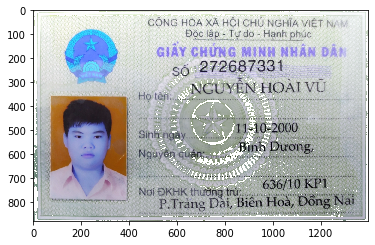

In [3]:
for h in range(height_image):
    for w in range(width_image):
        (b,g,r)=image[h][w].astype('int16')
        if ((g-b)>15) and ((g-r)>15):
            image[h][w]=(255,255,255)
print('finisded')
plt.imshow(image)

# gray

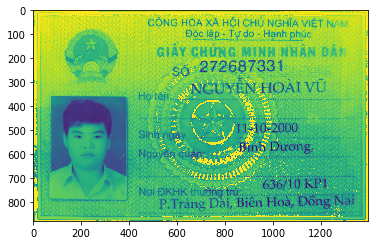

In [4]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image)

# Crop

## so 

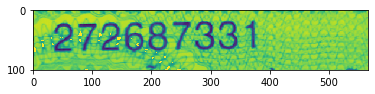

In [5]:
#so cmnd
h_so=int(height_image*0.11538)
w_so=int(height_image*0.646)
x_so=int(height_image*0.753846)
y_so=int(height_image*0.2153846)
image_so=image[y_so:y_so+h_so,x_so:x_so+w_so]
plt.imshow(image_so)

## ten

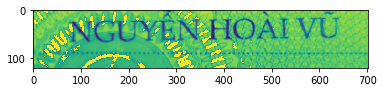

In [6]:
#ten cm
h_ten=int(height_image*0.1385)
w_ten=int(height_image*0.8)
x_ten=int(height_image*0.6615)
y_ten=int(height_image*0.323)
image_ten0=image[y_ten:y_ten+h_ten,x_ten:x_ten+w_ten]
plt.imshow(image_ten0)

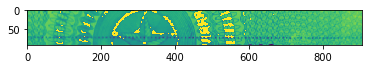

In [7]:
#ten cm
h_ten1=int(height_image*0.1077)
w_ten1=int(height_image*1.03077)
x_ten1=int(height_image*0.4923)
y_ten1=int(height_image*0.43077)
image_ten1=image[y_ten1:y_ten1+h_ten1,x_ten1:x_ten1+w_ten1]
plt.imshow(image_ten1)

## ngay sinh

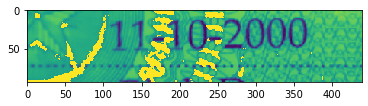

In [8]:
h_ngaySinh=int(height_image*0.1077)
w_ngaySinh=int(height_image*0.5)
x_ngaySinh=int(height_image*0.8385)
y_ngaySinh=int(height_image*0.5230769)
image_ngaySinh=image[y_ngaySinh:y_ngaySinh+h_ngaySinh,x_ngaySinh:x_ngaySinh+w_ngaySinh]
plt.imshow(image_ngaySinh)

## nguyen quan

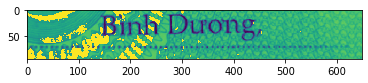

In [9]:
h_nguyenQuan=int(height_image*0.1077)
w_nguyenQuan=int(height_image*0.7385)
x_nguyenQuan=int(height_image*0.815385)
y_nguyenQuan=int(height_image*0.61538)
image_nguyenQuan0=image[y_nguyenQuan:y_nguyenQuan+h_nguyenQuan,x_nguyenQuan:x_nguyenQuan+w_nguyenQuan]
plt.imshow(image_nguyenQuan0)

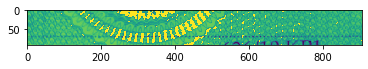

In [10]:
h_nguyenQuan1=int(height_image*0.1077)
w_nguyenQuan1=int(height_image*1.03077)
x_nguyenQuan1=int(height_image*0.4923)
y_nguyenQuan1=int(height_image*0.7077)
image_nguyenQuan1=image[y_nguyenQuan1:y_nguyenQuan1+h_nguyenQuan1,x_nguyenQuan1:x_nguyenQuan1+w_nguyenQuan1]
plt.imshow(image_nguyenQuan1)

## Noi DKHK:

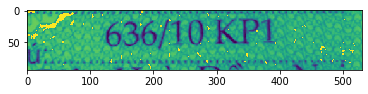

In [11]:
h_noiDKHK=int(height_image*0.1077)
w_noiDKHK=int(height_image*0.60385)
x_noiDKHK=int(height_image*0.95)
y_noiDKHK=int(height_image*0.784615)
image_noiDKHK0=image[y_noiDKHK:y_noiDKHK+h_noiDKHK,x_noiDKHK:x_noiDKHK+w_noiDKHK]
plt.imshow(image_noiDKHK0)

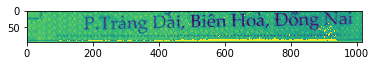

In [12]:
h_noiDKHK1=int(height_image*0.1077)
w_noiDKHK1=int(height_image*1.1577)
x_noiDKHK1=int(height_image*0.4023)
y_noiDKHK1=int(height_image*0.877)
image_noiDKHK1=image[y_noiDKHK1:y_noiDKHK1+h_noiDKHK1,x_noiDKHK1:x_noiDKHK1+w_noiDKHK1]
plt.imshow(image_noiDKHK1)

## blur

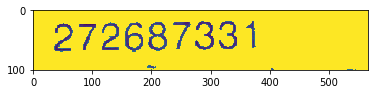

In [13]:
image_so=np.where(image_so<120,image_so,255)
plt.imshow(image_so)

In [14]:
pytesseract.image_to_string(image_so)

'272687331'

In [15]:
def blur_otsu(image):
    image_blur=np.where(image<120,image,255)

    blured1 = cv2.medianBlur(image_blur,3)
    blured2 = cv2.medianBlur(image_blur,51)
    divided = np.ma.divide(blured1, blured2)
    normed = np.uint8(255*divided/divided.max())
    th, threshed = cv2.threshold(normed, 0, 255,  cv2.THRESH_OTSU)
    
    return threshed


# OCR

In [16]:
def OCR_image(image):
    image=blur_otsu(image)
    plt.imshow(image)
    text=pytesseract.image_to_string(image)
    print(text)


272687331


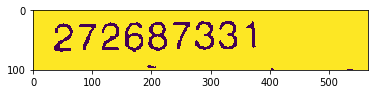

In [17]:
OCR_image(image_so)

_NGUYEN HOALVL


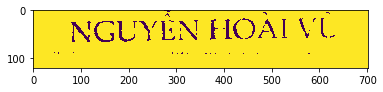

In [18]:
OCR_image(image_ten0)

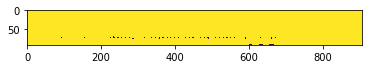

In [19]:
OCR_image(image_ten1)

ue 2)-10-2000


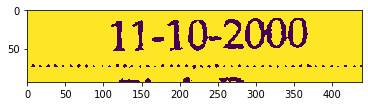

In [20]:
OCR_image(image_ngaySinh)

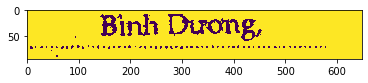

In [21]:
OCR_image(image_nguyenQuan0)

wee e eet e meee teeter tee corm ce dente nate meee n ee RE Need teen ree ee

a Me £ £4 f% FS VR


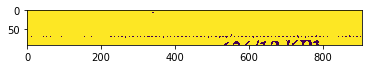

In [22]:
OCR_image(image_nguyenQuan1)

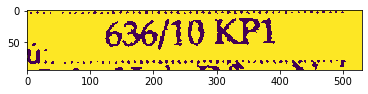

In [23]:
OCR_image(image_noiDKHK0)

_ P.Trang Dai, Bién Hoa, Dong Nai


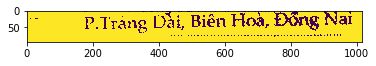

In [24]:
OCR_image(image_noiDKHK1)

# contours

In [25]:
import imutils
def OCR_contours(image):
    image=blur_otsu(image)
    contours = cv2.findContours(image.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contours = contours[1] if imutils.is_cv3() else contours[0]

    bb_list = []
    for c in contours:  
        (x, y, w, h) = cv2.boundingRect(c)
        # save all boxes except the one that has the exact dimensions of the image (x, y, width, height)
        if (x == 0 and y == 0 and w == image.shape[1] and h == image.shape[0]):
            continue

        bb_list.append((x, y, w, h))


    #### sort bounding boxes by the X value: first item is the left-most box
    bb_list.sort(key=lambda x:x[1])

    ### remove the last item from the list, i.e. remove box for letter M
    bb_list = bb_list[:-1]

    point_list=[(0,0,0,0)]
    (x_word,y_word,w_word,h_word)=(image.shape[1],image.shape[0],0,0)

    # debug: draw the text region of interest
    roi_img = image.copy()
    for b in bb_list :
        (x,y,w,h)=b
        if h >((10*roi_img.shape[0])/100) :
            x_word=min(x_word,x)     
            y_word=min(y_word,y)
            w_word=max(w_word,x+w)
            h_word=max(h_word,y+h)

    w_word=w_word-x_word
    h_word=h_word-y_word
    
    try:
#         thr=0
#         if (y_word>=thr):
#             y_word-=thr
#         else:
#             y_word=0
        
#         if (x_word>=thr):
#             x_word-=thr
#         else:
#             x_word=0
        find=np.pad(image[y_word:y_word+h_word,x_word:x_word+w_word], 15, mode='constant',constant_values=255)
        #find=image[y_word:y_word+h_word+thr*2,x_word:x_word+w_word+thr*2]
        plt.imshow(find)
        
        text=pytesseract.image_to_string(find)
        print(text)
        plt.show()
    except:
        print()
    
    

272687331


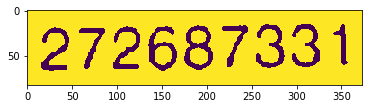

NGUYEN HOAT VL


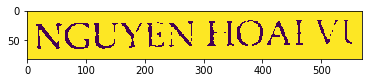

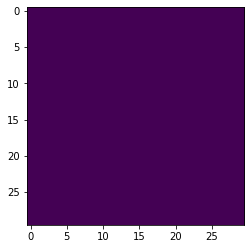

11-10-2000


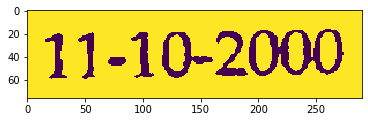

Binh Duong,


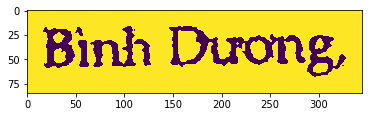

Deve et acon scr antonens

as lian wy


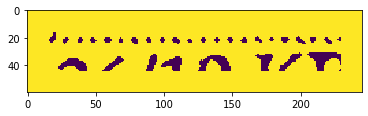

636/10 KP1

eran


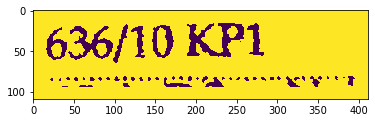

P.Trang Dai, Bién Hoa, Déng Nai


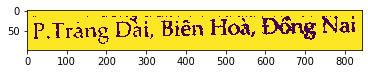

True

In [26]:
OCR_contours(image_so)
OCR_contours(image_ten0)
OCR_contours(image_ten1)
OCR_contours(image_ngaySinh)
OCR_contours(image_nguyenQuan0)
OCR_contours(image_nguyenQuan1)
OCR_contours(image_noiDKHK0)
OCR_contours(image_noiDKHK1)
cv2.imwrite('/media/tuminh14/New Volume/Final Project/Data/CMND/image_so.jpg',image_so)
cv2.imwrite('/media/tuminh14/New Volume/Final Project/Data/CMND/image_ten0.jpg',image_ten0)
cv2.imwrite('/media/tuminh14/New Volume/Final Project/Data/CMND/image_ten1.jpg',image_ten1)
cv2.imwrite('/media/tuminh14/New Volume/Final Project/Data/CMND/image_ngaySinh.jpg',image_ngaySinh)
cv2.imwrite('/media/tuminh14/New Volume/Final Project/Data/CMND/image_nguyenQuan0.jpg',image_nguyenQuan0)
cv2.imwrite('/media/tuminh14/New Volume/Final Project/Data/CMND/image_nguyenQuan1.jpg',image_nguyenQuan1)
cv2.imwrite('/media/tuminh14/New Volume/Final Project/Data/CMND/image_noiDKHK0.jpg',image_noiDKHK0)
cv2.imwrite('/media/tuminh14/New Volume/Final Project/Data/CMND/image_noiDKHK1.jpg',image_noiDKHK1)


In [27]:
def detectText(img):
    with io.open(img,'rb') as image_file:
        content = image_file.read()
    
    image = vision.types.Image(content=content)
    response = client.text_detection(image=image)
    texts = response.text_annotations
    
    df = pd.DataFrame(columns=['locale','description'])
    for text in texts:
        df = df.append(
            dict(
                locale=text.locale,
                description=text.description
            ),
            ignore_index=True
        )
    return df['description'][0]



In [28]:
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = r'/media/tuminh14/New Volume/Code/Google API/VisionAPIDemo/ServiceAccountToken.json'

In [29]:
client = vision.ImageAnnotatorClient()

In [30]:
image_so = image_so.astype('uint8')

In [31]:
FILE_NAME = 'image_so.jpg'
FOLDER_PATH = r'/media/tuminh14/New Volume/Final Project/Data/CMND/'
print(detectText(os.path.join(FOLDER_PATH, FILE_NAME)))

272687331



In [32]:
FILE_NAME = 'image_ten0.jpg'
FOLDER_PATH = r'/media/tuminh14/New Volume/Final Project/Data/CMND/'
print(detectText(os.path.join(FOLDER_PATH, FILE_NAME)))

GUYEN HOAI VU



In [33]:
FILE_NAME = 'image_ten1.jpg'
FOLDER_PATH = r'/media/tuminh14/New Volume/Final Project/Data/CMND/'
print(detectText(os.path.join(FOLDER_PATH, FILE_NAME)))

AMAR



In [34]:
FILE_NAME = 'image_ngaySinh.jpg'
FOLDER_PATH = r'/media/tuminh14/New Volume/Final Project/Data/CMND/'
print(detectText(os.path.join(FOLDER_PATH, FILE_NAME)))

11-10-2000



In [35]:
FILE_NAME = 'image_nguyenQuan0.jpg'
FOLDER_PATH = r'/media/tuminh14/New Volume/Final Project/Data/CMND/'
print(detectText(os.path.join(FOLDER_PATH, FILE_NAME)))

Binh Duong



In [36]:
FILE_NAME = 'image_nguyenQuan1.jpg'
FOLDER_PATH = r'/media/tuminh14/New Volume/Final Project/Data/CMND/'
print(detectText(os.path.join(FOLDER_PATH, FILE_NAME)))

IndexError: index out of bounds

In [37]:
FILE_NAME = 'image_noiDKHK0.jpg'
FOLDER_PATH = r'/media/tuminh14/New Volume/Final Project/Data/CMND/'
print(detectText(os.path.join(FOLDER_PATH, FILE_NAME)))

636/10 KP1



In [38]:
FILE_NAME = 'image_noiDKHK1.jpg'
FOLDER_PATH = r'/media/tuminh14/New Volume/Final Project/Data/CMND/'
print(detectText(os.path.join(FOLDER_PATH, FILE_NAME)))

P.Trang Dai, Biên Hoà, Dong Nai

